In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Apr 27 23:48:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# git과 연동이 되어있는지 확인하는 로직
%cd /content/drive/MyDrive/yolov7
!git status

/content/drive/MyDrive/yolov7
On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	LICENSE.md
	README.md
	cfg/
	cuda-repo-ubuntu1804-11-4-local_11.4.1-470.57.02-1_amd64.deb
	data/
	deploy/
	detect.py
	export.py
	food_data/
	hubconf.py
	models/
	paper/
	requirements.txt
	scripts/
	test.py
	tools/
	train.py
	train_aux.py
	utils/
	yolov7.ipynb
	yolov7_detect.ipynb
	"\341\204\211\341\205\265\341\206\250\341\204\203\341\205\241\341\206\253\341\204\216\341\205\256\341\204\216\341\205\245\341\206\253\341\204\206\341\205\251\341\204\203\341\205\246\341\206\257.ipynb"


It took 56.70 seconds to enumerate untracked files. 'status -uno'
may speed it up, but you have to be careful not to forget to add
new files yourself (see 'git help status').
nothing added to commit but untracked files present (use "git add" to track)


In [4]:
!git config --global user.email "chj0253@gmail.com"
!git config --global user.name "BusUserYM"

In [5]:
# !git init
# !git add .
!git commit -m "Initial commit"

On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	LICENSE.md
	README.md
	cfg/
	cuda-repo-ubuntu1804-11-4-local_11.4.1-470.57.02-1_amd64.deb
	data/
	deploy/
	detect.py
	export.py
	food_data/
	hubconf.py
	models/
	paper/
	requirements.txt
	scripts/
	test.py
	tools/
	train.py
	train_aux.py
	utils/
	yolov7.ipynb
	yolov7_detect.ipynb
	"\341\204\211\341\205\265\341\206\250\341\204\203\341\205\241\341\206\253\341\204\216\341\205\256\341\204\216\341\205\245\341\206\253\341\204\206\341\205\251\341\204\203\341\205\246\341\206\257.ipynb"

nothing added to commit but untracked files present (use "git add" to track)


In [6]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [7]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

import os
import pandas as pd
import zipfile

In [8]:
import requests
from bs4 import BeautifulSoup

In [9]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12764743374879593621
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 13825277952
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11957189964616062541
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [10]:
# wandb 설치
# !pip install wandb

# wandb api값 넣고 로그인
!wandb login a5535c29332e0aedbed2fb1bee2dfbe1ab939ea3

/bin/bash: wandb: command not found


In [ ]:
# zip 파일 열기
with zipfile.ZipFile('/content/drive/MyDrive/yolov7/food_data/sub/image.zip', 'r') as zip_ref:
    # 파일 목록 가져오기
    file_list = zip_ref.namelist()

# 파일 개수 출력
print(len(file_list))

8989


In [ ]:
# zip 파일 열기
with zipfile.ZipFile('/content/drive/MyDrive/yolov7/food_data/sub/labels.zip', 'r') as zip_ref2:
    # 파일 목록 가져오기
    file_list2 = zip_ref2.namelist()

# 파일 개수 출력
print(len(file_list2))

8989


In [ ]:
# 압축 해제할 파일 경로
zip_path = "/content/drive/MyDrive/yolov7/food_data/sub/image.zip"

# 압축 해제할 폴더 경로
extract_path = "/content/drive/MyDrive/yolov7/food_data/images"

# zip 파일 열기
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # 압축 해제
    zip_ref.extractall(extract_path)

In [ ]:
# 압축 해제할 파일 경로
zip_path = "/content/drive/MyDrive/yolov7/food_data/sub/labels.zip"

# 압축 해제할 폴더 경로
extract_path = "/content/drive/MyDrive/yolov7/food_data/labels"

# zip 파일 열기
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # 압축 해제
    zip_ref.extractall(extract_path)

KeyboardInterrupt: ignored

In [ ]:
# jpg 확인
hihi = [os.path.join('food_data/images', x) for x in os.listdir('food_data/images') if x[-3:] == "jpg"]
hihi.sort()

print(len(hihi))

# JPG 확인
hello2 = [os.path.join('food_data/images', x) for x in os.listdir('food_data/images') if x[-3:] == "JPG"]
hello2.sort()

print(len(hello2))

0
0


In [ ]:
# 파일 숫자 확인 로직
annotations1 = [os.path.join('food_data/labels', x) for x in os.listdir('food_data/labels') if x[-3:] == "xml"]
annotations1.sort()

print(len(annotations1))

# 혹시모를 png확인
hello3 = [os.path.join('food_data/images', x) for x in os.listdir('food_data/images') if x[-3:] == "png"]
hello3.sort()

print(len(hello3))

8989
0


In [ ]:
# # TensorRT 설치
# !pip install pyCUDA
# !wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
# !sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
# !wget https://developer.download.nvidia.com/compute/cuda/11.4.1/local_installers/cuda-repo-ubuntu1804-11-4-local_11.4.1-470.57.02-1_amd64.deb
# !sudo dpkg -i cuda-repo-ubuntu1804-11-4-local_11.4.1-470.57.02-1_amd64.deb
# !sudo apt-key add /var/cuda-repo-ubuntu1804-11-4-local/7fa2af80.pub
# !sudo apt-get update
# !sudo apt-get -y install cuda
# !sudo apt-get -y install libcudnn8-dev
# !sudo apt-get -y install libnvinfer7
# !sudo apt-get -y install libnvinfer-dev

Setting up libnvinfer-headers-dev (8.6.0.12-1+cuda12.0) ...
Setting up libnvinfer8 (8.6.0.12-1+cuda12.0) ...
Setting up libnvinfer-dev (8.6.0.12-1+cuda12.0) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


In [ ]:
!pip install -r requirements.txt

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners

In [ ]:
# # TensorRT 샘플 코드 다운로드
# !wget https://developer.download.nvidia.com/devzone/devcenter/iot/ML-examples/l4t-ml/TensorRT-7.2.2.3/TensorRT-7.2.2.3.Ubuntu-18.04.x86_64-gnu.cuda-11.0.cudnn8.0.tar.gz
# !tar -xzvf TensorRT-7.2.2.3.Ubuntu-18.04.x86_64-gnu.cuda-11.0.cudnn8.0.tar.gz
# %cd TensorRT-7.2.2.3/
# !ls samples/

--2023-04-24 08:24:05--  https://developer.download.nvidia.com/devzone/devcenter/iot/ML-examples/l4t-ml/TensorRT-7.2.2.3/TensorRT-7.2.2.3.Ubuntu-18.04.x86_64-gnu.cuda-11.0.cudnn8.0.tar.gz
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-04-24 08:24:06 ERROR 404: Not Found.

tar (child): TensorRT-7.2.2.3.Ubuntu-18.04.x86_64-gnu.cuda-11.0.cudnn8.0.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
[Errno 2] No such file or directory: 'TensorRT-7.2.2.3/'
/content/drive/MyDrive/yolov7
ls: cannot access 'samples/': No such file or directory


In [ ]:
with open('food_data/labels/01_012_01012002_160273281614671.xml', 'r') as f:
    xml_string = f.read()
    
print(xml_string)

<?xml version='1.0' encoding='UTF-8'?>
<annotation>
	<filename>01_012_01012002_160273281614671.jpg</filename>
	<path>./01/012/01012002/01_012_01012002_160273281614671.jpg</path>
	<source>
		<database>fooddata</database>
	</source>
	<size>
		<width>2560</width>
		<height>1920</height>
		<depth>3</depth>
	</size>
	<object>
		<name>dish</name>
		<bndbox>
			<xmin>454</xmin>
			<ymin>61</ymin>
			<xmax>2221</xmax>
			<ymax>1822</ymax>
		</bndbox>
	</object>
	<object>
		<name>01012002</name>
		<bndbox>
			<xmin>691</xmin>
			<ymin>322</ymin>
			<xmax>1971</xmax>
			<ymax>1520</ymax>
		</bndbox>
	</object>
</annotation>


In [ ]:
# XML 파일에서 원하는 데이터 뽑아오는 함수
def extract_info_from_xml(xml_file):
    xmip = ET.XMLParser(encoding="utf-8")
    # 숫자인코딩 하는 방법? 안되면 삭제
    root = ET.parse(xml_file, parser=xmip).getroot()
    
    # 담아둘 리스트 생성 
    info_dict = {}
    info_dict['bboxes'] = []

    # for문 반복 돌려서 문자열 돌리기
    for elem in root:
        # XML 파일 이름 받아오기
        # 여기서는 숫자가 담길 예정
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # 이미지 사이즈 받아오기
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # 라벨링 처리용 로직
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                
                # yolov7에서 인식시키려면 class네임을 id_라벨링 처리해야합니다.
                # 그렇기에 각각의 사진들을 하나로 묶어서 이름을 제공하고
                # 이를 바탕으로 라벨링 처리를 할 예정이라 이러한 로직을 썼습니다.
                if subelem.tag == "name":
                    if subelem.text.startswith('01'):
                        subelem.text = 'bean-rice'
                        bbox["class"] = subelem.text
                    elif subelem.text.startswith('06'):
                        subelem.text = 'chicken-galbi'
                        bbox["class"] = subelem.text
                    elif subelem.text.startswith('08011'):
                        subelem.text = 'stir-fried-octopus'
                        bbox["class"] = subelem.text
                    elif subelem.text.startswith('08013'):
                        subelem.text = 'pork-chops'
                        bbox["class"] = subelem.text
                    elif subelem.text.startswith('12'):
                        subelem.text = 'cabbage-for-kimchi'
                        bbox["class"] = subelem.text
                    elif subelem.text.startswith('dish'):
                        subelem.text = 'dish'
                        bbox["class"] = subelem.text
                    else:
                        bbox["class"] = subelem.text
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [ ]:
# xml파일에 담긴 모든 xml파일 불러오기
directory = r'/content/drive/MyDrive/yolov7/food_data/labels'
info_dict = []

# for문 돌려서 모든 xml 파일 함수에 기입하고 저장하기.
for filename in os.listdir(directory):
    if filename.endswith('.xml'):
        file_path = os.path.join(directory, filename)
        # 여기에 함수 적용하기
        info=extract_info_from_xml(file_path)
        info_dict.append(info)
print(info_dict)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# train 데이터 프레임화해서 class명 바꿔주기 --> 이렇게 해야 yolov7이 인식할듯?
info_df = pd.DataFrame(info_dict)
info_df

,bboxes,filename,image_size
0,"[{'class': 'dish', 'xmin': 454, 'ymin': 61, 'x...",01_012_01012002_160273281614671.jpg,"(2560, 1920, 3)"
1,"[{'class': 'dish', 'xmin': 204, 'ymin': 1060, ...",01_012_01012002_160274342946127.jpg,"(3024, 4032, 3)"
2,"[{'class': 'dish', 'xmin': 175, 'ymin': 1038, ...",01_012_01012002_160274352955042.jpg,"(3024, 4032, 3)"
3,"[{'class': 'dish', 'xmin': 187, 'ymin': 27, 'x...",01_012_01012002_160275059794316.jpg,"(1440, 1080, 3)"
4,"[{'class': 'dish', 'xmin': 115, 'ymin': 21, 'x...",01_012_01012002_160275061997882.jpg,"(1440, 1059, 3)"
...,...,...,...
8984,"[{'class': 'dish', 'xmin': 325, 'ymin': 61, 'x...",12_121_12011008_160447814468200_1.jpg,"(4032, 3024, 3)"
8985,"[{'class': 'dish', 'xmin': 577, 'ymin': 61, 'x...",12_121_12011008_160447815997992_0.jpg,"(4032, 3024, 3)"
8986,"[{'class': 'dish', 'xmin': 331, 'ymin': 56, 'x...",12_121_12011008_160447815997992_1.jpg,"(4032, 3024, 3)"
8987,"[{'class': 'dish', 'xmin': 458, 'ymin': 569, '...",12_121_12011008_160447991641150_0.jpg,"(3024, 3024, 3)"


In [ ]:
# train DF 확인
info_df['bboxes']

0       [{'class': 'dish', 'xmin': 454, 'ymin': 61, 'x...
1       [{'class': 'dish', 'xmin': 204, 'ymin': 1060, ...
2       [{'class': 'dish', 'xmin': 175, 'ymin': 1038, ...
3       [{'class': 'dish', 'xmin': 187, 'ymin': 27, 'x...
4       [{'class': 'dish', 'xmin': 115, 'ymin': 21, 'x...
                              ...                        
8984    [{'class': 'dish', 'xmin': 325, 'ymin': 61, 'x...
8985    [{'class': 'dish', 'xmin': 577, 'ymin': 61, 'x...
8986    [{'class': 'dish', 'xmin': 331, 'ymin': 56, 'x...
8987    [{'class': 'dish', 'xmin': 458, 'ymin': 569, '...
8988    [{'class': 'dish', 'xmin': 212, 'ymin': 441, '...
Name: bboxes, Length: 8989, dtype: object

In [ ]:
len(info_df["bboxes"])

8989

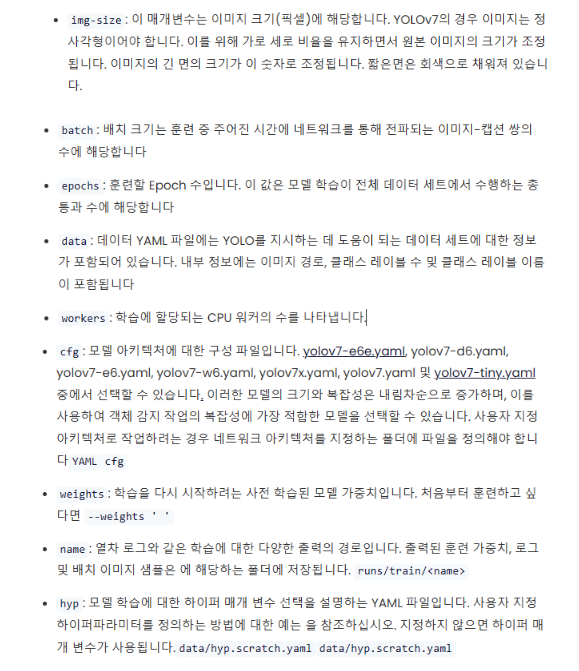

In [ ]:
# import shutil

# # 이동하려는 파일 경로
# source_path = "/content/drive/MyDrive/yolov7/food_data/labels/test"

# # 이동할 경로
# destination_path = "/content/drive/MyDrive/yolov7/food_data/labels/sub"

# # 파일 이동
# shutil.move(source_path, destination_path)

'/content/drive/MyDrive/yolov7/food_data/labels/sub/test'

In [ ]:
# # 이동하려는 파일 경로
# source_path = "/content/drive/MyDrive/yolov7/food_data/images/val"

# # 이동할 경로
# destination_path = "/content/drive/MyDrive/yolov7/food_data/images/sub"

# # 파일 이동
# shutil.move(source_path, destination_path)

'/content/drive/MyDrive/yolov7/food_data/images/sub/val'

In [ ]:
# 모델이 인식할 수 있게 id 매핑하기
# 기존 로직

class_name_to_id_mapping = {"bean-rice": 0,
                           "dish": 1,
                           "chicken-galbi": 2,
                           "stir-fried-octopus": 3,
                           "pork-chops": 4,
                           "cabbage-for-kinchi": 5,
                           "00000000": 6,
                           "unknown": 7}

# YOLOv7에서 인식할 수 있는 형태의 데이터로 만들기
def convert_to_yolov7(info_dict):
    print_buffer = []
    # 각각 형태를 바꿔봅시다^^
    for b in info_dict["bboxes"]:
        
        average_image_w = 2880
        average_image_h = 1080
        average_image_c = 3
        
        if "class" in b:
            if b["class"] == 'bean-rice':
                class_id = 0
            elif b["class"] == 'dish':
                class_id = 1
            elif b["class"] == 'chicken-galbi':
                class_id = 2
            elif b["class"] == 'stir-fried-octopus':
                class_id = 3
            elif b["class"] == 'pork-chops':
                class_id = 4
            elif b["class"] == 'cabbage-for-kimchi':
                class_id = 5
            elif b["class"] == '00000000':
                class_id = 6
            else:
                class_id = 7
        else:
            # "class" 키가 존재하지 않는 경우에 대한 예외처리
            class_id = 7
            
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        if "image_size" in info_dict:
            image_w, image_h, image_c = info_dict["image_size"]
            # 1440, 1080, 3
            b_center_x /= image_w 
            b_center_y /= image_h 
            b_width    /= image_w 
            b_height   /= image_h 
            
        else:
            # image_size가 없다면? 내가 대강 예상해서 만들어야 하는거네? 와;;; 아예 사이즈 없으면 뺄까?
            image_w, image_h, image_c = average_image_w, average_image_h, average_image_c
            
            b_center_x /= image_w 
            b_center_y /= image_h 
            b_width    /= image_w 
            b_height   /= image_h
        
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
        save_file_name = os.path.join("food_data/labels", info_dict["filename"].replace("jpg", "txt"))
#         save_file_name = os.path.join("food_data/annotations", info_dict["filename"].replace("jpeg", "txt"))
        print(save_file_name)
        
        print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [ ]:
# train 가져와보자~~
annotations = [os.path.join('food_data/labels', x) for x in os.listdir('food_data/labels') if x[-3:] == "xml"]
annotations.sort()

annotations
len(annotations)

8989

In [ ]:
# # train 어노테이션 저장이라고 하네용??
# for ann in tqdm(annotations):
#     info_dict = extract_info_from_xml(ann)
#     convert_to_yolov7(info_dict)
# annotations = [os.path.join('food_data/labels', x) for x in os.listdir('food_data/labels') if x[-3:] == "txt"]

  0%|          | 12/8989 [00:00<01:17, 116.17it/s]

food_data/labels/01_012_01012002_160273281614671.txt
food_data/labels/01_012_01012002_160273281614671.txt
food_data/labels/01_012_01012002_160274342946127.txt
food_data/labels/01_012_01012002_160274342946127.txt
food_data/labels/01_012_01012002_160274352955042.txt
food_data/labels/01_012_01012002_160274352955042.txt
food_data/labels/01_012_01012002_160275059794316.txt
food_data/labels/01_012_01012002_160275059794316.txt
food_data/labels/01_012_01012002_160275061997882.txt
food_data/labels/01_012_01012002_160275061997882.txt
food_data/labels/01_012_01012002_160275840843890.txt
food_data/labels/01_012_01012002_160275840843890.txt
food_data/labels/01_012_01012002_160275843341926.txt
food_data/labels/01_012_01012002_160275843341926.txt
food_data/labels/01_012_01012002_160275845839896.txt
food_data/labels/01_012_01012002_160275845839896.txt
food_data/labels/01_012_01012002_160275851287780.txt
food_data/labels/01_012_01012002_160275851287780.txt
food_data/labels/01_012_01012002_1602759960312

  0%|          | 36/8989 [00:00<01:30, 98.95it/s] 

food_data/labels/01_012_01012002_160282133633447.txt
food_data/labels/01_012_01012002_160282291992564.txt
food_data/labels/01_012_01012002_160282291992564.txt
food_data/labels/01_012_01012002_160284406284220.txt
food_data/labels/01_012_01012002_160284406284220.txt
food_data/labels/01_012_01012002_160284408161850.txt
food_data/labels/01_012_01012002_160284408161850.txt
food_data/labels/01_012_01012002_160290858692714_0.txt
food_data/labels/01_012_01012002_160290858692714_0.txt
food_data/labels/01_012_01012002_160290858692714_1.txt
food_data/labels/01_012_01012002_160290858692714_1.txt
food_data/labels/01_012_01012002_160291685632667_0.txt
food_data/labels/01_012_01012002_160291685632667_0.txt
food_data/labels/01_012_01012002_160291685632667_1.txt
food_data/labels/01_012_01012002_160291685632667_1.txt
food_data/labels/01_012_01012002_160292574052022_0.txt
food_data/labels/01_012_01012002_160292574052022_0.txt
food_data/labels/01_012_01012002_160292574052022_1.txt
food_data/labels/01_012_

  1%|          | 59/8989 [00:00<01:23, 106.95it/s]

food_data/labels/01_012_01012002_160300399125387_1.txt
food_data/labels/01_012_01012002_160300399125387_1.txt
food_data/labels/01_012_01012002_160300408671407_0.txt
food_data/labels/01_012_01012002_160300408671407_0.txt
food_data/labels/01_012_01012002_160300410040704_0.txt
food_data/labels/01_012_01012002_160300410040704_0.txt
food_data/labels/01_012_01012002_160300411564393_0.txt
food_data/labels/01_012_01012002_160300411564393_0.txt
food_data/labels/01_012_01012002_160300413361901_0.txt
food_data/labels/01_012_01012002_160300413361901_0.txt
food_data/labels/01_012_01012002_160300413361901_1.txt
food_data/labels/01_012_01012002_160300413361901_1.txt
food_data/labels/01_012_01012002_160300416226448_0.txt
food_data/labels/01_012_01012002_160300416226448_0.txt
food_data/labels/01_012_01012002_160301004657163_0.txt
food_data/labels/01_012_01012002_160301004657163_0.txt
food_data/labels/01_012_01012002_160301004657163_1.txt
food_data/labels/01_012_01012002_160301004657163_1.txt
food_data/

  1%|          | 82/8989 [00:00<01:24, 105.72it/s]

food_data/labels/01_012_01012002_160313365490590_0.txt
food_data/labels/01_012_01012002_160313365490590_0.txt
food_data/labels/01_012_01012002_160313365490590_1.txt
food_data/labels/01_012_01012002_160313365490590_1.txt
food_data/labels/01_012_01012002_160313418433815_0.txt
food_data/labels/01_012_01012002_160313418433815_0.txt
food_data/labels/01_012_01012002_160313418433815_1.txt
food_data/labels/01_012_01012002_160313418433815_1.txt
food_data/labels/01_012_01012002_160316094410199_0.txt
food_data/labels/01_012_01012002_160316094410199_0.txt
food_data/labels/01_012_01012002_160316094410199_1.txt
food_data/labels/01_012_01012002_160316094410199_1.txt
food_data/labels/01_012_01012002_160316200257802_0.txt
food_data/labels/01_012_01012002_160316200257802_0.txt
food_data/labels/01_012_01012002_160316200257802_1.txt
food_data/labels/01_012_01012002_160316200257802_1.txt
food_data/labels/01_012_01012002_160316202069397_0.txt
food_data/labels/01_012_01012002_160316202069397_0.txt
food_data/

  1%|          | 104/8989 [00:00<01:24, 105.17it/s]

food_data/labels/01_012_01012002_160316214617875_0.txt
food_data/labels/01_012_01012002_160316214617875_0.txt
food_data/labels/01_012_01012002_160316214617875_1.txt
food_data/labels/01_012_01012002_160316214617875_1.txt
food_data/labels/01_012_01012002_160316216580299_0.txt
food_data/labels/01_012_01012002_160316216580299_0.txt
food_data/labels/01_012_01012002_160316216580299_1.txt
food_data/labels/01_012_01012002_160316216580299_1.txt
food_data/labels/01_012_01012002_160316220944662_0.txt
food_data/labels/01_012_01012002_160316220944662_0.txt
food_data/labels/01_012_01012002_160316220944662_1.txt
food_data/labels/01_012_01012002_160316220944662_1.txt
food_data/labels/01_012_01012002_160317205149102_0.txt
food_data/labels/01_012_01012002_160317205149102_0.txt
food_data/labels/01_012_01012002_160317205149102_1.txt
food_data/labels/01_012_01012002_160317205149102_1.txt
food_data/labels/01_012_01012002_160317209832317_0.txt
food_data/labels/01_012_01012002_160317209832317_0.txt
food_data/

  1%|▏         | 129/8989 [00:01<01:19, 111.20it/s]

food_data/labels/01_012_01012002_160317237547679_0.txt
food_data/labels/01_012_01012002_160317237547679_1.txt
food_data/labels/01_012_01012002_160317237547679_1.txt
food_data/labels/01_012_01012002_160317240297287_0.txt
food_data/labels/01_012_01012002_160317240297287_0.txt
food_data/labels/01_012_01012002_160317240297287_1.txt
food_data/labels/01_012_01012002_160317240297287_1.txt
food_data/labels/01_012_01012002_160317242552529_0.txt
food_data/labels/01_012_01012002_160317242552529_0.txt
food_data/labels/01_012_01012002_160317242552529_1.txt
food_data/labels/01_012_01012002_160317242552529_1.txt
food_data/labels/01_012_01012002_160317245095552_0.txt
food_data/labels/01_012_01012002_160317245095552_0.txt
food_data/labels/01_012_01012002_160317245095552_1.txt
food_data/labels/01_012_01012002_160317245095552_1.txt
food_data/labels/01_012_01012002_160317246949381_0.txt
food_data/labels/01_012_01012002_160317246949381_0.txt
food_data/labels/01_012_01012002_160317246949381_1.txt
food_data/

  2%|▏         | 155/8989 [00:01<01:15, 116.92it/s]

food_data/labels/01_012_01012002_160327553011484_1.txt
food_data/labels/01_012_01012002_160331618058905_0.txt
food_data/labels/01_012_01012002_160331618058905_0.txt
food_data/labels/01_012_01012002_160331618058905_1.txt
food_data/labels/01_012_01012002_160331618058905_1.txt
food_data/labels/01_012_01012002_160333047617613_0.txt
food_data/labels/01_012_01012002_160333047617613_0.txt
food_data/labels/01_012_01012002_160333047617613_1.txt
food_data/labels/01_012_01012002_160333047617613_1.txt
food_data/labels/01_012_01012002_160336102638764_0.txt
food_data/labels/01_012_01012002_160336102638764_0.txt
food_data/labels/01_012_01012002_160336102638764_1.txt
food_data/labels/01_012_01012002_160336102638764_1.txt
food_data/labels/01_012_01012002_160336114473000_0.txt
food_data/labels/01_012_01012002_160336114473000_0.txt
food_data/labels/01_012_01012002_160336114473000_1.txt
food_data/labels/01_012_01012002_160336114473000_1.txt
food_data/labels/01_012_01012002_160336349850623_0.txt
food_data/

  2%|▏         | 182/8989 [00:01<01:10, 124.98it/s]

food_data/labels/01_012_01012002_160344686321363_1.txt
food_data/labels/01_012_01012002_160344847165465_1.txt
food_data/labels/01_012_01012002_160344847165465_1.txt
food_data/labels/01_012_01012002_160344965640610_0.txt
food_data/labels/01_012_01012002_160344965640610_0.txt
food_data/labels/01_012_01012002_160344965640610_1.txt
food_data/labels/01_012_01012002_160344965640610_1.txt
food_data/labels/01_012_01012002_160345498860009_0.txt
food_data/labels/01_012_01012002_160345498860009_0.txt
food_data/labels/01_012_01012002_160345498860009_1.txt
food_data/labels/01_012_01012002_160345498860009_1.txt
food_data/labels/01_012_01012002_160346038742581_0.txt
food_data/labels/01_012_01012002_160346038742581_0.txt
food_data/labels/01_012_01012002_160346038742581_1.txt
food_data/labels/01_012_01012002_160346038742581_1.txt
food_data/labels/01_012_01012002_160346114762229_0.txt
food_data/labels/01_012_01012002_160346114762229_0.txt
food_data/labels/01_012_01012002_160346114762229_1.txt
food_data/

  2%|▏         | 209/8989 [00:01<01:08, 127.74it/s]

food_data/labels/01_012_01012002_160354145692593_0.txt
food_data/labels/01_012_01012002_160354145692593_0.txt
food_data/labels/01_012_01012002_160354145692593_1.txt
food_data/labels/01_012_01012002_160354145692593_1.txt
food_data/labels/01_012_01012002_160358728188676_0.txt
food_data/labels/01_012_01012002_160358728188676_0.txt
food_data/labels/01_012_01012002_160358728188676_1.txt
food_data/labels/01_012_01012002_160358728188676_1.txt
food_data/labels/01_012_01012002_160358729831701_0.txt
food_data/labels/01_012_01012002_160358729831701_0.txt
food_data/labels/01_012_01012002_160358729831701_1.txt
food_data/labels/01_012_01012002_160358729831701_1.txt
food_data/labels/01_012_01012002_160358731754274_0.txt
food_data/labels/01_012_01012002_160358731754274_0.txt
food_data/labels/01_012_01012002_160358731754274_1.txt
food_data/labels/01_012_01012002_160358731754274_1.txt
food_data/labels/01_012_01012002_160358733619312_0.txt
food_data/labels/01_012_01012002_160358733619312_0.txt
food_data/

  3%|▎         | 235/8989 [00:02<01:10, 123.82it/s]

food_data/labels/01_012_01012002_160359086926974_0.txt
food_data/labels/01_012_01012002_160359086926974_0.txt
food_data/labels/01_012_01012002_160359086926974_1.txt
food_data/labels/01_012_01012002_160359086926974_1.txt
food_data/labels/01_012_01012002_160359088759913_0.txt
food_data/labels/01_012_01012002_160359088759913_0.txt
food_data/labels/01_012_01012002_160359088759913_1.txt
food_data/labels/01_012_01012002_160359088759913_1.txt
food_data/labels/01_012_01012002_160359090738508_0.txt
food_data/labels/01_012_01012002_160359090738508_0.txt
food_data/labels/01_012_01012002_160359090738508_1.txt
food_data/labels/01_012_01012002_160359090738508_1.txt
food_data/labels/01_012_01012002_160359092750505_0.txt
food_data/labels/01_012_01012002_160359092750505_0.txt
food_data/labels/01_012_01012002_160359092750505_1.txt
food_data/labels/01_012_01012002_160359092750505_1.txt
food_data/labels/01_012_01012002_160359096374422_0.txt
food_data/labels/01_012_01012002_160359096374422_0.txt
food_data/

  3%|▎         | 262/8989 [00:02<01:10, 124.59it/s]

food_data/labels/01_012_01012002_160359114253487_0.txt
food_data/labels/01_012_01012002_160359114253487_1.txt
food_data/labels/01_012_01012002_160359114253487_1.txt
food_data/labels/01_012_01012002_160359116387495_0.txt
food_data/labels/01_012_01012002_160359116387495_0.txt
food_data/labels/01_012_01012002_160359116387495_1.txt
food_data/labels/01_012_01012002_160359116387495_1.txt
food_data/labels/01_012_01012002_160359118076025_0.txt
food_data/labels/01_012_01012002_160359118076025_0.txt
food_data/labels/01_012_01012002_160359118076025_1.txt
food_data/labels/01_012_01012002_160359118076025_1.txt
food_data/labels/01_012_01012002_160359119889993_0.txt
food_data/labels/01_012_01012002_160359119889993_0.txt
food_data/labels/01_012_01012002_160359119889993_1.txt
food_data/labels/01_012_01012002_160359119889993_1.txt
food_data/labels/01_012_01012002_160361152088175_0.txt
food_data/labels/01_012_01012002_160361152088175_0.txt
food_data/labels/01_012_01012002_160361152088175_1.txt
food_data/

  3%|▎         | 290/8989 [00:02<01:08, 126.77it/s]

food_data/labels/01_012_01012002_160375641932408_1.txt
food_data/labels/01_012_01012002_160376224148094_0.txt
food_data/labels/01_012_01012002_160376224148094_0.txt
food_data/labels/01_012_01012002_160376224148094_1.txt
food_data/labels/01_012_01012002_160376224148094_1.txt
food_data/labels/01_012_01012002_160376785760867_0.txt
food_data/labels/01_012_01012002_160376785760867_0.txt
food_data/labels/01_012_01012002_160376785760867_1.txt
food_data/labels/01_012_01012002_160376785760867_1.txt
food_data/labels/01_012_01012002_160376986488490_0.txt
food_data/labels/01_012_01012002_160376986488490_0.txt
food_data/labels/01_012_01012002_160376986488490_1.txt
food_data/labels/01_012_01012002_160376986488490_1.txt
food_data/labels/01_012_01012002_160377640335064_0.txt
food_data/labels/01_012_01012002_160377640335064_0.txt
food_data/labels/01_012_01012002_160377640335064_1.txt
food_data/labels/01_012_01012002_160377640335064_1.txt
food_data/labels/01_012_01012002_160377898984023_0.txt
food_data/

  4%|▎         | 316/8989 [00:02<01:09, 124.92it/s]

food_data/labels/01_012_01012002_160384682311967_0.txt
food_data/labels/01_012_01012002_160384682311967_1.txt
food_data/labels/01_012_01012002_160384682311967_1.txt
food_data/labels/01_012_01012002_160384968241696_0.txt
food_data/labels/01_012_01012002_160384968241696_0.txt
food_data/labels/01_012_01012002_160384968241696_1.txt
food_data/labels/01_012_01012002_160384968241696_1.txt
food_data/labels/01_012_01012002_160384973547464_0.txt
food_data/labels/01_012_01012002_160384973547464_0.txt
food_data/labels/01_012_01012002_160384973547464_1.txt
food_data/labels/01_012_01012002_160384973547464_1.txt
food_data/labels/01_012_01012002_160387367618090_0.txt
food_data/labels/01_012_01012002_160387367618090_0.txt
food_data/labels/01_012_01012002_160387367618090_1.txt
food_data/labels/01_012_01012002_160387367618090_1.txt
food_data/labels/01_012_01012002_160388937455733_0.txt
food_data/labels/01_012_01012002_160388937455733_0.txt
food_data/labels/01_012_01012002_160388937455733_1.txt
food_data/

  4%|▍         | 342/8989 [00:02<01:11, 120.73it/s]

food_data/labels/01_012_01012002_160398302536377_0.txt
food_data/labels/01_012_01012002_160398302536377_0.txt
food_data/labels/01_012_01012002_160398302536377_1.txt
food_data/labels/01_012_01012002_160398302536377_1.txt
food_data/labels/01_012_01012002_160411362280452_0.txt
food_data/labels/01_012_01012002_160411362280452_0.txt
food_data/labels/01_012_01012002_160411362280452_1.txt
food_data/labels/01_012_01012002_160411362280452_1.txt
food_data/labels/01_012_01012002_160412752076788_0.txt
food_data/labels/01_012_01012002_160412752076788_0.txt
food_data/labels/01_012_01012002_160412752076788_1.txt
food_data/labels/01_012_01012002_160412752076788_1.txt
food_data/labels/01_012_01012002_160414018439359_0.txt
food_data/labels/01_012_01012002_160414018439359_0.txt
food_data/labels/01_012_01012002_160414018439359_1.txt
food_data/labels/01_012_01012002_160414018439359_1.txt
food_data/labels/01_012_01012002_160415384648001_0.txt
food_data/labels/01_012_01012002_160415384648001_0.txt
food_data/

  4%|▍         | 369/8989 [00:03<01:09, 123.90it/s]

food_data/labels/01_012_01012002_160421938225102_1.txt
food_data/labels/01_012_01012002_160421938225102_1.txt
food_data/labels/01_012_01012002_160421976036771_0.txt
food_data/labels/01_012_01012002_160421976036771_0.txt
food_data/labels/01_012_01012002_160421976036771_1.txt
food_data/labels/01_012_01012002_160421976036771_1.txt
food_data/labels/01_012_01012002_160422371776042_0.txt
food_data/labels/01_012_01012002_160422371776042_0.txt
food_data/labels/01_012_01012002_160422371776042_1.txt
food_data/labels/01_012_01012002_160422371776042_1.txt
food_data/labels/01_012_01012002_160423894081576_1.txt
food_data/labels/01_012_01012002_160423894081576_1.txt
food_data/labels/01_012_01012002_160424210293154_0.txt
food_data/labels/01_012_01012002_160424210293154_0.txt
food_data/labels/01_012_01012002_160424210293154_1.txt
food_data/labels/01_012_01012002_160424210293154_1.txt
food_data/labels/01_012_01012002_160427823160272_0.txt
food_data/labels/01_012_01012002_160427823160272_0.txt
food_data/

  4%|▍         | 382/8989 [00:03<01:12, 119.52it/s]

food_data/labels/01_012_01012002_160431901262185_1.txt
food_data/labels/01_012_01012002_160431901262185_1.txt
food_data/labels/01_012_01012002_160433468880719_0.txt
food_data/labels/01_012_01012002_160433468880719_0.txt
food_data/labels/01_012_01012002_160433468880719_1.txt
food_data/labels/01_012_01012002_160433468880719_1.txt
food_data/labels/01_012_01012002_160437514212422_1.txt
food_data/labels/01_012_01012002_160437514212422_1.txt
food_data/labels/01_012_01012002_160438417764649_0.txt
food_data/labels/01_012_01012002_160438417764649_0.txt
food_data/labels/01_012_01012002_160438417764649_1.txt
food_data/labels/01_012_01012002_160438417764649_1.txt
food_data/labels/01_012_01012002_160438633521802_0.txt
food_data/labels/01_012_01012002_160438633521802_0.txt
food_data/labels/01_012_01012002_160438633521802_1.txt
food_data/labels/01_012_01012002_160438633521802_1.txt
food_data/labels/01_012_01012002_160439135985194_0.txt
food_data/labels/01_012_01012002_160439135985194_0.txt
food_data/

  5%|▍         | 408/8989 [00:03<01:10, 121.93it/s]

food_data/labels/01_012_01012002_160446945065768_0.txt
food_data/labels/01_012_01012002_160446945065768_0.txt
food_data/labels/01_012_01012002_160446945065768_1.txt
food_data/labels/01_012_01012002_160446945065768_1.txt
food_data/labels/01_012_01012002_160447088764978_0.txt
food_data/labels/01_012_01012002_160447088764978_0.txt
food_data/labels/01_012_01012002_160447088764978_1.txt
food_data/labels/01_012_01012002_160447088764978_1.txt
food_data/labels/01_012_01012002_160448350496711_0.txt
food_data/labels/01_012_01012002_160448350496711_0.txt
food_data/labels/01_012_01012002_160448350496711_1.txt
food_data/labels/01_012_01012002_160448350496711_1.txt
food_data/labels/01_012_01012002_160448848454893_0.txt
food_data/labels/01_012_01012002_160448848454893_0.txt
food_data/labels/01_012_01012002_160448848454893_1.txt
food_data/labels/01_012_01012002_160448848454893_1.txt
food_data/labels/01_012_01012002_160449271341389_0.txt
food_data/labels/01_012_01012002_160449271341389_0.txt
food_data/

  5%|▍         | 436/8989 [00:03<01:09, 122.66it/s]

food_data/labels/01_012_01012002_160456945836713_1.txt
food_data/labels/01_012_01012002_160456955482379_0.txt
food_data/labels/01_012_01012002_160456955482379_0.txt
food_data/labels/01_012_01012002_160456955482379_1.txt
food_data/labels/01_012_01012002_160456955482379_1.txt
food_data/labels/01_012_01012002_160457050796282_0.txt
food_data/labels/01_012_01012002_160457050796282_0.txt
food_data/labels/01_012_01012002_160457050796282_1.txt
food_data/labels/01_012_01012002_160457050796282_1.txt
food_data/labels/01_012_01012002_160457112764351_0.txt
food_data/labels/01_012_01012002_160457112764351_0.txt
food_data/labels/01_012_01012002_160457112764351_1.txt
food_data/labels/01_012_01012002_160457112764351_1.txt
food_data/labels/01_012_01012002_160457236024077_0.txt
food_data/labels/01_012_01012002_160457236024077_0.txt
food_data/labels/01_012_01012002_160457257232497_0.txt
food_data/labels/01_012_01012002_160457257232497_0.txt
food_data/labels/01_012_01012002_160457257232497_1.txt
food_data/

  5%|▌         | 464/8989 [00:03<01:06, 127.57it/s]

food_data/labels/01_012_01012002_160465358332234_1.txt
food_data/labels/01_012_01012002_160465358332234_1.txt
food_data/labels/01_012_01012002_160465463560121_0.txt
food_data/labels/01_012_01012002_160465463560121_0.txt
food_data/labels/01_012_01012002_160465463560121_1.txt
food_data/labels/01_012_01012002_160465463560121_1.txt
food_data/labels/01_012_01012002_160465464185097_0.txt
food_data/labels/01_012_01012002_160465464185097_0.txt
food_data/labels/01_012_01012002_160465464185097_1.txt
food_data/labels/01_012_01012002_160465464185097_1.txt
food_data/labels/01_012_01012002_160466583754442_0.txt
food_data/labels/01_012_01012002_160466583754442_0.txt
food_data/labels/01_012_01012002_160466583754442_1.txt
food_data/labels/01_012_01012002_160466583754442_1.txt
food_data/labels/01_012_01012002_160466980072970_0.txt
food_data/labels/01_012_01012002_160466980072970_0.txt
food_data/labels/01_012_01012002_160466980072970_1.txt
food_data/labels/01_012_01012002_160466980072970_1.txt
food_data/

  5%|▌         | 490/8989 [00:04<01:08, 124.97it/s]

food_data/labels/01_012_01012002_160475241479601_1.txt
food_data/labels/01_012_01012002_160476186261461_0.txt
food_data/labels/01_012_01012002_160476186261461_0.txt
food_data/labels/01_012_01012002_160476186261461_1.txt
food_data/labels/01_012_01012002_160476186261461_1.txt
food_data/labels/01_012_01012002_160476290072888_0.txt
food_data/labels/01_012_01012002_160476290072888_0.txt
food_data/labels/01_012_01012002_160476290072888_1.txt
food_data/labels/01_012_01012002_160476290072888_1.txt
food_data/labels/01_012_01012002_160479420738886_0.txt
food_data/labels/01_012_01012002_160479420738886_0.txt
food_data/labels/01_012_01012002_160479420738886_1.txt
food_data/labels/01_012_01012002_160479420738886_1.txt
food_data/labels/01_012_01012002_160479436567492_0.txt
food_data/labels/01_012_01012002_160479436567492_0.txt
food_data/labels/01_012_01012002_160479436567492_1.txt
food_data/labels/01_012_01012002_160479436567492_1.txt
food_data/labels/01_012_01012002_160481515326219_0.txt
food_data/

  6%|▌         | 518/8989 [00:04<01:05, 128.53it/s]

food_data/labels/01_012_01012002_160491675580381_1.txt
food_data/labels/01_012_01012002_160492027581806_0.txt
food_data/labels/01_012_01012002_160492027581806_0.txt
food_data/labels/01_012_01012002_160492027581806_1.txt
food_data/labels/01_012_01012002_160492027581806_1.txt
food_data/labels/01_012_01012002_160492190381960_0.txt
food_data/labels/01_012_01012002_160492190381960_0.txt
food_data/labels/01_012_01012002_160492190381960_1.txt
food_data/labels/01_012_01012002_160492190381960_1.txt
food_data/labels/01_012_01012002_160492981933332_0.txt
food_data/labels/01_012_01012002_160492981933332_0.txt
food_data/labels/01_012_01012002_160492981933332_1.txt
food_data/labels/01_012_01012002_160492981933332_1.txt
food_data/labels/01_012_01012002_160493919567097_0.txt
food_data/labels/01_012_01012002_160493919567097_0.txt
food_data/labels/01_012_01012002_160493919567097_1.txt
food_data/labels/01_012_01012002_160493919567097_1.txt
food_data/labels/01_012_01012002_160496435141338_0.txt
food_data/

  6%|▌         | 531/8989 [00:04<01:07, 125.18it/s]

food_data/labels/01_012_01012002_160501049050246_0.txt
food_data/labels/01_012_01012002_160501049050246_0.txt
food_data/labels/01_012_01012002_160501049050246_1.txt
food_data/labels/01_012_01012002_160501049050246_1.txt
food_data/labels/01_012_01012002_160501407887411_0.txt
food_data/labels/01_012_01012002_160501407887411_0.txt
food_data/labels/01_012_01012002_160501407887411_1.txt
food_data/labels/01_012_01012002_160501407887411_1.txt
food_data/labels/01_012_01012002_160501856288946_0.txt
food_data/labels/01_012_01012002_160501856288946_0.txt
food_data/labels/01_012_01012002_160501856288946_1.txt
food_data/labels/01_012_01012002_160501856288946_1.txt
food_data/labels/01_012_01012002_160505049616000_0.txt
food_data/labels/01_012_01012002_160505049616000_0.txt
food_data/labels/01_012_01012002_160505049616000_1.txt
food_data/labels/01_012_01012002_160505049616000_1.txt
food_data/labels/01_012_01012002_160505223757491_0.txt
food_data/labels/01_012_01012002_160505223757491_0.txt
food_data/

  6%|▌         | 560/8989 [00:04<01:06, 127.69it/s]

food_data/labels/01_012_01012002_160508975431534_1.txt
food_data/labels/01_012_01012002_160508975431534_1.txt
food_data/labels/01_012_01012002_160509216434784_0.txt
food_data/labels/01_012_01012002_160509216434784_0.txt
food_data/labels/01_012_01012002_160509216434784_1.txt
food_data/labels/01_012_01012002_160509216434784_1.txt
food_data/labels/01_012_01012002_160509701271696_0.txt
food_data/labels/01_012_01012002_160509701271696_0.txt
food_data/labels/01_012_01012002_160510639616882_0.txt
food_data/labels/01_012_01012002_160510639616882_0.txt
food_data/labels/01_012_01012002_160510639616882_1.txt
food_data/labels/01_012_01012002_160510639616882_1.txt
food_data/labels/01_012_01012002_160510653714306_0.txt
food_data/labels/01_012_01012002_160510653714306_0.txt
food_data/labels/01_012_01012002_160510653714306_1.txt
food_data/labels/01_012_01012002_160510653714306_1.txt
food_data/labels/01_012_01012002_160513530373272_1.txt
food_data/labels/01_012_01012002_160513530373272_1.txt
food_data/

  7%|▋         | 586/8989 [00:04<01:06, 126.14it/s]

food_data/labels/01_012_01012002_160518799447646_0.txt
food_data/labels/01_012_01012002_160518799447646_1.txt
food_data/labels/01_012_01012002_160518799447646_1.txt
food_data/labels/01_012_01012002_160518818421640_0.txt
food_data/labels/01_012_01012002_160518818421640_0.txt
food_data/labels/01_012_01012002_160518818421640_1.txt
food_data/labels/01_012_01012002_160518818421640_1.txt
food_data/labels/01_012_01012002_160522010873660_0.txt
food_data/labels/01_012_01012002_160522010873660_0.txt
food_data/labels/01_012_01012002_160523204547895_0.txt
food_data/labels/01_012_01012002_160523204547895_0.txt
food_data/labels/01_012_01012002_160523204547895_1.txt
food_data/labels/01_012_01012002_160523204547895_1.txt
food_data/labels/01_012_01012002_160524059698320_0.txt
food_data/labels/01_012_01012002_160524059698320_0.txt
food_data/labels/01_012_01012002_160524064388979_0.txt
food_data/labels/01_012_01012002_160524064388979_0.txt
food_data/labels/01_012_01012002_160524064388979_1.txt
food_data/

  7%|▋         | 612/8989 [00:05<01:06, 126.02it/s]

food_data/labels/01_012_01012002_160531162256043_0.txt
food_data/labels/01_012_01012002_160531162256043_0.txt
food_data/labels/01_012_01012002_160531162256043_1.txt
food_data/labels/01_012_01012002_160531162256043_1.txt
food_data/labels/01_012_01012002_160531249911264_0.txt
food_data/labels/01_012_01012002_160531249911264_0.txt
food_data/labels/01_012_01012002_160531249911264_1.txt
food_data/labels/01_012_01012002_160531249911264_1.txt
food_data/labels/01_012_01012002_160531266332182_0.txt
food_data/labels/01_012_01012002_160531266332182_0.txt
food_data/labels/01_012_01012002_160531266332182_1.txt
food_data/labels/01_012_01012002_160531266332182_1.txt
food_data/labels/01_012_01012002_160531927353568_0.txt
food_data/labels/01_012_01012002_160531927353568_0.txt
food_data/labels/01_012_01012002_160531927353568_1.txt
food_data/labels/01_012_01012002_160531927353568_1.txt
food_data/labels/01_012_01012002_160533253028494_0.txt
food_data/labels/01_012_01012002_160533253028494_0.txt
food_data/

  7%|▋         | 638/8989 [00:05<01:10, 117.68it/s]

food_data/labels/01_012_01012002_160540717414942_0.txt
food_data/labels/01_012_01012002_160540717414942_1.txt
food_data/labels/01_012_01012002_160540717414942_1.txt
food_data/labels/01_012_01012002_160540825063220_0.txt
food_data/labels/01_012_01012002_160540825063220_0.txt
food_data/labels/01_012_01012002_160540825063220_1.txt
food_data/labels/01_012_01012002_160540825063220_1.txt
food_data/labels/01_012_01012002_160541076520850_0.txt
food_data/labels/01_012_01012002_160541076520850_0.txt
food_data/labels/01_012_01012002_160541076520850_1.txt
food_data/labels/01_012_01012002_160541076520850_1.txt
food_data/labels/01_012_01012002_160541151894378_0.txt
food_data/labels/01_012_01012002_160541151894378_0.txt
food_data/labels/01_012_01012002_160541151894378_1.txt
food_data/labels/01_012_01012002_160541151894378_1.txt
food_data/labels/01_012_01012002_160541248264411_0.txt
food_data/labels/01_012_01012002_160541248264411_0.txt
food_data/labels/01_012_01012002_160541248264411_1.txt
food_data/

  7%|▋         | 665/8989 [00:05<01:08, 120.76it/s]

food_data/labels/01_012_01012002_160544287667583_0.txt
food_data/labels/01_012_01012002_160544287667583_1.txt
food_data/labels/01_012_01012002_160544287667583_1.txt
food_data/labels/01_012_01012002_160544304278377_0.txt
food_data/labels/01_012_01012002_160544304278377_0.txt
food_data/labels/01_012_01012002_160544304278377_1.txt
food_data/labels/01_012_01012002_160544304278377_1.txt
food_data/labels/01_012_01012002_160545045226744_0.txt
food_data/labels/01_012_01012002_160545045226744_0.txt
food_data/labels/01_012_01012002_160545045226744_1.txt
food_data/labels/01_012_01012002_160545045226744_1.txt
food_data/labels/01_012_01012002_160546199069415_0.txt
food_data/labels/01_012_01012002_160546199069415_0.txt
food_data/labels/01_012_01012002_160546199069415_1.txt
food_data/labels/01_012_01012002_160546199069415_1.txt
food_data/labels/01_012_01012002_160550014170458_0.txt
food_data/labels/01_012_01012002_160550014170458_0.txt
food_data/labels/01_012_01012002_160550014170458_1.txt
food_data/

  8%|▊         | 693/8989 [00:05<01:05, 126.67it/s]

food_data/labels/01_012_01012002_160550960278266_1.txt
food_data/labels/01_012_01012002_160550960278266_1.txt
food_data/labels/01_012_01012002_160551756878195_0.txt
food_data/labels/01_012_01012002_160551756878195_0.txt
food_data/labels/01_012_01012002_160551756878195_1.txt
food_data/labels/01_012_01012002_160551756878195_1.txt
food_data/labels/01_012_01012002_160552023956273_0.txt
food_data/labels/01_012_01012002_160552023956273_0.txt
food_data/labels/01_012_01012002_160552023956273_1.txt
food_data/labels/01_012_01012002_160552023956273_1.txt
food_data/labels/01_012_01012002_160552300783253_0.txt
food_data/labels/01_012_01012002_160552300783253_0.txt
food_data/labels/01_012_01012002_160552531973114_0.txt
food_data/labels/01_012_01012002_160552531973114_0.txt
food_data/labels/01_012_01012002_160552531973114_1.txt
food_data/labels/01_012_01012002_160552531973114_1.txt
food_data/labels/01_012_01012002_160553401380441_0.txt
food_data/labels/01_012_01012002_160553401380441_0.txt
food_data/

  8%|▊         | 706/8989 [00:05<01:08, 121.03it/s]

food_data/labels/01_012_01012002_160561038289034_1.txt
food_data/labels/01_012_01012002_160561084839363_0.txt
food_data/labels/01_012_01012002_160561084839363_0.txt
food_data/labels/01_012_01012002_160561084839363_1.txt
food_data/labels/01_012_01012002_160561084839363_1.txt
food_data/labels/01_012_01012002_160561282570386_0.txt
food_data/labels/01_012_01012002_160561282570386_0.txt
food_data/labels/01_012_01012002_160561316148921_0.txt
food_data/labels/01_012_01012002_160561316148921_0.txt
food_data/labels/01_012_01012002_160561508545970_0.txt
food_data/labels/01_012_01012002_160561508545970_0.txt
food_data/labels/01_012_01012002_160561508545970_1.txt
food_data/labels/01_012_01012002_160561508545970_1.txt
food_data/labels/01_012_01012002_160561542699345_0.txt
food_data/labels/01_012_01012002_160561542699345_0.txt
food_data/labels/01_012_01012002_160561542699345_1.txt
food_data/labels/01_012_01012002_160561542699345_1.txt
food_data/labels/01_012_01012002_160566859037146_0.txt
food_data/

  8%|▊         | 736/8989 [00:06<01:03, 129.80it/s]

food_data/labels/01_012_01012002_160569024612640_1.txt
food_data/labels/01_012_01012002_160569024612640_1.txt
food_data/labels/01_012_01012002_160569306795669_0.txt
food_data/labels/01_012_01012002_160569306795669_0.txt
food_data/labels/01_012_01012002_160569306795669_1.txt
food_data/labels/01_012_01012002_160569306795669_1.txt
food_data/labels/01_012_01012002_160569421924822_0.txt
food_data/labels/01_012_01012002_160569421924822_0.txt
food_data/labels/01_012_01012002_160569421924822_1.txt
food_data/labels/01_012_01012002_160569421924822_1.txt
food_data/labels/01_012_01012002_160569745721370_0.txt
food_data/labels/01_012_01012002_160569745721370_0.txt
food_data/labels/01_012_01012002_160569745721370_1.txt
food_data/labels/01_012_01012002_160569745721370_1.txt
food_data/labels/01_012_01012002_160569747530850_0.txt
food_data/labels/01_012_01012002_160569747530850_0.txt
food_data/labels/01_012_01012002_160569749696617_0.txt
food_data/labels/01_012_01012002_160569749696617_0.txt
food_data/

  8%|▊         | 764/8989 [00:06<01:02, 131.00it/s]

food_data/labels/01_012_01012002_160577522426449_0.txt
food_data/labels/01_012_01012002_160577522426449_0.txt
food_data/labels/01_012_01012002_160577522426449_1.txt
food_data/labels/01_012_01012002_160577522426449_1.txt
food_data/labels/01_012_01012002_160577620140726_0.txt
food_data/labels/01_012_01012002_160577620140726_0.txt
food_data/labels/01_012_01012002_160577620140726_1.txt
food_data/labels/01_012_01012002_160577620140726_1.txt
food_data/labels/01_012_01012002_160577913788196_0.txt
food_data/labels/01_012_01012002_160577913788196_0.txt
food_data/labels/01_012_01012002_160577913788196_1.txt
food_data/labels/01_012_01012002_160577913788196_1.txt
food_data/labels/01_012_01012002_160577936399655_0.txt
food_data/labels/01_012_01012002_160577936399655_0.txt
food_data/labels/01_012_01012002_160577936399655_1.txt
food_data/labels/01_012_01012002_160577936399655_1.txt
food_data/labels/01_012_01012002_160578584222746_0.txt
food_data/labels/01_012_01012002_160578584222746_0.txt
food_data/

  9%|▉         | 792/8989 [00:06<01:04, 126.28it/s]

food_data/labels/01_012_01012002_160585622944955_0.txt
food_data/labels/01_012_01012002_160585622944955_0.txt
food_data/labels/01_012_01012002_160586019399962_0.txt
food_data/labels/01_012_01012002_160586019399962_0.txt
food_data/labels/01_012_01012002_160586019399962_1.txt
food_data/labels/01_012_01012002_160586019399962_1.txt
food_data/labels/01_012_01012002_160586040298501_0.txt
food_data/labels/01_012_01012002_160586040298501_0.txt
food_data/labels/01_012_01012002_160586040298501_1.txt
food_data/labels/01_012_01012002_160586040298501_1.txt
food_data/labels/01_012_01012002_160586382796803_0.txt
food_data/labels/01_012_01012002_160586382796803_0.txt
food_data/labels/01_012_01012002_160586382796803_1.txt
food_data/labels/01_012_01012002_160586382796803_1.txt
food_data/labels/01_012_01012002_160586643460045_0.txt
food_data/labels/01_012_01012002_160586643460045_0.txt
food_data/labels/01_012_01012002_160586643460045_1.txt
food_data/labels/01_012_01012002_160586643460045_1.txt
food_data/

  9%|▉         | 820/8989 [00:06<01:03, 129.04it/s]

food_data/labels/01_012_01012002_160592098069229_0.txt
food_data/labels/01_012_01012002_160592098069229_1.txt
food_data/labels/01_012_01012002_160592098069229_1.txt
food_data/labels/01_012_01012002_160592530548444_0.txt
food_data/labels/01_012_01012002_160592530548444_0.txt
food_data/labels/01_012_01012002_160592530548444_1.txt
food_data/labels/01_012_01012002_160592530548444_1.txt
food_data/labels/01_012_01012002_160593089887671_0.txt
food_data/labels/01_012_01012002_160593089887671_0.txt
food_data/labels/01_012_01012002_160593641116557_0.txt
food_data/labels/01_012_01012002_160593641116557_0.txt
food_data/labels/01_012_01012002_160593858423183_0.txt
food_data/labels/01_012_01012002_160593858423183_0.txt
food_data/labels/01_012_01012002_160593858423183_1.txt
food_data/labels/01_012_01012002_160593858423183_1.txt
food_data/labels/01_012_01012002_160594087777627_0.txt
food_data/labels/01_012_01012002_160594087777627_0.txt
food_data/labels/01_012_01012002_160594087777627_1.txt
food_data/

  9%|▉         | 846/8989 [00:06<01:13, 111.05it/s]

food_data/labels/01_012_01012002_160601883849547_0.txt
food_data/labels/01_012_01012002_160601883849547_0.txt
food_data/labels/01_012_01012002_160601883849547_1.txt
food_data/labels/01_012_01012002_160601883849547_1.txt
food_data/labels/01_012_01012002_160602320861831_0.txt
food_data/labels/01_012_01012002_160602320861831_0.txt
food_data/labels/01_012_01012002_160602320861831_1.txt
food_data/labels/01_012_01012002_160602320861831_1.txt
food_data/labels/01_012_01012002_160603170287780_0.txt
food_data/labels/01_012_01012002_160603170287780_0.txt
food_data/labels/01_012_01012002_160603170287780_1.txt
food_data/labels/01_012_01012002_160603170287780_1.txt
food_data/labels/01_012_01012002_160604353336920_0.txt
food_data/labels/01_012_01012002_160604353336920_0.txt
food_data/labels/01_012_01012002_160604353336920_1.txt
food_data/labels/01_012_01012002_160604353336920_1.txt
food_data/labels/01_012_01012002_160604560111260_0.txt
food_data/labels/01_012_01012002_160604560111260_0.txt
food_data/

 10%|▉         | 874/8989 [00:07<01:06, 121.25it/s]

food_data/labels/01_012_01012002_160610369998106_1.txt
food_data/labels/01_012_01012002_160610369998106_1.txt
food_data/labels/01_012_01012002_160610849324429_0.txt
food_data/labels/01_012_01012002_160610849324429_0.txt
food_data/labels/01_012_01012002_160610849324429_1.txt
food_data/labels/01_012_01012002_160610849324429_1.txt
food_data/labels/01_012_01012002_160611118340059_0.txt
food_data/labels/01_012_01012002_160611118340059_0.txt
food_data/labels/01_012_01012002_160611118340059_1.txt
food_data/labels/01_012_01012002_160611118340059_1.txt
food_data/labels/01_012_01012002_160611125649477_0.txt
food_data/labels/01_012_01012002_160611125649477_0.txt
food_data/labels/01_012_01012002_160611125649477_1.txt
food_data/labels/01_012_01012002_160611125649477_1.txt
food_data/labels/01_012_01012002_160611457749836_0.txt
food_data/labels/01_012_01012002_160611457749836_0.txt
food_data/labels/01_012_01012002_160611457749836_1.txt
food_data/labels/01_012_01012002_160611457749836_1.txt
food_data/

 10%|▉         | 888/8989 [00:07<01:06, 121.62it/s]

food_data/labels/01_012_01012002_160613426118962_1.txt
food_data/labels/01_012_01012002_160613828473085_0.txt
food_data/labels/01_012_01012002_160613828473085_0.txt
food_data/labels/01_012_01012002_160613828473085_1.txt
food_data/labels/01_012_01012002_160613828473085_1.txt
food_data/labels/01_012_01012002_160613862581674_0.txt
food_data/labels/01_012_01012002_160613862581674_0.txt
food_data/labels/01_012_01012002_160613862581674_1.txt
food_data/labels/01_012_01012002_160613862581674_1.txt
food_data/labels/01_012_01012002_160613967922729_0.txt
food_data/labels/01_012_01012002_160613967922729_0.txt
food_data/labels/01_012_01012002_160613967922729_1.txt
food_data/labels/01_012_01012002_160613967922729_1.txt
food_data/labels/01_012_01012002_160614238279394_0.txt
food_data/labels/01_012_01012002_160614238279394_0.txt
food_data/labels/01_012_01012002_160614238279394_1.txt
food_data/labels/01_012_01012002_160614238279394_1.txt
food_data/labels/01_012_01012002_160614241114162_0.txt
food_data/

 10%|█         | 916/8989 [00:07<01:04, 124.77it/s]

food_data/labels/01_012_01012002_160620923219785_1.txt
food_data/labels/01_012_01012002_160620946970051_0.txt
food_data/labels/01_012_01012002_160620946970051_0.txt
food_data/labels/01_012_01012002_160620946970051_1.txt
food_data/labels/01_012_01012002_160620946970051_1.txt
food_data/labels/01_012_01012002_160621206978022_1.txt
food_data/labels/01_012_01012002_160621206978022_1.txt
food_data/labels/01_012_01012002_160621249663171_0.txt
food_data/labels/01_012_01012002_160621249663171_0.txt
food_data/labels/01_012_01012002_160621249663171_1.txt
food_data/labels/01_012_01012002_160621249663171_1.txt
food_data/labels/01_012_01012002_160621286240617_0.txt
food_data/labels/01_012_01012002_160621286240617_0.txt
food_data/labels/01_012_01012002_160621381231984_0.txt
food_data/labels/01_012_01012002_160621381231984_0.txt
food_data/labels/01_012_01012002_160621381231984_1.txt
food_data/labels/01_012_01012002_160621381231984_1.txt
food_data/labels/01_012_01012002_160621382623554_0.txt
food_data/

 10%|█         | 943/8989 [00:07<01:07, 119.78it/s]

food_data/labels/01_012_01012002_160626800436805_0.txt
food_data/labels/01_012_01012002_160627396414858_0.txt
food_data/labels/01_012_01012002_160627396414858_0.txt
food_data/labels/01_012_01012002_160627396414858_1.txt
food_data/labels/01_012_01012002_160627396414858_1.txt
food_data/labels/01_012_01012002_160627739081217_1.txt
food_data/labels/01_012_01012002_160627739081217_1.txt
food_data/labels/01_012_01012002_160627742333768_0.txt
food_data/labels/01_012_01012002_160627742333768_0.txt
food_data/labels/01_012_01012002_160628450439312_0.txt
food_data/labels/01_012_01012002_160628450439312_0.txt
food_data/labels/01_012_01012002_160628450439312_1.txt
food_data/labels/01_012_01012002_160628450439312_1.txt
food_data/labels/01_012_01012002_160628457811889_0.txt
food_data/labels/01_012_01012002_160628457811889_0.txt
food_data/labels/01_012_01012002_160628457811889_1.txt
food_data/labels/01_012_01012002_160628457811889_1.txt
food_data/labels/01_012_01012002_160628482445296_0.txt
food_data/

 11%|█         | 956/8989 [00:08<01:30, 88.64it/s] 

food_data/labels/01_012_01012002_160629561120539_1.txt
food_data/labels/01_012_01012002_160629561120539_1.txt
food_data/labels/01_012_01012002_160629982129343_0.txt
food_data/labels/01_012_01012002_160629982129343_0.txt
food_data/labels/01_012_01012002_160629982129343_1.txt
food_data/labels/01_012_01012002_160629982129343_1.txt
food_data/labels/01_012_01012002_160630127386543_0.txt
food_data/labels/01_012_01012002_160630127386543_0.txt
food_data/labels/01_012_01012002_160630127386543_1.txt
food_data/labels/01_012_01012002_160630127386543_1.txt
food_data/labels/01_012_01012002_160630189431697_0.txt
food_data/labels/01_012_01012002_160630189431697_0.txt
food_data/labels/01_012_01012002_160630189431697_1.txt
food_data/labels/01_012_01012002_160630189431697_1.txt
food_data/labels/01_012_01012002_160630253328732_0.txt
food_data/labels/01_012_01012002_160630253328732_0.txt
food_data/labels/01_012_01012002_160630253328732_1.txt
food_data/labels/01_012_01012002_160630253328732_1.txt
food_data/

 11%|█         | 979/8989 [00:08<01:25, 93.79it/s]

food_data/labels/01_012_01012002_160630389695370_1.txt
food_data/labels/01_012_01012002_160630389695370_1.txt
food_data/labels/01_012_01012002_160630392078627_0.txt
food_data/labels/01_012_01012002_160630392078627_0.txt
food_data/labels/01_012_01012002_160630392078627_1.txt
food_data/labels/01_012_01012002_160630392078627_1.txt
food_data/labels/01_012_01012002_160630555097014_1.txt
food_data/labels/01_012_01012002_160630555097014_1.txt
food_data/labels/01_012_01012002_160630695092104_1.txt
food_data/labels/01_012_01012002_160630695092104_1.txt
food_data/labels/01_012_01012002_160630714578278_0.txt
food_data/labels/01_012_01012002_160630714578278_0.txt
food_data/labels/01_012_01012002_160630714578278_1.txt
food_data/labels/01_012_01012002_160630714578278_1.txt
food_data/labels/01_012_01012002_160630992428206_0.txt
food_data/labels/01_012_01012002_160630992428206_0.txt
food_data/labels/01_012_01012002_160630992428206_1.txt
food_data/labels/01_012_01012002_160630992428206_1.txt
food_data/

 11%|█         | 990/8989 [00:08<01:30, 88.62it/s]

food_data/labels/01_012_01012002_160635293565640_0.txt
food_data/labels/01_012_01012002_160635293565640_0.txt
food_data/labels/01_012_01012002_160635421617656_0.txt
food_data/labels/01_012_01012002_160635421617656_0.txt
food_data/labels/01_012_01012002_160635421617656_1.txt
food_data/labels/01_012_01012002_160635421617656_1.txt
food_data/labels/01_012_01012002_160635438145783_0.txt
food_data/labels/01_012_01012002_160635438145783_0.txt
food_data/labels/01_012_01012002_160635460541287_0.txt
food_data/labels/01_012_01012002_160635460541287_0.txt
food_data/labels/01_012_01012002_160635460541287_1.txt
food_data/labels/01_012_01012002_160635460541287_1.txt
food_data/labels/01_012_01012002_160636012487200_0.txt
food_data/labels/01_012_01012002_160636012487200_0.txt
food_data/labels/01_012_01012002_160636012487200_1.txt
food_data/labels/01_012_01012002_160636012487200_1.txt
food_data/labels/01_012_01012002_160636103757168_0.txt
food_data/labels/01_012_01012002_160636103757168_0.txt
food_data/

 11%|█         | 1010/8989 [00:08<01:28, 90.31it/s]

food_data/labels/01_012_01012002_160637349934438_0.txt
food_data/labels/01_012_01012002_160637349934438_0.txt
food_data/labels/01_012_01012002_160637349934438_1.txt
food_data/labels/01_012_01012002_160637349934438_1.txt
food_data/labels/01_012_01012002_160637436523265_0.txt
food_data/labels/01_012_01012002_160637436523265_0.txt
food_data/labels/01_012_01012002_160637436523265_1.txt
food_data/labels/01_012_01012002_160637436523265_1.txt
food_data/labels/01_012_01012002_160637501390305_0.txt
food_data/labels/01_012_01012002_160637501390305_0.txt
food_data/labels/01_012_01012002_160637501390305_1.txt
food_data/labels/01_012_01012002_160637501390305_1.txt
food_data/labels/01_012_01012002_160637508348283_0.txt
food_data/labels/01_012_01012002_160637508348283_0.txt
food_data/labels/01_012_01012002_160637508348283_1.txt
food_data/labels/01_012_01012002_160637508348283_1.txt
food_data/labels/01_012_01012002_160637615643347_0.txt
food_data/labels/01_012_01012002_160637615643347_0.txt
food_data/

 11%|█▏        | 1031/8989 [00:08<01:29, 89.16it/s]

food_data/labels/01_012_01012002_160638342950397_1.txt
food_data/labels/01_012_01012002_160638342950397_1.txt
food_data/labels/01_012_01012002_160638352053290_0.txt
food_data/labels/01_012_01012002_160638352053290_0.txt
food_data/labels/01_012_01012002_160638352053290_1.txt
food_data/labels/01_012_01012002_160638352053290_1.txt
food_data/labels/01_012_01012002_160638706227873_0.txt
food_data/labels/01_012_01012002_160638706227873_0.txt
food_data/labels/01_012_01012002_160638708176710_0.txt
food_data/labels/01_012_01012002_160638708176710_0.txt
food_data/labels/01_012_01012002_160638708176710_1.txt
food_data/labels/01_012_01012002_160638708176710_1.txt
food_data/labels/01_012_01012002_160638882434684_0.txt
food_data/labels/01_012_01012002_160638882434684_0.txt
food_data/labels/01_012_01012002_160638882434684_1.txt
food_data/labels/01_012_01012002_160638882434684_1.txt
food_data/labels/01_012_01012002_160638894447645_0.txt
food_data/labels/01_012_01012002_160638894447645_0.txt
food_data/

 12%|█▏        | 1051/8989 [00:09<01:29, 88.97it/s]

food_data/labels/01_012_01012002_160639911196155_0.txt
food_data/labels/01_012_01012002_160639911196155_0.txt
food_data/labels/01_012_01012002_160639911196155_1.txt
food_data/labels/01_012_01012002_160639911196155_1.txt
food_data/labels/01_012_01012002_160640109210337_0.txt
food_data/labels/01_012_01012002_160640109210337_0.txt
food_data/labels/01_012_01012002_160640109210337_1.txt
food_data/labels/01_012_01012002_160640109210337_1.txt
food_data/labels/01_012_01012002_160640616022332_0.txt
food_data/labels/01_012_01012002_160640616022332_0.txt
food_data/labels/01_012_01012002_160640616022332_1.txt
food_data/labels/01_012_01012002_160640616022332_1.txt
food_data/labels/01_012_01012002_160641292890846_0.txt
food_data/labels/01_012_01012002_160641292890846_0.txt
food_data/labels/01_012_01012002_160641292890846_1.txt
food_data/labels/01_012_01012002_160641292890846_1.txt
food_data/labels/01_012_01012002_160642914876239_0.txt
food_data/labels/01_012_01012002_160642914876239_0.txt
food_data/

 12%|█▏        | 1073/8989 [00:09<01:22, 96.39it/s]

food_data/labels/01_012_01012002_160643885931768_0.txt
food_data/labels/01_012_01012002_160643885931768_0.txt
food_data/labels/01_012_01012002_160643885931768_1.txt
food_data/labels/01_012_01012002_160643885931768_1.txt
food_data/labels/01_012_01012002_160644822655987_0.txt
food_data/labels/01_012_01012002_160644822655987_0.txt
food_data/labels/01_012_01012002_160644822655987_1.txt
food_data/labels/01_012_01012002_160644822655987_1.txt
food_data/labels/01_012_01012002_160644950960529_0.txt
food_data/labels/01_012_01012002_160644950960529_0.txt
food_data/labels/01_012_01012002_160644950960529_1.txt
food_data/labels/01_012_01012002_160644950960529_1.txt
food_data/labels/01_012_01012002_160644981290133_0.txt
food_data/labels/01_012_01012002_160644981290133_0.txt
food_data/labels/01_012_01012002_160644981290133_1.txt
food_data/labels/01_012_01012002_160644981290133_1.txt
food_data/labels/01_012_01012002_160645186411519_0.txt
food_data/labels/01_012_01012002_160645186411519_0.txt
food_data/

 12%|█▏        | 1096/8989 [00:09<01:19, 98.89it/s] 

food_data/labels/01_012_01012002_160647032555946_0.txt
food_data/labels/01_012_01012002_160647077056975_0.txt
food_data/labels/01_012_01012002_160647077056975_0.txt
food_data/labels/01_012_01012002_160647077056975_1.txt
food_data/labels/01_012_01012002_160647077056975_1.txt
food_data/labels/01_012_01012002_160647170238547_0.txt
food_data/labels/01_012_01012002_160647170238547_0.txt
food_data/labels/01_012_01012002_160647170238547_1.txt
food_data/labels/01_012_01012002_160647170238547_1.txt
food_data/labels/01_012_01012002_160647388975349_0.txt
food_data/labels/01_012_01012002_160647388975349_0.txt
food_data/labels/01_012_01012002_160647388975349_1.txt
food_data/labels/01_012_01012002_160647388975349_1.txt
food_data/labels/01_012_01012002_160647394338078_0.txt
food_data/labels/01_012_01012002_160647394338078_0.txt
food_data/labels/01_012_01012002_160647394338078_1.txt
food_data/labels/01_012_01012002_160647394338078_1.txt
food_data/labels/01_012_01012002_160647527844243_0.txt
food_data/

 12%|█▏        | 1108/8989 [00:09<01:16, 103.45it/s]

food_data/labels/01_012_01012002_160651898885856_0.txt
food_data/labels/01_012_01012002_160651898885856_1.txt
food_data/labels/01_012_01012002_160651898885856_1.txt
food_data/labels/01_012_01012002_160652261989763_0.txt
food_data/labels/01_012_01012002_160652261989763_0.txt
food_data/labels/01_012_01012002_160652261989763_1.txt
food_data/labels/01_012_01012002_160652261989763_1.txt
food_data/labels/01_012_01012002_160652381660757_0.txt
food_data/labels/01_012_01012002_160652381660757_0.txt
food_data/labels/01_012_01012002_160652381660757_1.txt
food_data/labels/01_012_01012002_160652381660757_1.txt
food_data/labels/01_012_01012002_160652940453748_0.txt
food_data/labels/01_012_01012002_160652940453748_0.txt
food_data/labels/01_012_01012002_160652940453748_1.txt
food_data/labels/01_012_01012002_160652940453748_1.txt
food_data/labels/01_012_01012002_160653245513670_0.txt
food_data/labels/01_012_01012002_160653245513670_0.txt
food_data/labels/01_012_01012002_160653245513670_1.txt
food_data/

 13%|█▎        | 1129/8989 [00:09<01:21, 96.27it/s]

food_data/labels/01_012_01012002_160656820862412_1.txt
food_data/labels/01_012_01012002_160656820862412_1.txt
food_data/labels/01_012_01012002_160656977031595_0.txt
food_data/labels/01_012_01012002_160656977031595_0.txt
food_data/labels/01_012_01012002_160657275911128_0.txt
food_data/labels/01_012_01012002_160657275911128_0.txt
food_data/labels/01_012_01012002_160657275911128_1.txt
food_data/labels/01_012_01012002_160657275911128_1.txt
food_data/labels/01_012_01012002_160657357670753_0.txt
food_data/labels/01_012_01012002_160657357670753_0.txt
food_data/labels/01_012_01012002_160657357670753_1.txt
food_data/labels/01_012_01012002_160657357670753_1.txt
food_data/labels/01_012_01012002_160657366266360_0.txt
food_data/labels/01_012_01012002_160657366266360_0.txt
food_data/labels/01_012_01012002_160657366266360_1.txt
food_data/labels/01_012_01012002_160657366266360_1.txt
food_data/labels/01_012_01012002_160657425861827_0.txt
food_data/labels/01_012_01012002_160657425861827_0.txt
food_data/

 13%|█▎        | 1151/8989 [00:10<01:18, 100.22it/s]

food_data/labels/01_012_01012002_160661106359817_0.txt
food_data/labels/01_012_01012002_160661106359817_1.txt
food_data/labels/01_012_01012002_160661106359817_1.txt
food_data/labels/01_012_01012002_160661120512959_0.txt
food_data/labels/01_012_01012002_160661120512959_0.txt
food_data/labels/01_012_01012002_160661120512959_1.txt
food_data/labels/01_012_01012002_160661120512959_1.txt
food_data/labels/01_012_01012002_160661122199632_0.txt
food_data/labels/01_012_01012002_160661122199632_0.txt
food_data/labels/01_012_01012002_160661122199632_1.txt
food_data/labels/01_012_01012002_160661122199632_1.txt
food_data/labels/01_012_01012002_160661339666655_0.txt
food_data/labels/01_012_01012002_160661339666655_0.txt
food_data/labels/01_012_01012002_160661339666655_1.txt
food_data/labels/01_012_01012002_160661339666655_1.txt
food_data/labels/01_012_01012002_160661343632632_0.txt
food_data/labels/01_012_01012002_160661343632632_0.txt
food_data/labels/01_012_01012002_160661343632632_1.txt
food_data/

 13%|█▎        | 1174/8989 [00:10<01:13, 105.85it/s]

food_data/labels/01_012_01012002_160662173922649_0.txt
food_data/labels/01_012_01012002_160662173922649_1.txt
food_data/labels/01_012_01012002_160662173922649_1.txt
food_data/labels/01_012_01012002_160662505262762_0.txt
food_data/labels/01_012_01012002_160662505262762_0.txt
food_data/labels/01_012_01012002_160662505262762_1.txt
food_data/labels/01_012_01012002_160662505262762_1.txt
food_data/labels/01_012_01012002_160662670980717_0.txt
food_data/labels/01_012_01012002_160662670980717_0.txt
food_data/labels/01_012_01012002_160662670980717_1.txt
food_data/labels/01_012_01012002_160662670980717_1.txt
food_data/labels/01_012_01012002_160662681975904_0.txt
food_data/labels/01_012_01012002_160662681975904_0.txt
food_data/labels/01_012_01012002_160662683339195_0.txt
food_data/labels/01_012_01012002_160662683339195_0.txt
food_data/labels/01_012_01012002_160662844870904_0.txt
food_data/labels/01_012_01012002_160662844870904_0.txt
food_data/labels/01_012_01012002_160662844870904_1.txt
food_data/

 13%|█▎        | 1196/8989 [00:10<01:14, 105.03it/s]

food_data/labels/01_012_01012002_160663875097133_0.txt
food_data/labels/01_012_01012002_160663875097133_0.txt
food_data/labels/01_012_01012002_160663875097133_1.txt
food_data/labels/01_012_01012002_160663875097133_1.txt
food_data/labels/01_012_01012002_160663904135617_1.txt
food_data/labels/01_012_01012002_160663904135617_1.txt
food_data/labels/01_012_01012002_160663922776243_0.txt
food_data/labels/01_012_01012002_160663922776243_0.txt
food_data/labels/01_012_01012002_160663970672508_1.txt
food_data/labels/01_012_01012002_160663970672508_1.txt
food_data/labels/01_012_01012002_160664228828695_0.txt
food_data/labels/01_012_01012002_160664228828695_0.txt
food_data/labels/01_012_01012002_160664228828695_1.txt
food_data/labels/01_012_01012002_160664228828695_1.txt
food_data/labels/01_012_01012002_160664399158478_0.txt
food_data/labels/01_012_01012002_160664399158478_0.txt
food_data/labels/01_012_01012002_160664399158478_1.txt
food_data/labels/01_012_01012002_160664399158478_1.txt
food_data/

 13%|█▎        | 1209/8989 [00:10<01:09, 111.73it/s]

food_data/labels/01_012_01012002_160665327351285_0.txt
food_data/labels/01_012_01012002_160665327351285_0.txt
food_data/labels/01_012_01012002_160665327351285_1.txt
food_data/labels/01_012_01012002_160665327351285_1.txt
food_data/labels/01_012_01012002_160665805966422_0.txt
food_data/labels/01_012_01012002_160665805966422_0.txt
food_data/labels/01_012_01012002_160665805966422_1.txt
food_data/labels/01_012_01012002_160665805966422_1.txt
food_data/labels/01_012_01012002_160665834042682_0.txt
food_data/labels/01_012_01012002_160665834042682_0.txt
food_data/labels/01_012_01012002_160665834042682_1.txt
food_data/labels/01_012_01012002_160665834042682_1.txt
food_data/labels/01_012_01012002_160666193319797_0.txt
food_data/labels/01_012_01012002_160666193319797_0.txt
food_data/labels/01_012_01012002_160666353285721_0.txt
food_data/labels/01_012_01012002_160666353285721_0.txt
food_data/labels/01_012_01012002_160666353285721_1.txt
food_data/labels/01_012_01012002_160666353285721_1.txt
food_data/

 14%|█▎        | 1233/8989 [00:10<01:15, 102.50it/s]

food_data/labels/01_012_01012002_160670102621044_0.txt
food_data/labels/01_012_01012002_160670102621044_0.txt
food_data/labels/01_012_01012002_160670102621044_1.txt
food_data/labels/01_012_01012002_160670102621044_1.txt
food_data/labels/01_012_01012002_160670108459521_0.txt
food_data/labels/01_012_01012002_160670108459521_0.txt
food_data/labels/01_012_01012002_160670108459521_1.txt
food_data/labels/01_012_01012002_160670108459521_1.txt
food_data/labels/01_012_01012002_160670111971907_0.txt
food_data/labels/01_012_01012002_160670111971907_0.txt
food_data/labels/01_012_01012002_160670111971907_1.txt
food_data/labels/01_012_01012002_160670111971907_1.txt
food_data/labels/01_012_01012002_160670122546821_0.txt
food_data/labels/01_012_01012002_160670122546821_0.txt
food_data/labels/01_012_01012002_160670122546821_1.txt
food_data/labels/01_012_01012002_160670122546821_1.txt
food_data/labels/01_012_01012002_160670125254260_0.txt
food_data/labels/01_012_01012002_160670125254260_0.txt
food_data/

 14%|█▍        | 1255/8989 [00:11<01:22, 94.16it/s] 

food_data/labels/01_012_01012002_160672282930041_1.txt
food_data/labels/01_012_01012002_160672282930041_1.txt
food_data/labels/01_012_01012002_160672294830046_0.txt
food_data/labels/01_012_01012002_160672294830046_0.txt
food_data/labels/01_012_01012002_160672325879061_0.txt
food_data/labels/01_012_01012002_160672325879061_0.txt
food_data/labels/01_012_01012002_160672325879061_1.txt
food_data/labels/01_012_01012002_160672325879061_1.txt
food_data/labels/01_012_01012002_160672648060281_1.txt
food_data/labels/01_012_01012002_160672648060281_1.txt
food_data/labels/01_012_01012002_160672719182714_0.txt
food_data/labels/01_012_01012002_160672719182714_0.txt
food_data/labels/01_012_01012002_160672719182714_1.txt
food_data/labels/01_012_01012002_160672719182714_1.txt
food_data/labels/01_012_01012002_160672751285531_0.txt
food_data/labels/01_012_01012002_160672751285531_0.txt
food_data/labels/01_012_01012002_160672751285531_1.txt
food_data/labels/01_012_01012002_160672751285531_1.txt
food_data/

 14%|█▍        | 1275/8989 [00:11<01:22, 93.62it/s]

food_data/labels/01_012_01012002_160673018989421_1.txt
food_data/labels/01_012_01012002_160673018989421_1.txt
food_data/labels/01_012_01012002_160673133924484_0.txt
food_data/labels/01_012_01012002_160673133924484_0.txt
food_data/labels/01_012_01012002_160673133924484_1.txt
food_data/labels/01_012_01012002_160673133924484_1.txt
food_data/labels/01_012_01012002_160673156935113_0.txt
food_data/labels/01_012_01012002_160673156935113_0.txt
food_data/labels/01_012_01012002_160673156935113_1.txt
food_data/labels/01_012_01012002_160673156935113_1.txt
food_data/labels/01_012_01012002_160673281876861_0.txt
food_data/labels/01_012_01012002_160673281876861_0.txt
food_data/labels/01_012_01012002_160673296728129_0.txt
food_data/labels/01_012_01012002_160673296728129_0.txt
food_data/labels/01_012_01012002_160673296728129_1.txt
food_data/labels/01_012_01012002_160673296728129_1.txt
food_data/labels/01_012_01012002_160673449281975_0.txt
food_data/labels/01_012_01012002_160673449281975_0.txt
food_data/

 14%|█▍        | 1296/8989 [00:11<01:23, 92.66it/s]

food_data/labels/01_012_01012002_160673626029643_1.txt
food_data/labels/01_012_01012002_160673626029643_1.txt
food_data/labels/01_012_01012002_160673710198999_0.txt
food_data/labels/01_012_01012002_160673710198999_0.txt
food_data/labels/01_012_01012002_160673710198999_1.txt
food_data/labels/01_012_01012002_160673710198999_1.txt
food_data/labels/01_012_01012002_160674045530921_0.txt
food_data/labels/01_012_01012002_160674045530921_0.txt
food_data/labels/01_012_01012002_160674045530921_1.txt
food_data/labels/01_012_01012002_160674045530921_1.txt
food_data/labels/01_012_01012002_160674194456473_0.txt
food_data/labels/01_012_01012002_160674194456473_0.txt
food_data/labels/01_012_01012002_160674194456473_1.txt
food_data/labels/01_012_01012002_160674194456473_1.txt
food_data/labels/01_012_01012002_160674456524549_0.txt
food_data/labels/01_012_01012002_160674456524549_0.txt
food_data/labels/01_012_01012002_160674456524549_1.txt
food_data/labels/01_012_01012002_160674456524549_1.txt
food_data/

 15%|█▍        | 1318/8989 [00:11<01:17, 99.18it/s]

food_data/labels/01_012_01012002_160674736860646_0.txt
food_data/labels/01_012_01012002_160674736860646_1.txt
food_data/labels/01_012_01012002_160674736860646_1.txt
food_data/labels/01_012_01012002_160674794138892_1.txt
food_data/labels/01_012_01012002_160674794138892_1.txt
food_data/labels/01_012_01012002_160678578643293_0.txt
food_data/labels/01_012_01012002_160678578643293_0.txt
food_data/labels/01_012_01012002_160678578643293_1.txt
food_data/labels/01_012_01012002_160678578643293_1.txt
food_data/labels/01_012_01012002_160679011772373_0.txt
food_data/labels/01_012_01012002_160679011772373_0.txt
food_data/labels/01_012_01012002_160679011772373_1.txt
food_data/labels/01_012_01012002_160679011772373_1.txt
food_data/labels/01_012_01012002_160679119950518_0.txt
food_data/labels/01_012_01012002_160679119950518_0.txt
food_data/labels/01_012_01012002_160679119950518_1.txt
food_data/labels/01_012_01012002_160679119950518_1.txt
food_data/labels/01_012_01012002_160679260078600_0.txt
food_data/

 15%|█▍        | 1340/8989 [00:11<01:18, 97.59it/s] 

food_data/labels/01_012_01012002_160679804735464_1.txt
food_data/labels/01_012_01012002_160679804735464_1.txt
food_data/labels/01_012_01012002_160680039935118_0.txt
food_data/labels/01_012_01012002_160680039935118_0.txt
food_data/labels/01_012_01012002_160680039935118_1.txt
food_data/labels/01_012_01012002_160680039935118_1.txt
food_data/labels/01_012_01012002_160680378097555_0.txt
food_data/labels/01_012_01012002_160680378097555_0.txt
food_data/labels/01_012_01012002_160680378097555_1.txt
food_data/labels/01_012_01012002_160680378097555_1.txt
food_data/labels/01_012_01012002_160680531178231_0.txt
food_data/labels/01_012_01012002_160680531178231_0.txt
food_data/labels/01_012_01012002_160680531178231_1.txt
food_data/labels/01_012_01012002_160680531178231_1.txt
food_data/labels/01_012_01012002_160681126353366_0.txt
food_data/labels/01_012_01012002_160681126353366_0.txt
food_data/labels/01_012_01012002_160681126353366_1.txt
food_data/labels/01_012_01012002_160681126353366_1.txt
food_data/

 15%|█▌        | 1362/8989 [00:12<01:14, 102.44it/s]

food_data/labels/01_012_01012002_160682128262393_0.txt
food_data/labels/01_012_01012002_160682128262393_1.txt
food_data/labels/01_012_01012002_160682128262393_1.txt
food_data/labels/01_012_01012002_160682169046572_0.txt
food_data/labels/01_012_01012002_160682169046572_0.txt
food_data/labels/01_012_01012002_160682227643541_0.txt
food_data/labels/01_012_01012002_160682227643541_0.txt
food_data/labels/01_012_01012002_160682227643541_1.txt
food_data/labels/01_012_01012002_160682227643541_1.txt
food_data/labels/01_012_01012002_160682234828668_1.txt
food_data/labels/01_012_01012002_160682234828668_1.txt
food_data/labels/01_012_01012002_160682243455586_0.txt
food_data/labels/01_012_01012002_160682243455586_0.txt
food_data/labels/01_012_01012002_160682306879329_0.txt
food_data/labels/01_012_01012002_160682306879329_0.txt
food_data/labels/01_012_01012002_160682311199718_0.txt
food_data/labels/01_012_01012002_160682311199718_0.txt
food_data/labels/01_012_01012002_160682311199718_1.txt
food_data/

 15%|█▌        | 1373/8989 [00:12<01:15, 100.43it/s]

food_data/labels/01_012_01012002_160682662594260_1.txt
food_data/labels/01_012_01012002_160682734281303_0.txt
food_data/labels/01_012_01012002_160682734281303_0.txt
food_data/labels/01_012_01012002_160682734281303_1.txt
food_data/labels/01_012_01012002_160682734281303_1.txt
food_data/labels/01_012_01012002_160682746221235_0.txt
food_data/labels/01_012_01012002_160682746221235_0.txt
food_data/labels/01_012_01012002_160682746221235_1.txt
food_data/labels/01_012_01012002_160682746221235_1.txt
food_data/labels/01_012_01012002_160683809927903_0.txt
food_data/labels/01_012_01012002_160683809927903_0.txt
food_data/labels/01_012_01012002_160683809927903_1.txt
food_data/labels/01_012_01012002_160683809927903_1.txt
food_data/labels/01_012_01012002_160684765467088_0.txt
food_data/labels/01_012_01012002_160684765467088_0.txt
food_data/labels/01_012_01012002_160684765467088_1.txt
food_data/labels/01_012_01012002_160684765467088_1.txt
food_data/labels/01_012_01012002_160684784259353_0.txt
food_data/

 16%|█▌        | 1395/8989 [00:12<01:21, 93.53it/s]

food_data/labels/01_012_01012002_160686754144604_1.txt
food_data/labels/01_012_01012002_160686754144604_1.txt
food_data/labels/01_012_01012002_160686918363904_1.txt
food_data/labels/01_012_01012002_160686918363904_1.txt
food_data/labels/01_012_01012002_160686922546487_0.txt
food_data/labels/01_012_01012002_160686922546487_0.txt
food_data/labels/01_012_01012002_160686922546487_1.txt
food_data/labels/01_012_01012002_160686922546487_1.txt
food_data/labels/01_012_01012002_160686927196965_0.txt
food_data/labels/01_012_01012002_160686927196965_0.txt
food_data/labels/01_012_01012002_160686927196965_1.txt
food_data/labels/01_012_01012002_160686927196965_1.txt
food_data/labels/01_012_01012002_160686932042944_0.txt
food_data/labels/01_012_01012002_160686932042944_0.txt
food_data/labels/01_012_01012002_160686932042944_1.txt
food_data/labels/01_012_01012002_160686932042944_1.txt
food_data/labels/01_012_01012002_160686934051746_0.txt
food_data/labels/01_012_01012002_160686934051746_0.txt
food_data/

 16%|█▌        | 1415/8989 [00:12<01:22, 92.29it/s]

food_data/labels/01_012_01012002_160687089448605_1.txt
food_data/labels/01_012_01012002_160687092283072_0.txt
food_data/labels/01_012_01012002_160687092283072_0.txt
food_data/labels/01_012_01012002_160687092283072_1.txt
food_data/labels/01_012_01012002_160687092283072_1.txt
food_data/labels/01_012_01012002_160687095021905_0.txt
food_data/labels/01_012_01012002_160687095021905_0.txt
food_data/labels/01_012_01012002_160687098384396_0.txt
food_data/labels/01_012_01012002_160687098384396_0.txt
food_data/labels/01_012_01012002_160687098384396_1.txt
food_data/labels/01_012_01012002_160687098384396_1.txt
food_data/labels/01_012_01012002_160687315985731_0.txt
food_data/labels/01_012_01012002_160687315985731_0.txt
food_data/labels/01_012_01012002_160687315985731_1.txt
food_data/labels/01_012_01012002_160687315985731_1.txt
food_data/labels/01_012_01012002_160687408117340_0.txt
food_data/labels/01_012_01012002_160687408117340_0.txt
food_data/labels/01_012_01012002_160687422071456_0.txt
food_data/

 16%|█▌        | 1425/8989 [00:12<01:27, 86.82it/s]

food_data/labels/01_012_01012002_160687994830768_1.txt
food_data/labels/01_012_01012002_160687994830768_1.txt
food_data/labels/01_012_01012002_160688208244558_0.txt
food_data/labels/01_012_01012002_160688208244558_0.txt
food_data/labels/01_012_01012002_160688208244558_1.txt
food_data/labels/01_012_01012002_160688208244558_1.txt
food_data/labels/01_012_01012002_160689202576884_1.txt
food_data/labels/01_012_01012002_160689202576884_1.txt
food_data/labels/01_012_01012002_160689262587190_0.txt
food_data/labels/01_012_01012002_160689262587190_0.txt
food_data/labels/01_012_01012002_160689262587190_1.txt
food_data/labels/01_012_01012002_160689262587190_1.txt
food_data/labels/01_012_01012002_160689568679758_0.txt
food_data/labels/01_012_01012002_160689568679758_0.txt
food_data/labels/01_012_01012002_160689568679758_1.txt
food_data/labels/01_012_01012002_160689568679758_1.txt
food_data/labels/01_012_01012002_160690025443732_0.txt
food_data/labels/01_012_01012002_160690025443732_0.txt
food_data/

 16%|█▌        | 1445/8989 [00:13<01:23, 90.23it/s]

food_data/labels/01_012_01012002_160690505531384_0.txt
food_data/labels/01_012_01012002_160690505531384_0.txt
food_data/labels/01_012_01012002_160690505531384_1.txt
food_data/labels/01_012_01012002_160690505531384_1.txt
food_data/labels/01_012_01012002_160690819033711_0.txt
food_data/labels/01_012_01012002_160690819033711_0.txt
food_data/labels/01_012_01012002_160690819033711_1.txt
food_data/labels/01_012_01012002_160690819033711_1.txt
food_data/labels/01_012_01012002_160690842433304_1.txt
food_data/labels/01_012_01012002_160690842433304_1.txt
food_data/labels/01_012_01012002_160691073927243_0.txt
food_data/labels/01_012_01012002_160691073927243_0.txt
food_data/labels/01_012_01012002_160691073927243_1.txt
food_data/labels/01_012_01012002_160691073927243_1.txt
food_data/labels/01_012_01012002_160691158752570_0.txt
food_data/labels/01_012_01012002_160691158752570_0.txt
food_data/labels/01_012_01012002_160691182821316_0.txt
food_data/labels/01_012_01012002_160691182821316_0.txt
food_data/

 16%|█▋        | 1467/8989 [00:13<01:17, 97.47it/s]

food_data/labels/01_012_01012002_160691608280193_0.txt
food_data/labels/01_012_01012002_160691608280193_0.txt
food_data/labels/01_012_01012002_160691608280193_1.txt
food_data/labels/01_012_01012002_160691608280193_1.txt
food_data/labels/01_012_01012002_160691669853764_0.txt
food_data/labels/01_012_01012002_160691669853764_0.txt
food_data/labels/01_012_01012002_160691669853764_1.txt
food_data/labels/01_012_01012002_160691669853764_1.txt
food_data/labels/01_012_01012002_160691732697188_0.txt
food_data/labels/01_012_01012002_160691732697188_0.txt
food_data/labels/01_012_01012002_160691732697188_1.txt
food_data/labels/01_012_01012002_160691732697188_1.txt
food_data/labels/01_012_01012002_160691797916639_0.txt
food_data/labels/01_012_01012002_160691797916639_0.txt
food_data/labels/01_012_01012002_160691797916639_1.txt
food_data/labels/01_012_01012002_160691797916639_1.txt
food_data/labels/01_012_01012002_160691982290973_0.txt
food_data/labels/01_012_01012002_160691982290973_0.txt
food_data/

 17%|█▋        | 1487/8989 [00:13<01:16, 97.66it/s]

food_data/labels/01_012_01012002_160695571671613_1.txt
food_data/labels/01_012_01012002_160695571671613_1.txt
food_data/labels/01_012_01012002_160695833076483_0.txt
food_data/labels/01_012_01012002_160695833076483_0.txt
food_data/labels/01_012_01012002_160695833076483_1.txt
food_data/labels/01_012_01012002_160695833076483_1.txt
food_data/labels/01_012_01012002_160696132290331_0.txt
food_data/labels/01_012_01012002_160696132290331_0.txt
food_data/labels/01_012_01012002_160696273618852_1.txt
food_data/labels/01_012_01012002_160696273618852_1.txt
food_data/labels/01_012_01012002_160696351911859_0.txt
food_data/labels/01_012_01012002_160696351911859_0.txt
food_data/labels/01_012_01012002_160696515892247_0.txt
food_data/labels/01_012_01012002_160696515892247_0.txt
food_data/labels/01_012_01012002_160696515892247_1.txt
food_data/labels/01_012_01012002_160696515892247_1.txt
food_data/labels/01_012_01012002_160696568843240_0.txt
food_data/labels/01_012_01012002_160696568843240_0.txt
food_data/

 17%|█▋        | 1509/8989 [00:13<01:15, 99.28it/s]

food_data/labels/01_012_01012002_160697268463636_1.txt
food_data/labels/01_012_01012002_160697372547838_0.txt
food_data/labels/01_012_01012002_160697372547838_0.txt
food_data/labels/01_012_01012002_160697485798219_0.txt
food_data/labels/01_012_01012002_160697485798219_0.txt
food_data/labels/01_012_01012002_160697485798219_1.txt
food_data/labels/01_012_01012002_160697485798219_1.txt
food_data/labels/01_012_01012002_160697880037998_0.txt
food_data/labels/01_012_01012002_160697880037998_0.txt
food_data/labels/01_012_01012002_160697880037998_1.txt
food_data/labels/01_012_01012002_160697880037998_1.txt
food_data/labels/01_012_01012002_160698318222467_0.txt
food_data/labels/01_012_01012002_160698318222467_0.txt
food_data/labels/01_012_01012002_160698318222467_1.txt
food_data/labels/01_012_01012002_160698318222467_1.txt
food_data/labels/01_012_01012002_160698319979093_0.txt
food_data/labels/01_012_01012002_160698319979093_0.txt
food_data/labels/01_012_01012002_160698319979093_1.txt
food_data/

 17%|█▋        | 1533/8989 [00:13<01:11, 103.60it/s]

food_data/labels/01_012_01012002_160699306251366_1.txt
food_data/labels/01_012_01012002_160699306251366_1.txt
food_data/labels/01_012_01012002_160699837350715_0.txt
food_data/labels/01_012_01012002_160699837350715_0.txt
food_data/labels/01_012_01012002_160699837350715_1.txt
food_data/labels/01_012_01012002_160699837350715_1.txt
food_data/labels/01_012_01012002_160699910144856_0.txt
food_data/labels/01_012_01012002_160699910144856_0.txt
food_data/labels/01_012_01012002_160699910144856_1.txt
food_data/labels/01_012_01012002_160699910144856_1.txt
food_data/labels/01_012_01012002_160699955966908_0.txt
food_data/labels/01_012_01012002_160699955966908_0.txt
food_data/labels/01_012_01012002_160699955966908_1.txt
food_data/labels/01_012_01012002_160699955966908_1.txt
food_data/labels/01_012_01012002_160700017858509_0.txt
food_data/labels/01_012_01012002_160700017858509_0.txt
food_data/labels/01_012_01012002_160700017858509_1.txt
food_data/labels/01_012_01012002_160700017858509_1.txt
food_data/

 17%|█▋        | 1559/8989 [00:14<01:04, 114.58it/s]

food_data/labels/01_012_01012002_160704762285441_1.txt
food_data/labels/01_012_01012002_160705087890197_0.txt
food_data/labels/01_012_01012002_160705087890197_0.txt
food_data/labels/01_012_01012002_160705087890197_1.txt
food_data/labels/01_012_01012002_160705087890197_1.txt
food_data/labels/01_012_01012002_160705145335798_1.txt
food_data/labels/01_012_01012002_160705145335798_1.txt
food_data/labels/01_012_01012002_160705602445634_0.txt
food_data/labels/01_012_01012002_160705602445634_0.txt
food_data/labels/01_012_01012002_160705839137603_0.txt
food_data/labels/01_012_01012002_160705839137603_0.txt
food_data/labels/01_012_01012002_160705839137603_1.txt
food_data/labels/01_012_01012002_160705839137603_1.txt
food_data/labels/01_012_01012002_160706635139034_0.txt
food_data/labels/01_012_01012002_160706635139034_0.txt
food_data/labels/01_012_01012002_160706635139034_1.txt
food_data/labels/01_012_01012002_160706635139034_1.txt
food_data/labels/01_012_01012002_160706861255383_0.txt
food_data/

 18%|█▊        | 1584/8989 [00:14<01:04, 114.97it/s]

food_data/labels/01_012_01012002_160707873332897_1.txt
food_data/labels/01_012_01012002_160707874910990_0.txt
food_data/labels/01_012_01012002_160707874910990_0.txt
food_data/labels/01_012_01012002_160707917743999_0.txt
food_data/labels/01_012_01012002_160707917743999_0.txt
food_data/labels/01_012_01012002_160707933953985_0.txt
food_data/labels/01_012_01012002_160707933953985_0.txt
food_data/labels/01_012_01012002_160707933953985_1.txt
food_data/labels/01_012_01012002_160707933953985_1.txt
food_data/labels/01_012_01012002_160707951171847_0.txt
food_data/labels/01_012_01012002_160707951171847_0.txt
food_data/labels/01_012_01012002_160707951171847_1.txt
food_data/labels/01_012_01012002_160707951171847_1.txt
food_data/labels/01_012_01012002_160708107038555_0.txt
food_data/labels/01_012_01012002_160708107038555_0.txt
food_data/labels/01_012_01012002_160708107038555_1.txt
food_data/labels/01_012_01012002_160708107038555_1.txt
food_data/labels/01_012_01012002_160708360326855_0.txt
food_data/

 18%|█▊        | 1608/8989 [00:14<01:04, 113.61it/s]

food_data/labels/01_012_01012002_160709314489471_1.txt
food_data/labels/01_012_01012002_160709314489471_1.txt
food_data/labels/01_012_01012002_160709892778552_0.txt
food_data/labels/01_012_01012002_160709892778552_0.txt
food_data/labels/01_012_01012002_160709892778552_1.txt
food_data/labels/01_012_01012002_160709892778552_1.txt
food_data/labels/01_012_01012002_160710616615837_0.txt
food_data/labels/01_012_01012002_160710616615837_0.txt
food_data/labels/01_012_01012002_160710616615837_1.txt
food_data/labels/01_012_01012002_160710616615837_1.txt
food_data/labels/01_012_01012002_160710672085390_0.txt
food_data/labels/01_012_01012002_160710672085390_0.txt
food_data/labels/01_012_01012002_160710672085390_1.txt
food_data/labels/01_012_01012002_160710672085390_1.txt
food_data/labels/01_012_01012002_160712314531795_0.txt
food_data/labels/01_012_01012002_160712314531795_0.txt
food_data/labels/01_012_01012002_160712314531795_1.txt
food_data/labels/01_012_01012002_160712314531795_1.txt
food_data/

 18%|█▊        | 1620/8989 [00:14<01:04, 113.51it/s]

food_data/labels/01_012_01012002_160715474826546_1.txt
food_data/labels/01_012_01012002_160715474826546_1.txt
food_data/labels/01_012_01012002_160715785036395_0.txt
food_data/labels/01_012_01012002_160715785036395_0.txt
food_data/labels/01_012_01012002_160715785036395_1.txt
food_data/labels/01_012_01012002_160715785036395_1.txt
food_data/labels/01_012_01012002_160715888763184_0.txt
food_data/labels/01_012_01012002_160715888763184_0.txt
food_data/labels/01_012_01012002_160715888763184_1.txt
food_data/labels/01_012_01012002_160715888763184_1.txt
food_data/labels/01_012_01012002_160715890119265_0.txt
food_data/labels/01_012_01012002_160715890119265_0.txt
food_data/labels/01_012_01012002_160716147564205_1.txt
food_data/labels/01_012_01012002_160716147564205_1.txt
food_data/labels/01_012_01012002_160716191440322_0.txt
food_data/labels/01_012_01012002_160716191440322_0.txt
food_data/labels/01_012_01012002_160716191440322_1.txt
food_data/labels/01_012_01012002_160716191440322_1.txt
food_data/

 18%|█▊        | 1643/8989 [00:14<01:07, 108.24it/s]

food_data/labels/01_012_01012002_160717052989317_1.txt
food_data/labels/01_012_01012002_160717052989317_1.txt
food_data/labels/01_012_01012002_160717317571198_0.txt
food_data/labels/01_012_01012002_160717317571198_0.txt
food_data/labels/01_012_01012002_160717317571198_1.txt
food_data/labels/01_012_01012002_160717317571198_1.txt
food_data/labels/01_012_01012002_160717474880613_0.txt
food_data/labels/01_012_01012002_160717474880613_0.txt
food_data/labels/01_012_01012002_160717474880613_1.txt
food_data/labels/01_012_01012002_160717474880613_1.txt
food_data/labels/01_012_01012002_160717510421709_0.txt
food_data/labels/01_012_01012002_160717510421709_0.txt
food_data/labels/01_012_01012002_160717510421709_1.txt
food_data/labels/01_012_01012002_160717510421709_1.txt
food_data/labels/01_012_01012002_160717534839967_0.txt
food_data/labels/01_012_01012002_160717534839967_0.txt
food_data/labels/01_012_01012002_160717534839967_1.txt
food_data/labels/01_012_01012002_160717534839967_1.txt
food_data/

 19%|█▊        | 1667/8989 [00:15<01:07, 109.25it/s]

food_data/labels/01_012_01012002_160722031724525_0.txt
food_data/labels/01_012_01012002_160722031724525_1.txt
food_data/labels/01_012_01012002_160722031724525_1.txt
food_data/labels/01_012_01012002_160722116493507_0.txt
food_data/labels/01_012_01012002_160722116493507_0.txt
food_data/labels/01_012_01012002_160722116493507_1.txt
food_data/labels/01_012_01012002_160722116493507_1.txt
food_data/labels/01_012_01012002_160722119391523_0.txt
food_data/labels/01_012_01012002_160722119391523_0.txt
food_data/labels/01_012_01012002_160722119391523_1.txt
food_data/labels/01_012_01012002_160722119391523_1.txt
food_data/labels/01_012_01012002_160722121520047_0.txt
food_data/labels/01_012_01012002_160722121520047_0.txt
food_data/labels/01_012_01012002_160722121520047_1.txt
food_data/labels/01_012_01012002_160722121520047_1.txt
food_data/labels/01_012_01012002_160723202235155_0.txt
food_data/labels/01_012_01012002_160723202235155_0.txt
food_data/labels/01_012_01012002_160723202235155_1.txt
food_data/

 19%|█▉        | 1691/8989 [00:15<01:04, 112.95it/s]

food_data/labels/01_012_01012002_160724202584523_0.txt
food_data/labels/01_012_01012002_160724202584523_0.txt
food_data/labels/01_012_01012002_160724202584523_1.txt
food_data/labels/01_012_01012002_160724202584523_1.txt
food_data/labels/01_012_01012002_160724203732961_0.txt
food_data/labels/01_012_01012002_160724203732961_0.txt
food_data/labels/01_012_01012002_160724203732961_1.txt
food_data/labels/01_012_01012002_160724203732961_1.txt
food_data/labels/01_012_01012002_160724204911173_0.txt
food_data/labels/01_012_01012002_160724204911173_0.txt
food_data/labels/01_012_01012002_160724204911173_1.txt
food_data/labels/01_012_01012002_160724204911173_1.txt
food_data/labels/01_012_01012002_160724206044698_0.txt
food_data/labels/01_012_01012002_160724206044698_0.txt
food_data/labels/01_012_01012002_160724206044698_1.txt
food_data/labels/01_012_01012002_160724206044698_1.txt
food_data/labels/01_012_01012002_160724207263873_0.txt
food_data/labels/01_012_01012002_160724207263873_0.txt
food_data/

 19%|█▉        | 1715/8989 [00:15<01:05, 111.41it/s]

food_data/labels/01_012_01012002_160725148280711_0.txt
food_data/labels/01_012_01012002_160725148280711_0.txt
food_data/labels/01_012_01012002_160725148280711_1.txt
food_data/labels/01_012_01012002_160725148280711_1.txt
food_data/labels/01_012_01012002_160725158315930_0.txt
food_data/labels/01_012_01012002_160725158315930_0.txt
food_data/labels/01_012_01012002_160725158315930_1.txt
food_data/labels/01_012_01012002_160725158315930_1.txt
food_data/labels/01_012_01012002_160725166462179_0.txt
food_data/labels/01_012_01012002_160725166462179_0.txt
food_data/labels/01_012_01012002_160725166462179_1.txt
food_data/labels/01_012_01012002_160725166462179_1.txt
food_data/labels/01_012_01012002_160725179994619_0.txt
food_data/labels/01_012_01012002_160725179994619_0.txt
food_data/labels/01_012_01012002_160725179994619_1.txt
food_data/labels/01_012_01012002_160725179994619_1.txt
food_data/labels/01_012_01012002_160725194736913_1.txt
food_data/labels/01_012_01012002_160725194736913_1.txt
food_data/

 19%|█▉        | 1739/8989 [00:15<01:07, 108.05it/s]

food_data/labels/01_012_01012002_160726241770232_0.txt
food_data/labels/01_012_01012002_160726241770232_0.txt
food_data/labels/01_012_01012002_160726241770232_1.txt
food_data/labels/01_012_01012002_160726241770232_1.txt
food_data/labels/01_012_01012002_160729787290169_1.txt
food_data/labels/01_012_01012002_160729787290169_1.txt
food_data/labels/01_012_01012002_160730022036975_0.txt
food_data/labels/01_012_01012002_160730022036975_0.txt
food_data/labels/01_012_01012002_160730022036975_1.txt
food_data/labels/01_012_01012002_160730022036975_1.txt
food_data/labels/01_012_01012002_160730363840784_0.txt
food_data/labels/01_012_01012002_160730363840784_0.txt
food_data/labels/01_012_01012002_160730363840784_1.txt
food_data/labels/01_012_01012002_160730363840784_1.txt
food_data/labels/01_012_01012002_160730676374810_0.txt
food_data/labels/01_012_01012002_160730676374810_0.txt
food_data/labels/01_012_01012002_160730722898434_0.txt
food_data/labels/01_012_01012002_160730722898434_0.txt
food_data/

 20%|█▉        | 1763/8989 [00:15<01:06, 108.46it/s]

food_data/labels/01_012_01012002_160731739916289_1.txt
food_data/labels/01_012_01012002_160731739916289_1.txt
food_data/labels/01_012_01012002_160731918638036_0.txt
food_data/labels/01_012_01012002_160731918638036_0.txt
food_data/labels/01_012_01012002_160731918638036_1.txt
food_data/labels/01_012_01012002_160731918638036_1.txt
food_data/labels/01_012_01012002_160732545564217_0.txt
food_data/labels/01_012_01012002_160732545564217_0.txt
food_data/labels/01_012_01012002_160732545564217_1.txt
food_data/labels/01_012_01012002_160732545564217_1.txt
food_data/labels/01_012_01012002_160732548055749_0.txt
food_data/labels/01_012_01012002_160732548055749_0.txt
food_data/labels/01_012_01012002_160732548055749_1.txt
food_data/labels/01_012_01012002_160732548055749_1.txt
food_data/labels/01_012_01012002_160732925241335_0.txt
food_data/labels/01_012_01012002_160732925241335_0.txt
food_data/labels/01_012_01012002_160732925241335_1.txt
food_data/labels/01_012_01012002_160732925241335_1.txt
food_data/

 20%|█▉        | 1786/8989 [00:16<01:05, 109.14it/s]

food_data/labels/01_012_01012002_160733751655826_0.txt
food_data/labels/01_012_01012002_160733751655826_0.txt
food_data/labels/01_012_01012002_160733755545110_0.txt
food_data/labels/01_012_01012002_160733755545110_0.txt
food_data/labels/01_012_01012002_160733755545110_1.txt
food_data/labels/01_012_01012002_160733755545110_1.txt
food_data/labels/01_012_01012002_160733808876958_0.txt
food_data/labels/01_012_01012002_160733808876958_0.txt
food_data/labels/01_012_01012002_160733808876958_1.txt
food_data/labels/01_012_01012002_160733808876958_1.txt
food_data/labels/01_012_01012002_160733891471309_1.txt
food_data/labels/01_012_01012002_160733891471309_1.txt
food_data/labels/01_012_01012002_160733896536341_0.txt
food_data/labels/01_012_01012002_160733896536341_0.txt
food_data/labels/01_012_01012002_160733896536341_1.txt
food_data/labels/01_012_01012002_160733896536341_1.txt
food_data/labels/01_012_01012002_160734097727237_0.txt
food_data/labels/01_012_01012002_160734097727237_0.txt
food_data/

 20%|██        | 1810/8989 [00:16<01:05, 110.28it/s]

food_data/labels/01_012_01012002_160734360882247_1.txt
food_data/labels/01_012_01012002_160734360882247_1.txt
food_data/labels/01_012_01012002_160734385739145_0.txt
food_data/labels/01_012_01012002_160734385739145_0.txt
food_data/labels/01_012_01012002_160734385739145_1.txt
food_data/labels/01_012_01012002_160734385739145_1.txt
food_data/labels/01_012_01012002_160734419149359_0.txt
food_data/labels/01_012_01012002_160734419149359_0.txt
food_data/labels/01_012_01012002_160734419149359_1.txt
food_data/labels/01_012_01012002_160734419149359_1.txt
food_data/labels/01_012_01012002_160734498766192_0.txt
food_data/labels/01_012_01012002_160734498766192_0.txt
food_data/labels/01_012_01012002_160734498766192_1.txt
food_data/labels/01_012_01012002_160734498766192_1.txt
food_data/labels/01_012_01012002_160734499766271_0.txt
food_data/labels/01_012_01012002_160734499766271_0.txt
food_data/labels/01_012_01012002_160734499766271_1.txt
food_data/labels/01_012_01012002_160734499766271_1.txt
food_data/

 20%|██        | 1822/8989 [00:16<01:06, 107.49it/s]

food_data/labels/06_062_06012001_160277360571171.txt
food_data/labels/06_062_06012001_160277360571171.txt
food_data/labels/06_062_06012001_160281455859748.txt
food_data/labels/06_062_06012001_160281455859748.txt
food_data/labels/06_062_06012001_160281459389689.txt
food_data/labels/06_062_06012001_160281459389689.txt
food_data/labels/06_062_06012001_160282954951582.txt
food_data/labels/06_062_06012001_160282954951582.txt
food_data/labels/06_062_06012001_160282958052891.txt
food_data/labels/06_062_06012001_160282958052891.txt
food_data/labels/06_062_06012001_160283468228533.txt
food_data/labels/06_062_06012001_160283468228533.txt
food_data/labels/06_062_06012001_160283470745987.txt
food_data/labels/06_062_06012001_160283470745987.txt
food_data/labels/06_062_06012001_160293079927721_1.txt
food_data/labels/06_062_06012001_160293079927721_1.txt
food_data/labels/06_062_06012001_160293092697361_0.txt
food_data/labels/06_062_06012001_160293092697361_0.txt
food_data/labels/06_062_06012001_16029

 21%|██        | 1844/8989 [00:16<01:08, 104.82it/s]

food_data/labels/06_062_06012001_160311931586844_0.txt
food_data/labels/06_062_06012001_160311931586844_0.txt
food_data/labels/06_062_06012001_160311931586844_1.txt
food_data/labels/06_062_06012001_160311931586844_1.txt
food_data/labels/06_062_06012001_160312382352900_0.txt
food_data/labels/06_062_06012001_160312382352900_0.txt
food_data/labels/06_062_06012001_160320737689678_0.txt
food_data/labels/06_062_06012001_160320737689678_0.txt
food_data/labels/06_062_06012001_160320737689678_1.txt
food_data/labels/06_062_06012001_160320737689678_1.txt
food_data/labels/06_062_06012001_160326534365793_0.txt
food_data/labels/06_062_06012001_160326534365793_0.txt
food_data/labels/06_062_06012001_160326534365793_1.txt
food_data/labels/06_062_06012001_160326534365793_1.txt
food_data/labels/06_062_06012001_160327490439141_0.txt
food_data/labels/06_062_06012001_160327490439141_0.txt
food_data/labels/06_062_06012001_160327490439141_1.txt
food_data/labels/06_062_06012001_160327490439141_1.txt
food_data/

 21%|██        | 1867/8989 [00:16<01:05, 109.43it/s]

food_data/labels/06_062_06012001_160336782029000_1.txt
food_data/labels/06_062_06012001_160336782029000_1.txt
food_data/labels/06_062_06012001_160337847212485_0.txt
food_data/labels/06_062_06012001_160337847212485_0.txt
food_data/labels/06_062_06012001_160337847212485_1.txt
food_data/labels/06_062_06012001_160337847212485_1.txt
food_data/labels/06_062_06012001_160341210767081_0.txt
food_data/labels/06_062_06012001_160341210767081_0.txt
food_data/labels/06_062_06012001_160344837841525_0.txt
food_data/labels/06_062_06012001_160344837841525_0.txt
food_data/labels/06_062_06012001_160344837841525_1.txt
food_data/labels/06_062_06012001_160344837841525_1.txt
food_data/labels/06_062_06012001_160345896520080_0.txt
food_data/labels/06_062_06012001_160345896520080_0.txt
food_data/labels/06_062_06012001_160345896520080_1.txt
food_data/labels/06_062_06012001_160345896520080_1.txt
food_data/labels/06_062_06012001_160353960159083_0.txt
food_data/labels/06_062_06012001_160353960159083_0.txt
food_data/

 21%|██        | 1889/8989 [00:17<01:06, 106.11it/s]

food_data/labels/06_062_06012001_160370640847907_1.txt
food_data/labels/06_062_06012001_160370640847907_1.txt
food_data/labels/06_062_06012001_160371103136002_0.txt
food_data/labels/06_062_06012001_160371103136002_0.txt
food_data/labels/06_062_06012001_160371103136002_1.txt
food_data/labels/06_062_06012001_160371103136002_1.txt
food_data/labels/06_062_06012001_160376384822780_1.txt
food_data/labels/06_062_06012001_160376384822780_1.txt
food_data/labels/06_062_06012001_160377087140476_0.txt
food_data/labels/06_062_06012001_160377087140476_0.txt
food_data/labels/06_062_06012001_160377087140476_1.txt
food_data/labels/06_062_06012001_160377087140476_1.txt
food_data/labels/06_062_06012001_160377284687674_1.txt
food_data/labels/06_062_06012001_160377284687674_1.txt
food_data/labels/06_062_06012001_160377406925750_0.txt
food_data/labels/06_062_06012001_160377406925750_0.txt
food_data/labels/06_062_06012001_160377406925750_1.txt
food_data/labels/06_062_06012001_160377406925750_1.txt
food_data/

 21%|██▏       | 1911/8989 [00:17<01:08, 104.01it/s]

food_data/labels/06_062_06012001_160397106170154_1.txt
food_data/labels/06_062_06012001_160397106170154_1.txt
food_data/labels/06_062_06012001_160397388464281_0.txt
food_data/labels/06_062_06012001_160397388464281_0.txt
food_data/labels/06_062_06012001_160397388464281_1.txt
food_data/labels/06_062_06012001_160397388464281_1.txt
food_data/labels/06_062_06012001_160398612480022_0.txt
food_data/labels/06_062_06012001_160398612480022_0.txt
food_data/labels/06_062_06012001_160398612480022_1.txt
food_data/labels/06_062_06012001_160398612480022_1.txt
food_data/labels/06_062_06012001_160411902539473_0.txt
food_data/labels/06_062_06012001_160411902539473_0.txt
food_data/labels/06_062_06012001_160411902539473_1.txt
food_data/labels/06_062_06012001_160411902539473_1.txt
food_data/labels/06_062_06012001_160413090598464_0.txt
food_data/labels/06_062_06012001_160413090598464_0.txt
food_data/labels/06_062_06012001_160413090598464_1.txt
food_data/labels/06_062_06012001_160413090598464_1.txt
food_data/

 21%|██▏       | 1932/8989 [00:17<01:13, 96.17it/s]

food_data/labels/06_062_06012001_160431710041835_0.txt
food_data/labels/06_062_06012001_160431710041835_1.txt
food_data/labels/06_062_06012001_160431710041835_1.txt
food_data/labels/06_062_06012001_160431823028490_0.txt
food_data/labels/06_062_06012001_160431823028490_0.txt
food_data/labels/06_062_06012001_160431823028490_1.txt
food_data/labels/06_062_06012001_160431823028490_1.txt
food_data/labels/06_062_06012001_160432382247578_0.txt
food_data/labels/06_062_06012001_160432382247578_0.txt
food_data/labels/06_062_06012001_160432382247578_1.txt
food_data/labels/06_062_06012001_160432382247578_1.txt
food_data/labels/06_062_06012001_160440720498357_0.txt
food_data/labels/06_062_06012001_160440720498357_0.txt
food_data/labels/06_062_06012001_160440721886190_0.txt
food_data/labels/06_062_06012001_160440721886190_0.txt
food_data/labels/06_062_06012001_160440721886190_1.txt
food_data/labels/06_062_06012001_160440721886190_1.txt
food_data/labels/06_062_06012001_160446076519143_0.txt
food_data/

 22%|██▏       | 1956/8989 [00:17<01:07, 104.56it/s]

food_data/labels/06_062_06012001_160453246075737_1.txt
food_data/labels/06_062_06012001_160453246075737_1.txt
food_data/labels/06_062_06012001_160454725051534_0.txt
food_data/labels/06_062_06012001_160454725051534_0.txt
food_data/labels/06_062_06012001_160454725051534_1.txt
food_data/labels/06_062_06012001_160454725051534_1.txt
food_data/labels/06_062_06012001_160455271378114_0.txt
food_data/labels/06_062_06012001_160455271378114_0.txt
food_data/labels/06_062_06012001_160455271378114_1.txt
food_data/labels/06_062_06012001_160455271378114_1.txt
food_data/labels/06_062_06012001_160456624121638_0.txt
food_data/labels/06_062_06012001_160456624121638_0.txt
food_data/labels/06_062_06012001_160456624121638_1.txt
food_data/labels/06_062_06012001_160456624121638_1.txt
food_data/labels/06_062_06012001_160456687236634_0.txt
food_data/labels/06_062_06012001_160456687236634_0.txt
food_data/labels/06_062_06012001_160456687236634_1.txt
food_data/labels/06_062_06012001_160456687236634_1.txt
food_data/

 22%|██▏       | 1969/8989 [00:17<01:04, 109.20it/s]

food_data/labels/06_062_06012001_160465490635541_1.txt
food_data/labels/06_062_06012001_160465490635541_1.txt
food_data/labels/06_062_06012001_160465659335770_0.txt
food_data/labels/06_062_06012001_160465659335770_0.txt
food_data/labels/06_062_06012001_160465659335770_1.txt
food_data/labels/06_062_06012001_160465659335770_1.txt
food_data/labels/06_062_06012001_160472010666124_0.txt
food_data/labels/06_062_06012001_160472010666124_0.txt
food_data/labels/06_062_06012001_160472010666124_1.txt
food_data/labels/06_062_06012001_160472010666124_1.txt
food_data/labels/06_062_06012001_160474070333242_0.txt
food_data/labels/06_062_06012001_160474070333242_0.txt
food_data/labels/06_062_06012001_160474070333242_1.txt
food_data/labels/06_062_06012001_160474070333242_1.txt
food_data/labels/06_062_06012001_160474148564156_0.txt
food_data/labels/06_062_06012001_160474148564156_0.txt
food_data/labels/06_062_06012001_160474148564156_1.txt
food_data/labels/06_062_06012001_160474148564156_1.txt
food_data/

 22%|██▏       | 1991/8989 [00:18<01:13, 95.35it/s] 

food_data/labels/06_062_06012001_160484894958107_1.txt
food_data/labels/06_062_06012001_160484894958107_1.txt
food_data/labels/06_062_06012001_160489221042559_0.txt
food_data/labels/06_062_06012001_160489221042559_0.txt
food_data/labels/06_062_06012001_160489221042559_1.txt
food_data/labels/06_062_06012001_160489221042559_1.txt
food_data/labels/06_062_06012001_160489628396598_0.txt
food_data/labels/06_062_06012001_160489628396598_0.txt
food_data/labels/06_062_06012001_160489650282050_0.txt
food_data/labels/06_062_06012001_160489650282050_0.txt
food_data/labels/06_062_06012001_160489650282050_1.txt
food_data/labels/06_062_06012001_160489650282050_1.txt
food_data/labels/06_062_06012001_160490124310852_0.txt
food_data/labels/06_062_06012001_160490124310852_0.txt
food_data/labels/06_062_06012001_160490124310852_1.txt
food_data/labels/06_062_06012001_160490124310852_1.txt
food_data/labels/06_062_06012001_160492566833335_0.txt
food_data/labels/06_062_06012001_160492566833335_0.txt
food_data/

 22%|██▏       | 2014/8989 [00:18<01:08, 102.51it/s]

food_data/labels/06_062_06012001_160498496143906_1.txt
food_data/labels/06_062_06012001_160498496143906_1.txt
food_data/labels/06_062_06012001_160499288664354_0.txt
food_data/labels/06_062_06012001_160499288664354_0.txt
food_data/labels/06_062_06012001_160499288664354_1.txt
food_data/labels/06_062_06012001_160499288664354_1.txt
food_data/labels/06_062_06012001_160499775634932_0.txt
food_data/labels/06_062_06012001_160499775634932_0.txt
food_data/labels/06_062_06012001_160499775634932_1.txt
food_data/labels/06_062_06012001_160499775634932_1.txt
food_data/labels/06_062_06012001_160501754833925_0.txt
food_data/labels/06_062_06012001_160501754833925_0.txt
food_data/labels/06_062_06012001_160501754833925_1.txt
food_data/labels/06_062_06012001_160501754833925_1.txt
food_data/labels/06_062_06012001_160501958773657_0.txt
food_data/labels/06_062_06012001_160501958773657_0.txt
food_data/labels/06_062_06012001_160501958773657_1.txt
food_data/labels/06_062_06012001_160501958773657_1.txt
food_data/

 23%|██▎       | 2036/8989 [00:18<01:10, 98.24it/s] 

food_data/labels/06_062_06012001_160507127876565_0.txt
food_data/labels/06_062_06012001_160507127876565_0.txt
food_data/labels/06_062_06012001_160507127876565_1.txt
food_data/labels/06_062_06012001_160507127876565_1.txt
food_data/labels/06_062_06012001_160507308593750_1.txt
food_data/labels/06_062_06012001_160507308593750_1.txt
food_data/labels/06_062_06012001_160508702094321_0.txt
food_data/labels/06_062_06012001_160508702094321_0.txt
food_data/labels/06_062_06012001_160508702094321_1.txt
food_data/labels/06_062_06012001_160508702094321_1.txt
food_data/labels/06_062_06012001_160509062424489_0.txt
food_data/labels/06_062_06012001_160509062424489_0.txt
food_data/labels/06_062_06012001_160509062424489_1.txt
food_data/labels/06_062_06012001_160509062424489_1.txt
food_data/labels/06_062_06012001_160509370479258_0.txt
food_data/labels/06_062_06012001_160509370479258_0.txt
food_data/labels/06_062_06012001_160509370479258_1.txt
food_data/labels/06_062_06012001_160509370479258_1.txt
food_data/

 23%|██▎       | 2046/8989 [00:18<01:13, 94.14it/s]

food_data/labels/06_062_06012001_160516987719458_1.txt
food_data/labels/06_062_06012001_160517247181163_0.txt
food_data/labels/06_062_06012001_160517247181163_0.txt
food_data/labels/06_062_06012001_160517247181163_1.txt
food_data/labels/06_062_06012001_160517247181163_1.txt
food_data/labels/06_062_06012001_160517608816377_0.txt
food_data/labels/06_062_06012001_160517608816377_0.txt
food_data/labels/06_062_06012001_160517658485245_0.txt
food_data/labels/06_062_06012001_160517658485245_0.txt
food_data/labels/06_062_06012001_160517658485245_1.txt
food_data/labels/06_062_06012001_160517658485245_1.txt
food_data/labels/06_062_06012001_160519441823947_1.txt
food_data/labels/06_062_06012001_160519441823947_1.txt
food_data/labels/06_062_06012001_160523915357999_1.txt
food_data/labels/06_062_06012001_160523915357999_1.txt
food_data/labels/06_062_06012001_160524126212259_0.txt
food_data/labels/06_062_06012001_160524126212259_0.txt
food_data/labels/06_062_06012001_160524126212259_1.txt
food_data/

 23%|██▎       | 2069/8989 [00:18<01:08, 100.47it/s]

food_data/labels/06_062_06012001_160525767238150_1.txt
food_data/labels/06_062_06012001_160525767238150_1.txt
food_data/labels/06_062_06012001_160525771953825_0.txt
food_data/labels/06_062_06012001_160525771953825_0.txt
food_data/labels/06_062_06012001_160525771953825_1.txt
food_data/labels/06_062_06012001_160525771953825_1.txt
food_data/labels/06_062_06012001_160525774932758_0.txt
food_data/labels/06_062_06012001_160525774932758_0.txt
food_data/labels/06_062_06012001_160525774932758_1.txt
food_data/labels/06_062_06012001_160525774932758_1.txt
food_data/labels/06_062_06012001_160526174954142_0.txt
food_data/labels/06_062_06012001_160526174954142_0.txt
food_data/labels/06_062_06012001_160526778659991_0.txt
food_data/labels/06_062_06012001_160526778659991_0.txt
food_data/labels/06_062_06012001_160526893386916_0.txt
food_data/labels/06_062_06012001_160526893386916_0.txt
food_data/labels/06_062_06012001_160526893386916_1.txt
food_data/labels/06_062_06012001_160526893386916_1.txt
food_data/

 23%|██▎       | 2092/8989 [00:19<01:06, 104.50it/s]

food_data/labels/06_062_06012001_160533920044084_1.txt
food_data/labels/06_062_06012001_160534762720530_0.txt
food_data/labels/06_062_06012001_160534762720530_0.txt
food_data/labels/06_062_06012001_160534762720530_1.txt
food_data/labels/06_062_06012001_160534762720530_1.txt
food_data/labels/06_062_06012001_160535960744301_0.txt
food_data/labels/06_062_06012001_160535960744301_0.txt
food_data/labels/06_062_06012001_160535960744301_1.txt
food_data/labels/06_062_06012001_160535960744301_1.txt
food_data/labels/06_062_06012001_160536517967358_0.txt
food_data/labels/06_062_06012001_160536517967358_0.txt
food_data/labels/06_062_06012001_160536517967358_1.txt
food_data/labels/06_062_06012001_160536517967358_1.txt
food_data/labels/06_062_06012001_160540615725422_0.txt
food_data/labels/06_062_06012001_160540615725422_0.txt
food_data/labels/06_062_06012001_160540615725422_1.txt
food_data/labels/06_062_06012001_160540615725422_1.txt
food_data/labels/06_062_06012001_160541285654756_0.txt
food_data/

 24%|██▎       | 2114/8989 [00:19<01:04, 106.11it/s]

food_data/labels/06_062_06012001_160556955552217_1.txt
food_data/labels/06_062_06012001_160556955552217_1.txt
food_data/labels/06_062_06012001_160557501523794_0.txt
food_data/labels/06_062_06012001_160557501523794_0.txt
food_data/labels/06_062_06012001_160557501523794_1.txt
food_data/labels/06_062_06012001_160557501523794_1.txt
food_data/labels/06_062_06012001_160561781983293_0.txt
food_data/labels/06_062_06012001_160561781983293_0.txt
food_data/labels/06_062_06012001_160561781983293_1.txt
food_data/labels/06_062_06012001_160561781983293_1.txt
food_data/labels/06_062_06012001_160561870338988_0.txt
food_data/labels/06_062_06012001_160561870338988_0.txt
food_data/labels/06_062_06012001_160561870338988_1.txt
food_data/labels/06_062_06012001_160561870338988_1.txt
food_data/labels/06_062_06012001_160561870890166_1.txt
food_data/labels/06_062_06012001_160561870890166_1.txt
food_data/labels/06_062_06012001_160566959857741_0.txt
food_data/labels/06_062_06012001_160566959857741_0.txt
food_data/

 24%|██▍       | 2137/8989 [00:19<01:03, 108.15it/s]

food_data/labels/06_062_06012001_160582778446814_0.txt
food_data/labels/06_062_06012001_160582778446814_0.txt
food_data/labels/06_062_06012001_160582778446814_1.txt
food_data/labels/06_062_06012001_160582778446814_1.txt
food_data/labels/06_062_06012001_160584333815413_0.txt
food_data/labels/06_062_06012001_160584333815413_0.txt
food_data/labels/06_062_06012001_160584536133874_0.txt
food_data/labels/06_062_06012001_160584536133874_0.txt
food_data/labels/06_062_06012001_160584536133874_1.txt
food_data/labels/06_062_06012001_160584536133874_1.txt
food_data/labels/06_062_06012001_160584550086729_1.txt
food_data/labels/06_062_06012001_160584550086729_1.txt
food_data/labels/06_062_06012001_160584795698153_0.txt
food_data/labels/06_062_06012001_160584795698153_0.txt
food_data/labels/06_062_06012001_160584795698153_1.txt
food_data/labels/06_062_06012001_160584795698153_1.txt
food_data/labels/06_062_06012001_160586028554789_0.txt
food_data/labels/06_062_06012001_160586028554789_0.txt
food_data/

 24%|██▍       | 2162/8989 [00:19<01:01, 110.53it/s]

food_data/labels/06_062_06012001_160593849052678_0.txt
food_data/labels/06_062_06012001_160593849052678_1.txt
food_data/labels/06_062_06012001_160593849052678_1.txt
food_data/labels/06_062_06012001_160594468435335_0.txt
food_data/labels/06_062_06012001_160594468435335_0.txt
food_data/labels/06_062_06012001_160594468435335_1.txt
food_data/labels/06_062_06012001_160594468435335_1.txt
food_data/labels/06_062_06012001_160594762313763_0.txt
food_data/labels/06_062_06012001_160594762313763_0.txt
food_data/labels/06_062_06012001_160594762313763_1.txt
food_data/labels/06_062_06012001_160594762313763_1.txt
food_data/labels/06_062_06012001_160594771275468_0.txt
food_data/labels/06_062_06012001_160594771275468_0.txt
food_data/labels/06_062_06012001_160594771275468_1.txt
food_data/labels/06_062_06012001_160594771275468_1.txt
food_data/labels/06_062_06012001_160594797260798_0.txt
food_data/labels/06_062_06012001_160594797260798_0.txt
food_data/labels/06_062_06012001_160594797260798_1.txt
food_data/

 24%|██▍       | 2186/8989 [00:20<01:02, 108.28it/s]

food_data/labels/06_062_06012001_160598666691405_1.txt
food_data/labels/06_062_06012001_160603382668368_0.txt
food_data/labels/06_062_06012001_160603382668368_0.txt
food_data/labels/06_062_06012001_160603811151854_0.txt
food_data/labels/06_062_06012001_160603811151854_0.txt
food_data/labels/06_062_06012001_160603811151854_1.txt
food_data/labels/06_062_06012001_160603811151854_1.txt
food_data/labels/06_062_06012001_160603828184707_0.txt
food_data/labels/06_062_06012001_160603828184707_0.txt
food_data/labels/06_062_06012001_160603828184707_1.txt
food_data/labels/06_062_06012001_160603828184707_1.txt
food_data/labels/06_062_06012001_160605026487238_0.txt
food_data/labels/06_062_06012001_160605026487238_0.txt
food_data/labels/06_062_06012001_160605026487238_1.txt
food_data/labels/06_062_06012001_160605026487238_1.txt
food_data/labels/06_062_06012001_160610076088463_0.txt
food_data/labels/06_062_06012001_160610076088463_0.txt
food_data/labels/06_062_06012001_160610076088463_1.txt
food_data/

 24%|██▍       | 2199/8989 [00:20<00:59, 113.25it/s]

food_data/labels/06_062_06012001_160621433155657_1.txt
food_data/labels/06_062_06012001_160621517712155_0.txt
food_data/labels/06_062_06012001_160621517712155_0.txt
food_data/labels/06_062_06012001_160621517712155_1.txt
food_data/labels/06_062_06012001_160621517712155_1.txt
food_data/labels/06_062_06012001_160621526873146_0.txt
food_data/labels/06_062_06012001_160621526873146_0.txt
food_data/labels/06_062_06012001_160621526873146_1.txt
food_data/labels/06_062_06012001_160621526873146_1.txt
food_data/labels/06_062_06012001_160621544666313_0.txt
food_data/labels/06_062_06012001_160621544666313_0.txt
food_data/labels/06_062_06012001_160621544666313_1.txt
food_data/labels/06_062_06012001_160621544666313_1.txt
food_data/labels/06_062_06012001_160622059044212_0.txt
food_data/labels/06_062_06012001_160622059044212_0.txt
food_data/labels/06_062_06012001_160622850140716_0.txt
food_data/labels/06_062_06012001_160622850140716_0.txt
food_data/labels/06_062_06012001_160622850140716_1.txt
food_data/

 25%|██▍       | 2211/8989 [00:20<01:21, 82.86it/s] 

food_data/labels/06_062_06012001_160628254871848_1.txt
food_data/labels/06_062_06012001_160628254871848_1.txt
food_data/labels/06_062_06012001_160629377865120_0.txt
food_data/labels/06_062_06012001_160629377865120_0.txt
food_data/labels/06_062_06012001_160629377865120_1.txt
food_data/labels/06_062_06012001_160629377865120_1.txt
food_data/labels/06_062_06012001_160629722514827_0.txt
food_data/labels/06_062_06012001_160629722514827_0.txt
food_data/labels/06_062_06012001_160629722514827_1.txt
food_data/labels/06_062_06012001_160629722514827_1.txt
food_data/labels/06_062_06012001_160629879576191_0.txt
food_data/labels/06_062_06012001_160629879576191_0.txt
food_data/labels/06_062_06012001_160629879576191_1.txt
food_data/labels/06_062_06012001_160629879576191_1.txt
food_data/labels/06_062_06012001_160630337011795_0.txt
food_data/labels/06_062_06012001_160630337011795_0.txt
food_data/labels/06_062_06012001_160630337011795_1.txt
food_data/labels/06_062_06012001_160630337011795_1.txt
food_data/

 25%|██▍       | 2231/8989 [00:21<02:54, 38.75it/s]

food_data/labels/06_062_06012001_160631451618308_1.txt
food_data/labels/06_062_06012001_160631451618308_1.txt
food_data/labels/06_062_06012001_160631526098193_0.txt
food_data/labels/06_062_06012001_160631526098193_0.txt
food_data/labels/06_062_06012001_160631526098193_1.txt
food_data/labels/06_062_06012001_160631526098193_1.txt
food_data/labels/06_062_06012001_160631633683522_0.txt
food_data/labels/06_062_06012001_160631633683522_0.txt
food_data/labels/06_062_06012001_160631633683522_1.txt
food_data/labels/06_062_06012001_160631633683522_1.txt
food_data/labels/06_062_06012001_160634071334959_0.txt
food_data/labels/06_062_06012001_160634071334959_0.txt
food_data/labels/06_062_06012001_160634071334959_1.txt
food_data/labels/06_062_06012001_160634071334959_1.txt
food_data/labels/06_062_06012001_160635861981998_0.txt
food_data/labels/06_062_06012001_160635861981998_0.txt
food_data/labels/06_062_06012001_160635861981998_1.txt
food_data/labels/06_062_06012001_160635861981998_1.txt
food_data/

 25%|██▌       | 2254/8989 [00:21<01:56, 57.75it/s]

food_data/labels/06_062_06012001_160638869413609_1.txt
food_data/labels/06_062_06012001_160638869413609_1.txt
food_data/labels/06_062_06012001_160639266031717_0.txt
food_data/labels/06_062_06012001_160639266031717_0.txt
food_data/labels/06_062_06012001_160639266031717_1.txt
food_data/labels/06_062_06012001_160639266031717_1.txt
food_data/labels/06_062_06012001_160639279955636_0.txt
food_data/labels/06_062_06012001_160639279955636_0.txt
food_data/labels/06_062_06012001_160639279955636_1.txt
food_data/labels/06_062_06012001_160639279955636_1.txt
food_data/labels/06_062_06012001_160640099233252_1.txt
food_data/labels/06_062_06012001_160640099233252_1.txt
food_data/labels/06_062_06012001_160640101425325_0.txt
food_data/labels/06_062_06012001_160640101425325_0.txt
food_data/labels/06_062_06012001_160640101425325_1.txt
food_data/labels/06_062_06012001_160640101425325_1.txt
food_data/labels/06_062_06012001_160640105398614_0.txt
food_data/labels/06_062_06012001_160640105398614_0.txt
food_data/

 25%|██▌       | 2277/8989 [00:21<01:26, 77.66it/s]

food_data/labels/06_062_06012001_160640128636579_1.txt
food_data/labels/06_062_06012001_160640128636579_1.txt
food_data/labels/06_062_06012001_160640131459889_0.txt
food_data/labels/06_062_06012001_160640131459889_0.txt
food_data/labels/06_062_06012001_160640131459889_1.txt
food_data/labels/06_062_06012001_160640131459889_1.txt
food_data/labels/06_062_06012001_160640134229422_0.txt
food_data/labels/06_062_06012001_160640134229422_0.txt
food_data/labels/06_062_06012001_160640137140171_0.txt
food_data/labels/06_062_06012001_160640137140171_0.txt
food_data/labels/06_062_06012001_160640137140171_1.txt
food_data/labels/06_062_06012001_160640137140171_1.txt
food_data/labels/06_062_06012001_160640140236238_0.txt
food_data/labels/06_062_06012001_160640140236238_0.txt
food_data/labels/06_062_06012001_160640140236238_1.txt
food_data/labels/06_062_06012001_160640140236238_1.txt
food_data/labels/06_062_06012001_160640143567762_0.txt
food_data/labels/06_062_06012001_160640143567762_0.txt
food_data/

 26%|██▌       | 2301/8989 [00:22<01:12, 91.68it/s]

food_data/labels/06_062_06012001_160640172292434_1.txt
food_data/labels/06_062_06012001_160641314933769_0.txt
food_data/labels/06_062_06012001_160641314933769_0.txt
food_data/labels/06_062_06012001_160644065854495_0.txt
food_data/labels/06_062_06012001_160644065854495_0.txt
food_data/labels/06_062_06012001_160644065854495_1.txt
food_data/labels/06_062_06012001_160644065854495_1.txt
food_data/labels/06_062_06012001_160644928167581_0.txt
food_data/labels/06_062_06012001_160644928167581_0.txt
food_data/labels/06_062_06012001_160644928167581_1.txt
food_data/labels/06_062_06012001_160644928167581_1.txt
food_data/labels/06_062_06012001_160644962627665_0.txt
food_data/labels/06_062_06012001_160644962627665_0.txt
food_data/labels/06_062_06012001_160644962627665_1.txt
food_data/labels/06_062_06012001_160644962627665_1.txt
food_data/labels/06_062_06012001_160645010889401_0.txt
food_data/labels/06_062_06012001_160645010889401_0.txt
food_data/labels/06_062_06012001_160645010889401_1.txt
food_data/

 26%|██▌       | 2323/8989 [00:23<02:55, 38.03it/s]

food_data/labels/06_062_06012001_160649741644345_1.txt
food_data/labels/06_062_06012001_160649741644345_1.txt
food_data/labels/06_062_06012001_160655670813047_1.txt
food_data/labels/06_062_06012001_160655670813047_1.txt
food_data/labels/06_062_06012001_160656574968992_0.txt
food_data/labels/06_062_06012001_160656574968992_0.txt
food_data/labels/06_062_06012001_160656574968992_1.txt
food_data/labels/06_062_06012001_160656574968992_1.txt
food_data/labels/06_062_06012001_160657512398283_0.txt
food_data/labels/06_062_06012001_160657512398283_0.txt
food_data/labels/06_062_06012001_160657512398283_1.txt
food_data/labels/06_062_06012001_160657512398283_1.txt
food_data/labels/06_062_06012001_160657579481369_0.txt
food_data/labels/06_062_06012001_160657579481369_0.txt
food_data/labels/06_062_06012001_160657579481369_1.txt
food_data/labels/06_062_06012001_160657579481369_1.txt
food_data/labels/06_062_06012001_160662113428045_0.txt
food_data/labels/06_062_06012001_160662113428045_0.txt
food_data/

 26%|██▌       | 2345/8989 [00:23<01:58, 56.04it/s]

food_data/labels/06_062_06012001_160664890272068_1.txt
food_data/labels/06_062_06012001_160671546167659_0.txt
food_data/labels/06_062_06012001_160671546167659_0.txt
food_data/labels/06_062_06012001_160671546167659_1.txt
food_data/labels/06_062_06012001_160671546167659_1.txt
food_data/labels/06_062_06012001_160672582784724_0.txt
food_data/labels/06_062_06012001_160672582784724_0.txt
food_data/labels/06_062_06012001_160672582784724_1.txt
food_data/labels/06_062_06012001_160672582784724_1.txt
food_data/labels/06_062_06012001_160674820893542_0.txt
food_data/labels/06_062_06012001_160674820893542_0.txt
food_data/labels/06_062_06012001_160674820893542_1.txt
food_data/labels/06_062_06012001_160674820893542_1.txt
food_data/labels/06_062_06012001_160679413294500_0.txt
food_data/labels/06_062_06012001_160679413294500_0.txt
food_data/labels/06_062_06012001_160679413294500_1.txt
food_data/labels/06_062_06012001_160679413294500_1.txt
food_data/labels/06_062_06012001_160680465160239_0.txt
food_data/

 26%|██▌       | 2357/8989 [00:23<01:39, 66.75it/s]

food_data/labels/06_062_06012001_160688015328350_0.txt
food_data/labels/06_062_06012001_160688015328350_1.txt
food_data/labels/06_062_06012001_160688015328350_1.txt
food_data/labels/06_062_06012001_160688447837629_0.txt
food_data/labels/06_062_06012001_160688447837629_0.txt
food_data/labels/06_062_06012001_160688685371356_0.txt
food_data/labels/06_062_06012001_160688685371356_0.txt
food_data/labels/06_062_06012001_160688685371356_1.txt
food_data/labels/06_062_06012001_160688685371356_1.txt
food_data/labels/06_062_06012001_160689552775484_0.txt
food_data/labels/06_062_06012001_160689552775484_0.txt
food_data/labels/06_062_06012001_160689552775484_1.txt
food_data/labels/06_062_06012001_160689552775484_1.txt
food_data/labels/06_062_06012001_160691452324122_0.txt
food_data/labels/06_062_06012001_160691452324122_0.txt
food_data/labels/06_062_06012001_160691598794945_0.txt
food_data/labels/06_062_06012001_160691598794945_0.txt
food_data/labels/06_062_06012001_160691598794945_1.txt
food_data/

 26%|██▋       | 2378/8989 [00:23<01:29, 74.25it/s]

food_data/labels/06_062_06012001_160699223033751_0.txt
food_data/labels/06_062_06012001_160699223033751_0.txt
food_data/labels/06_062_06012001_160699223033751_1.txt
food_data/labels/06_062_06012001_160699223033751_1.txt
food_data/labels/06_062_06012001_160699693685398_0.txt
food_data/labels/06_062_06012001_160699693685398_0.txt
food_data/labels/06_062_06012001_160699693685398_1.txt
food_data/labels/06_062_06012001_160699693685398_1.txt
food_data/labels/06_062_06012001_160700277677876_1.txt
food_data/labels/06_062_06012001_160700277677876_1.txt
food_data/labels/06_062_06012001_160700301648462_0.txt
food_data/labels/06_062_06012001_160700301648462_0.txt
food_data/labels/06_062_06012001_160700301648462_1.txt
food_data/labels/06_062_06012001_160700301648462_1.txt
food_data/labels/06_062_06012001_160700318548829_0.txt
food_data/labels/06_062_06012001_160700318548829_0.txt
food_data/labels/06_062_06012001_160700318548829_1.txt
food_data/labels/06_062_06012001_160700318548829_1.txt
food_data/

 27%|██▋       | 2398/8989 [00:23<01:18, 84.48it/s]

food_data/labels/06_062_06012001_160704660060975_0.txt
food_data/labels/06_062_06012001_160704660060975_1.txt
food_data/labels/06_062_06012001_160704660060975_1.txt
food_data/labels/06_062_06012001_160705461921337_0.txt
food_data/labels/06_062_06012001_160705461921337_0.txt
food_data/labels/06_062_06012001_160705461921337_1.txt
food_data/labels/06_062_06012001_160705461921337_1.txt
food_data/labels/06_062_06012001_160705611131572_0.txt
food_data/labels/06_062_06012001_160705611131572_0.txt
food_data/labels/06_062_06012001_160705611131572_1.txt
food_data/labels/06_062_06012001_160705611131572_1.txt
food_data/labels/06_062_06012001_160705612863435_0.txt
food_data/labels/06_062_06012001_160705612863435_0.txt
food_data/labels/06_062_06012001_160705612863435_1.txt
food_data/labels/06_062_06012001_160705612863435_1.txt
food_data/labels/06_062_06012001_160705844714789_1.txt
food_data/labels/06_062_06012001_160705844714789_1.txt
food_data/labels/06_062_06012001_160707608864792_0.txt
food_data/

 27%|██▋       | 2420/8989 [00:24<01:12, 91.15it/s]

food_data/labels/06_062_06012001_160714416767766_0.txt
food_data/labels/06_062_06012001_160714416767766_0.txt
food_data/labels/06_062_06012001_160714416767766_1.txt
food_data/labels/06_062_06012001_160714416767766_1.txt
food_data/labels/06_062_06012001_160714510796774_0.txt
food_data/labels/06_062_06012001_160714510796774_0.txt
food_data/labels/06_062_06012001_160714510796774_1.txt
food_data/labels/06_062_06012001_160714510796774_1.txt
food_data/labels/06_062_06012001_160715467113997_0.txt
food_data/labels/06_062_06012001_160715467113997_0.txt
food_data/labels/06_062_06012001_160716753553434_0.txt
food_data/labels/06_062_06012001_160716753553434_0.txt
food_data/labels/06_062_06012001_160716753553434_1.txt
food_data/labels/06_062_06012001_160716753553434_1.txt
food_data/labels/06_062_06012001_160717181278283_0.txt
food_data/labels/06_062_06012001_160717181278283_0.txt
food_data/labels/06_062_06012001_160717181278283_1.txt
food_data/labels/06_062_06012001_160717181278283_1.txt
food_data/

 27%|██▋       | 2441/8989 [00:24<01:08, 95.03it/s]

food_data/labels/06_062_06012001_160726229570596_1.txt
food_data/labels/06_062_06012001_160726229570596_1.txt
food_data/labels/06_062_06012001_160731970913015_0.txt
food_data/labels/06_062_06012001_160731970913015_0.txt
food_data/labels/06_062_06012001_160731970913015_1.txt
food_data/labels/06_062_06012001_160731970913015_1.txt
food_data/labels/06_062_06012001_160733054645897_0.txt
food_data/labels/06_062_06012001_160733054645897_0.txt
food_data/labels/06_062_06012001_160733054645897_1.txt
food_data/labels/06_062_06012001_160733054645897_1.txt
food_data/labels/06_062_06012001_160733536044442_0.txt
food_data/labels/06_062_06012001_160733536044442_0.txt
food_data/labels/06_062_06012001_160733536044442_1.txt
food_data/labels/06_062_06012001_160733536044442_1.txt
food_data/labels/06_062_06012001_160734056559601_0.txt
food_data/labels/06_062_06012001_160734056559601_0.txt
food_data/labels/06_062_06012001_160734056559601_1.txt
food_data/labels/06_062_06012001_160734056559601_1.txt
food_data/

 27%|██▋       | 2463/8989 [00:24<01:04, 100.56it/s]

food_data/labels/06_062_06012001_160740940676022_0.txt
food_data/labels/06_062_06012001_160740940676022_0.txt
food_data/labels/06_062_06012001_160740940676022_1.txt
food_data/labels/06_062_06012001_160740940676022_1.txt
food_data/labels/06_062_06012001_160741296935963_0.txt
food_data/labels/06_062_06012001_160741296935963_0.txt
food_data/labels/06_062_06012001_160741899260251_0.txt
food_data/labels/06_062_06012001_160741899260251_0.txt
food_data/labels/06_062_06012001_160741899260251_1.txt
food_data/labels/06_062_06012001_160741899260251_1.txt
food_data/labels/06_062_06012001_160742649485153_0.txt
food_data/labels/06_062_06012001_160742649485153_0.txt
food_data/labels/06_062_06012001_160742649485153_1.txt
food_data/labels/06_062_06012001_160742649485153_1.txt
food_data/labels/06_062_06012001_160742666798224_1.txt
food_data/labels/06_062_06012001_160742666798224_1.txt
food_data/labels/06_062_06012001_160742852559275_0.txt
food_data/labels/06_062_06012001_160742852559275_0.txt
food_data/

 28%|██▊       | 2485/8989 [00:24<01:04, 100.96it/s]

food_data/labels/06_062_06012001_160749039110401_1.txt
food_data/labels/06_062_06012001_160749039110401_1.txt
food_data/labels/06_062_06012001_160750996380053_0.txt
food_data/labels/06_062_06012001_160750996380053_0.txt
food_data/labels/06_062_06012001_160750996380053_1.txt
food_data/labels/06_062_06012001_160750996380053_1.txt
food_data/labels/06_062_06012001_160752024616524_0.txt
food_data/labels/06_062_06012001_160752024616524_0.txt
food_data/labels/06_062_06012001_160752024616524_1.txt
food_data/labels/06_062_06012001_160752024616524_1.txt
food_data/labels/06_062_06012001_160752032221227_0.txt
food_data/labels/06_062_06012001_160752032221227_0.txt
food_data/labels/06_062_06012001_160755723950165_0.txt
food_data/labels/06_062_06012001_160755723950165_0.txt
food_data/labels/06_062_06012001_160755723950165_1.txt
food_data/labels/06_062_06012001_160755723950165_1.txt
food_data/labels/06_062_06012001_160757593353688_0.txt
food_data/labels/06_062_06012001_160757593353688_0.txt
food_data/

 28%|██▊       | 2507/8989 [00:24<01:04, 100.51it/s]

food_data/labels/06_062_06012001_160762647078390_1.txt
food_data/labels/06_062_06012001_160765254034216_0.txt
food_data/labels/06_062_06012001_160765254034216_0.txt
food_data/labels/06_062_06012001_160765254034216_1.txt
food_data/labels/06_062_06012001_160765254034216_1.txt
food_data/labels/06_062_06012001_160766165364132_0.txt
food_data/labels/06_062_06012001_160766165364132_0.txt
food_data/labels/06_062_06012001_160766165364132_1.txt
food_data/labels/06_062_06012001_160766165364132_1.txt
food_data/labels/06_062_06012001_160766751355301_0.txt
food_data/labels/06_062_06012001_160766751355301_0.txt
food_data/labels/06_062_06012001_160766751355301_1.txt
food_data/labels/06_062_06012001_160766751355301_1.txt
food_data/labels/06_062_06012001_160768281099643_0.txt
food_data/labels/06_062_06012001_160768281099643_0.txt
food_data/labels/06_062_06012001_160768281099643_1.txt
food_data/labels/06_062_06012001_160768281099643_1.txt
food_data/labels/06_062_06012001_160768842837960_0.txt
food_data/

 28%|██▊       | 2518/8989 [00:25<01:08, 94.63it/s] 

food_data/labels/06_062_06012001_160777817667127_1.txt
food_data/labels/06_062_06012001_160778079669644_0.txt
food_data/labels/06_062_06012001_160778079669644_0.txt
food_data/labels/06_062_06012001_160778079669644_1.txt
food_data/labels/06_062_06012001_160778079669644_1.txt
food_data/labels/06_062_06012001_160778379514452_0.txt
food_data/labels/06_062_06012001_160778379514452_0.txt
food_data/labels/06_062_06012001_160778379514452_1.txt
food_data/labels/06_062_06012001_160778379514452_1.txt
food_data/labels/06_062_06012001_160781043795311_1.txt
food_data/labels/06_062_06012001_160781043795311_1.txt
food_data/labels/06_062_06012001_160782859679610_0.txt
food_data/labels/06_062_06012001_160782859679610_0.txt
food_data/labels/06_062_06012001_160783037478498_0.txt
food_data/labels/06_062_06012001_160783037478498_0.txt
food_data/labels/06_062_06012001_160783037478498_1.txt
food_data/labels/06_062_06012001_160783037478498_1.txt
food_data/labels/06_062_06012001_160783186220275_0.txt
food_data/

 28%|██▊       | 2538/8989 [00:25<01:11, 90.77it/s]

food_data/labels/06_062_06012001_160785228465896_1.txt
food_data/labels/06_062_06012001_160785228465896_1.txt
food_data/labels/06_062_06012001_160790540083155_0.txt
food_data/labels/06_062_06012001_160790540083155_0.txt
food_data/labels/06_062_06012001_160790540083155_1.txt
food_data/labels/06_062_06012001_160790540083155_1.txt
food_data/labels/06_062_06012001_160791011090636_0.txt
food_data/labels/06_062_06012001_160791011090636_0.txt
food_data/labels/06_062_06012001_160791011090636_1.txt
food_data/labels/06_062_06012001_160791011090636_1.txt
food_data/labels/06_062_06012001_160791161129233_0.txt
food_data/labels/06_062_06012001_160791161129233_0.txt
food_data/labels/06_062_06012001_160791161129233_1.txt
food_data/labels/06_062_06012001_160791161129233_1.txt
food_data/labels/06_062_06012001_160792383160811_0.txt
food_data/labels/06_062_06012001_160792383160811_0.txt
food_data/labels/06_062_06012001_160792383160811_1.txt
food_data/labels/06_062_06012001_160792383160811_1.txt
food_data/

 28%|██▊       | 2559/8989 [00:25<01:06, 97.20it/s]

food_data/labels/06_062_06012001_160800020794241_0.txt
food_data/labels/06_062_06012001_160800020794241_1.txt
food_data/labels/06_062_06012001_160800020794241_1.txt
food_data/labels/06_062_06012001_160800468262032_0.txt
food_data/labels/06_062_06012001_160800468262032_0.txt
food_data/labels/06_062_06012001_160800468262032_1.txt
food_data/labels/06_062_06012001_160800468262032_1.txt
food_data/labels/06_062_06012001_160801986583127_0.txt
food_data/labels/06_062_06012001_160801986583127_0.txt
food_data/labels/06_062_06012001_160801986583127_1.txt
food_data/labels/06_062_06012001_160801986583127_1.txt
food_data/labels/06_062_06012001_160802733061198_0.txt
food_data/labels/06_062_06012001_160802733061198_0.txt
food_data/labels/06_062_06012001_160802733061198_1.txt
food_data/labels/06_062_06012001_160802733061198_1.txt
food_data/labels/06_062_06012001_160803084845416_0.txt
food_data/labels/06_062_06012001_160803084845416_0.txt
food_data/labels/06_062_06012001_160803084845416_1.txt
food_data/

 29%|██▊       | 2579/8989 [00:25<01:13, 87.41it/s]

food_data/labels/06_062_06012001_160808356797472_1.txt
food_data/labels/06_062_06012001_160808671095357_0.txt
food_data/labels/06_062_06012001_160808671095357_0.txt
food_data/labels/06_062_06012001_160808671095357_1.txt
food_data/labels/06_062_06012001_160808671095357_1.txt
food_data/labels/06_062_06012001_160809124716269_0.txt
food_data/labels/06_062_06012001_160809124716269_0.txt
food_data/labels/06_062_06012001_160809124716269_1.txt
food_data/labels/06_062_06012001_160809124716269_1.txt
food_data/labels/06_062_06012001_160809193488025_0.txt
food_data/labels/06_062_06012001_160809193488025_0.txt
food_data/labels/06_062_06012001_160809193488025_1.txt
food_data/labels/06_062_06012001_160809193488025_1.txt
food_data/labels/06_062_06012001_160809207124643_1.txt
food_data/labels/06_062_06012001_160809207124643_1.txt
food_data/labels/06_062_06012001_160809470284567_0.txt
food_data/labels/06_062_06012001_160809470284567_0.txt
food_data/labels/06_062_06012001_160809470284567_1.txt
food_data/

 29%|██▉       | 2601/8989 [00:25<01:05, 96.99it/s]

food_data/labels/06_062_06012001_160811964320851_1.txt
food_data/labels/06_062_06012001_160811964320851_1.txt
food_data/labels/06_062_06012001_160812966411596_0.txt
food_data/labels/06_062_06012001_160812966411596_0.txt
food_data/labels/06_062_06012001_160812966411596_1.txt
food_data/labels/06_062_06012001_160812966411596_1.txt
food_data/labels/06_062_06012001_160813307428306_0.txt
food_data/labels/06_062_06012001_160813307428306_0.txt
food_data/labels/06_062_06012001_160813307428306_1.txt
food_data/labels/06_062_06012001_160813307428306_1.txt
food_data/labels/06_062_06012001_160817736493063_0.txt
food_data/labels/06_062_06012001_160817736493063_0.txt
food_data/labels/06_062_06012001_160817739748253_0.txt
food_data/labels/06_062_06012001_160817739748253_0.txt
food_data/labels/06_062_06012001_160817739748253_1.txt
food_data/labels/06_062_06012001_160817739748253_1.txt
food_data/labels/06_062_06012001_160817741970674_0.txt
food_data/labels/06_062_06012001_160817741970674_0.txt
food_data/

 29%|██▉       | 2622/8989 [00:26<01:04, 99.33it/s]

food_data/labels/06_062_06012001_160817764489137_0.txt
food_data/labels/06_062_06012001_160817764489137_0.txt
food_data/labels/06_062_06012001_160817764489137_1.txt
food_data/labels/06_062_06012001_160817764489137_1.txt
food_data/labels/06_062_06012001_160817767311843_0.txt
food_data/labels/06_062_06012001_160817767311843_0.txt
food_data/labels/06_062_06012001_160817767311843_1.txt
food_data/labels/06_062_06012001_160817767311843_1.txt
food_data/labels/06_062_06012001_160817769880457_0.txt
food_data/labels/06_062_06012001_160817769880457_0.txt
food_data/labels/06_062_06012001_160817769880457_1.txt
food_data/labels/06_062_06012001_160817769880457_1.txt
food_data/labels/06_062_06012001_160817772452287_0.txt
food_data/labels/06_062_06012001_160817772452287_0.txt
food_data/labels/06_062_06012001_160817775315567_0.txt
food_data/labels/06_062_06012001_160817775315567_0.txt
food_data/labels/06_062_06012001_160817775315567_1.txt
food_data/labels/06_062_06012001_160817775315567_1.txt
food_data/

 29%|██▉       | 2644/8989 [00:26<01:03, 99.86it/s]

food_data/labels/06_062_06012001_160817800777998_0.txt
food_data/labels/06_062_06012001_160817800777998_0.txt
food_data/labels/06_062_06012001_160817800777998_1.txt
food_data/labels/06_062_06012001_160817800777998_1.txt
food_data/labels/06_062_06012001_160817804892299_0.txt
food_data/labels/06_062_06012001_160817804892299_0.txt
food_data/labels/06_062_06012001_160817804892299_1.txt
food_data/labels/06_062_06012001_160817804892299_1.txt
food_data/labels/06_062_06012001_160819711320074_0.txt
food_data/labels/06_062_06012001_160819711320074_0.txt
food_data/labels/06_062_06012001_160819711320074_1.txt
food_data/labels/06_062_06012001_160819711320074_1.txt
food_data/labels/06_062_06012001_160819759651255_0.txt
food_data/labels/06_062_06012001_160819759651255_0.txt
food_data/labels/06_062_06012001_160819759651255_1.txt
food_data/labels/06_062_06012001_160819759651255_1.txt
food_data/labels/06_062_06012001_160820080834505_0.txt
food_data/labels/06_062_06012001_160820080834505_0.txt
food_data/

 30%|██▉       | 2656/8989 [00:26<01:00, 105.36it/s]

food_data/labels/06_062_06012001_160826646916221_0.txt
food_data/labels/06_062_06012001_160826646916221_1.txt
food_data/labels/06_062_06012001_160826646916221_1.txt
food_data/labels/06_062_06012001_160828259968312_0.txt
food_data/labels/06_062_06012001_160828259968312_0.txt
food_data/labels/06_062_06012001_160828259968312_1.txt
food_data/labels/06_062_06012001_160828259968312_1.txt
food_data/labels/06_062_06012001_160828677130588_0.txt
food_data/labels/06_062_06012001_160828677130588_0.txt
food_data/labels/06_062_06012001_160828677130588_1.txt
food_data/labels/06_062_06012001_160828677130588_1.txt
food_data/labels/06_062_06012001_160828749460667_1.txt
food_data/labels/06_062_06012001_160828749460667_1.txt
food_data/labels/06_062_06012001_160829887171026_0.txt
food_data/labels/06_062_06012001_160829887171026_0.txt
food_data/labels/06_062_06012001_160829887171026_1.txt
food_data/labels/06_062_06012001_160829887171026_1.txt
food_data/labels/06_062_06012001_160836254593518_0.txt
food_data/

 30%|██▉       | 2680/8989 [00:26<00:59, 106.70it/s]

food_data/labels/06_062_06012001_160838360210969_1.txt
food_data/labels/06_062_06012001_160843915044815_0.txt
food_data/labels/06_062_06012001_160843915044815_0.txt
food_data/labels/06_062_06012001_160843915044815_1.txt
food_data/labels/06_062_06012001_160843915044815_1.txt
food_data/labels/06_062_06012001_160844269962331_0.txt
food_data/labels/06_062_06012001_160844269962331_0.txt
food_data/labels/06_062_06012001_160844269962331_1.txt
food_data/labels/06_062_06012001_160844269962331_1.txt
food_data/labels/06_062_06012001_160845494967171_0.txt
food_data/labels/06_062_06012001_160845494967171_0.txt
food_data/labels/06_062_06012001_160845494967171_1.txt
food_data/labels/06_062_06012001_160845494967171_1.txt
food_data/labels/06_062_06012001_160845563056769_0.txt
food_data/labels/06_062_06012001_160845563056769_0.txt
food_data/labels/06_062_06012001_160845563056769_1.txt
food_data/labels/06_062_06012001_160845563056769_1.txt
food_data/labels/06_062_06012001_160845943317534_1.txt
food_data/

 30%|███       | 2703/8989 [00:26<01:00, 104.43it/s]

food_data/labels/06_062_06012001_160860577338830_0.txt
food_data/labels/06_062_06012001_160860577338830_1.txt
food_data/labels/06_062_06012001_160860577338830_1.txt
food_data/labels/06_062_06012001_160860896884808_0.txt
food_data/labels/06_062_06012001_160860896884808_0.txt
food_data/labels/06_062_06012001_160860896884808_1.txt
food_data/labels/06_062_06012001_160860896884808_1.txt
food_data/labels/06_062_06012001_160861267435841_0.txt
food_data/labels/06_062_06012001_160861267435841_0.txt
food_data/labels/06_062_06012001_160861267435841_1.txt
food_data/labels/06_062_06012001_160861267435841_1.txt
food_data/labels/06_062_06012001_160864312860947_0.txt
food_data/labels/06_062_06012001_160864312860947_0.txt
food_data/labels/06_062_06012001_160864312860947_1.txt
food_data/labels/06_062_06012001_160864312860947_1.txt
food_data/labels/06_062_06012001_160871436858175_0.txt
food_data/labels/06_062_06012001_160871436858175_0.txt
food_data/labels/06_062_06012001_160871436858175_1.txt
food_data/

 30%|███       | 2727/8989 [00:27<00:57, 109.77it/s]

food_data/labels/06_062_06012001_160873802772681_0.txt
food_data/labels/06_062_06012001_160873802772681_0.txt
food_data/labels/06_062_06012001_160875319813936_0.txt
food_data/labels/06_062_06012001_160875319813936_0.txt
food_data/labels/06_062_06012001_160875319813936_1.txt
food_data/labels/06_062_06012001_160875319813936_1.txt
food_data/labels/06_062_06012001_160879005931203_0.txt
food_data/labels/06_062_06012001_160879005931203_0.txt
food_data/labels/06_062_06012001_160879005931203_1.txt
food_data/labels/06_062_06012001_160879005931203_1.txt
food_data/labels/06_062_06012001_160880550492723_0.txt
food_data/labels/06_062_06012001_160880550492723_0.txt
food_data/labels/06_062_06012001_160880550492723_1.txt
food_data/labels/06_062_06012001_160880550492723_1.txt
food_data/labels/06_062_06012001_160880560877843_0.txt
food_data/labels/06_062_06012001_160880560877843_0.txt
food_data/labels/06_062_06012001_160880560877843_1.txt
food_data/labels/06_062_06012001_160880560877843_1.txt
food_data/

 31%|███       | 2750/8989 [00:27<01:04, 97.25it/s]

food_data/labels/06_062_06012001_160880969083404_0.txt
food_data/labels/06_062_06012001_160880969083404_1.txt
food_data/labels/06_062_06012001_160880969083404_1.txt
food_data/labels/06_062_06012001_160881665557069_0.txt
food_data/labels/06_062_06012001_160881665557069_0.txt
food_data/labels/06_062_06012001_160881665557069_1.txt
food_data/labels/06_062_06012001_160881665557069_1.txt
food_data/labels/06_062_06012001_160885967992311_0.txt
food_data/labels/06_062_06012001_160885967992311_0.txt
food_data/labels/06_062_06012001_160885967992311_1.txt
food_data/labels/06_062_06012001_160885967992311_1.txt
food_data/labels/06_062_06012001_160886394669440_0.txt
food_data/labels/06_062_06012001_160886394669440_0.txt
food_data/labels/06_062_06012001_160886394669440_1.txt
food_data/labels/06_062_06012001_160886394669440_1.txt
food_data/labels/06_062_06012001_160887339028521_0.txt
food_data/labels/06_062_06012001_160887339028521_0.txt
food_data/labels/06_062_06012001_160889140132626_0.txt
food_data/

 31%|███       | 2762/8989 [00:27<01:00, 102.66it/s]

food_data/labels/06_062_06012001_160889233376804_1.txt
food_data/labels/06_062_06012001_160889235724488_0.txt
food_data/labels/06_062_06012001_160889235724488_0.txt
food_data/labels/06_062_06012001_160889235724488_1.txt
food_data/labels/06_062_06012001_160889235724488_1.txt
food_data/labels/06_062_06012001_160889238529508_0.txt
food_data/labels/06_062_06012001_160889238529508_0.txt
food_data/labels/06_062_06012001_160889238529508_1.txt
food_data/labels/06_062_06012001_160889238529508_1.txt
food_data/labels/06_062_06012001_160889241274824_0.txt
food_data/labels/06_062_06012001_160889241274824_0.txt
food_data/labels/06_062_06012001_160889241274824_1.txt
food_data/labels/06_062_06012001_160889241274824_1.txt
food_data/labels/06_062_06012001_160889243991849_0.txt
food_data/labels/06_062_06012001_160889243991849_0.txt
food_data/labels/06_062_06012001_160889243991849_1.txt
food_data/labels/06_062_06012001_160889243991849_1.txt
food_data/labels/06_062_06012001_160889248297329_0.txt
food_data/

 31%|███       | 2785/8989 [00:27<00:58, 105.30it/s]

food_data/labels/06_062_06012001_160889288195267_1.txt
food_data/labels/06_062_06012001_160889290483108_0.txt
food_data/labels/06_062_06012001_160889290483108_0.txt
food_data/labels/06_062_06012001_160889290483108_1.txt
food_data/labels/06_062_06012001_160889290483108_1.txt
food_data/labels/06_062_06012001_160889292790332_0.txt
food_data/labels/06_062_06012001_160889292790332_0.txt
food_data/labels/06_062_06012001_160889292790332_1.txt
food_data/labels/06_062_06012001_160889292790332_1.txt
food_data/labels/06_062_06012001_160889297174817_0.txt
food_data/labels/06_062_06012001_160889297174817_0.txt
food_data/labels/06_062_06012001_160889297174817_1.txt
food_data/labels/06_062_06012001_160889297174817_1.txt
food_data/labels/06_062_06012001_160889302693993_0.txt
food_data/labels/06_062_06012001_160889302693993_0.txt
food_data/labels/06_062_06012001_160889302693993_1.txt
food_data/labels/06_062_06012001_160889302693993_1.txt
food_data/labels/06_062_06012001_160889305844056_0.txt
food_data/

 31%|███▏      | 2810/8989 [00:27<00:57, 108.02it/s]

food_data/labels/06_062_06012001_160894917037310_1.txt
food_data/labels/06_062_06012001_160894917037310_1.txt
food_data/labels/06_062_06012001_160894919390771_0.txt
food_data/labels/06_062_06012001_160894919390771_0.txt
food_data/labels/06_062_06012001_160894919390771_1.txt
food_data/labels/06_062_06012001_160894919390771_1.txt
food_data/labels/06_062_06012001_160894922183714_0.txt
food_data/labels/06_062_06012001_160894922183714_0.txt
food_data/labels/06_062_06012001_160894922183714_1.txt
food_data/labels/06_062_06012001_160894922183714_1.txt
food_data/labels/06_062_06012001_160894924653150_1.txt
food_data/labels/06_062_06012001_160894924653150_1.txt
food_data/labels/06_062_06012001_160894927284288_0.txt
food_data/labels/06_062_06012001_160894927284288_0.txt
food_data/labels/06_062_06012001_160894927284288_1.txt
food_data/labels/06_062_06012001_160894927284288_1.txt
food_data/labels/06_062_06012001_160894932658392_0.txt
food_data/labels/06_062_06012001_160894932658392_0.txt
food_data/

 32%|███▏      | 2834/8989 [00:28<00:57, 107.18it/s]

food_data/labels/06_062_06012001_160895092453793_1.txt
food_data/labels/06_062_06012001_160895092453793_1.txt
food_data/labels/06_062_06012001_160895096740660_0.txt
food_data/labels/06_062_06012001_160895096740660_0.txt
food_data/labels/06_062_06012001_160895096740660_1.txt
food_data/labels/06_062_06012001_160895096740660_1.txt
food_data/labels/06_062_06012001_160895103432128_0.txt
food_data/labels/06_062_06012001_160895103432128_0.txt
food_data/labels/06_062_06012001_160895103432128_1.txt
food_data/labels/06_062_06012001_160895103432128_1.txt
food_data/labels/06_062_06012001_160895109032727_1.txt
food_data/labels/06_062_06012001_160895109032727_1.txt
food_data/labels/06_062_06012001_160895114170917_0.txt
food_data/labels/06_062_06012001_160895114170917_0.txt
food_data/labels/06_062_06012001_160895137437814_0.txt
food_data/labels/06_062_06012001_160895137437814_0.txt
food_data/labels/06_062_06012001_160895137437814_1.txt
food_data/labels/06_062_06012001_160895137437814_1.txt
food_data/

 32%|███▏      | 2858/8989 [00:28<00:55, 110.91it/s]

food_data/labels/06_062_06012001_160895192786381_0.txt
food_data/labels/06_062_06012001_160895192786381_0.txt
food_data/labels/06_062_06012001_160895192786381_1.txt
food_data/labels/06_062_06012001_160895192786381_1.txt
food_data/labels/06_062_06012001_160895215731816_0.txt
food_data/labels/06_062_06012001_160895215731816_0.txt
food_data/labels/06_062_06012001_160895215731816_1.txt
food_data/labels/06_062_06012001_160895215731816_1.txt
food_data/labels/06_062_06012001_160895223227819_1.txt
food_data/labels/06_062_06012001_160895223227819_1.txt
food_data/labels/06_062_06012001_160895456028560_0.txt
food_data/labels/06_062_06012001_160895456028560_0.txt
food_data/labels/06_062_06012001_160895456028560_1.txt
food_data/labels/06_062_06012001_160895456028560_1.txt
food_data/labels/06_062_06012001_160897492824116_0.txt
food_data/labels/06_062_06012001_160897492824116_0.txt
food_data/labels/06_062_06012001_160897492824116_1.txt
food_data/labels/06_062_06012001_160897492824116_1.txt
food_data/

 32%|███▏      | 2883/8989 [00:28<00:52, 115.34it/s]

food_data/labels/06_062_06012001_160898947630456_0.txt
food_data/labels/06_062_06012001_160898949940249_0.txt
food_data/labels/06_062_06012001_160898949940249_0.txt
food_data/labels/06_062_06012001_160898949940249_1.txt
food_data/labels/06_062_06012001_160898949940249_1.txt
food_data/labels/06_062_06012001_160898951957017_0.txt
food_data/labels/06_062_06012001_160898951957017_0.txt
food_data/labels/06_062_06012001_160898951957017_1.txt
food_data/labels/06_062_06012001_160898951957017_1.txt
food_data/labels/06_062_06012001_160898954253344_0.txt
food_data/labels/06_062_06012001_160898954253344_0.txt
food_data/labels/06_062_06012001_160898954253344_1.txt
food_data/labels/06_062_06012001_160898954253344_1.txt
food_data/labels/06_062_06012001_160898956436716_0.txt
food_data/labels/06_062_06012001_160898956436716_0.txt
food_data/labels/06_062_06012001_160898956436716_1.txt
food_data/labels/06_062_06012001_160898956436716_1.txt
food_data/labels/06_062_06012001_160903287252656_0.txt
food_data/

 32%|███▏      | 2908/8989 [00:28<00:53, 114.29it/s]

food_data/labels/06_062_06012001_160905779769491_1.txt
food_data/labels/06_062_06012001_160905779769491_1.txt
food_data/labels/06_062_06012001_160905795467809_0.txt
food_data/labels/06_062_06012001_160905795467809_0.txt
food_data/labels/06_062_06012001_160905795467809_1.txt
food_data/labels/06_062_06012001_160905795467809_1.txt
food_data/labels/06_062_06012001_160906295081294_0.txt
food_data/labels/06_062_06012001_160906295081294_0.txt
food_data/labels/06_062_06012001_160906295081294_1.txt
food_data/labels/06_062_06012001_160906295081294_1.txt
food_data/labels/06_062_06012001_160906517843977_0.txt
food_data/labels/06_062_06012001_160906517843977_0.txt
food_data/labels/06_062_06012001_160906517843977_1.txt
food_data/labels/06_062_06012001_160906517843977_1.txt
food_data/labels/06_062_06012001_160906532443350_0.txt
food_data/labels/06_062_06012001_160906532443350_0.txt
food_data/labels/06_062_06012001_160906532443350_1.txt
food_data/labels/06_062_06012001_160906532443350_1.txt
food_data/

 33%|███▎      | 2932/8989 [00:29<00:55, 109.77it/s]

food_data/labels/06_062_06012001_160913037292403_1.txt
food_data/labels/06_062_06012001_160913041174485_0.txt
food_data/labels/06_062_06012001_160913041174485_0.txt
food_data/labels/06_062_06012001_160913041174485_1.txt
food_data/labels/06_062_06012001_160913041174485_1.txt
food_data/labels/06_062_06012001_160913044223663_0.txt
food_data/labels/06_062_06012001_160913044223663_0.txt
food_data/labels/06_062_06012001_160913044223663_1.txt
food_data/labels/06_062_06012001_160913044223663_1.txt
food_data/labels/06_062_06012001_160913047739779_0.txt
food_data/labels/06_062_06012001_160913047739779_0.txt
food_data/labels/06_062_06012001_160913047739779_1.txt
food_data/labels/06_062_06012001_160913047739779_1.txt
food_data/labels/06_062_06012001_160915777431898_0.txt
food_data/labels/06_062_06012001_160915777431898_0.txt
food_data/labels/06_062_06012001_160915777431898_1.txt
food_data/labels/06_062_06012001_160915777431898_1.txt
food_data/labels/06_062_06012001_160915874553660_0.txt
food_data/

 33%|███▎      | 2944/8989 [00:29<00:57, 105.55it/s]

food_data/labels/06_062_06012001_160923672296215_0.txt
food_data/labels/06_062_06012001_160923672296215_1.txt
food_data/labels/06_062_06012001_160923672296215_1.txt
food_data/labels/06_062_06012001_160923958552046_0.txt
food_data/labels/06_062_06012001_160923958552046_0.txt
food_data/labels/06_062_06012001_160923958552046_1.txt
food_data/labels/06_062_06012001_160923958552046_1.txt
food_data/labels/06_062_06012001_160923961188780_1.txt
food_data/labels/06_062_06012001_160923961188780_1.txt
food_data/labels/06_062_06012001_160924182280556_0.txt
food_data/labels/06_062_06012001_160924182280556_0.txt
food_data/labels/06_062_06012001_160927586947307_0.txt
food_data/labels/06_062_06012001_160927586947307_0.txt
food_data/labels/06_062_06012001_160927586947307_1.txt
food_data/labels/06_062_06012001_160927586947307_1.txt
food_data/labels/06_062_06012001_160928594922192_0.txt
food_data/labels/06_062_06012001_160928594922192_0.txt
food_data/labels/06_062_06012001_160928594922192_1.txt
food_data/

 33%|███▎      | 2966/8989 [00:29<00:56, 106.35it/s]

food_data/labels/06_062_06012001_160929578734288_1.txt
food_data/labels/06_062_06012001_160929578734288_1.txt
food_data/labels/06_062_06012001_160929688975431_0.txt
food_data/labels/06_062_06012001_160929688975431_0.txt
food_data/labels/06_062_06012001_160929854836659_0.txt
food_data/labels/06_062_06012001_160929854836659_0.txt
food_data/labels/06_062_06012001_160929854836659_1.txt
food_data/labels/06_062_06012001_160929854836659_1.txt
food_data/labels/06_062_06012001_160929866940856_0.txt
food_data/labels/06_062_06012001_160929866940856_0.txt
food_data/labels/06_062_06012001_160929866940856_1.txt
food_data/labels/06_062_06012001_160929866940856_1.txt
food_data/labels/06_062_06012001_160929874232441_0.txt
food_data/labels/06_062_06012001_160929874232441_0.txt
food_data/labels/06_062_06012001_160929874232441_1.txt
food_data/labels/06_062_06012001_160929874232441_1.txt
food_data/labels/06_062_06012001_160929888570146_1.txt
food_data/labels/06_062_06012001_160929888570146_1.txt
food_data/

 33%|███▎      | 2988/8989 [00:29<00:58, 102.75it/s]

food_data/labels/06_062_06012001_160933994733836_0.txt
food_data/labels/06_062_06012001_160933994733836_1.txt
food_data/labels/06_062_06012001_160933994733836_1.txt
food_data/labels/06_062_06012001_160933997460963_0.txt
food_data/labels/06_062_06012001_160933997460963_0.txt
food_data/labels/06_062_06012001_160933997460963_1.txt
food_data/labels/06_062_06012001_160933997460963_1.txt
food_data/labels/06_062_06012001_160934002845830_0.txt
food_data/labels/06_062_06012001_160934002845830_0.txt
food_data/labels/06_062_06012001_160934002845830_1.txt
food_data/labels/06_062_06012001_160934002845830_1.txt
food_data/labels/06_062_06012001_160934005468329_0.txt
food_data/labels/06_062_06012001_160934005468329_0.txt
food_data/labels/06_062_06012001_160934005468329_1.txt
food_data/labels/06_062_06012001_160934005468329_1.txt
food_data/labels/06_062_06012001_160937702491835_0.txt
food_data/labels/06_062_06012001_160937702491835_0.txt
food_data/labels/06_062_06012001_160937702491835_1.txt
food_data/

 33%|███▎      | 3011/8989 [00:29<00:57, 104.03it/s]

food_data/labels/06_062_06012001_160941620157877_0.txt
food_data/labels/06_062_06012001_160941620157877_0.txt
food_data/labels/06_062_06012001_160941724787973_0.txt
food_data/labels/06_062_06012001_160941724787973_0.txt
food_data/labels/06_062_06012001_160941724787973_1.txt
food_data/labels/06_062_06012001_160941724787973_1.txt
food_data/labels/06_062_06012001_160942130966963_0.txt
food_data/labels/06_062_06012001_160942130966963_0.txt
food_data/labels/06_062_06012001_160942130966963_1.txt
food_data/labels/06_062_06012001_160942130966963_1.txt
food_data/labels/06_062_06012001_160946711913279_0.txt
food_data/labels/06_062_06012001_160946711913279_0.txt
food_data/labels/06_062_06012001_160946711913279_1.txt
food_data/labels/06_062_06012001_160946711913279_1.txt
food_data/labels/06_062_06012001_160948620526080_0.txt
food_data/labels/06_062_06012001_160948620526080_0.txt
food_data/labels/06_062_06012001_160948620526080_1.txt
food_data/labels/06_062_06012001_160948620526080_1.txt
food_data/

 34%|███▎      | 3033/8989 [00:30<00:56, 105.12it/s]

food_data/labels/06_062_06012001_160959076757811_0.txt
food_data/labels/06_062_06012001_160959076757811_1.txt
food_data/labels/06_062_06012001_160959076757811_1.txt
food_data/labels/06_062_06012001_160960011851624_0.txt
food_data/labels/06_062_06012001_160960011851624_0.txt
food_data/labels/06_062_06012001_160963878566614_1.txt
food_data/labels/06_062_06012001_160963878566614_1.txt
food_data/labels/06_062_06012001_160964773263073_0.txt
food_data/labels/06_062_06012001_160964773263073_0.txt
food_data/labels/06_062_06012001_160964773263073_1.txt
food_data/labels/06_062_06012001_160964773263073_1.txt
food_data/labels/06_062_06012001_160964955043601_0.txt
food_data/labels/06_062_06012001_160964955043601_0.txt
food_data/labels/06_062_06012001_160964955043601_1.txt
food_data/labels/06_062_06012001_160964955043601_1.txt
food_data/labels/06_062_06012001_160965019594478_0.txt
food_data/labels/06_062_06012001_160965019594478_0.txt
food_data/labels/06_062_06012001_160965019594478_1.txt
food_data/

 34%|███▍      | 3055/8989 [00:30<00:57, 103.34it/s]

food_data/labels/06_062_06012001_160966263575884_0.txt
food_data/labels/06_062_06012001_160966263575884_1.txt
food_data/labels/06_062_06012001_160966263575884_1.txt
food_data/labels/06_062_06012001_160966271160947_0.txt
food_data/labels/06_062_06012001_160966271160947_0.txt
food_data/labels/06_062_06012001_160966275518911_0.txt
food_data/labels/06_062_06012001_160966275518911_0.txt
food_data/labels/06_062_06012001_160966280061580_0.txt
food_data/labels/06_062_06012001_160966280061580_0.txt
food_data/labels/06_062_06012001_160966280061580_1.txt
food_data/labels/06_062_06012001_160966280061580_1.txt
food_data/labels/06_062_06012001_160966284990635_0.txt
food_data/labels/06_062_06012001_160966284990635_0.txt
food_data/labels/06_062_06012001_160966290741425_1.txt
food_data/labels/06_062_06012001_160966290741425_1.txt
food_data/labels/06_062_06012001_160966299190999_0.txt
food_data/labels/06_062_06012001_160966299190999_0.txt
food_data/labels/06_062_06012001_160966299190999_1.txt
food_data/

 34%|███▍      | 3080/8989 [00:30<00:53, 111.05it/s]

food_data/labels/06_062_06012001_160966348579761_1.txt
food_data/labels/06_062_06012001_160966348579761_1.txt
food_data/labels/06_062_06012001_160966354320148_0.txt
food_data/labels/06_062_06012001_160966354320148_0.txt
food_data/labels/06_062_06012001_160966363496893_0.txt
food_data/labels/06_062_06012001_160966363496893_0.txt
food_data/labels/06_062_06012001_160966369054734_0.txt
food_data/labels/06_062_06012001_160966369054734_0.txt
food_data/labels/06_062_06012001_160966369054734_1.txt
food_data/labels/06_062_06012001_160966369054734_1.txt
food_data/labels/06_062_06012001_160966373142223_0.txt
food_data/labels/06_062_06012001_160966373142223_0.txt
food_data/labels/06_062_06012001_160966375497404_0.txt
food_data/labels/06_062_06012001_160966375497404_0.txt
food_data/labels/06_062_06012001_160966375497404_1.txt
food_data/labels/06_062_06012001_160966375497404_1.txt
food_data/labels/06_062_06012001_160966378694111_0.txt
food_data/labels/06_062_06012001_160966378694111_0.txt
food_data/

 35%|███▍      | 3104/8989 [00:30<00:53, 109.41it/s]

food_data/labels/06_062_06012001_160966425552185_0.txt
food_data/labels/06_062_06012001_160966425552185_0.txt
food_data/labels/06_062_06012001_160966430855801_0.txt
food_data/labels/06_062_06012001_160966430855801_0.txt
food_data/labels/06_062_06012001_160966430855801_1.txt
food_data/labels/06_062_06012001_160966430855801_1.txt
food_data/labels/06_062_06012001_160966438521195_0.txt
food_data/labels/06_062_06012001_160966438521195_0.txt
food_data/labels/06_062_06012001_160966438521195_1.txt
food_data/labels/06_062_06012001_160966438521195_1.txt
food_data/labels/06_062_06012001_160966444575345_0.txt
food_data/labels/06_062_06012001_160966444575345_0.txt
food_data/labels/06_062_06012001_160966444575345_1.txt
food_data/labels/06_062_06012001_160966444575345_1.txt
food_data/labels/06_062_06012001_160966449971855_0.txt
food_data/labels/06_062_06012001_160966449971855_0.txt
food_data/labels/06_062_06012001_160966449971855_1.txt
food_data/labels/06_062_06012001_160966449971855_1.txt
food_data/

 35%|███▍      | 3116/8989 [00:30<00:54, 108.32it/s]

food_data/labels/06_062_06012001_160966482691983_1.txt
food_data/labels/06_062_06012001_160966489936362_0.txt
food_data/labels/06_062_06012001_160966489936362_0.txt
food_data/labels/06_062_06012001_160966489936362_1.txt
food_data/labels/06_062_06012001_160966489936362_1.txt
food_data/labels/06_062_06012001_160966495437896_0.txt
food_data/labels/06_062_06012001_160966495437896_0.txt
food_data/labels/06_062_06012001_160966495437896_1.txt
food_data/labels/06_062_06012001_160966495437896_1.txt
food_data/labels/06_062_06012001_160966501026203_0.txt
food_data/labels/06_062_06012001_160966501026203_0.txt
food_data/labels/06_062_06012001_160966501026203_1.txt
food_data/labels/06_062_06012001_160966501026203_1.txt
food_data/labels/06_062_06012001_160966508035603_0.txt
food_data/labels/06_062_06012001_160966508035603_0.txt
food_data/labels/06_062_06012001_160966508035603_1.txt
food_data/labels/06_062_06012001_160966508035603_1.txt
food_data/labels/06_062_06012001_160966510063834_0.txt
food_data/

 35%|███▍      | 3139/8989 [00:31<00:53, 108.81it/s]

food_data/labels/06_062_06012001_160966557144415_1.txt
food_data/labels/06_062_06012001_160966557144415_1.txt
food_data/labels/06_062_06012001_160966561883262_0.txt
food_data/labels/06_062_06012001_160966561883262_0.txt
food_data/labels/06_062_06012001_160966561883262_1.txt
food_data/labels/06_062_06012001_160966561883262_1.txt
food_data/labels/06_062_06012001_160966569059184_0.txt
food_data/labels/06_062_06012001_160966569059184_0.txt
food_data/labels/06_062_06012001_160966569059184_1.txt
food_data/labels/06_062_06012001_160966569059184_1.txt
food_data/labels/06_062_06012001_160966579390074_0.txt
food_data/labels/06_062_06012001_160966579390074_0.txt
food_data/labels/06_062_06012001_160966579390074_1.txt
food_data/labels/06_062_06012001_160966579390074_1.txt
food_data/labels/06_062_06012001_160966579674037_0.txt
food_data/labels/06_062_06012001_160966579674037_0.txt
food_data/labels/06_062_06012001_160966579674037_1.txt
food_data/labels/06_062_06012001_160966579674037_1.txt
food_data/

 35%|███▌      | 3161/8989 [00:31<00:56, 104.04it/s]

food_data/labels/06_062_06012001_160966618282387_0.txt
food_data/labels/06_062_06012001_160966618282387_0.txt
food_data/labels/06_062_06012001_160966618282387_1.txt
food_data/labels/06_062_06012001_160966618282387_1.txt
food_data/labels/06_062_06012001_160966626880543_0.txt
food_data/labels/06_062_06012001_160966626880543_0.txt
food_data/labels/06_062_06012001_160966626880543_1.txt
food_data/labels/06_062_06012001_160966626880543_1.txt
food_data/labels/06_062_06012001_160966632649403_0.txt
food_data/labels/06_062_06012001_160966632649403_0.txt
food_data/labels/06_062_06012001_160966632649403_1.txt
food_data/labels/06_062_06012001_160966632649403_1.txt
food_data/labels/06_062_06012001_160966647668461_0.txt
food_data/labels/06_062_06012001_160966647668461_0.txt
food_data/labels/06_062_06012001_160966647668461_1.txt
food_data/labels/06_062_06012001_160966647668461_1.txt
food_data/labels/06_062_06012001_160966731016544_1.txt
food_data/labels/06_062_06012001_160966731016544_1.txt
food_data/

 35%|███▌      | 3184/8989 [00:31<00:54, 106.81it/s]

food_data/labels/06_062_06012001_160971840377923_1.txt
food_data/labels/06_062_06012001_160971840377923_1.txt
food_data/labels/06_062_06012001_160972612783922_0.txt
food_data/labels/06_062_06012001_160972612783922_0.txt
food_data/labels/06_062_06012001_160972612783922_1.txt
food_data/labels/06_062_06012001_160972612783922_1.txt
food_data/labels/06_062_06012001_160972976662306_0.txt
food_data/labels/06_062_06012001_160972976662306_0.txt
food_data/labels/06_062_06012001_160974905691877_0.txt
food_data/labels/06_062_06012001_160974905691877_0.txt
food_data/labels/06_062_06012001_160974905691877_1.txt
food_data/labels/06_062_06012001_160974905691877_1.txt
food_data/labels/06_062_06012001_160974959094486_0.txt
food_data/labels/06_062_06012001_160974959094486_0.txt
food_data/labels/06_062_06012001_160974959094486_1.txt
food_data/labels/06_062_06012001_160974959094486_1.txt
food_data/labels/06_062_06012001_160975064077759_0.txt
food_data/labels/06_062_06012001_160975064077759_0.txt
food_data/

 36%|███▌      | 3207/8989 [00:31<00:54, 106.80it/s]

food_data/labels/06_062_06012001_160975074965969_1.txt
food_data/labels/06_062_06012001_160975074965969_1.txt
food_data/labels/06_062_06012001_160975076296306_1.txt
food_data/labels/06_062_06012001_160975076296306_1.txt
food_data/labels/06_062_06012001_160975077862784_1.txt
food_data/labels/06_062_06012001_160975077862784_1.txt
food_data/labels/06_062_06012001_160975079157629_0.txt
food_data/labels/06_062_06012001_160975079157629_0.txt
food_data/labels/06_062_06012001_160975080266016_0.txt
food_data/labels/06_062_06012001_160975080266016_0.txt
food_data/labels/06_062_06012001_160975080266016_1.txt
food_data/labels/06_062_06012001_160975080266016_1.txt
food_data/labels/06_062_06012001_160975081479423_1.txt
food_data/labels/06_062_06012001_160975081479423_1.txt
food_data/labels/06_062_06012001_160975082710138_1.txt
food_data/labels/06_062_06012001_160975082710138_1.txt
food_data/labels/06_062_06012001_160975085541253_0.txt
food_data/labels/06_062_06012001_160975085541253_0.txt
food_data/

 36%|███▌      | 3232/8989 [00:31<00:55, 104.59it/s]

food_data/labels/06_062_06012001_160975149136355_0.txt
food_data/labels/06_062_06012001_160975149136355_0.txt
food_data/labels/06_062_06012001_160975150440073_0.txt
food_data/labels/06_062_06012001_160975150440073_0.txt
food_data/labels/06_062_06012001_160975150440073_1.txt
food_data/labels/06_062_06012001_160975150440073_1.txt
food_data/labels/06_062_06012001_160975152836905_0.txt
food_data/labels/06_062_06012001_160975152836905_0.txt
food_data/labels/06_062_06012001_160975152836905_1.txt
food_data/labels/06_062_06012001_160975152836905_1.txt
food_data/labels/06_062_06012001_160975154740915_0.txt
food_data/labels/06_062_06012001_160975154740915_0.txt
food_data/labels/06_062_06012001_160975154740915_1.txt
food_data/labels/06_062_06012001_160975154740915_1.txt
food_data/labels/06_062_06012001_160975157195788_0.txt
food_data/labels/06_062_06012001_160975157195788_0.txt
food_data/labels/06_062_06012001_160975158256023_0.txt
food_data/labels/06_062_06012001_160975158256023_0.txt
food_data/

 36%|███▌      | 3244/8989 [00:31<00:53, 107.03it/s]

food_data/labels/06_062_06012001_160975186132389_0.txt
food_data/labels/06_062_06012001_160975186132389_0.txt
food_data/labels/06_062_06012001_160975186132389_1.txt
food_data/labels/06_062_06012001_160975186132389_1.txt
food_data/labels/06_062_06012001_160975187374243_0.txt
food_data/labels/06_062_06012001_160975187374243_0.txt
food_data/labels/06_062_06012001_160975187374243_1.txt
food_data/labels/06_062_06012001_160975187374243_1.txt
food_data/labels/06_062_06012001_160975188548072_0.txt
food_data/labels/06_062_06012001_160975188548072_0.txt
food_data/labels/06_062_06012001_160975188548072_1.txt
food_data/labels/06_062_06012001_160975188548072_1.txt
food_data/labels/06_062_06012001_160975206841215_0.txt
food_data/labels/06_062_06012001_160975206841215_0.txt
food_data/labels/06_062_06012001_160975206841215_1.txt
food_data/labels/06_062_06012001_160975206841215_1.txt
food_data/labels/06_062_06012001_160975208414215_0.txt
food_data/labels/06_062_06012001_160975208414215_0.txt
food_data/

 36%|███▋      | 3265/8989 [00:32<00:59, 96.43it/s]

food_data/labels/06_062_06012001_160975222414691_0.txt
food_data/labels/06_062_06012001_160975223826178_1.txt
food_data/labels/06_062_06012001_160975223826178_1.txt
food_data/labels/06_062_06012001_160975225274413_0.txt
food_data/labels/06_062_06012001_160975225274413_0.txt
food_data/labels/06_062_06012001_160975229561091_0.txt
food_data/labels/06_062_06012001_160975229561091_0.txt
food_data/labels/06_062_06012001_160975229561091_1.txt
food_data/labels/06_062_06012001_160975229561091_1.txt
food_data/labels/06_062_06012001_160975230898709_0.txt
food_data/labels/06_062_06012001_160975230898709_0.txt
food_data/labels/06_062_06012001_160975230898709_1.txt
food_data/labels/06_062_06012001_160975230898709_1.txt
food_data/labels/06_062_06012001_160975232193755_0.txt
food_data/labels/06_062_06012001_160975232193755_0.txt
food_data/labels/06_062_06012001_160975232193755_1.txt
food_data/labels/06_062_06012001_160975232193755_1.txt
food_data/labels/06_062_06012001_160975233510618_0.txt
food_data/

 37%|███▋      | 3286/8989 [00:32<00:57, 99.39it/s]

food_data/labels/06_062_06012001_160975245649503_0.txt
food_data/labels/06_062_06012001_160975245649503_1.txt
food_data/labels/06_062_06012001_160975245649503_1.txt
food_data/labels/06_062_06012001_160975247210665_0.txt
food_data/labels/06_062_06012001_160975247210665_0.txt
food_data/labels/06_062_06012001_160975247210665_1.txt
food_data/labels/06_062_06012001_160975247210665_1.txt
food_data/labels/06_062_06012001_160975248567337_0.txt
food_data/labels/06_062_06012001_160975248567337_0.txt
food_data/labels/06_062_06012001_160975248567337_1.txt
food_data/labels/06_062_06012001_160975248567337_1.txt
food_data/labels/06_062_06012001_160975249826975_0.txt
food_data/labels/06_062_06012001_160975249826975_0.txt
food_data/labels/06_062_06012001_160975249826975_1.txt
food_data/labels/06_062_06012001_160975249826975_1.txt
food_data/labels/06_062_06012001_160975251234106_0.txt
food_data/labels/06_062_06012001_160975251234106_0.txt
food_data/labels/06_062_06012001_160975251234106_1.txt
food_data/

 37%|███▋      | 3308/8989 [00:32<00:55, 102.69it/s]

food_data/labels/06_062_06012001_160975833399776_0.txt
food_data/labels/06_062_06012001_160975833399776_1.txt
food_data/labels/06_062_06012001_160975833399776_1.txt
food_data/labels/06_062_06012001_160975834422661_0.txt
food_data/labels/06_062_06012001_160975834422661_0.txt
food_data/labels/06_062_06012001_160975834422661_1.txt
food_data/labels/06_062_06012001_160975834422661_1.txt
food_data/labels/06_062_06012001_160975835627560_0.txt
food_data/labels/06_062_06012001_160975835627560_0.txt
food_data/labels/06_062_06012001_160975835627560_1.txt
food_data/labels/06_062_06012001_160975835627560_1.txt
food_data/labels/06_062_06012001_160975836828890_0.txt
food_data/labels/06_062_06012001_160975836828890_0.txt
food_data/labels/06_062_06012001_160975836828890_1.txt
food_data/labels/06_062_06012001_160975836828890_1.txt
food_data/labels/06_062_06012001_160975839543823_0.txt
food_data/labels/06_062_06012001_160975839543823_0.txt
food_data/labels/06_062_06012001_160975839543823_1.txt
food_data/

 37%|███▋      | 3332/8989 [00:32<00:53, 106.31it/s]

food_data/labels/06_062_06012001_160975849099092_1.txt
food_data/labels/06_062_06012001_160975850249448_0.txt
food_data/labels/06_062_06012001_160975850249448_0.txt
food_data/labels/06_062_06012001_160975851496095_0.txt
food_data/labels/06_062_06012001_160975851496095_0.txt
food_data/labels/06_062_06012001_160975883361450_0.txt
food_data/labels/06_062_06012001_160975883361450_0.txt
food_data/labels/06_062_06012001_160975883361450_1.txt
food_data/labels/06_062_06012001_160975883361450_1.txt
food_data/labels/06_062_06012001_160975884416081_0.txt
food_data/labels/06_062_06012001_160975884416081_0.txt
food_data/labels/06_062_06012001_160975885684540_0.txt
food_data/labels/06_062_06012001_160975885684540_0.txt
food_data/labels/06_062_06012001_160975885684540_1.txt
food_data/labels/06_062_06012001_160975885684540_1.txt
food_data/labels/06_062_06012001_160975886784965_0.txt
food_data/labels/06_062_06012001_160975886784965_0.txt
food_data/labels/06_062_06012001_160975886784965_1.txt
food_data/

 37%|███▋      | 3345/8989 [00:32<00:51, 109.93it/s]

food_data/labels/06_062_06012001_160976575470929_0.txt
food_data/labels/06_062_06012001_160976575470929_0.txt
food_data/labels/06_062_06012001_160976575470929_1.txt
food_data/labels/06_062_06012001_160976575470929_1.txt
food_data/labels/06_062_06012001_160976576625938_1.txt
food_data/labels/06_062_06012001_160976576625938_1.txt
food_data/labels/06_062_06012001_160976577620230_0.txt
food_data/labels/06_062_06012001_160976577620230_0.txt
food_data/labels/06_062_06012001_160976578735805_0.txt
food_data/labels/06_062_06012001_160976578735805_0.txt
food_data/labels/06_062_06012001_160976578735805_1.txt
food_data/labels/06_062_06012001_160976578735805_1.txt
food_data/labels/06_062_06012001_160976579887333_0.txt
food_data/labels/06_062_06012001_160976579887333_0.txt
food_data/labels/06_062_06012001_160976579887333_1.txt
food_data/labels/06_062_06012001_160976579887333_1.txt
food_data/labels/06_062_06012001_160976581612562_1.txt
food_data/labels/06_062_06012001_160976581612562_1.txt
food_data/

 37%|███▋      | 3368/8989 [00:33<00:56, 100.27it/s]

food_data/labels/06_062_06012001_160981582423079_0.txt
food_data/labels/06_062_06012001_160981582423079_0.txt
food_data/labels/06_062_06012001_160981582423079_1.txt
food_data/labels/06_062_06012001_160981582423079_1.txt
food_data/labels/06_062_06012001_160981870125880_0.txt
food_data/labels/06_062_06012001_160981870125880_0.txt
food_data/labels/06_062_06012001_160981870125880_1.txt
food_data/labels/06_062_06012001_160981870125880_1.txt
food_data/labels/06_062_06012001_160981940848220_0.txt
food_data/labels/06_062_06012001_160981940848220_0.txt
food_data/labels/06_062_06012001_160981942039294_0.txt
food_data/labels/06_062_06012001_160981942039294_0.txt
food_data/labels/06_062_06012001_160981942039294_1.txt
food_data/labels/06_062_06012001_160981942039294_1.txt
food_data/labels/06_062_06012001_160981943195138_0.txt
food_data/labels/06_062_06012001_160981943195138_0.txt
food_data/labels/06_062_06012001_160981943195138_1.txt
food_data/labels/06_062_06012001_160981943195138_1.txt
food_data/

 38%|███▊      | 3391/8989 [00:33<00:56, 99.86it/s] 

food_data/labels/06_062_06012001_160982198646454_1.txt
food_data/labels/06_062_06012001_160982198646454_1.txt
food_data/labels/06_062_06012001_160982199862556_0.txt
food_data/labels/06_062_06012001_160982199862556_0.txt
food_data/labels/06_062_06012001_160982199862556_1.txt
food_data/labels/06_062_06012001_160982199862556_1.txt
food_data/labels/06_062_06012001_160983917166664_0.txt
food_data/labels/06_062_06012001_160983917166664_0.txt
food_data/labels/06_062_06012001_160984379090351_0.txt
food_data/labels/06_062_06012001_160984379090351_0.txt
food_data/labels/06_062_06012001_160984379090351_1.txt
food_data/labels/06_062_06012001_160984379090351_1.txt
food_data/labels/06_062_06012001_160984712839713_0.txt
food_data/labels/06_062_06012001_160984712839713_0.txt
food_data/labels/06_062_06012001_160984715464789_0.txt
food_data/labels/06_062_06012001_160984715464789_0.txt
food_data/labels/06_062_06012001_160984715464789_1.txt
food_data/labels/06_062_06012001_160984715464789_1.txt
food_data/

 38%|███▊      | 3416/8989 [00:33<00:51, 109.02it/s]

food_data/labels/06_062_06012001_160985087076894_1.txt
food_data/labels/06_062_06012001_160985087076894_1.txt
food_data/labels/06_062_06012001_160985089529659_0.txt
food_data/labels/06_062_06012001_160985089529659_0.txt
food_data/labels/06_062_06012001_160985092130181_1.txt
food_data/labels/06_062_06012001_160985092130181_1.txt
food_data/labels/06_062_06012001_160985262981534_0.txt
food_data/labels/06_062_06012001_160985262981534_0.txt
food_data/labels/06_062_06012001_160985262981534_1.txt
food_data/labels/06_062_06012001_160985262981534_1.txt
food_data/labels/06_062_06012001_160985265386832_0.txt
food_data/labels/06_062_06012001_160985265386832_0.txt
food_data/labels/06_062_06012001_160985265386832_1.txt
food_data/labels/06_062_06012001_160985265386832_1.txt
food_data/labels/06_062_06012001_160985267624222_1.txt
food_data/labels/06_062_06012001_160985267624222_1.txt
food_data/labels/06_062_06012001_160985272861011_0.txt
food_data/labels/06_062_06012001_160985272861011_0.txt
food_data/

 38%|███▊      | 3439/8989 [00:33<00:52, 105.01it/s]

food_data/labels/06_062_06012001_160990102367730_0.txt
food_data/labels/06_062_06012001_160990102367730_0.txt
food_data/labels/06_062_06012001_160990102367730_1.txt
food_data/labels/06_062_06012001_160990102367730_1.txt
food_data/labels/06_062_06012001_160990976053502_0.txt
food_data/labels/06_062_06012001_160990976053502_0.txt
food_data/labels/06_062_06012001_160991682633586_0.txt
food_data/labels/06_062_06012001_160991682633586_0.txt
food_data/labels/06_062_06012001_160991682633586_1.txt
food_data/labels/06_062_06012001_160991682633586_1.txt
food_data/labels/06_062_06012001_160994941221747_0.txt
food_data/labels/06_062_06012001_160994941221747_0.txt
food_data/labels/06_062_06012001_160998611264497_0.txt
food_data/labels/06_062_06012001_160998611264497_0.txt
food_data/labels/06_062_06012001_160998791653952_0.txt
food_data/labels/06_062_06012001_160998791653952_0.txt
food_data/labels/06_062_06012001_160998791653952_1.txt
food_data/labels/06_062_06012001_160998791653952_1.txt
food_data/

 39%|███▊      | 3461/8989 [00:34<00:55, 99.82it/s] 

food_data/labels/06_062_06012001_161003486612557_1.txt
food_data/labels/06_062_06012001_161006207566170_0.txt
food_data/labels/06_062_06012001_161006207566170_0.txt
food_data/labels/06_062_06012001_161006207566170_1.txt
food_data/labels/06_062_06012001_161006207566170_1.txt
food_data/labels/06_062_06012001_161007463113485_1.txt
food_data/labels/06_062_06012001_161007463113485_1.txt
food_data/labels/06_062_06012001_161008101764036_0.txt
food_data/labels/06_062_06012001_161008101764036_0.txt
food_data/labels/06_062_06012001_161008101764036_1.txt
food_data/labels/06_062_06012001_161008101764036_1.txt
food_data/labels/06_062_06012001_161008117613997_0.txt
food_data/labels/06_062_06012001_161008117613997_0.txt
food_data/labels/06_062_06012001_161008117613997_1.txt
food_data/labels/06_062_06012001_161008117613997_1.txt
food_data/labels/06_062_06012001_161009815660731_1.txt
food_data/labels/06_062_06012001_161009815660731_1.txt
food_data/labels/06_062_06012001_161009871088358_0.txt
food_data/

 39%|███▉      | 3484/8989 [00:34<00:52, 105.76it/s]

food_data/labels/06_062_06012001_161011633127836_1.txt
food_data/labels/06_062_06012001_161011633127836_1.txt
food_data/labels/06_062_06012001_161011828677996_0.txt
food_data/labels/06_062_06012001_161011828677996_0.txt
food_data/labels/06_062_06012001_161011828677996_1.txt
food_data/labels/06_062_06012001_161011828677996_1.txt
food_data/labels/06_062_06012001_161012025323545_0.txt
food_data/labels/06_062_06012001_161012025323545_0.txt
food_data/labels/06_062_06012001_161012025323545_1.txt
food_data/labels/06_062_06012001_161012025323545_1.txt
food_data/labels/06_062_06012001_161016924742722_0.txt
food_data/labels/06_062_06012001_161016924742722_0.txt
food_data/labels/06_062_06012001_161016924742722_1.txt
food_data/labels/06_062_06012001_161016924742722_1.txt
food_data/labels/06_062_06012001_161018520342466_0.txt
food_data/labels/06_062_06012001_161018520342466_0.txt
food_data/labels/06_062_06012001_161018520342466_1.txt
food_data/labels/06_062_06012001_161018520342466_1.txt
food_data/

 39%|███▉      | 3506/8989 [00:34<00:53, 102.43it/s]

food_data/labels/06_062_06012001_161019881383498_0.txt
food_data/labels/06_062_06012001_161019891480155_0.txt
food_data/labels/06_062_06012001_161019891480155_0.txt
food_data/labels/06_062_06012001_161019891480155_1.txt
food_data/labels/06_062_06012001_161019891480155_1.txt
food_data/labels/06_062_06012001_161019894454149_0.txt
food_data/labels/06_062_06012001_161019894454149_0.txt
food_data/labels/06_062_06012001_161019903314806_0.txt
food_data/labels/06_062_06012001_161019903314806_0.txt
food_data/labels/06_062_06012001_161019903314806_1.txt
food_data/labels/06_062_06012001_161019903314806_1.txt
food_data/labels/06_062_06012001_161019971239656_0.txt
food_data/labels/06_062_06012001_161019971239656_0.txt
food_data/labels/06_062_06012001_161019971239656_1.txt
food_data/labels/06_062_06012001_161019971239656_1.txt
food_data/labels/06_062_06012001_161019976435969_0.txt
food_data/labels/06_062_06012001_161019976435969_0.txt
food_data/labels/06_062_06012001_161019976435969_1.txt
food_data/

 39%|███▉      | 3517/8989 [00:34<00:53, 103.13it/s]

food_data/labels/06_062_06012001_161020051950679_0.txt
food_data/labels/06_062_06012001_161020051950679_1.txt
food_data/labels/06_062_06012001_161020051950679_1.txt
food_data/labels/06_062_06012001_161020051950679_1.txt
food_data/labels/06_062_06012001_161020056628589_0.txt
food_data/labels/06_062_06012001_161020056628589_0.txt
food_data/labels/06_062_06012001_161020056628589_1.txt
food_data/labels/06_062_06012001_161020056628589_1.txt
food_data/labels/06_062_06012001_161020081359856_0.txt
food_data/labels/06_062_06012001_161020081359856_0.txt
food_data/labels/06_062_06012001_161020081359856_1.txt
food_data/labels/06_062_06012001_161020081359856_1.txt
food_data/labels/06_062_06012001_161020124267315_0.txt
food_data/labels/06_062_06012001_161020124267315_0.txt
food_data/labels/06_062_06012001_161020124267315_1.txt
food_data/labels/06_062_06012001_161020124267315_1.txt
food_data/labels/06_062_06012001_161020130626857_0.txt
food_data/labels/06_062_06012001_161020130626857_0.txt
food_data/

 39%|███▉      | 3544/8989 [00:34<00:48, 112.42it/s]

food_data/labels/06_062_06012001_161045251584172_1.txt
food_data/labels/06_062_06012001_161045251584172_1.txt
food_data/labels/06_062_06012001_161045273337525_0.txt
food_data/labels/06_062_06012001_161045273337525_0.txt
food_data/labels/06_062_06012001_161045605563464_0.txt
food_data/labels/06_062_06012001_161045605563464_0.txt
food_data/labels/06_062_06012001_161045864573009_0.txt
food_data/labels/06_062_06012001_161045864573009_0.txt
food_data/labels/06_062_06012001_161046418796245_0.txt
food_data/labels/06_062_06012001_161046418796245_0.txt
food_data/labels/06_062_06012001_161046572913248_1.txt
food_data/labels/06_062_06012001_161046572913248_1.txt
food_data/labels/06_062_06012001_161049012625059_0.txt
food_data/labels/06_062_06012001_161049012625059_0.txt
food_data/labels/06_062_06012001_161049435279830_0.txt
food_data/labels/06_062_06012001_161049435279830_0.txt
food_data/labels/06_062_06012001_161049456841590_0.txt
food_data/labels/06_062_06012001_161049456841590_0.txt
food_data/

 40%|███▉      | 3568/8989 [00:35<00:50, 106.82it/s]

food_data/labels/06_062_06012001_161053002698101_0.txt
food_data/labels/06_062_06012001_161053002698101_0.txt
food_data/labels/06_062_06012001_161053002698101_1.txt
food_data/labels/06_062_06012001_161053002698101_1.txt
food_data/labels/06_062_06012001_161053024086873_1.txt
food_data/labels/06_062_06012001_161053024086873_1.txt
food_data/labels/06_062_06012001_161053490285293_0.txt
food_data/labels/06_062_06012001_161053490285293_0.txt
food_data/labels/06_062_06012001_161053491657962_0.txt
food_data/labels/06_062_06012001_161053491657962_0.txt
food_data/labels/06_062_06012001_161053496546245_0.txt
food_data/labels/06_062_06012001_161053496546245_0.txt
food_data/labels/06_062_06012001_161053496546245_1.txt
food_data/labels/06_062_06012001_161053496546245_1.txt
food_data/labels/06_062_06012001_161053499543016_0.txt
food_data/labels/06_062_06012001_161053499543016_0.txt
food_data/labels/06_062_06012001_161053851385695_0.txt
food_data/labels/06_062_06012001_161053851385695_0.txt
food_data/

 40%|███▉      | 3592/8989 [00:35<00:50, 106.39it/s]

food_data/labels/06_062_06012001_161060596744523_0.txt
food_data/labels/06_062_06012001_161060596744523_0.txt
food_data/labels/06_062_06012001_161061120847755_0.txt
food_data/labels/06_062_06012001_161061120847755_0.txt
food_data/labels/06_062_06012001_161061120847755_1.txt
food_data/labels/06_062_06012001_161061120847755_1.txt
food_data/labels/06_062_06012001_161062021366493_0.txt
food_data/labels/06_062_06012001_161062021366493_0.txt
food_data/labels/06_062_06012001_161062023734806_1.txt
food_data/labels/06_062_06012001_161062023734806_1.txt
food_data/labels/06_062_06012001_161062363023634_1.txt
food_data/labels/06_062_06012001_161062363023634_1.txt
food_data/labels/06_062_06012001_161063338247629_1.txt
food_data/labels/06_062_06012001_161063338247629_1.txt
food_data/labels/06_062_06012001_161063572095334_0.txt
food_data/labels/06_062_06012001_161063572095334_0.txt
food_data/labels/06_062_06012001_161063573894815_0.txt
food_data/labels/06_062_06012001_161063573894815_0.txt
food_data/

 40%|████      | 3615/8989 [00:35<00:49, 107.85it/s]

food_data/labels/06_062_06012001_161063639274973_0.txt
food_data/labels/06_062_06012001_161063639274973_0.txt
food_data/labels/06_062_06012001_161063643636167_1.txt
food_data/labels/06_062_06012001_161063643636167_1.txt
food_data/labels/06_062_06012001_161063645239245_1.txt
food_data/labels/06_062_06012001_161063645239245_1.txt
food_data/labels/06_062_06012001_161063646581834_0.txt
food_data/labels/06_062_06012001_161063646581834_0.txt
food_data/labels/06_062_06012001_161063647826616_1.txt
food_data/labels/06_062_06012001_161063647826616_1.txt
food_data/labels/06_062_06012001_161063650990613_1.txt
food_data/labels/06_062_06012001_161063650990613_1.txt
food_data/labels/06_062_06012001_161063651516271_1.txt
food_data/labels/06_062_06012001_161063651516271_1.txt
food_data/labels/06_062_06012001_161063652430521_1.txt
food_data/labels/06_062_06012001_161063652430521_1.txt
food_data/labels/06_062_06012001_161063653336998_0.txt
food_data/labels/06_062_06012001_161063653336998_0.txt
food_data/

 40%|████      | 3637/8989 [00:35<00:50, 105.37it/s]

food_data/labels/06_062_06012001_161063675291159_1.txt
food_data/labels/06_062_06012001_161063675291159_1.txt
food_data/labels/08_081_08011002_160274111640015.txt
food_data/labels/08_081_08011002_160274111640015.txt
food_data/labels/08_081_08011002_160274112772492.txt
food_data/labels/08_081_08011002_160274112772492.txt
food_data/labels/08_081_08011002_160282841289680.txt
food_data/labels/08_081_08011002_160282841289680.txt
food_data/labels/08_081_08011002_160282960161185.txt
food_data/labels/08_081_08011002_160282960161185.txt
food_data/labels/08_081_08011002_160282964312062.txt
food_data/labels/08_081_08011002_160282964312062.txt
food_data/labels/08_081_08011002_160297054747752_1.txt
food_data/labels/08_081_08011002_160297054747752_1.txt
food_data/labels/08_081_08011002_160301980853443_0.txt
food_data/labels/08_081_08011002_160301980853443_0.txt
food_data/labels/08_081_08011002_160301980853443_1.txt
food_data/labels/08_081_08011002_160301980853443_1.txt
food_data/labels/08_081_080110

 41%|████      | 3661/8989 [00:36<00:50, 106.51it/s]

food_data/labels/08_081_08011002_160377138289163_0.txt
food_data/labels/08_081_08011002_160377138289163_0.txt
food_data/labels/08_081_08011002_160377138289163_1.txt
food_data/labels/08_081_08011002_160377138289163_1.txt
food_data/labels/08_081_08011002_160377363842560_0.txt
food_data/labels/08_081_08011002_160377363842560_0.txt
food_data/labels/08_081_08011002_160377363842560_1.txt
food_data/labels/08_081_08011002_160377363842560_1.txt
food_data/labels/08_081_08011002_160377616497081_0.txt
food_data/labels/08_081_08011002_160377616497081_0.txt
food_data/labels/08_081_08011002_160377616497081_1.txt
food_data/labels/08_081_08011002_160377616497081_1.txt
food_data/labels/08_081_08011002_160385760050278_0.txt
food_data/labels/08_081_08011002_160385760050278_0.txt
food_data/labels/08_081_08011002_160385760050278_1.txt
food_data/labels/08_081_08011002_160385760050278_1.txt
food_data/labels/08_081_08011002_160388189965577_0.txt
food_data/labels/08_081_08011002_160388189965577_0.txt
food_data/

 41%|████      | 3672/8989 [00:36<00:49, 107.21it/s]

food_data/labels/08_081_08011002_160411014570547_1.txt
food_data/labels/08_081_08011002_160412026538458_0.txt
food_data/labels/08_081_08011002_160412026538458_0.txt
food_data/labels/08_081_08011002_160412026538458_1.txt
food_data/labels/08_081_08011002_160412026538458_1.txt
food_data/labels/08_081_08011002_160412198536210_0.txt
food_data/labels/08_081_08011002_160412198536210_0.txt
food_data/labels/08_081_08011002_160412198536210_1.txt
food_data/labels/08_081_08011002_160412198536210_1.txt
food_data/labels/08_081_08011002_160412384925132_1.txt
food_data/labels/08_081_08011002_160412384925132_1.txt
food_data/labels/08_081_08011002_160423086337433_0.txt
food_data/labels/08_081_08011002_160423086337433_0.txt
food_data/labels/08_081_08011002_160423086337433_1.txt
food_data/labels/08_081_08011002_160423086337433_1.txt
food_data/labels/08_081_08011002_160423277219101_0.txt
food_data/labels/08_081_08011002_160423277219101_0.txt
food_data/labels/08_081_08011002_160423277219101_1.txt
food_data/

 41%|████      | 3694/8989 [00:36<00:51, 102.68it/s]

food_data/labels/08_081_08011002_160441416086334_0.txt
food_data/labels/08_081_08011002_160441416086334_1.txt
food_data/labels/08_081_08011002_160441416086334_1.txt
food_data/labels/08_081_08011002_160446317448207_0.txt
food_data/labels/08_081_08011002_160446317448207_0.txt
food_data/labels/08_081_08011002_160446317448207_1.txt
food_data/labels/08_081_08011002_160446317448207_1.txt
food_data/labels/08_081_08011002_160447997015696_0.txt
food_data/labels/08_081_08011002_160447997015696_0.txt
food_data/labels/08_081_08011002_160447997015696_1.txt
food_data/labels/08_081_08011002_160447997015696_1.txt
food_data/labels/08_081_08011002_160448932959446_0.txt
food_data/labels/08_081_08011002_160448932959446_0.txt
food_data/labels/08_081_08011002_160448932959446_1.txt
food_data/labels/08_081_08011002_160448932959446_1.txt
food_data/labels/08_081_08011002_160449073444472_0.txt
food_data/labels/08_081_08011002_160449073444472_0.txt
food_data/labels/08_081_08011002_160449073444472_1.txt
food_data/

 41%|████▏     | 3717/8989 [00:36<00:51, 103.34it/s]

food_data/labels/08_081_08011002_160472631671491_1.txt
food_data/labels/08_081_08011002_160474404686695_0.txt
food_data/labels/08_081_08011002_160474404686695_0.txt
food_data/labels/08_081_08011002_160474404686695_1.txt
food_data/labels/08_081_08011002_160474404686695_1.txt
food_data/labels/08_081_08011002_160474610982121_0.txt
food_data/labels/08_081_08011002_160474610982121_0.txt
food_data/labels/08_081_08011002_160474610982121_1.txt
food_data/labels/08_081_08011002_160474610982121_1.txt
food_data/labels/08_081_08011002_160474860228896_0.txt
food_data/labels/08_081_08011002_160474860228896_0.txt
food_data/labels/08_081_08011002_160476229594074_0.txt
food_data/labels/08_081_08011002_160476229594074_0.txt
food_data/labels/08_081_08011002_160481978784756_1.txt
food_data/labels/08_081_08011002_160481978784756_1.txt
food_data/labels/08_081_08011002_160491989199184_0.txt
food_data/labels/08_081_08011002_160491989199184_0.txt
food_data/labels/08_081_08011002_160491989199184_1.txt
food_data/

 42%|████▏     | 3742/8989 [00:36<00:46, 112.20it/s]

food_data/labels/08_081_08011002_160514058318513_1.txt
food_data/labels/08_081_08011002_160514058318513_1.txt
food_data/labels/08_081_08011002_160515570167076_0.txt
food_data/labels/08_081_08011002_160515570167076_0.txt
food_data/labels/08_081_08011002_160515570167076_1.txt
food_data/labels/08_081_08011002_160515570167076_1.txt
food_data/labels/08_081_08011002_160523585471613_0.txt
food_data/labels/08_081_08011002_160523585471613_0.txt
food_data/labels/08_081_08011002_160523585471613_1.txt
food_data/labels/08_081_08011002_160523585471613_1.txt
food_data/labels/08_081_08011002_160523825145604_0.txt
food_data/labels/08_081_08011002_160523825145604_0.txt
food_data/labels/08_081_08011002_160523825145604_1.txt
food_data/labels/08_081_08011002_160523825145604_1.txt
food_data/labels/08_081_08011002_160524465556237_0.txt
food_data/labels/08_081_08011002_160524465556237_0.txt
food_data/labels/08_081_08011002_160524465556237_1.txt
food_data/labels/08_081_08011002_160524465556237_1.txt
food_data/

 42%|████▏     | 3766/8989 [00:36<00:46, 113.20it/s]

food_data/labels/08_081_08011002_160577488035944_0.txt
food_data/labels/08_081_08011002_160577488035944_1.txt
food_data/labels/08_081_08011002_160577488035944_1.txt
food_data/labels/08_081_08011002_160578060436888_0.txt
food_data/labels/08_081_08011002_160578060436888_0.txt
food_data/labels/08_081_08011002_160578060436888_1.txt
food_data/labels/08_081_08011002_160578060436888_1.txt
food_data/labels/08_081_08011002_160579378383724_0.txt
food_data/labels/08_081_08011002_160579378383724_0.txt
food_data/labels/08_081_08011002_160579378383724_1.txt
food_data/labels/08_081_08011002_160579378383724_1.txt
food_data/labels/08_081_08011002_160585065653052_0.txt
food_data/labels/08_081_08011002_160585065653052_0.txt
food_data/labels/08_081_08011002_160585065653052_1.txt
food_data/labels/08_081_08011002_160585065653052_1.txt
food_data/labels/08_081_08011002_160585331080965_0.txt
food_data/labels/08_081_08011002_160585331080965_0.txt
food_data/labels/08_081_08011002_160585854645539_0.txt
food_data/

 42%|████▏     | 3791/8989 [00:37<00:45, 113.93it/s]

food_data/labels/08_081_08011002_160601975494319_1.txt
food_data/labels/08_081_08011002_160601975494319_1.txt
food_data/labels/08_081_08011002_160602566133996_0.txt
food_data/labels/08_081_08011002_160602566133996_0.txt
food_data/labels/08_081_08011002_160602566133996_1.txt
food_data/labels/08_081_08011002_160602566133996_1.txt
food_data/labels/08_081_08011002_160603087243772_0.txt
food_data/labels/08_081_08011002_160603087243772_0.txt
food_data/labels/08_081_08011002_160603087243772_1.txt
food_data/labels/08_081_08011002_160603087243772_1.txt
food_data/labels/08_081_08011002_160606161329977_0.txt
food_data/labels/08_081_08011002_160606161329977_0.txt
food_data/labels/08_081_08011002_160606161329977_1.txt
food_data/labels/08_081_08011002_160606161329977_1.txt
food_data/labels/08_081_08011002_160610101684797_0.txt
food_data/labels/08_081_08011002_160610101684797_0.txt
food_data/labels/08_081_08011002_160610101684797_1.txt
food_data/labels/08_081_08011002_160610101684797_1.txt
food_data/

 42%|████▏     | 3814/8989 [00:37<00:48, 107.14it/s]

food_data/labels/08_081_08011002_160621451047394_1.txt
food_data/labels/08_081_08011002_160621451047394_1.txt
food_data/labels/08_081_08011002_160621463185911_0.txt
food_data/labels/08_081_08011002_160621463185911_0.txt
food_data/labels/08_081_08011002_160621463185911_1.txt
food_data/labels/08_081_08011002_160621463185911_1.txt
food_data/labels/08_081_08011002_160626681792584_0.txt
food_data/labels/08_081_08011002_160626681792584_0.txt
food_data/labels/08_081_08011002_160626681792584_1.txt
food_data/labels/08_081_08011002_160626681792584_1.txt
food_data/labels/08_081_08011002_160628113770476_0.txt
food_data/labels/08_081_08011002_160628113770476_0.txt
food_data/labels/08_081_08011002_160628113770476_1.txt
food_data/labels/08_081_08011002_160628113770476_1.txt
food_data/labels/08_081_08011002_160629282887035_1.txt
food_data/labels/08_081_08011002_160629282887035_1.txt
food_data/labels/08_081_08011002_160629730511303_0.txt
food_data/labels/08_081_08011002_160629730511303_0.txt
food_data/

 43%|████▎     | 3840/8989 [00:37<00:43, 117.98it/s]

food_data/labels/08_081_08011002_160637004826161_0.txt
food_data/labels/08_081_08011002_160637004826161_0.txt
food_data/labels/08_081_08011002_160637004826161_1.txt
food_data/labels/08_081_08011002_160637004826161_1.txt
food_data/labels/08_081_08011002_160637649148472_0.txt
food_data/labels/08_081_08011002_160637649148472_0.txt
food_data/labels/08_081_08011002_160637649148472_1.txt
food_data/labels/08_081_08011002_160637649148472_1.txt
food_data/labels/08_081_08011002_160637936392326_0.txt
food_data/labels/08_081_08011002_160637936392326_0.txt
food_data/labels/08_081_08011002_160637936392326_1.txt
food_data/labels/08_081_08011002_160637936392326_1.txt
food_data/labels/08_081_08011002_160640402672094_0.txt
food_data/labels/08_081_08011002_160640402672094_0.txt
food_data/labels/08_081_08011002_160640402672094_1.txt
food_data/labels/08_081_08011002_160640402672094_1.txt
food_data/labels/08_081_08011002_160645244688927_1.txt
food_data/labels/08_081_08011002_160645244688927_1.txt
food_data/

 43%|████▎     | 3865/8989 [00:37<00:43, 117.38it/s]

food_data/labels/08_081_08011002_160663008662912_1.txt
food_data/labels/08_081_08011002_160672417784797_1.txt
food_data/labels/08_081_08011002_160672417784797_1.txt
food_data/labels/08_081_08011002_160673849587823_1.txt
food_data/labels/08_081_08011002_160673849587823_1.txt
food_data/labels/08_081_08011002_160674171158966_0.txt
food_data/labels/08_081_08011002_160674171158966_0.txt
food_data/labels/08_081_08011002_160674171158966_1.txt
food_data/labels/08_081_08011002_160674171158966_1.txt
food_data/labels/08_081_08011002_160674391870613_0.txt
food_data/labels/08_081_08011002_160674391870613_0.txt
food_data/labels/08_081_08011002_160674391870613_1.txt
food_data/labels/08_081_08011002_160674391870613_1.txt
food_data/labels/08_081_08011002_160690432727395_0.txt
food_data/labels/08_081_08011002_160690432727395_0.txt
food_data/labels/08_081_08011002_160690432727395_1.txt
food_data/labels/08_081_08011002_160690432727395_1.txt
food_data/labels/08_081_08011002_160691069020684_0.txt
food_data/

 43%|████▎     | 3891/8989 [00:38<00:42, 119.31it/s]

food_data/labels/08_081_08011002_160711337744370_1.txt
food_data/labels/08_081_08011002_160711337744370_1.txt
food_data/labels/08_081_08011002_160716214392618_0.txt
food_data/labels/08_081_08011002_160716214392618_0.txt
food_data/labels/08_081_08011002_160716274121240_0.txt
food_data/labels/08_081_08011002_160716274121240_0.txt
food_data/labels/08_081_08011002_160716274121240_1.txt
food_data/labels/08_081_08011002_160716274121240_1.txt
food_data/labels/08_081_08011002_160722210467588_0.txt
food_data/labels/08_081_08011002_160722210467588_0.txt
food_data/labels/08_081_08011002_160722210467588_1.txt
food_data/labels/08_081_08011002_160722210467588_1.txt
food_data/labels/08_081_08011002_160723897385329_0.txt
food_data/labels/08_081_08011002_160723897385329_0.txt
food_data/labels/08_081_08011002_160723897385329_1.txt
food_data/labels/08_081_08011002_160723897385329_1.txt
food_data/labels/08_081_08011002_160731029561471_0.txt
food_data/labels/08_081_08011002_160731029561471_0.txt
food_data/

 43%|████▎     | 3903/8989 [00:38<00:42, 118.57it/s]

food_data/labels/08_081_08011002_160765047940565_0.txt
food_data/labels/08_081_08011002_160765047940565_1.txt
food_data/labels/08_081_08011002_160765047940565_1.txt
food_data/labels/08_081_08011002_160765626927982_0.txt
food_data/labels/08_081_08011002_160765626927982_0.txt
food_data/labels/08_081_08011002_160765626927982_1.txt
food_data/labels/08_081_08011002_160765626927982_1.txt
food_data/labels/08_081_08011002_160767652586648_0.txt
food_data/labels/08_081_08011002_160767652586648_0.txt
food_data/labels/08_081_08011002_160769407449539_0.txt
food_data/labels/08_081_08011002_160769407449539_0.txt
food_data/labels/08_081_08011002_160769407449539_1.txt
food_data/labels/08_081_08011002_160769407449539_1.txt
food_data/labels/08_081_08011002_160773838484456_0.txt
food_data/labels/08_081_08011002_160773838484456_0.txt
food_data/labels/08_081_08011002_160773838484456_1.txt
food_data/labels/08_081_08011002_160773838484456_1.txt
food_data/labels/08_081_08011002_160774736353199_0.txt
food_data/

 44%|████▎     | 3929/8989 [00:38<00:42, 118.81it/s]

food_data/labels/08_081_08011002_160777728548021_0.txt
food_data/labels/08_081_08011002_160777728548021_0.txt
food_data/labels/08_081_08011002_160777728548021_1.txt
food_data/labels/08_081_08011002_160777728548021_1.txt
food_data/labels/08_081_08011002_160782302962696_0.txt
food_data/labels/08_081_08011002_160782302962696_0.txt
food_data/labels/08_081_08011002_160782302962696_1.txt
food_data/labels/08_081_08011002_160782302962696_1.txt
food_data/labels/08_081_08011002_160784308041434_0.txt
food_data/labels/08_081_08011002_160784308041434_0.txt
food_data/labels/08_081_08011002_160785333842316_1.txt
food_data/labels/08_081_08011002_160785333842316_1.txt
food_data/labels/08_081_08011002_160785612621201_0.txt
food_data/labels/08_081_08011002_160785612621201_0.txt
food_data/labels/08_081_08011002_160785612621201_1.txt
food_data/labels/08_081_08011002_160785612621201_1.txt
food_data/labels/08_081_08011002_160785621210847_0.txt
food_data/labels/08_081_08011002_160785621210847_0.txt
food_data/

 44%|████▍     | 3954/8989 [00:38<00:42, 118.61it/s]

food_data/labels/08_081_08011002_160800259654107_1.txt
food_data/labels/08_081_08011002_160802722454386_0.txt
food_data/labels/08_081_08011002_160802722454386_0.txt
food_data/labels/08_081_08011002_160802722454386_1.txt
food_data/labels/08_081_08011002_160802722454386_1.txt
food_data/labels/08_081_08011002_160808256911846_0.txt
food_data/labels/08_081_08011002_160808256911846_0.txt
food_data/labels/08_081_08011002_160808256911846_1.txt
food_data/labels/08_081_08011002_160808256911846_1.txt
food_data/labels/08_081_08011002_160810102888935_0.txt
food_data/labels/08_081_08011002_160810102888935_0.txt
food_data/labels/08_081_08011002_160810102888935_1.txt
food_data/labels/08_081_08011002_160810102888935_1.txt
food_data/labels/08_081_08011002_160810253345807_0.txt
food_data/labels/08_081_08011002_160810253345807_0.txt
food_data/labels/08_081_08011002_160810253345807_1.txt
food_data/labels/08_081_08011002_160810253345807_1.txt
food_data/labels/08_081_08011002_160811790174980_0.txt
food_data/

 44%|████▍     | 3979/8989 [00:38<00:42, 117.37it/s]

food_data/labels/08_081_08011002_160829609167785_1.txt
food_data/labels/08_081_08011002_160829609167785_1.txt
food_data/labels/08_081_08011002_160834365348429_0.txt
food_data/labels/08_081_08011002_160834365348429_0.txt
food_data/labels/08_081_08011002_160834574410871_0.txt
food_data/labels/08_081_08011002_160834574410871_0.txt
food_data/labels/08_081_08011002_160836060856372_0.txt
food_data/labels/08_081_08011002_160836060856372_0.txt
food_data/labels/08_081_08011002_160836060856372_1.txt
food_data/labels/08_081_08011002_160836060856372_1.txt
food_data/labels/08_081_08011002_160837121693417_0.txt
food_data/labels/08_081_08011002_160837121693417_0.txt
food_data/labels/08_081_08011002_160837121693417_1.txt
food_data/labels/08_081_08011002_160837121693417_1.txt
food_data/labels/08_081_08011002_160838587066739_0.txt
food_data/labels/08_081_08011002_160838587066739_0.txt
food_data/labels/08_081_08011002_160838587066739_1.txt
food_data/labels/08_081_08011002_160838587066739_1.txt
food_data/

 45%|████▍     | 4003/8989 [00:39<00:44, 113.26it/s]

food_data/labels/08_081_08011002_160838609228014_1.txt
food_data/labels/08_081_08011002_160838609228014_1.txt
food_data/labels/08_081_08011002_160838618025692_1.txt
food_data/labels/08_081_08011002_160838618025692_1.txt
food_data/labels/08_081_08011002_160847195477378_0.txt
food_data/labels/08_081_08011002_160847195477378_0.txt
food_data/labels/08_081_08011002_160847195477378_1.txt
food_data/labels/08_081_08011002_160847195477378_1.txt
food_data/labels/08_081_08011002_160852354558334_0.txt
food_data/labels/08_081_08011002_160852354558334_0.txt
food_data/labels/08_081_08011002_160852356986157_0.txt
food_data/labels/08_081_08011002_160852356986157_0.txt
food_data/labels/08_081_08011002_160852356986157_1.txt
food_data/labels/08_081_08011002_160852356986157_1.txt
food_data/labels/08_081_08011002_160853377146758_0.txt
food_data/labels/08_081_08011002_160853377146758_0.txt
food_data/labels/08_081_08011002_160853377146758_1.txt
food_data/labels/08_081_08011002_160853377146758_1.txt
food_data/

 45%|████▍     | 4028/8989 [00:39<00:42, 116.14it/s]

food_data/labels/08_081_08011002_160863887761947_0.txt
food_data/labels/08_081_08011002_160863887761947_0.txt
food_data/labels/08_081_08011002_160863887761947_1.txt
food_data/labels/08_081_08011002_160863887761947_1.txt
food_data/labels/08_081_08011002_160877792564391_0.txt
food_data/labels/08_081_08011002_160877792564391_0.txt
food_data/labels/08_081_08011002_160877792564391_1.txt
food_data/labels/08_081_08011002_160877792564391_1.txt
food_data/labels/08_081_08011002_160879030029605_0.txt
food_data/labels/08_081_08011002_160879030029605_0.txt
food_data/labels/08_081_08011002_160879030029605_1.txt
food_data/labels/08_081_08011002_160879030029605_1.txt
food_data/labels/08_081_08011002_160879039635856_0.txt
food_data/labels/08_081_08011002_160879039635856_0.txt
food_data/labels/08_081_08011002_160879039635856_1.txt
food_data/labels/08_081_08011002_160879039635856_1.txt
food_data/labels/08_081_08011002_160879056637953_0.txt
food_data/labels/08_081_08011002_160879056637953_0.txt
food_data/

 45%|████▌     | 4055/8989 [00:39<00:42, 115.93it/s]

food_data/labels/08_081_08011002_160906164361318_0.txt
food_data/labels/08_081_08011002_160906164361318_0.txt
food_data/labels/08_081_08011002_160906164361318_1.txt
food_data/labels/08_081_08011002_160906164361318_1.txt
food_data/labels/08_081_08011002_160907082962047_0.txt
food_data/labels/08_081_08011002_160907082962047_0.txt
food_data/labels/08_081_08011002_160907082962047_1.txt
food_data/labels/08_081_08011002_160907082962047_1.txt
food_data/labels/08_081_08011002_160907086045453_0.txt
food_data/labels/08_081_08011002_160907086045453_0.txt
food_data/labels/08_081_08011002_160907086045453_1.txt
food_data/labels/08_081_08011002_160907086045453_1.txt
food_data/labels/08_081_08011002_160911420919367_0.txt
food_data/labels/08_081_08011002_160911420919367_0.txt
food_data/labels/08_081_08011002_160911420919367_1.txt
food_data/labels/08_081_08011002_160911420919367_1.txt
food_data/labels/08_081_08011002_160911463577312_0.txt
food_data/labels/08_081_08011002_160911463577312_0.txt
food_data/

 45%|████▌     | 4083/8989 [00:39<00:39, 124.51it/s]

food_data/labels/08_081_08011002_160923736762412_1.txt
food_data/labels/08_081_08011002_160923736762412_1.txt
food_data/labels/08_081_08011002_160923738841523_0.txt
food_data/labels/08_081_08011002_160923738841523_0.txt
food_data/labels/08_081_08011002_160923738841523_1.txt
food_data/labels/08_081_08011002_160923738841523_1.txt
food_data/labels/08_081_08011002_160923743475430_0.txt
food_data/labels/08_081_08011002_160923743475430_0.txt
food_data/labels/08_081_08011002_160923743475430_1.txt
food_data/labels/08_081_08011002_160923743475430_1.txt
food_data/labels/08_081_08011002_160923747024438_0.txt
food_data/labels/08_081_08011002_160923747024438_0.txt
food_data/labels/08_081_08011002_160923747024438_1.txt
food_data/labels/08_081_08011002_160923747024438_1.txt
food_data/labels/08_081_08011002_160923749280520_0.txt
food_data/labels/08_081_08011002_160923749280520_0.txt
food_data/labels/08_081_08011002_160923749280520_1.txt
food_data/labels/08_081_08011002_160923749280520_1.txt
food_data/

 46%|████▌     | 4110/8989 [00:39<00:38, 126.49it/s]

food_data/labels/08_081_08011002_160931442527348_1.txt
food_data/labels/08_081_08011002_160931442527348_1.txt
food_data/labels/08_081_08011002_160932604328527_0.txt
food_data/labels/08_081_08011002_160932604328527_0.txt
food_data/labels/08_081_08011002_160932604328527_1.txt
food_data/labels/08_081_08011002_160932604328527_1.txt
food_data/labels/08_081_08011002_160933324248800_0.txt
food_data/labels/08_081_08011002_160933324248800_0.txt
food_data/labels/08_081_08011002_160933324248800_1.txt
food_data/labels/08_081_08011002_160933324248800_1.txt
food_data/labels/08_081_08011002_160933363160987_0.txt
food_data/labels/08_081_08011002_160933363160987_0.txt
food_data/labels/08_081_08011002_160933383847360_0.txt
food_data/labels/08_081_08011002_160933383847360_0.txt
food_data/labels/08_081_08011002_160933383847360_1.txt
food_data/labels/08_081_08011002_160933383847360_1.txt
food_data/labels/08_081_08011002_160933396125744_0.txt
food_data/labels/08_081_08011002_160933396125744_0.txt
food_data/

 46%|████▌     | 4137/8989 [00:40<00:38, 126.51it/s]

food_data/labels/08_081_08011002_160955111712982_1.txt
food_data/labels/08_081_08011002_160955111712982_1.txt
food_data/labels/08_081_08011002_160955396030582_0.txt
food_data/labels/08_081_08011002_160955396030582_0.txt
food_data/labels/08_081_08011002_160955396030582_1.txt
food_data/labels/08_081_08011002_160955396030582_1.txt
food_data/labels/08_081_08011002_160958071356804_0.txt
food_data/labels/08_081_08011002_160958071356804_0.txt
food_data/labels/08_081_08011002_160958071356804_1.txt
food_data/labels/08_081_08011002_160958071356804_1.txt
food_data/labels/08_081_08011002_160958693048627_0.txt
food_data/labels/08_081_08011002_160958693048627_0.txt
food_data/labels/08_081_08011002_160958693048627_1.txt
food_data/labels/08_081_08011002_160958693048627_1.txt
food_data/labels/08_081_08011002_160958695063737_0.txt
food_data/labels/08_081_08011002_160958695063737_0.txt
food_data/labels/08_081_08011002_160958695063737_1.txt
food_data/labels/08_081_08011002_160958695063737_1.txt
food_data/

 46%|████▌     | 4150/8989 [00:40<00:41, 117.32it/s]

food_data/labels/08_081_08011002_160990304329070_1.txt
food_data/labels/08_081_08011002_160990304329070_1.txt
food_data/labels/08_081_08011002_160991129422462_0.txt
food_data/labels/08_081_08011002_160991129422462_0.txt
food_data/labels/08_081_08011002_160991129422462_1.txt
food_data/labels/08_081_08011002_160991129422462_1.txt
food_data/labels/08_081_08011002_160991585895538_0.txt
food_data/labels/08_081_08011002_160991585895538_0.txt
food_data/labels/08_081_08011002_160991585895538_1.txt
food_data/labels/08_081_08011002_160991585895538_1.txt
food_data/labels/08_081_08011002_160992439679422_0.txt
food_data/labels/08_081_08011002_160992439679422_0.txt
food_data/labels/08_081_08011002_160992439679422_1.txt
food_data/labels/08_081_08011002_160992439679422_1.txt
food_data/labels/08_081_08011002_160992550380860_0.txt
food_data/labels/08_081_08011002_160992550380860_0.txt
food_data/labels/08_081_08011002_160992550380860_1.txt
food_data/labels/08_081_08011002_160992550380860_1.txt
food_data/

 46%|████▋     | 4176/8989 [00:40<00:43, 111.39it/s]

food_data/labels/08_081_08011002_161007174221898_0.txt
food_data/labels/08_081_08011002_161007174221898_0.txt
food_data/labels/08_081_08011002_161007174221898_1.txt
food_data/labels/08_081_08011002_161007174221898_1.txt
food_data/labels/08_081_08011002_161007343093493_0.txt
food_data/labels/08_081_08011002_161007343093493_0.txt
food_data/labels/08_081_08011002_161010067126953_1.txt
food_data/labels/08_081_08011002_161010067126953_1.txt
food_data/labels/08_081_08011002_161010441366296_0.txt
food_data/labels/08_081_08011002_161010441366296_0.txt
food_data/labels/08_081_08011002_161010441366296_1.txt
food_data/labels/08_081_08011002_161010441366296_1.txt
food_data/labels/08_081_08011002_161015043491548_0.txt
food_data/labels/08_081_08011002_161015043491548_0.txt
food_data/labels/08_081_08011002_161015043491548_1.txt
food_data/labels/08_081_08011002_161015043491548_1.txt
food_data/labels/08_081_08011002_161017416089311_1.txt
food_data/labels/08_081_08011002_161017416089311_1.txt
food_data/

 47%|████▋     | 4201/8989 [00:40<00:42, 111.77it/s]

food_data/labels/08_081_08011002_161077143986246_0.txt
food_data/labels/08_081_08011002_161077143986246_0.txt
food_data/labels/08_081_08011002_161077143986246_1.txt
food_data/labels/08_081_08011002_161077143986246_1.txt
food_data/labels/08_081_08011002_161077143986246_1.txt
food_data/labels/08_081_08011002_161077150437109_1.txt
food_data/labels/08_081_08011002_161077150437109_1.txt
food_data/labels/08_081_08011002_161077150437109_1.txt
food_data/labels/08_081_08011002_161077158061508_0.txt
food_data/labels/08_081_08011002_161077158061508_0.txt
food_data/labels/08_081_08011002_161077164191804_0.txt
food_data/labels/08_081_08011002_161077164191804_0.txt
food_data/labels/08_081_08011002_161077164191804_1.txt
food_data/labels/08_081_08011002_161077164191804_1.txt
food_data/labels/08_081_08011002_161077172040533_1.txt
food_data/labels/08_081_08011002_161077172040533_1.txt
food_data/labels/08_081_08011002_161077180126519_0.txt
food_data/labels/08_081_08011002_161077180126519_0.txt
food_data/

 47%|████▋     | 4225/8989 [00:40<00:41, 115.08it/s]

food_data/labels/08_081_08011002_161077263759685_1.txt
food_data/labels/08_081_08011002_161077263759685_1.txt
food_data/labels/08_081_08011002_161077816024995_0.txt
food_data/labels/08_081_08011002_161077816024995_0.txt
food_data/labels/08_081_08011002_161078025961429_0.txt
food_data/labels/08_081_08011002_161078025961429_0.txt
food_data/labels/08_081_08011002_161078035093510_1.txt
food_data/labels/08_081_08011002_161078035093510_1.txt
food_data/labels/08_081_08011002_161078045134873_1.txt
food_data/labels/08_081_08011002_161078045134873_1.txt
food_data/labels/08_081_08011002_161078061283914_0.txt
food_data/labels/08_081_08011002_161078061283914_0.txt
food_data/labels/08_081_08011002_161078068194344_0.txt
food_data/labels/08_081_08011002_161078068194344_0.txt
food_data/labels/08_081_08011002_161078089771064_1.txt
food_data/labels/08_081_08011002_161078089771064_1.txt
food_data/labels/08_081_08011002_161078093468198_0.txt
food_data/labels/08_081_08011002_161078093468198_0.txt
food_data/

 47%|████▋     | 4251/8989 [00:41<00:39, 120.65it/s]

food_data/labels/08_081_08011002_161078466610004_0.txt
food_data/labels/08_081_08011002_161078474138537_0.txt
food_data/labels/08_081_08011002_161078474138537_0.txt
food_data/labels/08_081_08011002_161078474138537_1.txt
food_data/labels/08_081_08011002_161078474138537_1.txt
food_data/labels/08_081_08011002_161078474138537_1.txt
food_data/labels/08_081_08011002_161078481692850_0.txt
food_data/labels/08_081_08011002_161078481692850_0.txt
food_data/labels/08_081_08011002_161078489333280_1.txt
food_data/labels/08_081_08011002_161078489333280_1.txt
food_data/labels/08_081_08011002_161078489333280_1.txt
food_data/labels/08_081_08011002_161078497421158_1.txt
food_data/labels/08_081_08011002_161078497421158_1.txt
food_data/labels/08_081_08011002_161078502816917_0.txt
food_data/labels/08_081_08011002_161078502816917_0.txt
food_data/labels/08_081_08011002_161078502816917_1.txt
food_data/labels/08_081_08011002_161078502816917_1.txt
food_data/labels/08_081_08011002_161078519934226_0.txt
food_data/

 48%|████▊     | 4277/8989 [00:41<00:39, 120.81it/s]

food_data/labels/08_081_08011002_161079600157370_1.txt
food_data/labels/08_081_08011002_161079600157370_1.txt
food_data/labels/08_081_08011002_161079601742962_1.txt
food_data/labels/08_081_08011002_161079601742962_1.txt
food_data/labels/08_081_08011002_161079602360060_1.txt
food_data/labels/08_081_08011002_161079602360060_1.txt
food_data/labels/08_081_08011002_161079604677759_0.txt
food_data/labels/08_081_08011002_161079604677759_0.txt
food_data/labels/08_081_08011002_161079604677759_1.txt
food_data/labels/08_081_08011002_161079604677759_1.txt
food_data/labels/08_081_08011002_161079606441725_0.txt
food_data/labels/08_081_08011002_161079606441725_0.txt
food_data/labels/08_081_08011002_161079606441725_1.txt
food_data/labels/08_081_08011002_161079606441725_1.txt
food_data/labels/08_081_08011002_161079609888567_0.txt
food_data/labels/08_081_08011002_161079609888567_0.txt
food_data/labels/08_081_08011002_161079609888567_1.txt
food_data/labels/08_081_08011002_161079609888567_1.txt
food_data/

 48%|████▊     | 4302/8989 [00:41<00:41, 112.76it/s]

food_data/labels/08_081_08011002_161079649015273_0.txt
food_data/labels/08_081_08011002_161079649015273_0.txt
food_data/labels/08_081_08011002_161079652791569_0.txt
food_data/labels/08_081_08011002_161079652791569_0.txt
food_data/labels/08_081_08011002_161079652791569_0.txt
food_data/labels/08_081_08011002_161079659711606_0.txt
food_data/labels/08_081_08011002_161079659711606_0.txt
food_data/labels/08_081_08011002_161079663845330_0.txt
food_data/labels/08_081_08011002_161079663845330_0.txt
food_data/labels/08_081_08011002_161079663845330_1.txt
food_data/labels/08_081_08011002_161079663845330_1.txt
food_data/labels/08_081_08011002_161079663845330_1.txt
food_data/labels/08_081_08011002_161079668516315_0.txt
food_data/labels/08_081_08011002_161079668516315_0.txt
food_data/labels/08_081_08011002_161079668516315_0.txt
food_data/labels/08_081_08011002_161079668516315_1.txt
food_data/labels/08_081_08011002_161079668516315_1.txt
food_data/labels/08_081_08011002_161079672730624_0.txt
food_data/

 48%|████▊     | 4316/8989 [00:41<00:40, 115.86it/s]

food_data/labels/08_081_08011002_161079786939766_1.txt
food_data/labels/08_081_08011002_161079882332066_0.txt
food_data/labels/08_081_08011002_161079882332066_0.txt
food_data/labels/08_081_08011002_161079882332066_1.txt
food_data/labels/08_081_08011002_161079882332066_1.txt
food_data/labels/08_081_08011002_161079884678340_0.txt
food_data/labels/08_081_08011002_161079884678340_0.txt
food_data/labels/08_081_08011002_161079884678340_1.txt
food_data/labels/08_081_08011002_161079884678340_1.txt
food_data/labels/08_081_08011002_161079886580576_0.txt
food_data/labels/08_081_08011002_161079886580576_0.txt
food_data/labels/08_081_08011002_161079886580576_1.txt
food_data/labels/08_081_08011002_161079886580576_1.txt
food_data/labels/08_081_08011002_161079888534721_0.txt
food_data/labels/08_081_08011002_161079888534721_0.txt
food_data/labels/08_081_08011002_161079888534721_0.txt
food_data/labels/08_081_08011002_161079888534721_1.txt
food_data/labels/08_081_08011002_161079888534721_1.txt
food_data/

 48%|████▊     | 4344/8989 [00:41<00:40, 115.15it/s]

food_data/labels/08_081_08011002_161079903528734_1.txt
food_data/labels/08_081_08011002_161079903528734_1.txt
food_data/labels/08_081_08011002_161079933522941_1.txt
food_data/labels/08_081_08011002_161079933522941_1.txt
food_data/labels/08_081_08011002_161079937589917_0.txt
food_data/labels/08_081_08011002_161079937589917_0.txt
food_data/labels/08_081_08011002_161079937589917_1.txt
food_data/labels/08_081_08011002_161079937589917_1.txt
food_data/labels/08_081_08011002_161079948997199_0.txt
food_data/labels/08_081_08011002_161079948997199_0.txt
food_data/labels/08_081_08011002_161079948997199_1.txt
food_data/labels/08_081_08011002_161079948997199_1.txt
food_data/labels/08_081_08011002_161079950446124_0.txt
food_data/labels/08_081_08011002_161079950446124_0.txt
food_data/labels/08_081_08011002_161079950446124_1.txt
food_data/labels/08_081_08011002_161079950446124_1.txt
food_data/labels/08_081_08011002_161079962730023_0.txt
food_data/labels/08_081_08011002_161079962730023_0.txt
food_data/

 49%|████▊     | 4371/8989 [00:42<00:40, 113.18it/s]

food_data/labels/08_081_08011002_161080038558024_1.txt
food_data/labels/08_081_08011002_161080038558024_1.txt
food_data/labels/08_081_08011002_161080054895397_0.txt
food_data/labels/08_081_08011002_161080054895397_0.txt
food_data/labels/08_081_08011002_161080054895397_1.txt
food_data/labels/08_081_08011002_161080054895397_1.txt
food_data/labels/08_081_08011002_161080054895397_1.txt
food_data/labels/08_081_08011002_161080064526806_0.txt
food_data/labels/08_081_08011002_161080064526806_0.txt
food_data/labels/08_081_08011002_161080064526806_1.txt
food_data/labels/08_081_08011002_161080064526806_1.txt
food_data/labels/08_081_08011002_161080071417244_0.txt
food_data/labels/08_081_08011002_161080071417244_0.txt
food_data/labels/08_081_08011002_161080071417244_1.txt
food_data/labels/08_081_08011002_161080071417244_1.txt
food_data/labels/08_081_08011002_161080071417244_1.txt
food_data/labels/08_081_08011002_161080077139805_1.txt
food_data/labels/08_081_08011002_161080077139805_1.txt
food_data/

 49%|████▉     | 4396/8989 [00:42<00:41, 111.74it/s]

food_data/labels/08_081_08011002_161080497327049_1.txt
food_data/labels/08_081_08011002_161080503817153_0.txt
food_data/labels/08_081_08011002_161080503817153_0.txt
food_data/labels/08_081_08011002_161080503817153_1.txt
food_data/labels/08_081_08011002_161080503817153_1.txt
food_data/labels/08_081_08011002_161080516428540_0.txt
food_data/labels/08_081_08011002_161080516428540_0.txt
food_data/labels/08_081_08011002_161080516428540_1.txt
food_data/labels/08_081_08011002_161080516428540_1.txt
food_data/labels/08_081_08011002_161080526320834_0.txt
food_data/labels/08_081_08011002_161080526320834_0.txt
food_data/labels/08_081_08011002_161080535233467_1.txt
food_data/labels/08_081_08011002_161080535233467_1.txt
food_data/labels/08_081_08011002_161080541283016_0.txt
food_data/labels/08_081_08011002_161080541283016_0.txt
food_data/labels/08_081_08011002_161080547441813_0.txt
food_data/labels/08_081_08011002_161080547441813_0.txt
food_data/labels/08_081_08011002_161080547441813_1.txt
food_data/

 49%|████▉     | 4409/8989 [00:42<00:40, 112.60it/s]

food_data/labels/08_081_08011002_161080588290880_1.txt
food_data/labels/08_081_08011002_161080588290880_1.txt
food_data/labels/08_081_08011002_161080593030028_0.txt
food_data/labels/08_081_08011002_161080593030028_0.txt
food_data/labels/08_081_08011002_161080593030028_1.txt
food_data/labels/08_081_08011002_161080593030028_1.txt
food_data/labels/08_081_08011002_161080595880546_0.txt
food_data/labels/08_081_08011002_161080595880546_0.txt
food_data/labels/08_081_08011002_161080595880546_1.txt
food_data/labels/08_081_08011002_161080595880546_1.txt
food_data/labels/08_081_08011002_161080598530610_0.txt
food_data/labels/08_081_08011002_161080598530610_0.txt
food_data/labels/08_081_08011002_161080598530610_1.txt
food_data/labels/08_081_08011002_161080598530610_1.txt
food_data/labels/08_081_08011002_161080600574980_0.txt
food_data/labels/08_081_08011002_161080600574980_0.txt
food_data/labels/08_081_08011002_161080600574980_0.txt
food_data/labels/08_081_08011002_161080600574980_1.txt
food_data/

 49%|████▉     | 4434/8989 [00:42<00:39, 114.96it/s]

food_data/labels/08_081_08011002_161080630343604_0.txt
food_data/labels/08_081_08011002_161080630343604_1.txt
food_data/labels/08_081_08011002_161080630343604_1.txt
food_data/labels/08_081_08011002_161080632231523_0.txt
food_data/labels/08_081_08011002_161080632231523_0.txt
food_data/labels/08_081_08011002_161080632231523_1.txt
food_data/labels/08_081_08011002_161080632231523_1.txt
food_data/labels/08_081_08011002_161080637296721_0.txt
food_data/labels/08_081_08011002_161080637296721_0.txt
food_data/labels/08_081_08011002_161080637296721_1.txt
food_data/labels/08_081_08011002_161080637296721_1.txt
food_data/labels/08_081_08011002_161080640766019_0.txt
food_data/labels/08_081_08011002_161080640766019_0.txt
food_data/labels/08_081_08011002_161080640766019_1.txt
food_data/labels/08_081_08011002_161080640766019_1.txt
food_data/labels/08_081_08011002_161080644627515_0.txt
food_data/labels/08_081_08011002_161080644627515_0.txt
food_data/labels/08_081_08011002_161080644627515_1.txt
food_data/

 50%|████▉     | 4459/8989 [00:42<00:38, 116.80it/s]

food_data/labels/08_081_08011002_161080791625063_1.txt
food_data/labels/08_081_08011002_161080791625063_1.txt
food_data/labels/08_081_08011002_161080795287473_1.txt
food_data/labels/08_081_08011002_161080795287473_1.txt
food_data/labels/08_081_08011002_161080801460054_0.txt
food_data/labels/08_081_08011002_161080801460054_0.txt
food_data/labels/08_081_08011002_161080807134788_0.txt
food_data/labels/08_081_08011002_161080807134788_0.txt
food_data/labels/08_081_08011002_161080811146852_0.txt
food_data/labels/08_081_08011002_161080811146852_0.txt
food_data/labels/08_081_08011002_161080811146852_1.txt
food_data/labels/08_081_08011002_161080811146852_1.txt
food_data/labels/08_081_08011002_161080817368065_0.txt
food_data/labels/08_081_08011002_161080817368065_0.txt
food_data/labels/08_081_08011002_161080823310479_0.txt
food_data/labels/08_081_08011002_161080823310479_0.txt
food_data/labels/08_081_08011002_161080823310479_1.txt
food_data/labels/08_081_08011002_161080823310479_1.txt
food_data/

 50%|████▉     | 4486/8989 [00:43<00:38, 115.64it/s]

food_data/labels/08_081_08011002_161080982071212_1.txt
food_data/labels/08_081_08011002_161080982071212_1.txt
food_data/labels/08_081_08011002_161080987983975_0.txt
food_data/labels/08_081_08011002_161080987983975_0.txt
food_data/labels/08_081_08011002_161080992293430_0.txt
food_data/labels/08_081_08011002_161080992293430_0.txt
food_data/labels/08_081_08011002_161080992293430_0.txt
food_data/labels/08_081_08011002_161080994798440_0.txt
food_data/labels/08_081_08011002_161080994798440_0.txt
food_data/labels/08_081_08011002_161080994798440_0.txt
food_data/labels/08_081_08011002_161080999252349_0.txt
food_data/labels/08_081_08011002_161080999252349_0.txt
food_data/labels/08_081_08011002_161081478729926_0.txt
food_data/labels/08_081_08011002_161081478729926_0.txt
food_data/labels/08_081_08011002_161081478729926_0.txt
food_data/labels/08_081_08011002_161081478729926_1.txt
food_data/labels/08_081_08011002_161081478729926_1.txt
food_data/labels/08_081_08011002_161081481137836_0.txt
food_data/

 50%|█████     | 4511/8989 [00:43<00:38, 116.03it/s]

food_data/labels/08_081_08011002_161081510585291_0.txt
food_data/labels/08_081_08011002_161081510585291_0.txt
food_data/labels/08_081_08011002_161081510585291_1.txt
food_data/labels/08_081_08011002_161081510585291_1.txt
food_data/labels/08_081_08011002_161081513738971_0.txt
food_data/labels/08_081_08011002_161081513738971_0.txt
food_data/labels/08_081_08011002_161081513738971_1.txt
food_data/labels/08_081_08011002_161081513738971_1.txt
food_data/labels/08_081_08011002_161081516874299_0.txt
food_data/labels/08_081_08011002_161081516874299_0.txt
food_data/labels/08_081_08011002_161081516874299_1.txt
food_data/labels/08_081_08011002_161081516874299_1.txt
food_data/labels/08_081_08011002_161081521455393_0.txt
food_data/labels/08_081_08011002_161081521455393_0.txt
food_data/labels/08_081_08011002_161081521455393_1.txt
food_data/labels/08_081_08011002_161081521455393_1.txt
food_data/labels/08_081_08011002_161081525066901_1.txt
food_data/labels/08_081_08011002_161081525066901_1.txt
food_data/

 50%|█████     | 4536/8989 [00:43<00:38, 116.70it/s]

food_data/labels/08_081_08011002_161084624374180_0.txt
food_data/labels/08_081_08011002_161084624374180_1.txt
food_data/labels/08_081_08011002_161084624374180_1.txt
food_data/labels/08_081_08011002_161084630918048_1.txt
food_data/labels/08_081_08011002_161084630918048_1.txt
food_data/labels/08_081_08011002_161084643268469_1.txt
food_data/labels/08_081_08011002_161084643268469_1.txt
food_data/labels/08_081_08011002_161084650955504_0.txt
food_data/labels/08_081_08011002_161084650955504_0.txt
food_data/labels/08_081_08011002_161084753457294_0.txt
food_data/labels/08_081_08011002_161084753457294_0.txt
food_data/labels/08_081_08011002_161084753457294_1.txt
food_data/labels/08_081_08011002_161084753457294_1.txt
food_data/labels/08_081_08011002_161084755864682_0.txt
food_data/labels/08_081_08011002_161084755864682_0.txt
food_data/labels/08_081_08011002_161084755864682_1.txt
food_data/labels/08_081_08011002_161084755864682_1.txt
food_data/labels/08_081_08011002_161084819352037_0.txt
food_data/

 51%|█████     | 4563/8989 [00:43<00:35, 125.57it/s]

food_data/labels/08_081_08011002_161085295019269_1.txt
food_data/labels/08_081_08011002_161085295019269_1.txt
food_data/labels/08_081_08011002_161085299267798_0.txt
food_data/labels/08_081_08011002_161085299267798_0.txt
food_data/labels/08_081_08011002_161085303733225_0.txt
food_data/labels/08_081_08011002_161085303733225_0.txt
food_data/labels/08_081_08011002_161085303733225_1.txt
food_data/labels/08_081_08011002_161085303733225_1.txt
food_data/labels/08_081_08011002_161085308621021_1.txt
food_data/labels/08_081_08011002_161085308621021_1.txt
food_data/labels/08_081_08011002_161085323611472_0.txt
food_data/labels/08_081_08011002_161085323611472_0.txt
food_data/labels/08_081_08011002_161085323611472_1.txt
food_data/labels/08_081_08011002_161085323611472_1.txt
food_data/labels/08_081_08011002_161085327690196_0.txt
food_data/labels/08_081_08011002_161085327690196_0.txt
food_data/labels/08_081_08011002_161085333999909_0.txt
food_data/labels/08_081_08011002_161085333999909_0.txt
food_data/

 51%|█████     | 4576/8989 [00:43<00:38, 115.53it/s]

food_data/labels/08_081_08011002_161085433371654_1.txt
food_data/labels/08_081_08011002_161085443286392_0.txt
food_data/labels/08_081_08011002_161085443286392_0.txt
food_data/labels/08_081_08011002_161085443286392_1.txt
food_data/labels/08_081_08011002_161085443286392_1.txt
food_data/labels/08_081_08011002_161085444477719_0.txt
food_data/labels/08_081_08011002_161085444477719_0.txt
food_data/labels/08_081_08011002_161085444477719_1.txt
food_data/labels/08_081_08011002_161085444477719_1.txt
food_data/labels/08_081_08011002_161085448319880_0.txt
food_data/labels/08_081_08011002_161085448319880_0.txt
food_data/labels/08_081_08011002_161085448319880_1.txt
food_data/labels/08_081_08011002_161085448319880_1.txt
food_data/labels/08_081_08011002_161085455117327_0.txt
food_data/labels/08_081_08011002_161085455117327_0.txt
food_data/labels/08_081_08011002_161085455117327_1.txt
food_data/labels/08_081_08011002_161085455117327_1.txt
food_data/labels/08_081_08011002_161085459489019_1.txt
food_data/

 51%|█████     | 4600/8989 [00:44<00:38, 114.24it/s]

food_data/labels/08_081_08011002_161085481883760_0.txt
food_data/labels/08_081_08011002_161085481883760_0.txt
food_data/labels/08_081_08011002_161085486020159_0.txt
food_data/labels/08_081_08011002_161085486020159_0.txt
food_data/labels/08_081_08011002_161085486020159_1.txt
food_data/labels/08_081_08011002_161085486020159_1.txt
food_data/labels/08_081_08011002_161085489786977_0.txt
food_data/labels/08_081_08011002_161085489786977_0.txt
food_data/labels/08_081_08011002_161085489786977_1.txt
food_data/labels/08_081_08011002_161085489786977_1.txt
food_data/labels/08_081_08011002_161085491069353_0.txt
food_data/labels/08_081_08011002_161085491069353_0.txt
food_data/labels/08_081_08011002_161085491069353_1.txt
food_data/labels/08_081_08011002_161085491069353_1.txt
food_data/labels/08_081_08011002_161085493641046_1.txt
food_data/labels/08_081_08011002_161085493641046_1.txt
food_data/labels/08_081_08011002_161085494324643_0.txt
food_data/labels/08_081_08011002_161085494324643_0.txt
food_data/

 51%|█████▏    | 4627/8989 [00:44<00:36, 119.29it/s]

food_data/labels/08_081_08011002_161086334190994_0.txt
food_data/labels/08_081_08011002_161086334190994_0.txt
food_data/labels/08_081_08011002_161086334190994_1.txt
food_data/labels/08_081_08011002_161086334190994_1.txt
food_data/labels/08_081_08011002_161086335971680_1.txt
food_data/labels/08_081_08011002_161086335971680_1.txt
food_data/labels/08_081_08011002_161086337990232_1.txt
food_data/labels/08_081_08011002_161086337990232_1.txt
food_data/labels/08_081_08011002_161086339693819_1.txt
food_data/labels/08_081_08011002_161086339693819_1.txt
food_data/labels/08_081_08011002_161086341775545_1.txt
food_data/labels/08_081_08011002_161086341775545_1.txt
food_data/labels/08_081_08011002_161086343517624_0.txt
food_data/labels/08_081_08011002_161086343517624_0.txt
food_data/labels/08_081_08011002_161086343517624_1.txt
food_data/labels/08_081_08011002_161086343517624_1.txt
food_data/labels/08_081_08011002_161086347213862_0.txt
food_data/labels/08_081_08011002_161086347213862_0.txt
food_data/

 52%|█████▏    | 4655/8989 [00:44<00:35, 121.65it/s]

food_data/labels/08_081_08011002_161086471577540_1.txt
food_data/labels/08_081_08011002_161086471577540_1.txt
food_data/labels/08_081_08011002_161086482930941_0.txt
food_data/labels/08_081_08011002_161086482930941_0.txt
food_data/labels/08_081_08011002_161086482930941_1.txt
food_data/labels/08_081_08011002_161086482930941_1.txt
food_data/labels/08_081_08011002_161086487227622_1.txt
food_data/labels/08_081_08011002_161086487227622_1.txt
food_data/labels/08_081_08011002_161086491689271_0.txt
food_data/labels/08_081_08011002_161086491689271_0.txt
food_data/labels/08_081_08011002_161086496737172_0.txt
food_data/labels/08_081_08011002_161086496737172_0.txt
food_data/labels/08_081_08011002_161086499410071_0.txt
food_data/labels/08_081_08011002_161086499410071_0.txt
food_data/labels/08_081_08011002_161086499410071_1.txt
food_data/labels/08_081_08011002_161086499410071_1.txt
food_data/labels/08_081_08011002_161086504473631_1.txt
food_data/labels/08_081_08011002_161086504473631_1.txt
food_data/

 52%|█████▏    | 4680/8989 [00:44<00:36, 119.39it/s]

food_data/labels/08_081_08011002_161086740557359_0.txt
food_data/labels/08_081_08011002_161086740557359_0.txt
food_data/labels/08_081_08011002_161086740557359_1.txt
food_data/labels/08_081_08011002_161086740557359_1.txt
food_data/labels/08_081_08011002_161086751621775_0.txt
food_data/labels/08_081_08011002_161086751621775_0.txt
food_data/labels/08_081_08011002_161086763532551_0.txt
food_data/labels/08_081_08011002_161086763532551_0.txt
food_data/labels/08_081_08011002_161086763532551_1.txt
food_data/labels/08_081_08011002_161086763532551_1.txt
food_data/labels/08_081_08011002_161086775468214_0.txt
food_data/labels/08_081_08011002_161086775468214_0.txt
food_data/labels/08_081_08011002_161086788043901_1.txt
food_data/labels/08_081_08011002_161086788043901_1.txt
food_data/labels/08_081_08011002_161087006975172_0.txt
food_data/labels/08_081_08011002_161087006975172_0.txt
food_data/labels/08_081_08011002_161087006975172_0.txt
food_data/labels/08_081_08011002_161087016995129_0.txt
food_data/

 52%|█████▏    | 4706/8989 [00:45<00:35, 120.59it/s]

food_data/labels/08_081_08011002_161087198527639_1.txt
food_data/labels/08_081_08011002_161087216520068_1.txt
food_data/labels/08_081_08011002_161087216520068_1.txt
food_data/labels/08_081_08011002_161087258452695_0.txt
food_data/labels/08_081_08011002_161087258452695_0.txt
food_data/labels/08_081_08011002_161087276925654_1.txt
food_data/labels/08_081_08011002_161087276925654_1.txt
food_data/labels/08_081_08011002_161087297937884_0.txt
food_data/labels/08_081_08011002_161087297937884_0.txt
food_data/labels/08_081_08011002_161087297937884_1.txt
food_data/labels/08_081_08011002_161087297937884_1.txt
food_data/labels/08_081_08011002_161087317776976_0.txt
food_data/labels/08_081_08011002_161087317776976_0.txt
food_data/labels/08_081_08011002_161087335234906_0.txt
food_data/labels/08_081_08011002_161087335234906_0.txt
food_data/labels/08_081_08011002_161087335234906_1.txt
food_data/labels/08_081_08011002_161087335234906_1.txt
food_data/labels/08_081_08011002_161087352389843_0.txt
food_data/

 52%|█████▏    | 4719/8989 [00:45<00:37, 115.29it/s]

food_data/labels/08_081_08011002_161088175864290_0.txt
food_data/labels/08_081_08011002_161088175864290_0.txt
food_data/labels/08_081_08011002_161088181154035_0.txt
food_data/labels/08_081_08011002_161088181154035_0.txt
food_data/labels/08_081_08011002_161088181154035_1.txt
food_data/labels/08_081_08011002_161088181154035_1.txt
food_data/labels/08_081_08011002_161088184238239_1.txt
food_data/labels/08_081_08011002_161088184238239_1.txt
food_data/labels/08_081_08011002_161088184936180_1.txt
food_data/labels/08_081_08011002_161088184936180_1.txt
food_data/labels/08_081_08011002_161088188556314_0.txt
food_data/labels/08_081_08011002_161088188556314_0.txt
food_data/labels/08_081_08011002_161088193654123_1.txt
food_data/labels/08_081_08011002_161088193654123_1.txt
food_data/labels/08_081_08011002_161088197290988_0.txt
food_data/labels/08_081_08011002_161088197290988_0.txt
food_data/labels/08_081_08011002_161088197290988_0.txt
food_data/labels/08_081_08011002_161088197290988_1.txt
food_data/

 53%|█████▎    | 4744/8989 [00:45<00:37, 114.20it/s]

food_data/labels/08_081_08011002_161088321245228_0.txt
food_data/labels/08_081_08011002_161088321245228_0.txt
food_data/labels/08_081_08011002_161088321245228_0.txt
food_data/labels/08_081_08011002_161088321245228_1.txt
food_data/labels/08_081_08011002_161088321245228_1.txt
food_data/labels/08_081_08011002_161088323530806_0.txt
food_data/labels/08_081_08011002_161088323530806_0.txt
food_data/labels/08_081_08011002_161088323530806_1.txt
food_data/labels/08_081_08011002_161088323530806_1.txt
food_data/labels/08_081_08011002_161088325626375_0.txt
food_data/labels/08_081_08011002_161088325626375_0.txt
food_data/labels/08_081_08011002_161088325626375_1.txt
food_data/labels/08_081_08011002_161088325626375_1.txt
food_data/labels/08_081_08011002_161088325626375_1.txt
food_data/labels/08_081_08011002_161088330568427_0.txt
food_data/labels/08_081_08011002_161088330568427_0.txt
food_data/labels/08_081_08011002_161088330568427_0.txt
food_data/labels/08_081_08011002_161088330568427_1.txt
food_data/

 53%|█████▎    | 4767/8989 [00:45<00:40, 104.62it/s]

food_data/labels/08_081_08011002_161088762682140_1.txt
food_data/labels/08_081_08011002_161088762682140_1.txt
food_data/labels/08_081_08011002_161088762682140_1.txt
food_data/labels/08_081_08011002_161088767482616_0.txt
food_data/labels/08_081_08011002_161088767482616_0.txt
food_data/labels/08_081_08011002_161088767482616_0.txt
food_data/labels/08_081_08011002_161088771952180_0.txt
food_data/labels/08_081_08011002_161088771952180_0.txt
food_data/labels/08_081_08011002_161088771952180_0.txt
food_data/labels/08_081_08011002_161088771952180_1.txt
food_data/labels/08_081_08011002_161088771952180_1.txt
food_data/labels/08_081_08011002_161088779426272_0.txt
food_data/labels/08_081_08011002_161088779426272_0.txt
food_data/labels/08_081_08011002_161088779426272_1.txt
food_data/labels/08_081_08011002_161088779426272_1.txt
food_data/labels/08_081_08011002_161088794494883_0.txt
food_data/labels/08_081_08011002_161088794494883_0.txt
food_data/labels/08_081_08011002_161088794494883_1.txt
food_data/

 53%|█████▎    | 4793/8989 [00:45<00:36, 114.22it/s]

food_data/labels/08_081_08011002_161088892819229_1.txt
food_data/labels/08_081_08011002_161088894125808_0.txt
food_data/labels/08_081_08011002_161088894125808_0.txt
food_data/labels/08_081_08011002_161088894125808_1.txt
food_data/labels/08_081_08011002_161088894125808_1.txt
food_data/labels/08_081_08011002_161088895148808_0.txt
food_data/labels/08_081_08011002_161088895148808_0.txt
food_data/labels/08_081_08011002_161088895148808_1.txt
food_data/labels/08_081_08011002_161088895148808_1.txt
food_data/labels/08_081_08011002_161088896222410_1.txt
food_data/labels/08_081_08011002_161088896222410_1.txt
food_data/labels/08_081_08011002_161088897296364_0.txt
food_data/labels/08_081_08011002_161088897296364_0.txt
food_data/labels/08_081_08011002_161088898363111_1.txt
food_data/labels/08_081_08011002_161088898363111_1.txt
food_data/labels/08_081_08011002_161088899520419_1.txt
food_data/labels/08_081_08011002_161088899520419_1.txt
food_data/labels/08_081_08011002_161088900739584_0.txt
food_data/

 54%|█████▎    | 4817/8989 [00:46<00:38, 107.88it/s]

food_data/labels/08_081_08011002_161088914815846_0.txt
food_data/labels/08_081_08011002_161088914815846_0.txt
food_data/labels/08_081_08011002_161088914815846_0.txt
food_data/labels/08_081_08011002_161088914815846_1.txt
food_data/labels/08_081_08011002_161088914815846_1.txt
food_data/labels/08_081_08011002_161088914815846_1.txt
food_data/labels/08_081_08011002_161088916650002_0.txt
food_data/labels/08_081_08011002_161088916650002_0.txt
food_data/labels/08_081_08011002_161088916650002_1.txt
food_data/labels/08_081_08011002_161088916650002_1.txt
food_data/labels/08_081_08011002_161088918359678_0.txt
food_data/labels/08_081_08011002_161088918359678_0.txt
food_data/labels/08_081_08011002_161088918359678_0.txt
food_data/labels/08_081_08011002_161088920329111_0.txt
food_data/labels/08_081_08011002_161088920329111_0.txt
food_data/labels/08_081_08011002_161088920329111_0.txt
food_data/labels/08_081_08011002_161088922467994_0.txt
food_data/labels/08_081_08011002_161088922467994_0.txt
food_data/

 54%|█████▍    | 4844/8989 [00:46<00:35, 116.84it/s]

food_data/labels/08_081_08011002_161088935075387_0.txt
food_data/labels/08_081_08011002_161088935075387_1.txt
food_data/labels/08_081_08011002_161088935075387_1.txt
food_data/labels/08_081_08011002_161088936449149_0.txt
food_data/labels/08_081_08011002_161088936449149_0.txt
food_data/labels/08_081_08011002_161088936449149_0.txt
food_data/labels/08_081_08011002_161088941342933_0.txt
food_data/labels/08_081_08011002_161088941342933_0.txt
food_data/labels/08_081_08011002_161088949847086_0.txt
food_data/labels/08_081_08011002_161088949847086_0.txt
food_data/labels/08_081_08011002_161088949847086_1.txt
food_data/labels/08_081_08011002_161088949847086_1.txt
food_data/labels/08_081_08011002_161088955890279_1.txt
food_data/labels/08_081_08011002_161088955890279_1.txt
food_data/labels/08_081_08011002_161088959815836_0.txt
food_data/labels/08_081_08011002_161088959815836_0.txt
food_data/labels/08_081_08011002_161088959815836_1.txt
food_data/labels/08_081_08011002_161088959815836_1.txt
food_data/

 54%|█████▍    | 4868/8989 [00:46<00:37, 110.12it/s]

food_data/labels/08_081_08011002_161089291074644_1.txt
food_data/labels/08_081_08011002_161089291074644_1.txt
food_data/labels/08_081_08011002_161089293180369_1.txt
food_data/labels/08_081_08011002_161089293180369_1.txt
food_data/labels/08_081_08011002_161089295124957_1.txt
food_data/labels/08_081_08011002_161089295124957_1.txt
food_data/labels/08_081_08011002_161089297487927_1.txt
food_data/labels/08_081_08011002_161089297487927_1.txt
food_data/labels/08_081_08011002_161089299374731_1.txt
food_data/labels/08_081_08011002_161089299374731_1.txt
food_data/labels/08_081_08011002_161089301745690_1.txt
food_data/labels/08_081_08011002_161089301745690_1.txt
food_data/labels/08_081_08011002_161089303656756_0.txt
food_data/labels/08_081_08011002_161089303656756_0.txt
food_data/labels/08_081_08011002_161089305780283_1.txt
food_data/labels/08_081_08011002_161089305780283_1.txt
food_data/labels/08_081_08011002_161089306176454_0.txt
food_data/labels/08_081_08011002_161089306176454_0.txt
food_data/

 54%|█████▍    | 4880/8989 [00:46<00:37, 109.76it/s]

food_data/labels/08_081_08011002_161089403611455_1.txt
food_data/labels/08_081_08011002_161089405796591_0.txt
food_data/labels/08_081_08011002_161089405796591_0.txt
food_data/labels/08_081_08011002_161089405796591_1.txt
food_data/labels/08_081_08011002_161089405796591_1.txt
food_data/labels/08_081_08011002_161089405796591_1.txt
food_data/labels/08_081_08011002_161089409997018_0.txt
food_data/labels/08_081_08011002_161089409997018_0.txt
food_data/labels/08_081_08011002_161089409997018_0.txt
food_data/labels/08_081_08011002_161089409997018_1.txt
food_data/labels/08_081_08011002_161089409997018_1.txt
food_data/labels/08_081_08011002_161089412084382_0.txt
food_data/labels/08_081_08011002_161089412084382_0.txt
food_data/labels/08_081_08011002_161089412084382_1.txt
food_data/labels/08_081_08011002_161089412084382_1.txt
food_data/labels/08_081_08011002_161089417048087_0.txt
food_data/labels/08_081_08011002_161089417048087_0.txt
food_data/labels/08_081_08011002_161089417048087_1.txt
food_data/

 55%|█████▍    | 4904/8989 [00:46<00:35, 114.06it/s]

food_data/labels/08_081_08011002_161089628558781_1.txt
food_data/labels/08_081_08011002_161089628558781_1.txt
food_data/labels/08_081_08011002_161089631484029_0.txt
food_data/labels/08_081_08011002_161089631484029_0.txt
food_data/labels/08_081_08011002_161089634767103_1.txt
food_data/labels/08_081_08011002_161089634767103_1.txt
food_data/labels/08_081_08011002_161089636421027_0.txt
food_data/labels/08_081_08011002_161089636421027_0.txt
food_data/labels/08_081_08011002_161089636421027_0.txt
food_data/labels/08_081_08011002_161089636421027_1.txt
food_data/labels/08_081_08011002_161089636421027_1.txt
food_data/labels/08_081_08011002_161089637825878_0.txt
food_data/labels/08_081_08011002_161089637825878_0.txt
food_data/labels/08_081_08011002_161089640915817_0.txt
food_data/labels/08_081_08011002_161089640915817_0.txt
food_data/labels/08_081_08011002_161089640915817_1.txt
food_data/labels/08_081_08011002_161089640915817_1.txt
food_data/labels/08_081_08011002_161089642638747_0.txt
food_data/

 55%|█████▍    | 4931/8989 [00:47<00:34, 116.50it/s]

food_data/labels/08_081_08011002_161089728462337_0.txt
food_data/labels/08_081_08011002_161089728462337_0.txt
food_data/labels/08_081_08011002_161089728462337_1.txt
food_data/labels/08_081_08011002_161089728462337_1.txt
food_data/labels/08_081_08011002_161089731430601_0.txt
food_data/labels/08_081_08011002_161089731430601_0.txt
food_data/labels/08_081_08011002_161089731430601_1.txt
food_data/labels/08_081_08011002_161089731430601_1.txt
food_data/labels/08_081_08011002_161089734697435_0.txt
food_data/labels/08_081_08011002_161089734697435_0.txt
food_data/labels/08_081_08011002_161089735973589_0.txt
food_data/labels/08_081_08011002_161089735973589_0.txt
food_data/labels/08_081_08011002_161089735973589_1.txt
food_data/labels/08_081_08011002_161089735973589_1.txt
food_data/labels/08_081_08011002_161089736223995_0.txt
food_data/labels/08_081_08011002_161089736223995_0.txt
food_data/labels/08_081_08011002_161089737641905_0.txt
food_data/labels/08_081_08011002_161089737641905_0.txt
food_data/

 55%|█████▌    | 4958/8989 [00:47<00:34, 117.81it/s]

food_data/labels/08_081_08011002_161089787046823_0.txt
food_data/labels/08_081_08011002_161089787046823_0.txt
food_data/labels/08_081_08011002_161089791137576_0.txt
food_data/labels/08_081_08011002_161089791137576_0.txt
food_data/labels/08_081_08011002_161089791137576_1.txt
food_data/labels/08_081_08011002_161089791137576_1.txt
food_data/labels/08_081_08011002_161089792862807_0.txt
food_data/labels/08_081_08011002_161089792862807_0.txt
food_data/labels/08_081_08011002_161089792862807_1.txt
food_data/labels/08_081_08011002_161089792862807_1.txt
food_data/labels/08_081_08011002_161089793223058_0.txt
food_data/labels/08_081_08011002_161089793223058_0.txt
food_data/labels/08_081_08011002_161089793223058_1.txt
food_data/labels/08_081_08011002_161089793223058_1.txt
food_data/labels/08_081_08011002_161089794843645_0.txt
food_data/labels/08_081_08011002_161089794843645_0.txt
food_data/labels/08_081_08011002_161089794843645_1.txt
food_data/labels/08_081_08011002_161089794843645_1.txt
food_data/

 55%|█████▌    | 4984/8989 [00:47<00:33, 120.86it/s]

food_data/labels/08_081_08011002_161089807190392_1.txt
food_data/labels/08_081_08011002_161089808787913_0.txt
food_data/labels/08_081_08011002_161089808787913_0.txt
food_data/labels/08_081_08011002_161089808787913_1.txt
food_data/labels/08_081_08011002_161089808787913_1.txt
food_data/labels/08_081_08011002_161089811241745_0.txt
food_data/labels/08_081_08011002_161089811241745_0.txt
food_data/labels/08_081_08011002_161089811241745_1.txt
food_data/labels/08_081_08011002_161089811241745_1.txt
food_data/labels/08_081_08011002_161089818452557_0.txt
food_data/labels/08_081_08011002_161089818452557_0.txt
food_data/labels/08_081_08011002_161089818452557_1.txt
food_data/labels/08_081_08011002_161089818452557_1.txt
food_data/labels/08_081_08011002_161089820973919_0.txt
food_data/labels/08_081_08011002_161089820973919_0.txt
food_data/labels/08_081_08011002_161089820973919_1.txt
food_data/labels/08_081_08011002_161089820973919_1.txt
food_data/labels/08_081_08011002_161089824935531_0.txt
food_data/

 56%|█████▌    | 5010/8989 [00:47<00:36, 110.20it/s]

food_data/labels/08_081_08011002_161092611591635_0.txt
food_data/labels/08_081_08011002_161092611591635_1.txt
food_data/labels/08_081_08011002_161092611591635_1.txt
food_data/labels/08_081_08011002_161092616456813_0.txt
food_data/labels/08_081_08011002_161092616456813_0.txt
food_data/labels/08_081_08011002_161092618154786_0.txt
food_data/labels/08_081_08011002_161092618154786_0.txt
food_data/labels/08_081_08011002_161092619714734_0.txt
food_data/labels/08_081_08011002_161092619714734_0.txt
food_data/labels/08_081_08011002_161092621219609_1.txt
food_data/labels/08_081_08011002_161092621219609_1.txt
food_data/labels/08_081_08011002_161092622942686_1.txt
food_data/labels/08_081_08011002_161092622942686_1.txt
food_data/labels/08_081_08011002_161092624354695_0.txt
food_data/labels/08_081_08011002_161092624354695_0.txt
food_data/labels/08_081_08011002_161092624354695_1.txt
food_data/labels/08_081_08011002_161092624354695_1.txt
food_data/labels/08_081_08011002_161092711260292_0.txt
food_data/

 56%|█████▌    | 5022/8989 [00:47<00:38, 104.28it/s]

food_data/labels/08_081_08011002_161092732137862_1.txt
food_data/labels/08_081_08011002_161092732137862_1.txt
food_data/labels/08_081_08011002_161092733641156_0.txt
food_data/labels/08_081_08011002_161092733641156_0.txt
food_data/labels/08_081_08011002_161092735178432_0.txt
food_data/labels/08_081_08011002_161092735178432_0.txt
food_data/labels/08_081_08011002_161092735178432_1.txt
food_data/labels/08_081_08011002_161092735178432_1.txt
food_data/labels/08_081_08011002_161092906612370_0.txt
food_data/labels/08_081_08011002_161092906612370_0.txt
food_data/labels/08_081_08011002_161092906612370_0.txt
food_data/labels/08_081_08011002_161092906612370_1.txt
food_data/labels/08_081_08011002_161092906612370_1.txt
food_data/labels/08_081_08011002_161092908827989_0.txt
food_data/labels/08_081_08011002_161092908827989_0.txt
food_data/labels/08_081_08011002_161092908827989_0.txt
food_data/labels/08_081_08011002_161092910690248_0.txt
food_data/labels/08_081_08011002_161092910690248_0.txt
food_data/

 56%|█████▌    | 5044/8989 [00:48<00:38, 103.13it/s]

food_data/labels/08_081_08011002_161092921792957_1.txt
food_data/labels/08_081_08011002_161092926339736_0.txt
food_data/labels/08_081_08011002_161092926339736_0.txt
food_data/labels/08_081_08011002_161092926339736_0.txt
food_data/labels/08_081_08011002_161092926339736_1.txt
food_data/labels/08_081_08011002_161092926339736_1.txt
food_data/labels/08_081_08011002_161092928159432_0.txt
food_data/labels/08_081_08011002_161092928159432_0.txt
food_data/labels/08_081_08011002_161092928159432_1.txt
food_data/labels/08_081_08011002_161092928159432_1.txt
food_data/labels/08_081_08011002_161092930043632_0.txt
food_data/labels/08_081_08011002_161092930043632_0.txt
food_data/labels/08_081_08011002_161092930043632_0.txt
food_data/labels/08_081_08011002_161092930043632_1.txt
food_data/labels/08_081_08011002_161092930043632_1.txt
food_data/labels/08_081_08011002_161092930043632_1.txt
food_data/labels/08_081_08011002_161092931869941_0.txt
food_data/labels/08_081_08011002_161092931869941_0.txt
food_data/

 56%|█████▋    | 5069/8989 [00:48<00:35, 110.25it/s]

food_data/labels/08_081_08011002_161093531450803_0.txt
food_data/labels/08_081_08011002_161093531450803_0.txt
food_data/labels/08_081_08011002_161093533695020_0.txt
food_data/labels/08_081_08011002_161093533695020_0.txt
food_data/labels/08_081_08011002_161093536787365_1.txt
food_data/labels/08_081_08011002_161093536787365_1.txt
food_data/labels/08_081_08011002_161093539418857_0.txt
food_data/labels/08_081_08011002_161093539418857_0.txt
food_data/labels/08_081_08011002_161093586678852_0.txt
food_data/labels/08_081_08011002_161093586678852_0.txt
food_data/labels/08_081_08011002_161093630327163_0.txt
food_data/labels/08_081_08011002_161093630327163_0.txt
food_data/labels/08_081_08011002_161093645346587_0.txt
food_data/labels/08_081_08011002_161093645346587_0.txt
food_data/labels/08_081_08011002_161093645346587_1.txt
food_data/labels/08_081_08011002_161093645346587_1.txt
food_data/labels/08_081_08011002_161093653947497_0.txt
food_data/labels/08_081_08011002_161093653947497_0.txt
food_data/

 57%|█████▋    | 5094/8989 [00:48<00:35, 110.05it/s]

food_data/labels/08_081_08011002_161093749116036_0.txt
food_data/labels/08_081_08011002_161093749116036_0.txt
food_data/labels/08_081_08011002_161093749116036_1.txt
food_data/labels/08_081_08011002_161093749116036_1.txt
food_data/labels/08_081_08011002_161093750793202_0.txt
food_data/labels/08_081_08011002_161093750793202_0.txt
food_data/labels/08_081_08011002_161093750793202_0.txt
food_data/labels/08_081_08011002_161093750793202_1.txt
food_data/labels/08_081_08011002_161093750793202_1.txt
food_data/labels/08_081_08011002_161093751839794_0.txt
food_data/labels/08_081_08011002_161093751839794_0.txt
food_data/labels/08_081_08011002_161093751839794_1.txt
food_data/labels/08_081_08011002_161093751839794_1.txt
food_data/labels/08_081_08011002_161093752551921_0.txt
food_data/labels/08_081_08011002_161093752551921_0.txt
food_data/labels/08_081_08011002_161093752551921_1.txt
food_data/labels/08_081_08011002_161093752551921_1.txt
food_data/labels/08_081_08011002_161093752551921_1.txt
food_data/

 57%|█████▋    | 5117/8989 [00:48<00:36, 105.23it/s]

food_data/labels/08_081_08011002_161093771075354_1.txt
food_data/labels/08_081_08011002_161093773099656_0.txt
food_data/labels/08_081_08011002_161093773099656_0.txt
food_data/labels/08_081_08011002_161093773099656_1.txt
food_data/labels/08_081_08011002_161093773099656_1.txt
food_data/labels/08_081_08011002_161093775743356_1.txt
food_data/labels/08_081_08011002_161093775743356_1.txt
food_data/labels/08_081_08011002_161093805634725_0.txt
food_data/labels/08_081_08011002_161093805634725_0.txt
food_data/labels/08_081_08011002_161093805634725_1.txt
food_data/labels/08_081_08011002_161093805634725_1.txt
food_data/labels/08_081_08011002_161093805634725_1.txt
food_data/labels/08_081_08011002_161094037045101_0.txt
food_data/labels/08_081_08011002_161094037045101_0.txt
food_data/labels/08_081_08011002_161094037045101_1.txt
food_data/labels/08_081_08011002_161094037045101_1.txt
food_data/labels/08_081_08011002_161094090753013_0.txt
food_data/labels/08_081_08011002_161094090753013_0.txt
food_data/

 57%|█████▋    | 5139/8989 [00:48<00:36, 105.10it/s]

food_data/labels/08_081_08011002_161094126898685_0.txt
food_data/labels/08_081_08011002_161094126898685_1.txt
food_data/labels/08_081_08011002_161094126898685_1.txt
food_data/labels/08_081_08011002_161094128976836_0.txt
food_data/labels/08_081_08011002_161094128976836_0.txt
food_data/labels/08_081_08011002_161094128976836_1.txt
food_data/labels/08_081_08011002_161094128976836_1.txt
food_data/labels/08_081_08011002_161094130874042_0.txt
food_data/labels/08_081_08011002_161094130874042_0.txt
food_data/labels/08_081_08011002_161094130874042_1.txt
food_data/labels/08_081_08011002_161094130874042_1.txt
food_data/labels/08_081_08011002_161094132690502_1.txt
food_data/labels/08_081_08011002_161094132690502_1.txt
food_data/labels/08_081_08011002_161094134312740_1.txt
food_data/labels/08_081_08011002_161094134312740_1.txt
food_data/labels/08_081_08011002_161094836341739_0.txt
food_data/labels/08_081_08011002_161094836341739_0.txt
food_data/labels/08_081_08011002_161094836341739_0.txt
food_data/

 57%|█████▋    | 5152/8989 [00:49<00:34, 110.86it/s]

food_data/labels/08_081_08011002_161094863046032_1.txt
food_data/labels/08_081_08011002_161094866343139_1.txt
food_data/labels/08_081_08011002_161094866343139_1.txt
food_data/labels/08_081_08011002_161094873190671_0.txt
food_data/labels/08_081_08011002_161094873190671_0.txt
food_data/labels/08_081_08011002_161094873190671_0.txt
food_data/labels/08_081_08011002_161094873190671_1.txt
food_data/labels/08_081_08011002_161094873190671_1.txt
food_data/labels/08_081_08011002_161094876850450_0.txt
food_data/labels/08_081_08011002_161094876850450_0.txt
food_data/labels/08_081_08011002_161094876850450_1.txt
food_data/labels/08_081_08011002_161094876850450_1.txt
food_data/labels/08_081_08011002_161095559731660_0.txt
food_data/labels/08_081_08011002_161095559731660_0.txt
food_data/labels/08_081_08011002_161095559731660_1.txt
food_data/labels/08_081_08011002_161095559731660_1.txt
food_data/labels/08_081_08011002_161095562076355_1.txt
food_data/labels/08_081_08011002_161095562076355_1.txt
food_data/

 58%|█████▊    | 5176/8989 [00:49<00:34, 110.69it/s]

food_data/labels/08_081_08011002_161095847773227_0.txt
food_data/labels/08_081_08011002_161095847773227_0.txt
food_data/labels/08_081_08011002_161095847773227_0.txt
food_data/labels/08_081_08011002_161095847773227_1.txt
food_data/labels/08_081_08011002_161095847773227_1.txt
food_data/labels/08_081_08011002_161095851666137_0.txt
food_data/labels/08_081_08011002_161095851666137_0.txt
food_data/labels/08_081_08011002_161095851666137_1.txt
food_data/labels/08_081_08011002_161095851666137_1.txt
food_data/labels/08_081_08011002_161095854923203_0.txt
food_data/labels/08_081_08011002_161095854923203_0.txt
food_data/labels/08_081_08011002_161095854923203_0.txt
food_data/labels/08_081_08011002_161095854923203_1.txt
food_data/labels/08_081_08011002_161095854923203_1.txt
food_data/labels/08_081_08011002_161095854923203_1.txt
food_data/labels/08_081_08011002_161095857422634_0.txt
food_data/labels/08_081_08011002_161095857422634_0.txt
food_data/labels/08_081_08011002_161095857422634_0.txt
food_data/

 58%|█████▊    | 5200/8989 [00:49<00:34, 110.95it/s]

food_data/labels/08_081_08011002_161095890282799_1.txt
food_data/labels/08_081_08011002_161095890428897_0.txt
food_data/labels/08_081_08011002_161095890428897_0.txt
food_data/labels/08_081_08011002_161095890428897_1.txt
food_data/labels/08_081_08011002_161095890428897_1.txt
food_data/labels/08_081_08011002_161095893380932_0.txt
food_data/labels/08_081_08011002_161095893380932_0.txt
food_data/labels/08_081_08011002_161095893380932_0.txt
food_data/labels/08_081_08011002_161095894110344_0.txt
food_data/labels/08_081_08011002_161095894110344_0.txt
food_data/labels/08_081_08011002_161095895911553_0.txt
food_data/labels/08_081_08011002_161095895911553_0.txt
food_data/labels/08_081_08011002_161095897110477_0.txt
food_data/labels/08_081_08011002_161095897110477_0.txt
food_data/labels/08_081_08011002_161095897999240_0.txt
food_data/labels/08_081_08011002_161095897999240_0.txt
food_data/labels/08_081_08011002_161095899752706_0.txt
food_data/labels/08_081_08011002_161095899752706_0.txt
food_data/

 58%|█████▊    | 5225/8989 [00:49<00:33, 112.31it/s]

food_data/labels/08_081_08011002_161096474051321_1.txt
food_data/labels/08_081_08011002_161096474051321_1.txt
food_data/labels/08_081_08011002_161096475862741_0.txt
food_data/labels/08_081_08011002_161096475862741_0.txt
food_data/labels/08_081_08011002_161096475862741_1.txt
food_data/labels/08_081_08011002_161096475862741_1.txt
food_data/labels/08_081_08011002_161096477883732_1.txt
food_data/labels/08_081_08011002_161096477883732_1.txt
food_data/labels/08_081_08011002_161096479713843_0.txt
food_data/labels/08_081_08011002_161096479713843_0.txt
food_data/labels/08_081_08011002_161096481711354_0.txt
food_data/labels/08_081_08011002_161096481711354_0.txt
food_data/labels/08_081_08011002_161096497891640_0.txt
food_data/labels/08_081_08011002_161096497891640_0.txt
food_data/labels/08_081_08011002_161096506174265_1.txt
food_data/labels/08_081_08011002_161096506174265_1.txt
food_data/labels/08_081_08011002_161096516040002_0.txt
food_data/labels/08_081_08011002_161096516040002_0.txt
food_data/

 58%|█████▊    | 5250/8989 [00:49<00:33, 112.39it/s]

food_data/labels/08_081_08011002_161096614336992_0.txt
food_data/labels/08_081_08011002_161096614336992_0.txt
food_data/labels/08_081_08011002_161096614336992_1.txt
food_data/labels/08_081_08011002_161096614336992_1.txt
food_data/labels/08_081_08011002_161096616470953_0.txt
food_data/labels/08_081_08011002_161096616470953_0.txt
food_data/labels/08_081_08011002_161096620669537_0.txt
food_data/labels/08_081_08011002_161096620669537_0.txt
food_data/labels/08_081_08011002_161096620669537_1.txt
food_data/labels/08_081_08011002_161096620669537_1.txt
food_data/labels/08_081_08011002_161096622967713_0.txt
food_data/labels/08_081_08011002_161096622967713_0.txt
food_data/labels/08_081_08011002_161096622967713_1.txt
food_data/labels/08_081_08011002_161096622967713_1.txt
food_data/labels/08_081_08011002_161096626643627_0.txt
food_data/labels/08_081_08011002_161096626643627_0.txt
food_data/labels/08_081_08011002_161096626643627_1.txt
food_data/labels/08_081_08011002_161096626643627_1.txt
food_data/

 59%|█████▊    | 5276/8989 [00:50<00:32, 113.88it/s]

food_data/labels/08_081_08011002_161097065154139_1.txt
food_data/labels/08_081_08011002_161097065154139_1.txt
food_data/labels/08_081_08011002_161097070873701_0.txt
food_data/labels/08_081_08011002_161097070873701_0.txt
food_data/labels/08_081_08011002_161097070873701_1.txt
food_data/labels/08_081_08011002_161097070873701_1.txt
food_data/labels/08_081_08011002_161097082414547_0.txt
food_data/labels/08_081_08011002_161097082414547_0.txt
food_data/labels/08_081_08011002_161097082414547_0.txt
food_data/labels/08_081_08011002_161097082414547_1.txt
food_data/labels/08_081_08011002_161097082414547_1.txt
food_data/labels/08_081_08011002_161097088389202_0.txt
food_data/labels/08_081_08011002_161097088389202_0.txt
food_data/labels/08_081_08011002_161097088389202_1.txt
food_data/labels/08_081_08011002_161097088389202_1.txt
food_data/labels/08_081_08011002_161097093934057_0.txt
food_data/labels/08_081_08011002_161097093934057_0.txt
food_data/labels/08_081_08011002_161097093934057_1.txt
food_data/

 59%|█████▉    | 5301/8989 [00:50<00:32, 114.59it/s]

food_data/labels/08_081_08011002_161097331783663_1.txt
food_data/labels/08_081_08011002_161097331783663_1.txt
food_data/labels/08_081_08011002_161097333295389_0.txt
food_data/labels/08_081_08011002_161097333295389_0.txt
food_data/labels/08_081_08011002_161097333295389_1.txt
food_data/labels/08_081_08011002_161097333295389_1.txt
food_data/labels/08_081_08011002_161097334620945_0.txt
food_data/labels/08_081_08011002_161097334620945_0.txt
food_data/labels/08_081_08011002_161097334620945_1.txt
food_data/labels/08_081_08011002_161097334620945_1.txt
food_data/labels/08_081_08011002_161097336065770_0.txt
food_data/labels/08_081_08011002_161097336065770_0.txt
food_data/labels/08_081_08011002_161097337437411_0.txt
food_data/labels/08_081_08011002_161097337437411_0.txt
food_data/labels/08_081_08011002_161097337437411_1.txt
food_data/labels/08_081_08011002_161097337437411_1.txt
food_data/labels/08_081_08011002_161097338986900_0.txt
food_data/labels/08_081_08011002_161097338986900_0.txt
food_data/

 59%|█████▉    | 5324/8989 [00:50<00:34, 104.94it/s]

food_data/labels/08_081_08011002_161097468536945_0.txt
food_data/labels/08_081_08011002_161097468536945_1.txt
food_data/labels/08_081_08011002_161097468536945_1.txt
food_data/labels/08_081_08011002_161097472580238_0.txt
food_data/labels/08_081_08011002_161097472580238_0.txt
food_data/labels/08_081_08011002_161097472580238_1.txt
food_data/labels/08_081_08011002_161097472580238_1.txt
food_data/labels/08_081_08011002_161097477330514_0.txt
food_data/labels/08_081_08011002_161097477330514_0.txt
food_data/labels/08_081_08011002_161097477330514_0.txt
food_data/labels/08_081_08011002_161097485596571_0.txt
food_data/labels/08_081_08011002_161097485596571_0.txt
food_data/labels/08_081_08011002_161097490086338_0.txt
food_data/labels/08_081_08011002_161097490086338_0.txt
food_data/labels/08_081_08011002_161097490086338_0.txt
food_data/labels/08_081_08011002_161097490086338_1.txt
food_data/labels/08_081_08011002_161097490086338_1.txt
food_data/labels/08_081_08011002_161097494783806_0.txt
food_data/

 59%|█████▉    | 5335/8989 [00:50<00:36, 99.51it/s] 

food_data/labels/08_081_08011002_161097656619877_1.txt
food_data/labels/08_081_08011002_161097658618911_0.txt
food_data/labels/08_081_08011002_161097658618911_0.txt
food_data/labels/08_081_08011002_161097658618911_1.txt
food_data/labels/08_081_08011002_161097658618911_1.txt
food_data/labels/08_081_08011002_161097660751818_0.txt
food_data/labels/08_081_08011002_161097660751818_0.txt
food_data/labels/08_081_08011002_161097660751818_1.txt
food_data/labels/08_081_08011002_161097660751818_1.txt
food_data/labels/08_081_08011002_161097662620492_0.txt
food_data/labels/08_081_08011002_161097662620492_0.txt
food_data/labels/08_081_08011002_161097662620492_0.txt
food_data/labels/08_081_08011002_161097662620492_1.txt
food_data/labels/08_081_08011002_161097662620492_1.txt
food_data/labels/08_081_08011002_161097666215070_0.txt
food_data/labels/08_081_08011002_161097666215070_0.txt
food_data/labels/08_081_08011002_161097666215070_0.txt
food_data/labels/08_081_08011002_161097666215070_1.txt
food_data/

 60%|█████▉    | 5356/8989 [00:50<00:38, 94.31it/s]

food_data/labels/08_081_08011002_161097683284239_0.txt
food_data/labels/08_081_08011002_161097683284239_0.txt
food_data/labels/08_081_08011002_161097683284239_0.txt
food_data/labels/08_081_08011002_161097683284239_1.txt
food_data/labels/08_081_08011002_161097683284239_1.txt
food_data/labels/08_081_08011002_161097692116276_1.txt
food_data/labels/08_081_08011002_161097692116276_1.txt
food_data/labels/08_081_08011002_161097692116276_1.txt
food_data/labels/08_081_08011002_161101458786204_0.txt
food_data/labels/08_081_08011002_161101458786204_0.txt
food_data/labels/08_081_08011002_161101656086320_1.txt
food_data/labels/08_081_08011002_161101656086320_1.txt
food_data/labels/08_081_08011002_161101656086320_1.txt
food_data/labels/08_081_08011002_161101664512895_0.txt
food_data/labels/08_081_08011002_161101664512895_0.txt
food_data/labels/08_081_08011002_161101664512895_0.txt
food_data/labels/08_081_08011002_161101664512895_1.txt
food_data/labels/08_081_08011002_161101664512895_1.txt
food_data/

 60%|█████▉    | 5377/8989 [00:51<00:39, 90.82it/s]

food_data/labels/08_081_08011002_161101713183285_0.txt
food_data/labels/08_081_08011002_161101713183285_0.txt
food_data/labels/08_081_08011002_161101713183285_0.txt
food_data/labels/08_081_08011002_161101713183285_1.txt
food_data/labels/08_081_08011002_161101713183285_1.txt
food_data/labels/08_081_08011002_161101713183285_1.txt
food_data/labels/08_081_08011002_161101716298757_0.txt
food_data/labels/08_081_08011002_161101716298757_0.txt
food_data/labels/08_081_08011002_161101716298757_0.txt
food_data/labels/08_081_08011002_161101744233364_0.txt
food_data/labels/08_081_08011002_161101744233364_0.txt
food_data/labels/08_081_08011002_161101744233364_0.txt
food_data/labels/08_081_08011002_161101744233364_1.txt
food_data/labels/08_081_08011002_161101744233364_1.txt
food_data/labels/08_081_08011002_161101748629682_0.txt
food_data/labels/08_081_08011002_161101748629682_0.txt
food_data/labels/08_081_08011002_161101748629682_0.txt
food_data/labels/08_081_08011002_161102202750144_0.txt
food_data/

 60%|██████    | 5401/8989 [00:51<00:35, 101.51it/s]

food_data/labels/08_081_08011002_161102308191629_1.txt
food_data/labels/08_081_08011002_161102314885122_0.txt
food_data/labels/08_081_08011002_161102314885122_0.txt
food_data/labels/08_081_08011002_161102314885122_1.txt
food_data/labels/08_081_08011002_161102314885122_1.txt
food_data/labels/08_081_08011002_161102314885122_1.txt
food_data/labels/08_081_08011002_161102327910277_0.txt
food_data/labels/08_081_08011002_161102327910277_0.txt
food_data/labels/08_081_08011002_161102332517893_0.txt
food_data/labels/08_081_08011002_161102332517893_0.txt
food_data/labels/08_081_08011002_161102332517893_1.txt
food_data/labels/08_081_08011002_161102332517893_1.txt
food_data/labels/08_081_08011002_161102332517893_1.txt
food_data/labels/08_081_08011002_161102339142549_0.txt
food_data/labels/08_081_08011002_161102339142549_0.txt
food_data/labels/08_081_08011002_161102345450210_0.txt
food_data/labels/08_081_08011002_161102345450210_0.txt
food_data/labels/08_081_08011002_161102351811091_0.txt
food_data/

 60%|██████    | 5425/8989 [00:51<00:33, 105.38it/s]

food_data/labels/08_081_08011002_161102395527998_1.txt
food_data/labels/08_081_08011002_161102395527998_1.txt
food_data/labels/08_081_08011002_161102396247160_0.txt
food_data/labels/08_081_08011002_161102396247160_0.txt
food_data/labels/08_081_08011002_161102396247160_0.txt
food_data/labels/08_081_08011002_161102398333797_0.txt
food_data/labels/08_081_08011002_161102398333797_0.txt
food_data/labels/08_081_08011002_161102401665199_0.txt
food_data/labels/08_081_08011002_161102401665199_0.txt
food_data/labels/08_081_08011002_161102401665199_0.txt
food_data/labels/08_081_08011002_161102402328971_0.txt
food_data/labels/08_081_08011002_161102402328971_0.txt
food_data/labels/08_081_08011002_161102402328971_0.txt
food_data/labels/08_081_08011002_161102402328971_1.txt
food_data/labels/08_081_08011002_161102402328971_1.txt
food_data/labels/08_081_08011002_161102402328971_1.txt
food_data/labels/08_081_08011002_161102406641748_1.txt
food_data/labels/08_081_08011002_161102406641748_1.txt
food_data/

 60%|██████    | 5436/8989 [00:51<00:35, 100.89it/s]

food_data/labels/08_083_08013001_160273170183366.txt
food_data/labels/08_083_08013001_160273188869029.txt
food_data/labels/08_083_08013001_160273188869029.txt
food_data/labels/08_083_08013001_160273280551771.txt
food_data/labels/08_083_08013001_160273280551771.txt
food_data/labels/08_083_08013001_160273283741227.txt
food_data/labels/08_083_08013001_160273283741227.txt
food_data/labels/08_083_08013001_160273358773695.txt
food_data/labels/08_083_08013001_160273358773695.txt
food_data/labels/08_083_08013001_160273362150261.txt
food_data/labels/08_083_08013001_160273362150261.txt
food_data/labels/08_083_08013001_160273422154815.txt
food_data/labels/08_083_08013001_160273422154815.txt
food_data/labels/08_083_08013001_160273914335227.txt
food_data/labels/08_083_08013001_160273914335227.txt
food_data/labels/08_083_08013001_160274098681524.txt
food_data/labels/08_083_08013001_160274098681524.txt
food_data/labels/08_083_08013001_160274101794229.txt
food_data/labels/08_083_08013001_1602741017942

 61%|██████    | 5460/8989 [00:51<00:32, 109.66it/s]

food_data/labels/08_083_08013001_160277200189726.txt
food_data/labels/08_083_08013001_160277200189726.txt
food_data/labels/08_083_08013001_160277319572799.txt
food_data/labels/08_083_08013001_160277319572799.txt
food_data/labels/08_083_08013001_160277322810724.txt
food_data/labels/08_083_08013001_160277322810724.txt
food_data/labels/08_083_08013001_160280332823293.txt
food_data/labels/08_083_08013001_160280332823293.txt
food_data/labels/08_083_08013001_160280336128355.txt
food_data/labels/08_083_08013001_160280336128355.txt
food_data/labels/08_083_08013001_160282524868891.txt
food_data/labels/08_083_08013001_160282524868891.txt
food_data/labels/08_083_08013001_160282526486640.txt
food_data/labels/08_083_08013001_160282526486640.txt
food_data/labels/08_083_08013001_160283243488151.txt
food_data/labels/08_083_08013001_160283243488151.txt
food_data/labels/08_083_08013001_160283246232888.txt
food_data/labels/08_083_08013001_160283246232888.txt
food_data/labels/08_083_08013001_1602843297696

 61%|██████    | 5487/8989 [00:52<00:29, 119.71it/s]

food_data/labels/08_083_08013001_160302327042336_1.txt
food_data/labels/08_083_08013001_160302327042336_1.txt
food_data/labels/08_083_08013001_160308463078779_0.txt
food_data/labels/08_083_08013001_160308463078779_0.txt
food_data/labels/08_083_08013001_160308463078779_1.txt
food_data/labels/08_083_08013001_160308463078779_1.txt
food_data/labels/08_083_08013001_160310127624607_0.txt
food_data/labels/08_083_08013001_160310127624607_0.txt
food_data/labels/08_083_08013001_160310127624607_1.txt
food_data/labels/08_083_08013001_160310127624607_1.txt
food_data/labels/08_083_08013001_160310353768134_0.txt
food_data/labels/08_083_08013001_160310353768134_0.txt
food_data/labels/08_083_08013001_160310353768134_1.txt
food_data/labels/08_083_08013001_160310353768134_1.txt
food_data/labels/08_083_08013001_160310728558763_0.txt
food_data/labels/08_083_08013001_160310728558763_0.txt
food_data/labels/08_083_08013001_160310728558763_1.txt
food_data/labels/08_083_08013001_160310728558763_1.txt
food_data/

 61%|██████▏   | 5514/8989 [00:52<00:28, 121.64it/s]

food_data/labels/08_083_08013001_160333418556404_1.txt
food_data/labels/08_083_08013001_160333447322145_0.txt
food_data/labels/08_083_08013001_160333447322145_0.txt
food_data/labels/08_083_08013001_160333505641234_0.txt
food_data/labels/08_083_08013001_160333505641234_0.txt
food_data/labels/08_083_08013001_160333505641234_1.txt
food_data/labels/08_083_08013001_160333505641234_1.txt
food_data/labels/08_083_08013001_160333659196125_0.txt
food_data/labels/08_083_08013001_160333659196125_0.txt
food_data/labels/08_083_08013001_160333659196125_1.txt
food_data/labels/08_083_08013001_160333659196125_1.txt
food_data/labels/08_083_08013001_160334272923811_0.txt
food_data/labels/08_083_08013001_160334272923811_0.txt
food_data/labels/08_083_08013001_160334285915648_0.txt
food_data/labels/08_083_08013001_160334285915648_0.txt
food_data/labels/08_083_08013001_160334285915648_1.txt
food_data/labels/08_083_08013001_160334285915648_1.txt
food_data/labels/08_083_08013001_160335469777659_0.txt
food_data/

 62%|██████▏   | 5541/8989 [00:52<00:27, 124.28it/s]

food_data/labels/08_083_08013001_160342513448388_0.txt
food_data/labels/08_083_08013001_160342513448388_0.txt
food_data/labels/08_083_08013001_160342513448388_1.txt
food_data/labels/08_083_08013001_160342513448388_1.txt
food_data/labels/08_083_08013001_160342980289386_0.txt
food_data/labels/08_083_08013001_160342980289386_0.txt
food_data/labels/08_083_08013001_160342980289386_1.txt
food_data/labels/08_083_08013001_160342980289386_1.txt
food_data/labels/08_083_08013001_160344043017104_0.txt
food_data/labels/08_083_08013001_160344043017104_0.txt
food_data/labels/08_083_08013001_160344043017104_1.txt
food_data/labels/08_083_08013001_160344043017104_1.txt
food_data/labels/08_083_08013001_160344719733631_0.txt
food_data/labels/08_083_08013001_160344719733631_0.txt
food_data/labels/08_083_08013001_160344719733631_1.txt
food_data/labels/08_083_08013001_160344719733631_1.txt
food_data/labels/08_083_08013001_160344745998195_0.txt
food_data/labels/08_083_08013001_160344745998195_0.txt
food_data/

 62%|██████▏   | 5568/8989 [00:52<00:27, 122.89it/s]

food_data/labels/08_083_08013001_160357311144847_1.txt
food_data/labels/08_083_08013001_160357311144847_1.txt
food_data/labels/08_083_08013001_160358990956908_0.txt
food_data/labels/08_083_08013001_160358990956908_0.txt
food_data/labels/08_083_08013001_160358990956908_1.txt
food_data/labels/08_083_08013001_160358990956908_1.txt
food_data/labels/08_083_08013001_160359013096599_0.txt
food_data/labels/08_083_08013001_160359013096599_0.txt
food_data/labels/08_083_08013001_160359013096599_1.txt
food_data/labels/08_083_08013001_160359013096599_1.txt
food_data/labels/08_083_08013001_160359041981546_0.txt
food_data/labels/08_083_08013001_160359041981546_0.txt
food_data/labels/08_083_08013001_160359119877287_0.txt
food_data/labels/08_083_08013001_160359119877287_0.txt
food_data/labels/08_083_08013001_160359119877287_1.txt
food_data/labels/08_083_08013001_160359119877287_1.txt
food_data/labels/08_083_08013001_160359462993354_0.txt
food_data/labels/08_083_08013001_160359462993354_0.txt
food_data/

 62%|██████▏   | 5594/8989 [00:53<00:28, 119.94it/s]

food_data/labels/08_083_08013001_160362514793881_0.txt
food_data/labels/08_083_08013001_160362940519333_0.txt
food_data/labels/08_083_08013001_160362940519333_0.txt
food_data/labels/08_083_08013001_160362940519333_1.txt
food_data/labels/08_083_08013001_160362940519333_1.txt
food_data/labels/08_083_08013001_160363489261575_0.txt
food_data/labels/08_083_08013001_160363489261575_0.txt
food_data/labels/08_083_08013001_160363489261575_1.txt
food_data/labels/08_083_08013001_160363489261575_1.txt
food_data/labels/08_083_08013001_160364349171812_1.txt
food_data/labels/08_083_08013001_160364349171812_1.txt
food_data/labels/08_083_08013001_160367898272014_0.txt
food_data/labels/08_083_08013001_160367898272014_0.txt
food_data/labels/08_083_08013001_160367898272014_1.txt
food_data/labels/08_083_08013001_160367898272014_1.txt
food_data/labels/08_083_08013001_160369069990514_0.txt
food_data/labels/08_083_08013001_160369069990514_0.txt
food_data/labels/08_083_08013001_160369069990514_1.txt
food_data/

 63%|██████▎   | 5622/8989 [00:53<00:28, 119.74it/s]

food_data/labels/08_083_08013001_160372058029322_1.txt
food_data/labels/08_083_08013001_160376636642804_0.txt
food_data/labels/08_083_08013001_160376636642804_0.txt
food_data/labels/08_083_08013001_160376636642804_1.txt
food_data/labels/08_083_08013001_160376636642804_1.txt
food_data/labels/08_083_08013001_160376828992080_0.txt
food_data/labels/08_083_08013001_160376828992080_0.txt
food_data/labels/08_083_08013001_160376828992080_1.txt
food_data/labels/08_083_08013001_160376828992080_1.txt
food_data/labels/08_083_08013001_160377089697571_0.txt
food_data/labels/08_083_08013001_160377089697571_0.txt
food_data/labels/08_083_08013001_160377089697571_1.txt
food_data/labels/08_083_08013001_160377089697571_1.txt
food_data/labels/08_083_08013001_160377136618707_1.txt
food_data/labels/08_083_08013001_160377136618707_1.txt
food_data/labels/08_083_08013001_160377178991859_0.txt
food_data/labels/08_083_08013001_160377178991859_0.txt
food_data/labels/08_083_08013001_160377178991859_1.txt
food_data/

 63%|██████▎   | 5635/8989 [00:53<00:29, 111.83it/s]

food_data/labels/08_083_08013001_160380128149857_1.txt
food_data/labels/08_083_08013001_160380128149857_1.txt
food_data/labels/08_083_08013001_160380211891162_0.txt
food_data/labels/08_083_08013001_160380211891162_0.txt
food_data/labels/08_083_08013001_160380211891162_1.txt
food_data/labels/08_083_08013001_160380211891162_1.txt
food_data/labels/08_083_08013001_160380269824662_0.txt
food_data/labels/08_083_08013001_160380269824662_0.txt
food_data/labels/08_083_08013001_160380269824662_1.txt
food_data/labels/08_083_08013001_160380269824662_1.txt
food_data/labels/08_083_08013001_160380446695428_0.txt
food_data/labels/08_083_08013001_160380446695428_0.txt
food_data/labels/08_083_08013001_160383719726728_0.txt
food_data/labels/08_083_08013001_160383719726728_0.txt
food_data/labels/08_083_08013001_160383719726728_1.txt
food_data/labels/08_083_08013001_160383719726728_1.txt
food_data/labels/08_083_08013001_160385183159828_0.txt
food_data/labels/08_083_08013001_160385183159828_0.txt
food_data/

 63%|██████▎   | 5663/8989 [00:53<00:29, 112.85it/s]

food_data/labels/08_083_08013001_160390417653167_1.txt
food_data/labels/08_083_08013001_160392767713043_0.txt
food_data/labels/08_083_08013001_160392767713043_0.txt
food_data/labels/08_083_08013001_160392767713043_1.txt
food_data/labels/08_083_08013001_160392767713043_1.txt
food_data/labels/08_083_08013001_160394546170668_0.txt
food_data/labels/08_083_08013001_160394546170668_0.txt
food_data/labels/08_083_08013001_160394546170668_1.txt
food_data/labels/08_083_08013001_160394546170668_1.txt
food_data/labels/08_083_08013001_160394722014664_0.txt
food_data/labels/08_083_08013001_160394722014664_0.txt
food_data/labels/08_083_08013001_160394722014664_1.txt
food_data/labels/08_083_08013001_160394722014664_1.txt
food_data/labels/08_083_08013001_160395487322857_0.txt
food_data/labels/08_083_08013001_160395487322857_0.txt
food_data/labels/08_083_08013001_160397009015285_0.txt
food_data/labels/08_083_08013001_160397009015285_0.txt
food_data/labels/08_083_08013001_160397009015285_1.txt
food_data/

 63%|██████▎   | 5690/8989 [00:53<00:27, 118.49it/s]

food_data/labels/08_083_08013001_160401975016014_0.txt
food_data/labels/08_083_08013001_160401975016014_1.txt
food_data/labels/08_083_08013001_160401975016014_1.txt
food_data/labels/08_083_08013001_160403205926747_0.txt
food_data/labels/08_083_08013001_160403205926747_0.txt
food_data/labels/08_083_08013001_160403205926747_1.txt
food_data/labels/08_083_08013001_160403205926747_1.txt
food_data/labels/08_083_08013001_160404553640444_0.txt
food_data/labels/08_083_08013001_160404553640444_0.txt
food_data/labels/08_083_08013001_160404553640444_1.txt
food_data/labels/08_083_08013001_160404553640444_1.txt
food_data/labels/08_083_08013001_160405280258029_0.txt
food_data/labels/08_083_08013001_160405280258029_0.txt
food_data/labels/08_083_08013001_160405280258029_1.txt
food_data/labels/08_083_08013001_160405280258029_1.txt
food_data/labels/08_083_08013001_160405539484171_0.txt
food_data/labels/08_083_08013001_160405539484171_0.txt
food_data/labels/08_083_08013001_160406157822083_0.txt
food_data/

 64%|██████▎   | 5717/8989 [00:54<00:27, 117.76it/s]

food_data/labels/08_083_08013001_160412036163329_0.txt
food_data/labels/08_083_08013001_160412036163329_1.txt
food_data/labels/08_083_08013001_160412036163329_1.txt
food_data/labels/08_083_08013001_160412228845828_0.txt
food_data/labels/08_083_08013001_160412228845828_0.txt
food_data/labels/08_083_08013001_160412228845828_1.txt
food_data/labels/08_083_08013001_160412228845828_1.txt
food_data/labels/08_083_08013001_160412827788935_0.txt
food_data/labels/08_083_08013001_160412827788935_0.txt
food_data/labels/08_083_08013001_160412827788935_1.txt
food_data/labels/08_083_08013001_160412827788935_1.txt
food_data/labels/08_083_08013001_160413627796678_0.txt
food_data/labels/08_083_08013001_160413627796678_0.txt
food_data/labels/08_083_08013001_160413627796678_1.txt
food_data/labels/08_083_08013001_160413627796678_1.txt
food_data/labels/08_083_08013001_160414509425693_0.txt
food_data/labels/08_083_08013001_160414509425693_0.txt
food_data/labels/08_083_08013001_160414509425693_1.txt
food_data/

 64%|██████▍   | 5744/8989 [00:54<00:26, 122.14it/s]

food_data/labels/08_083_08013001_160421052712545_0.txt
food_data/labels/08_083_08013001_160421052712545_0.txt
food_data/labels/08_083_08013001_160421052712545_1.txt
food_data/labels/08_083_08013001_160421052712545_1.txt
food_data/labels/08_083_08013001_160422626277231_0.txt
food_data/labels/08_083_08013001_160422626277231_0.txt
food_data/labels/08_083_08013001_160422626277231_1.txt
food_data/labels/08_083_08013001_160422626277231_1.txt
food_data/labels/08_083_08013001_160422634724116_0.txt
food_data/labels/08_083_08013001_160422634724116_0.txt
food_data/labels/08_083_08013001_160422634724116_1.txt
food_data/labels/08_083_08013001_160422634724116_1.txt
food_data/labels/08_083_08013001_160423462418596_0.txt
food_data/labels/08_083_08013001_160423462418596_0.txt
food_data/labels/08_083_08013001_160423462418596_1.txt
food_data/labels/08_083_08013001_160423462418596_1.txt
food_data/labels/08_083_08013001_160423525321558_1.txt
food_data/labels/08_083_08013001_160423525321558_1.txt
food_data/

 64%|██████▍   | 5770/8989 [00:54<00:26, 122.20it/s]

food_data/labels/08_083_08013001_160431739980648_1.txt
food_data/labels/08_083_08013001_160432049258513_0.txt
food_data/labels/08_083_08013001_160432049258513_0.txt
food_data/labels/08_083_08013001_160432049258513_1.txt
food_data/labels/08_083_08013001_160432049258513_1.txt
food_data/labels/08_083_08013001_160432299020818_0.txt
food_data/labels/08_083_08013001_160432299020818_0.txt
food_data/labels/08_083_08013001_160435555544619_0.txt
food_data/labels/08_083_08013001_160435555544619_0.txt
food_data/labels/08_083_08013001_160435555544619_1.txt
food_data/labels/08_083_08013001_160435555544619_1.txt
food_data/labels/08_083_08013001_160436756987300_0.txt
food_data/labels/08_083_08013001_160436756987300_0.txt
food_data/labels/08_083_08013001_160436756987300_1.txt
food_data/labels/08_083_08013001_160436756987300_1.txt
food_data/labels/08_083_08013001_160437789653969_0.txt
food_data/labels/08_083_08013001_160437789653969_0.txt
food_data/labels/08_083_08013001_160437789653969_1.txt
food_data/

 64%|██████▍   | 5783/8989 [00:54<00:26, 119.44it/s]

food_data/labels/08_083_08013001_160448270598650_0.txt
food_data/labels/08_083_08013001_160448270598650_0.txt
food_data/labels/08_083_08013001_160448270598650_1.txt
food_data/labels/08_083_08013001_160448270598650_1.txt
food_data/labels/08_083_08013001_160448476789851_0.txt
food_data/labels/08_083_08013001_160448476789851_0.txt
food_data/labels/08_083_08013001_160448476789851_1.txt
food_data/labels/08_083_08013001_160448476789851_1.txt
food_data/labels/08_083_08013001_160448664823465_1.txt
food_data/labels/08_083_08013001_160448664823465_1.txt
food_data/labels/08_083_08013001_160448751928745_0.txt
food_data/labels/08_083_08013001_160448751928745_0.txt
food_data/labels/08_083_08013001_160449059886957_0.txt
food_data/labels/08_083_08013001_160449059886957_0.txt
food_data/labels/08_083_08013001_160449059886957_1.txt
food_data/labels/08_083_08013001_160449059886957_1.txt
food_data/labels/08_083_08013001_160449380736254_0.txt
food_data/labels/08_083_08013001_160449380736254_0.txt
food_data/

 65%|██████▍   | 5810/8989 [00:54<00:26, 117.85it/s]

food_data/labels/08_083_08013001_160454973436074_1.txt
food_data/labels/08_083_08013001_160454973436074_1.txt
food_data/labels/08_083_08013001_160455012488407_0.txt
food_data/labels/08_083_08013001_160455012488407_0.txt
food_data/labels/08_083_08013001_160455012488407_1.txt
food_data/labels/08_083_08013001_160455012488407_1.txt
food_data/labels/08_083_08013001_160455021743461_0.txt
food_data/labels/08_083_08013001_160455021743461_0.txt
food_data/labels/08_083_08013001_160455021743461_1.txt
food_data/labels/08_083_08013001_160455021743461_1.txt
food_data/labels/08_083_08013001_160455030321488_0.txt
food_data/labels/08_083_08013001_160455030321488_0.txt
food_data/labels/08_083_08013001_160455030321488_1.txt
food_data/labels/08_083_08013001_160455030321488_1.txt
food_data/labels/08_083_08013001_160455038578389_0.txt
food_data/labels/08_083_08013001_160455038578389_0.txt
food_data/labels/08_083_08013001_160455038578389_1.txt
food_data/labels/08_083_08013001_160455038578389_1.txt
food_data/

 65%|██████▍   | 5836/8989 [00:55<00:28, 112.15it/s]

food_data/labels/08_083_08013001_160457441022535_1.txt
food_data/labels/08_083_08013001_160457441022535_1.txt
food_data/labels/08_083_08013001_160457460516958_0.txt
food_data/labels/08_083_08013001_160457460516958_0.txt
food_data/labels/08_083_08013001_160457460516958_1.txt
food_data/labels/08_083_08013001_160457460516958_1.txt
food_data/labels/08_083_08013001_160457641287010_1.txt
food_data/labels/08_083_08013001_160457641287010_1.txt
food_data/labels/08_083_08013001_160458138448074_0.txt
food_data/labels/08_083_08013001_160458138448074_0.txt
food_data/labels/08_083_08013001_160458138448074_1.txt
food_data/labels/08_083_08013001_160458138448074_1.txt
food_data/labels/08_083_08013001_160458681733396_0.txt
food_data/labels/08_083_08013001_160458681733396_0.txt
food_data/labels/08_083_08013001_160458681733396_1.txt
food_data/labels/08_083_08013001_160458681733396_1.txt
food_data/labels/08_083_08013001_160461624242280_0.txt
food_data/labels/08_083_08013001_160461624242280_0.txt
food_data/

 65%|██████▌   | 5862/8989 [00:55<00:27, 115.30it/s]

food_data/labels/08_083_08013001_160464375771380_1.txt
food_data/labels/08_083_08013001_160464375771380_1.txt
food_data/labels/08_083_08013001_160464957998147_1.txt
food_data/labels/08_083_08013001_160464957998147_1.txt
food_data/labels/08_083_08013001_160465479671014_0.txt
food_data/labels/08_083_08013001_160465479671014_0.txt
food_data/labels/08_083_08013001_160465479671014_1.txt
food_data/labels/08_083_08013001_160465479671014_1.txt
food_data/labels/08_083_08013001_160465813454722_0.txt
food_data/labels/08_083_08013001_160465813454722_0.txt
food_data/labels/08_083_08013001_160465813454722_1.txt
food_data/labels/08_083_08013001_160465813454722_1.txt
food_data/labels/08_083_08013001_160466724647593_1.txt
food_data/labels/08_083_08013001_160466724647593_1.txt
food_data/labels/08_083_08013001_160466879756958_0.txt
food_data/labels/08_083_08013001_160466879756958_0.txt
food_data/labels/08_083_08013001_160466879756958_1.txt
food_data/labels/08_083_08013001_160466879756958_1.txt
food_data/

 66%|██████▌   | 5889/8989 [00:55<00:25, 121.37it/s]

food_data/labels/08_083_08013001_160474378542483_0.txt
food_data/labels/08_083_08013001_160474378542483_0.txt
food_data/labels/08_083_08013001_160474378542483_1.txt
food_data/labels/08_083_08013001_160474378542483_1.txt
food_data/labels/08_083_08013001_160475079529510_0.txt
food_data/labels/08_083_08013001_160475079529510_0.txt
food_data/labels/08_083_08013001_160475079529510_1.txt
food_data/labels/08_083_08013001_160475079529510_1.txt
food_data/labels/08_083_08013001_160475426625042_0.txt
food_data/labels/08_083_08013001_160475426625042_0.txt
food_data/labels/08_083_08013001_160475426625042_1.txt
food_data/labels/08_083_08013001_160475426625042_1.txt
food_data/labels/08_083_08013001_160476205254128_0.txt
food_data/labels/08_083_08013001_160476205254128_0.txt
food_data/labels/08_083_08013001_160476205254128_1.txt
food_data/labels/08_083_08013001_160476205254128_1.txt
food_data/labels/08_083_08013001_160476842791540_0.txt
food_data/labels/08_083_08013001_160476842791540_0.txt
food_data/

 66%|██████▌   | 5916/8989 [00:55<00:24, 123.66it/s]

food_data/labels/08_083_08013001_160481430419576_1.txt
food_data/labels/08_083_08013001_160481546569089_0.txt
food_data/labels/08_083_08013001_160481546569089_0.txt
food_data/labels/08_083_08013001_160481546569089_1.txt
food_data/labels/08_083_08013001_160481546569089_1.txt
food_data/labels/08_083_08013001_160482020484471_0.txt
food_data/labels/08_083_08013001_160482020484471_0.txt
food_data/labels/08_083_08013001_160482020484471_1.txt
food_data/labels/08_083_08013001_160482020484471_1.txt
food_data/labels/08_083_08013001_160482554763713_0.txt
food_data/labels/08_083_08013001_160482554763713_0.txt
food_data/labels/08_083_08013001_160482554763713_1.txt
food_data/labels/08_083_08013001_160482554763713_1.txt
food_data/labels/08_083_08013001_160482640295733_0.txt
food_data/labels/08_083_08013001_160482640295733_0.txt
food_data/labels/08_083_08013001_160482640295733_1.txt
food_data/labels/08_083_08013001_160482640295733_1.txt
food_data/labels/08_083_08013001_160483025884405_0.txt
food_data/

 66%|██████▌   | 5930/8989 [00:55<00:24, 127.38it/s]

food_data/labels/08_083_08013001_160487613980686_1.txt
food_data/labels/08_083_08013001_160487613980686_1.txt
food_data/labels/08_083_08013001_160489033330790_0.txt
food_data/labels/08_083_08013001_160489033330790_0.txt
food_data/labels/08_083_08013001_160489033330790_1.txt
food_data/labels/08_083_08013001_160489033330790_1.txt
food_data/labels/08_083_08013001_160489130628830_0.txt
food_data/labels/08_083_08013001_160489130628830_0.txt
food_data/labels/08_083_08013001_160489130628830_1.txt
food_data/labels/08_083_08013001_160489130628830_1.txt
food_data/labels/08_083_08013001_160489171910775_0.txt
food_data/labels/08_083_08013001_160489171910775_0.txt
food_data/labels/08_083_08013001_160489171910775_1.txt
food_data/labels/08_083_08013001_160489171910775_1.txt
food_data/labels/08_083_08013001_160489194083413_0.txt
food_data/labels/08_083_08013001_160489194083413_0.txt
food_data/labels/08_083_08013001_160489194083413_1.txt
food_data/labels/08_083_08013001_160489194083413_1.txt
food_data/

 66%|██████▋   | 5957/8989 [00:56<00:24, 126.28it/s]

food_data/labels/08_083_08013001_160491608389707_0.txt
food_data/labels/08_083_08013001_160491608389707_0.txt
food_data/labels/08_083_08013001_160491608389707_1.txt
food_data/labels/08_083_08013001_160491608389707_1.txt
food_data/labels/08_083_08013001_160491871677924_0.txt
food_data/labels/08_083_08013001_160491871677924_0.txt
food_data/labels/08_083_08013001_160491871677924_1.txt
food_data/labels/08_083_08013001_160491871677924_1.txt
food_data/labels/08_083_08013001_160492340870022_0.txt
food_data/labels/08_083_08013001_160492340870022_0.txt
food_data/labels/08_083_08013001_160492340870022_1.txt
food_data/labels/08_083_08013001_160492340870022_1.txt
food_data/labels/08_083_08013001_160492444221166_0.txt
food_data/labels/08_083_08013001_160492444221166_0.txt
food_data/labels/08_083_08013001_160492444221166_1.txt
food_data/labels/08_083_08013001_160492444221166_1.txt
food_data/labels/08_083_08013001_160492735680711_1.txt
food_data/labels/08_083_08013001_160492735680711_1.txt
food_data/

 67%|██████▋   | 5982/8989 [00:56<00:27, 110.68it/s]

food_data/labels/08_083_08013001_160497656464902_1.txt
food_data/labels/08_083_08013001_160497938398996_0.txt
food_data/labels/08_083_08013001_160497938398996_0.txt
food_data/labels/08_083_08013001_160497938398996_1.txt
food_data/labels/08_083_08013001_160497938398996_1.txt
food_data/labels/08_083_08013001_160498042029842_0.txt
food_data/labels/08_083_08013001_160498042029842_0.txt
food_data/labels/08_083_08013001_160498810321668_0.txt
food_data/labels/08_083_08013001_160498810321668_0.txt
food_data/labels/08_083_08013001_160498810321668_1.txt
food_data/labels/08_083_08013001_160498810321668_1.txt
food_data/labels/08_083_08013001_160498956487561_0.txt
food_data/labels/08_083_08013001_160498956487561_0.txt
food_data/labels/08_083_08013001_160498956487561_1.txt
food_data/labels/08_083_08013001_160498956487561_1.txt
food_data/labels/08_083_08013001_160499147538897_0.txt
food_data/labels/08_083_08013001_160499147538897_0.txt
food_data/labels/08_083_08013001_160499147538897_1.txt
food_data/

 67%|██████▋   | 6008/8989 [00:56<00:25, 115.77it/s]

food_data/labels/08_083_08013001_160500989157431_0.txt
food_data/labels/08_083_08013001_160500989157431_0.txt
food_data/labels/08_083_08013001_160500989157431_1.txt
food_data/labels/08_083_08013001_160500989157431_1.txt
food_data/labels/08_083_08013001_160500991234634_0.txt
food_data/labels/08_083_08013001_160500991234634_0.txt
food_data/labels/08_083_08013001_160500991234634_1.txt
food_data/labels/08_083_08013001_160500991234634_1.txt
food_data/labels/08_083_08013001_160500992951570_0.txt
food_data/labels/08_083_08013001_160500992951570_0.txt
food_data/labels/08_083_08013001_160500992951570_1.txt
food_data/labels/08_083_08013001_160500992951570_1.txt
food_data/labels/08_083_08013001_160500994544118_0.txt
food_data/labels/08_083_08013001_160500994544118_0.txt
food_data/labels/08_083_08013001_160500994544118_1.txt
food_data/labels/08_083_08013001_160500994544118_1.txt
food_data/labels/08_083_08013001_160500996146382_0.txt
food_data/labels/08_083_08013001_160500996146382_0.txt
food_data/

 67%|██████▋   | 6020/8989 [00:56<00:27, 108.42it/s]

food_data/labels/08_083_08013001_160501013119068_1.txt
food_data/labels/08_083_08013001_160501013119068_1.txt
food_data/labels/08_083_08013001_160501014976440_0.txt
food_data/labels/08_083_08013001_160501014976440_0.txt
food_data/labels/08_083_08013001_160501014976440_1.txt
food_data/labels/08_083_08013001_160501014976440_1.txt
food_data/labels/08_083_08013001_160501016521768_0.txt
food_data/labels/08_083_08013001_160501016521768_0.txt
food_data/labels/08_083_08013001_160501016521768_1.txt
food_data/labels/08_083_08013001_160501016521768_1.txt
food_data/labels/08_083_08013001_160501018117985_0.txt
food_data/labels/08_083_08013001_160501018117985_0.txt
food_data/labels/08_083_08013001_160501018117985_1.txt
food_data/labels/08_083_08013001_160501018117985_1.txt
food_data/labels/08_083_08013001_160501019624340_0.txt
food_data/labels/08_083_08013001_160501019624340_0.txt
food_data/labels/08_083_08013001_160501035282150_0.txt
food_data/labels/08_083_08013001_160501035282150_0.txt
food_data/

 67%|██████▋   | 6045/8989 [00:56<00:25, 113.76it/s]

food_data/labels/08_083_08013001_160501046016015_0.txt
food_data/labels/08_083_08013001_160501046016015_0.txt
food_data/labels/08_083_08013001_160501047471623_0.txt
food_data/labels/08_083_08013001_160501047471623_0.txt
food_data/labels/08_083_08013001_160501048823191_0.txt
food_data/labels/08_083_08013001_160501048823191_0.txt
food_data/labels/08_083_08013001_160501048823191_1.txt
food_data/labels/08_083_08013001_160501048823191_1.txt
food_data/labels/08_083_08013001_160501050488244_0.txt
food_data/labels/08_083_08013001_160501050488244_0.txt
food_data/labels/08_083_08013001_160501050488244_1.txt
food_data/labels/08_083_08013001_160501050488244_1.txt
food_data/labels/08_083_08013001_160501051859574_0.txt
food_data/labels/08_083_08013001_160501051859574_0.txt
food_data/labels/08_083_08013001_160501051859574_1.txt
food_data/labels/08_083_08013001_160501051859574_1.txt
food_data/labels/08_083_08013001_160501053250932_0.txt
food_data/labels/08_083_08013001_160501053250932_0.txt
food_data/

 68%|██████▊   | 6071/8989 [00:57<00:24, 119.73it/s]

food_data/labels/08_083_08013001_160501066193867_1.txt
food_data/labels/08_083_08013001_160501066193867_1.txt
food_data/labels/08_083_08013001_160501067655606_0.txt
food_data/labels/08_083_08013001_160501067655606_0.txt
food_data/labels/08_083_08013001_160501067655606_1.txt
food_data/labels/08_083_08013001_160501067655606_1.txt
food_data/labels/08_083_08013001_160501069144001_0.txt
food_data/labels/08_083_08013001_160501069144001_0.txt
food_data/labels/08_083_08013001_160501069144001_1.txt
food_data/labels/08_083_08013001_160501069144001_1.txt
food_data/labels/08_083_08013001_160501070639644_0.txt
food_data/labels/08_083_08013001_160501070639644_0.txt
food_data/labels/08_083_08013001_160501070639644_1.txt
food_data/labels/08_083_08013001_160501070639644_1.txt
food_data/labels/08_083_08013001_160501072447141_0.txt
food_data/labels/08_083_08013001_160501072447141_0.txt
food_data/labels/08_083_08013001_160501072447141_1.txt
food_data/labels/08_083_08013001_160501072447141_1.txt
food_data/

 68%|██████▊   | 6097/8989 [00:57<00:23, 121.85it/s]

food_data/labels/08_083_08013001_160501089224338_1.txt
food_data/labels/08_083_08013001_160501090714362_0.txt
food_data/labels/08_083_08013001_160501090714362_0.txt
food_data/labels/08_083_08013001_160501090714362_1.txt
food_data/labels/08_083_08013001_160501090714362_1.txt
food_data/labels/08_083_08013001_160501092170376_0.txt
food_data/labels/08_083_08013001_160501092170376_0.txt
food_data/labels/08_083_08013001_160501092170376_1.txt
food_data/labels/08_083_08013001_160501092170376_1.txt
food_data/labels/08_083_08013001_160501093636934_0.txt
food_data/labels/08_083_08013001_160501093636934_0.txt
food_data/labels/08_083_08013001_160501093636934_1.txt
food_data/labels/08_083_08013001_160501093636934_1.txt
food_data/labels/08_083_08013001_160501095276183_0.txt
food_data/labels/08_083_08013001_160501095276183_0.txt
food_data/labels/08_083_08013001_160501096870787_0.txt
food_data/labels/08_083_08013001_160501096870787_0.txt
food_data/labels/08_083_08013001_160501096870787_1.txt
food_data/

 68%|██████▊   | 6122/8989 [00:57<00:25, 110.77it/s]

food_data/labels/08_083_08013001_160501111122057_1.txt
food_data/labels/08_083_08013001_160501112730641_0.txt
food_data/labels/08_083_08013001_160501112730641_0.txt
food_data/labels/08_083_08013001_160501112730641_1.txt
food_data/labels/08_083_08013001_160501112730641_1.txt
food_data/labels/08_083_08013001_160501114217734_0.txt
food_data/labels/08_083_08013001_160501114217734_0.txt
food_data/labels/08_083_08013001_160501114217734_1.txt
food_data/labels/08_083_08013001_160501114217734_1.txt
food_data/labels/08_083_08013001_160501115877674_1.txt
food_data/labels/08_083_08013001_160501115877674_1.txt
food_data/labels/08_083_08013001_160501117695915_0.txt
food_data/labels/08_083_08013001_160501117695915_0.txt
food_data/labels/08_083_08013001_160501117695915_1.txt
food_data/labels/08_083_08013001_160501117695915_1.txt
food_data/labels/08_083_08013001_160501121819442_0.txt
food_data/labels/08_083_08013001_160501121819442_0.txt
food_data/labels/08_083_08013001_160501121819442_1.txt
food_data/

 68%|██████▊   | 6148/8989 [00:57<00:24, 118.05it/s]

food_data/labels/08_083_08013001_160501130841541_1.txt
food_data/labels/08_083_08013001_160501130841541_1.txt
food_data/labels/08_083_08013001_160501132333543_0.txt
food_data/labels/08_083_08013001_160501132333543_0.txt
food_data/labels/08_083_08013001_160501132333543_1.txt
food_data/labels/08_083_08013001_160501132333543_1.txt
food_data/labels/08_083_08013001_160501134292106_0.txt
food_data/labels/08_083_08013001_160501134292106_0.txt
food_data/labels/08_083_08013001_160501134292106_1.txt
food_data/labels/08_083_08013001_160501134292106_1.txt
food_data/labels/08_083_08013001_160501136567224_0.txt
food_data/labels/08_083_08013001_160501136567224_0.txt
food_data/labels/08_083_08013001_160501137983714_0.txt
food_data/labels/08_083_08013001_160501137983714_0.txt
food_data/labels/08_083_08013001_160501137983714_1.txt
food_data/labels/08_083_08013001_160501137983714_1.txt
food_data/labels/08_083_08013001_160501139364338_0.txt
food_data/labels/08_083_08013001_160501139364338_0.txt
food_data/

 69%|██████▊   | 6175/8989 [00:57<00:22, 123.37it/s]

food_data/labels/08_083_08013001_160505597084689_1.txt
food_data/labels/08_083_08013001_160505597084689_1.txt
food_data/labels/08_083_08013001_160506131070018_0.txt
food_data/labels/08_083_08013001_160506131070018_0.txt
food_data/labels/08_083_08013001_160506131070018_1.txt
food_data/labels/08_083_08013001_160506131070018_1.txt
food_data/labels/08_083_08013001_160506204511729_0.txt
food_data/labels/08_083_08013001_160506204511729_0.txt
food_data/labels/08_083_08013001_160506204511729_1.txt
food_data/labels/08_083_08013001_160506204511729_1.txt
food_data/labels/08_083_08013001_160506533485519_0.txt
food_data/labels/08_083_08013001_160506533485519_0.txt
food_data/labels/08_083_08013001_160506533485519_1.txt
food_data/labels/08_083_08013001_160506533485519_1.txt
food_data/labels/08_083_08013001_160506549210248_1.txt
food_data/labels/08_083_08013001_160506549210248_1.txt
food_data/labels/08_083_08013001_160506887314758_0.txt
food_data/labels/08_083_08013001_160506887314758_0.txt
food_data/

 69%|██████▉   | 6201/8989 [00:58<00:23, 120.16it/s]

food_data/labels/08_083_08013001_160508735522762_0.txt
food_data/labels/08_083_08013001_160508735522762_0.txt
food_data/labels/08_083_08013001_160508735522762_1.txt
food_data/labels/08_083_08013001_160508735522762_1.txt
food_data/labels/08_083_08013001_160508743263336_0.txt
food_data/labels/08_083_08013001_160508743263336_0.txt
food_data/labels/08_083_08013001_160508743263336_1.txt
food_data/labels/08_083_08013001_160508743263336_1.txt
food_data/labels/08_083_08013001_160508793134132_0.txt
food_data/labels/08_083_08013001_160508793134132_0.txt
food_data/labels/08_083_08013001_160508793134132_1.txt
food_data/labels/08_083_08013001_160508793134132_1.txt
food_data/labels/08_083_08013001_160509283113239_1.txt
food_data/labels/08_083_08013001_160509283113239_1.txt
food_data/labels/08_083_08013001_160509292991966_0.txt
food_data/labels/08_083_08013001_160509292991966_0.txt
food_data/labels/08_083_08013001_160509292991966_1.txt
food_data/labels/08_083_08013001_160509292991966_1.txt
food_data/

 69%|██████▉   | 6214/8989 [00:58<00:23, 117.16it/s]

food_data/labels/08_083_08013001_160511341276857_0.txt
food_data/labels/08_083_08013001_160511341276857_0.txt
food_data/labels/08_083_08013001_160511341276857_1.txt
food_data/labels/08_083_08013001_160511341276857_1.txt
food_data/labels/08_083_08013001_160511788859909_0.txt
food_data/labels/08_083_08013001_160511788859909_0.txt
food_data/labels/08_083_08013001_160511788859909_1.txt
food_data/labels/08_083_08013001_160511788859909_1.txt
food_data/labels/08_083_08013001_160513332176769_1.txt
food_data/labels/08_083_08013001_160513332176769_1.txt
food_data/labels/08_083_08013001_160513370192054_0.txt
food_data/labels/08_083_08013001_160513370192054_0.txt
food_data/labels/08_083_08013001_160513370192054_1.txt
food_data/labels/08_083_08013001_160513370192054_1.txt
food_data/labels/08_083_08013001_160513988683318_0.txt
food_data/labels/08_083_08013001_160513988683318_0.txt
food_data/labels/08_083_08013001_160513988683318_1.txt
food_data/labels/08_083_08013001_160513988683318_1.txt
food_data/

 69%|██████▉   | 6241/8989 [00:58<00:23, 117.78it/s]

food_data/labels/08_083_08013001_160516433976999_0.txt
food_data/labels/08_083_08013001_160516433976999_1.txt
food_data/labels/08_083_08013001_160516433976999_1.txt
food_data/labels/08_083_08013001_160516607250615_0.txt
food_data/labels/08_083_08013001_160516607250615_0.txt
food_data/labels/08_083_08013001_160516607250615_1.txt
food_data/labels/08_083_08013001_160516607250615_1.txt
food_data/labels/08_083_08013001_160517133330905_0.txt
food_data/labels/08_083_08013001_160517133330905_0.txt
food_data/labels/08_083_08013001_160517133330905_1.txt
food_data/labels/08_083_08013001_160517133330905_1.txt
food_data/labels/08_083_08013001_160517134375219_0.txt
food_data/labels/08_083_08013001_160517134375219_0.txt
food_data/labels/08_083_08013001_160517134375219_1.txt
food_data/labels/08_083_08013001_160517134375219_1.txt
food_data/labels/08_083_08013001_160517395513370_0.txt
food_data/labels/08_083_08013001_160517395513370_0.txt
food_data/labels/08_083_08013001_160517395513370_1.txt
food_data/

 70%|██████▉   | 6268/8989 [00:58<00:22, 121.62it/s]

food_data/labels/08_083_08013001_160519568029432_0.txt
food_data/labels/08_083_08013001_160519568029432_1.txt
food_data/labels/08_083_08013001_160519568029432_1.txt
food_data/labels/08_083_08013001_160520326019656_0.txt
food_data/labels/08_083_08013001_160520326019656_0.txt
food_data/labels/08_083_08013001_160520326019656_1.txt
food_data/labels/08_083_08013001_160520326019656_1.txt
food_data/labels/08_083_08013001_160520363451765_0.txt
food_data/labels/08_083_08013001_160520363451765_0.txt
food_data/labels/08_083_08013001_160520363451765_1.txt
food_data/labels/08_083_08013001_160520363451765_1.txt
food_data/labels/08_083_08013001_160523089497902_0.txt
food_data/labels/08_083_08013001_160523089497902_0.txt
food_data/labels/08_083_08013001_160523089497902_1.txt
food_data/labels/08_083_08013001_160523089497902_1.txt
food_data/labels/08_083_08013001_160523365617984_0.txt
food_data/labels/08_083_08013001_160523365617984_0.txt
food_data/labels/08_083_08013001_160523365617984_1.txt
food_data/

 70%|███████   | 6294/8989 [00:58<00:22, 120.84it/s]

food_data/labels/08_083_08013001_160525377642985_0.txt
food_data/labels/08_083_08013001_160525377642985_0.txt
food_data/labels/08_083_08013001_160525377642985_1.txt
food_data/labels/08_083_08013001_160525377642985_1.txt
food_data/labels/08_083_08013001_160525544425749_0.txt
food_data/labels/08_083_08013001_160525544425749_0.txt
food_data/labels/08_083_08013001_160525544425749_1.txt
food_data/labels/08_083_08013001_160525544425749_1.txt
food_data/labels/08_083_08013001_160525566946562_0.txt
food_data/labels/08_083_08013001_160525566946562_0.txt
food_data/labels/08_083_08013001_160525669340071_0.txt
food_data/labels/08_083_08013001_160525669340071_0.txt
food_data/labels/08_083_08013001_160525669340071_1.txt
food_data/labels/08_083_08013001_160525669340071_1.txt
food_data/labels/08_083_08013001_160525711927630_0.txt
food_data/labels/08_083_08013001_160525711927630_0.txt
food_data/labels/08_083_08013001_160526309316839_0.txt
food_data/labels/08_083_08013001_160526309316839_0.txt
food_data/

 70%|███████   | 6321/8989 [00:59<00:21, 123.44it/s]

food_data/labels/08_083_08013001_160527883568699_0.txt
food_data/labels/08_083_08013001_160527883568699_0.txt
food_data/labels/08_083_08013001_160528201573116_0.txt
food_data/labels/08_083_08013001_160528201573116_0.txt
food_data/labels/08_083_08013001_160528201573116_1.txt
food_data/labels/08_083_08013001_160528201573116_1.txt
food_data/labels/08_083_08013001_160528217352551_0.txt
food_data/labels/08_083_08013001_160528217352551_0.txt
food_data/labels/08_083_08013001_160528217352551_1.txt
food_data/labels/08_083_08013001_160528217352551_1.txt
food_data/labels/08_083_08013001_160531075595050_0.txt
food_data/labels/08_083_08013001_160531075595050_0.txt
food_data/labels/08_083_08013001_160531075595050_1.txt
food_data/labels/08_083_08013001_160531075595050_1.txt
food_data/labels/08_083_08013001_160531149451146_1.txt
food_data/labels/08_083_08013001_160531149451146_1.txt
food_data/labels/08_083_08013001_160531244145007_0.txt
food_data/labels/08_083_08013001_160531244145007_0.txt
food_data/

 71%|███████   | 6350/8989 [00:59<00:20, 129.37it/s]

food_data/labels/08_083_08013001_160533953938708_0.txt
food_data/labels/08_083_08013001_160533953938708_0.txt
food_data/labels/08_083_08013001_160533953938708_1.txt
food_data/labels/08_083_08013001_160533953938708_1.txt
food_data/labels/08_083_08013001_160534186531362_0.txt
food_data/labels/08_083_08013001_160534186531362_0.txt
food_data/labels/08_083_08013001_160534186531362_1.txt
food_data/labels/08_083_08013001_160534186531362_1.txt
food_data/labels/08_083_08013001_160534197031712_0.txt
food_data/labels/08_083_08013001_160534197031712_0.txt
food_data/labels/08_083_08013001_160534197031712_1.txt
food_data/labels/08_083_08013001_160534197031712_1.txt
food_data/labels/08_083_08013001_160534199164565_0.txt
food_data/labels/08_083_08013001_160534199164565_0.txt
food_data/labels/08_083_08013001_160534199164565_1.txt
food_data/labels/08_083_08013001_160534199164565_1.txt
food_data/labels/08_083_08013001_160534221436208_0.txt
food_data/labels/08_083_08013001_160534221436208_0.txt
food_data/

 71%|███████   | 6376/8989 [00:59<00:21, 123.60it/s]

food_data/labels/08_083_08013001_160535905524145_0.txt
food_data/labels/08_083_08013001_160535905524145_0.txt
food_data/labels/08_083_08013001_160535905524145_1.txt
food_data/labels/08_083_08013001_160535905524145_1.txt
food_data/labels/08_083_08013001_160535977491668_1.txt
food_data/labels/08_083_08013001_160535977491668_1.txt
food_data/labels/08_083_08013001_160536002159433_1.txt
food_data/labels/08_083_08013001_160536002159433_1.txt
food_data/labels/08_083_08013001_160536043313874_0.txt
food_data/labels/08_083_08013001_160536043313874_0.txt
food_data/labels/08_083_08013001_160536043313874_1.txt
food_data/labels/08_083_08013001_160536043313874_1.txt
food_data/labels/08_083_08013001_160536060939334_0.txt
food_data/labels/08_083_08013001_160536060939334_0.txt
food_data/labels/08_083_08013001_160536060939334_1.txt
food_data/labels/08_083_08013001_160536060939334_1.txt
food_data/labels/08_083_08013001_160536441652562_0.txt
food_data/labels/08_083_08013001_160536441652562_0.txt
food_data/

 71%|███████   | 6404/8989 [00:59<00:20, 126.42it/s]

food_data/labels/08_083_08013001_160542201770615_0.txt
food_data/labels/08_083_08013001_160542201770615_0.txt
food_data/labels/08_083_08013001_160542201770615_1.txt
food_data/labels/08_083_08013001_160542201770615_1.txt
food_data/labels/08_083_08013001_160542751134813_1.txt
food_data/labels/08_083_08013001_160542751134813_1.txt
food_data/labels/08_083_08013001_160542869748493_0.txt
food_data/labels/08_083_08013001_160542869748493_0.txt
food_data/labels/08_083_08013001_160542869748493_1.txt
food_data/labels/08_083_08013001_160542869748493_1.txt
food_data/labels/08_083_08013001_160542876595951_0.txt
food_data/labels/08_083_08013001_160542876595951_0.txt
food_data/labels/08_083_08013001_160542876595951_1.txt
food_data/labels/08_083_08013001_160542876595951_1.txt
food_data/labels/08_083_08013001_160543163223247_0.txt
food_data/labels/08_083_08013001_160543163223247_0.txt
food_data/labels/08_083_08013001_160543163223247_1.txt
food_data/labels/08_083_08013001_160543163223247_1.txt
food_data/

 71%|███████▏  | 6417/8989 [00:59<00:20, 124.17it/s]

food_data/labels/08_083_08013001_160549941615198_1.txt
food_data/labels/08_083_08013001_160549941615198_1.txt
food_data/labels/08_083_08013001_160550064849369_0.txt
food_data/labels/08_083_08013001_160550064849369_0.txt
food_data/labels/08_083_08013001_160550064849369_1.txt
food_data/labels/08_083_08013001_160550064849369_1.txt
food_data/labels/08_083_08013001_160550713441895_0.txt
food_data/labels/08_083_08013001_160550713441895_0.txt
food_data/labels/08_083_08013001_160550713441895_1.txt
food_data/labels/08_083_08013001_160550713441895_1.txt
food_data/labels/08_083_08013001_160551147829978_0.txt
food_data/labels/08_083_08013001_160551147829978_0.txt
food_data/labels/08_083_08013001_160551147829978_1.txt
food_data/labels/08_083_08013001_160551147829978_1.txt
food_data/labels/08_083_08013001_160551399916561_0.txt
food_data/labels/08_083_08013001_160551399916561_0.txt
food_data/labels/08_083_08013001_160551631455442_0.txt
food_data/labels/08_083_08013001_160551631455442_0.txt
food_data/

 72%|███████▏  | 6444/8989 [01:00<00:20, 125.35it/s]

food_data/labels/08_083_08013001_160553116446744_1.txt
food_data/labels/08_083_08013001_160553116446744_1.txt
food_data/labels/08_083_08013001_160553182942994_0.txt
food_data/labels/08_083_08013001_160553182942994_0.txt
food_data/labels/08_083_08013001_160553182942994_1.txt
food_data/labels/08_083_08013001_160553182942994_1.txt
food_data/labels/08_083_08013001_160553597357561_0.txt
food_data/labels/08_083_08013001_160553597357561_0.txt
food_data/labels/08_083_08013001_160553873664389_0.txt
food_data/labels/08_083_08013001_160553873664389_0.txt
food_data/labels/08_083_08013001_160553873664389_1.txt
food_data/labels/08_083_08013001_160553873664389_1.txt
food_data/labels/08_083_08013001_160556770487663_0.txt
food_data/labels/08_083_08013001_160556770487663_0.txt
food_data/labels/08_083_08013001_160556770487663_1.txt
food_data/labels/08_083_08013001_160556770487663_1.txt
food_data/labels/08_083_08013001_160557327299304_1.txt
food_data/labels/08_083_08013001_160557327299304_1.txt
food_data/

 72%|███████▏  | 6474/8989 [01:00<00:19, 131.20it/s]

food_data/labels/08_083_08013001_160561258270343_0.txt
food_data/labels/08_083_08013001_160561258270343_1.txt
food_data/labels/08_083_08013001_160561258270343_1.txt
food_data/labels/08_083_08013001_160561367173734_0.txt
food_data/labels/08_083_08013001_160561367173734_0.txt
food_data/labels/08_083_08013001_160561367173734_1.txt
food_data/labels/08_083_08013001_160561367173734_1.txt
food_data/labels/08_083_08013001_160561510191362_0.txt
food_data/labels/08_083_08013001_160561510191362_0.txt
food_data/labels/08_083_08013001_160561510191362_1.txt
food_data/labels/08_083_08013001_160561510191362_1.txt
food_data/labels/08_083_08013001_160561511848365_0.txt
food_data/labels/08_083_08013001_160561511848365_0.txt
food_data/labels/08_083_08013001_160561511848365_1.txt
food_data/labels/08_083_08013001_160561511848365_1.txt
food_data/labels/08_083_08013001_160561513828437_0.txt
food_data/labels/08_083_08013001_160561513828437_0.txt
food_data/labels/08_083_08013001_160561513828437_1.txt
food_data/

 72%|███████▏  | 6501/8989 [01:00<00:21, 115.84it/s]

food_data/labels/08_083_08013001_160567358597782_1.txt
food_data/labels/08_083_08013001_160567358597782_1.txt
food_data/labels/08_083_08013001_160567736955419_0.txt
food_data/labels/08_083_08013001_160567736955419_0.txt
food_data/labels/08_083_08013001_160567736955419_1.txt
food_data/labels/08_083_08013001_160567736955419_1.txt
food_data/labels/08_083_08013001_160568049780252_1.txt
food_data/labels/08_083_08013001_160568049780252_1.txt
food_data/labels/08_083_08013001_160568089441862_0.txt
food_data/labels/08_083_08013001_160568089441862_0.txt
food_data/labels/08_083_08013001_160568171430817_0.txt
food_data/labels/08_083_08013001_160568171430817_0.txt
food_data/labels/08_083_08013001_160568171430817_1.txt
food_data/labels/08_083_08013001_160568171430817_1.txt
food_data/labels/08_083_08013001_160568404053269_0.txt
food_data/labels/08_083_08013001_160568404053269_0.txt
food_data/labels/08_083_08013001_160568404053269_1.txt
food_data/labels/08_083_08013001_160568404053269_1.txt
food_data/

 73%|███████▎  | 6526/8989 [01:00<00:20, 117.60it/s]

food_data/labels/08_083_08013001_160569527070106_1.txt
food_data/labels/08_083_08013001_160569527070106_1.txt
food_data/labels/08_083_08013001_160569861040022_0.txt
food_data/labels/08_083_08013001_160569861040022_0.txt
food_data/labels/08_083_08013001_160569861040022_1.txt
food_data/labels/08_083_08013001_160569861040022_1.txt
food_data/labels/08_083_08013001_160570019811412_0.txt
food_data/labels/08_083_08013001_160570019811412_0.txt
food_data/labels/08_083_08013001_160570019811412_1.txt
food_data/labels/08_083_08013001_160570019811412_1.txt
food_data/labels/08_083_08013001_160570250860057_0.txt
food_data/labels/08_083_08013001_160570250860057_0.txt
food_data/labels/08_083_08013001_160570250860057_1.txt
food_data/labels/08_083_08013001_160570250860057_1.txt
food_data/labels/08_083_08013001_160570554892057_0.txt
food_data/labels/08_083_08013001_160570554892057_0.txt
food_data/labels/08_083_08013001_160570554892057_1.txt
food_data/labels/08_083_08013001_160570554892057_1.txt
food_data/

 73%|███████▎  | 6552/8989 [01:01<00:20, 121.61it/s]

food_data/labels/08_083_08013001_160575995666380_0.txt
food_data/labels/08_083_08013001_160575995666380_0.txt
food_data/labels/08_083_08013001_160576004731709_0.txt
food_data/labels/08_083_08013001_160576004731709_0.txt
food_data/labels/08_083_08013001_160576004731709_1.txt
food_data/labels/08_083_08013001_160576004731709_1.txt
food_data/labels/08_083_08013001_160576439412735_0.txt
food_data/labels/08_083_08013001_160576439412735_0.txt
food_data/labels/08_083_08013001_160576439412735_1.txt
food_data/labels/08_083_08013001_160576439412735_1.txt
food_data/labels/08_083_08013001_160576968953901_0.txt
food_data/labels/08_083_08013001_160576968953901_0.txt
food_data/labels/08_083_08013001_160576968953901_1.txt
food_data/labels/08_083_08013001_160576968953901_1.txt
food_data/labels/08_083_08013001_160577312572008_0.txt
food_data/labels/08_083_08013001_160577312572008_0.txt
food_data/labels/08_083_08013001_160577636912674_0.txt
food_data/labels/08_083_08013001_160577636912674_0.txt
food_data/

 73%|███████▎  | 6577/8989 [01:01<00:20, 117.28it/s]

food_data/labels/08_083_08013001_160578498030099_1.txt
food_data/labels/08_083_08013001_160578498030099_1.txt
food_data/labels/08_083_08013001_160578636594002_0.txt
food_data/labels/08_083_08013001_160578636594002_0.txt
food_data/labels/08_083_08013001_160578636594002_1.txt
food_data/labels/08_083_08013001_160578636594002_1.txt
food_data/labels/08_083_08013001_160578686383668_0.txt
food_data/labels/08_083_08013001_160578686383668_0.txt
food_data/labels/08_083_08013001_160578686383668_1.txt
food_data/labels/08_083_08013001_160578686383668_1.txt
food_data/labels/08_083_08013001_160578689419932_0.txt
food_data/labels/08_083_08013001_160578689419932_0.txt
food_data/labels/08_083_08013001_160578689419932_1.txt
food_data/labels/08_083_08013001_160578689419932_1.txt
food_data/labels/08_083_08013001_160578699225470_1.txt
food_data/labels/08_083_08013001_160578699225470_1.txt
food_data/labels/08_083_08013001_160578845983151_0.txt
food_data/labels/08_083_08013001_160578845983151_0.txt
food_data/

 73%|███████▎  | 6602/8989 [01:01<00:19, 120.03it/s]

food_data/labels/08_083_08013001_160583247772618_0.txt
food_data/labels/08_083_08013001_160583247772618_0.txt
food_data/labels/08_083_08013001_160583247772618_1.txt
food_data/labels/08_083_08013001_160583247772618_1.txt
food_data/labels/08_083_08013001_160583935439672_0.txt
food_data/labels/08_083_08013001_160583935439672_0.txt
food_data/labels/08_083_08013001_160583935439672_1.txt
food_data/labels/08_083_08013001_160583935439672_1.txt
food_data/labels/08_083_08013001_160584317082562_0.txt
food_data/labels/08_083_08013001_160584317082562_0.txt
food_data/labels/08_083_08013001_160584317082562_1.txt
food_data/labels/08_083_08013001_160584317082562_1.txt
food_data/labels/08_083_08013001_160584582849993_0.txt
food_data/labels/08_083_08013001_160584582849993_0.txt
food_data/labels/08_083_08013001_160584582849993_1.txt
food_data/labels/08_083_08013001_160584582849993_1.txt
food_data/labels/08_083_08013001_160584838723512_0.txt
food_data/labels/08_083_08013001_160584838723512_0.txt
food_data/

 74%|███████▎  | 6616/8989 [01:01<00:19, 119.42it/s]

food_data/labels/08_083_08013001_160587115565048_0.txt
food_data/labels/08_083_08013001_160587115565048_0.txt
food_data/labels/08_083_08013001_160587115565048_1.txt
food_data/labels/08_083_08013001_160587115565048_1.txt
food_data/labels/08_083_08013001_160587121863013_0.txt
food_data/labels/08_083_08013001_160587121863013_0.txt
food_data/labels/08_083_08013001_160587121863013_1.txt
food_data/labels/08_083_08013001_160587121863013_1.txt
food_data/labels/08_083_08013001_160587268858174_0.txt
food_data/labels/08_083_08013001_160587268858174_0.txt
food_data/labels/08_083_08013001_160587268858174_1.txt
food_data/labels/08_083_08013001_160587268858174_1.txt
food_data/labels/08_083_08013001_160587315426355_0.txt
food_data/labels/08_083_08013001_160587315426355_0.txt
food_data/labels/08_083_08013001_160587315426355_1.txt
food_data/labels/08_083_08013001_160587315426355_1.txt
food_data/labels/08_083_08013001_160587714576446_0.txt
food_data/labels/08_083_08013001_160587714576446_0.txt
food_data/

 74%|███████▍  | 6642/8989 [01:01<00:20, 115.36it/s]

food_data/labels/08_083_08013001_160593377675853_1.txt
food_data/labels/08_083_08013001_160593377675853_1.txt
food_data/labels/08_083_08013001_160593486271485_0.txt
food_data/labels/08_083_08013001_160593486271485_0.txt
food_data/labels/08_083_08013001_160593528365028_0.txt
food_data/labels/08_083_08013001_160593528365028_0.txt
food_data/labels/08_083_08013001_160593528365028_1.txt
food_data/labels/08_083_08013001_160593528365028_1.txt
food_data/labels/08_083_08013001_160593643485552_0.txt
food_data/labels/08_083_08013001_160593643485552_0.txt
food_data/labels/08_083_08013001_160593643485552_1.txt
food_data/labels/08_083_08013001_160593643485552_1.txt
food_data/labels/08_083_08013001_160594029148761_0.txt
food_data/labels/08_083_08013001_160594029148761_0.txt
food_data/labels/08_083_08013001_160594029148761_1.txt
food_data/labels/08_083_08013001_160594029148761_1.txt
food_data/labels/08_083_08013001_160594041791366_0.txt
food_data/labels/08_083_08013001_160594041791366_0.txt
food_data/

 74%|███████▍  | 6668/8989 [01:01<00:19, 118.37it/s]

food_data/labels/08_083_08013001_160595865661491_1.txt
food_data/labels/08_083_08013001_160595980439994_0.txt
food_data/labels/08_083_08013001_160595980439994_0.txt
food_data/labels/08_083_08013001_160595980439994_1.txt
food_data/labels/08_083_08013001_160595980439994_1.txt
food_data/labels/08_083_08013001_160596043028899_0.txt
food_data/labels/08_083_08013001_160596043028899_0.txt
food_data/labels/08_083_08013001_160596043028899_1.txt
food_data/labels/08_083_08013001_160596043028899_1.txt
food_data/labels/08_083_08013001_160596259065493_0.txt
food_data/labels/08_083_08013001_160596259065493_0.txt
food_data/labels/08_083_08013001_160596259065493_1.txt
food_data/labels/08_083_08013001_160596259065493_1.txt
food_data/labels/08_083_08013001_160596311643082_0.txt
food_data/labels/08_083_08013001_160596311643082_0.txt
food_data/labels/08_083_08013001_160596447044442_0.txt
food_data/labels/08_083_08013001_160596447044442_0.txt
food_data/labels/08_083_08013001_160596447044442_1.txt
food_data/

 74%|███████▍  | 6693/8989 [01:02<00:19, 118.09it/s]

food_data/labels/08_083_08013001_160602479293762_0.txt
food_data/labels/08_083_08013001_160602479293762_0.txt
food_data/labels/08_083_08013001_160602479293762_1.txt
food_data/labels/08_083_08013001_160602479293762_1.txt
food_data/labels/08_083_08013001_160602538968087_0.txt
food_data/labels/08_083_08013001_160602538968087_0.txt
food_data/labels/08_083_08013001_160602538968087_1.txt
food_data/labels/08_083_08013001_160602538968087_1.txt
food_data/labels/08_083_08013001_160603095042525_0.txt
food_data/labels/08_083_08013001_160603095042525_0.txt
food_data/labels/08_083_08013001_160603557773809_0.txt
food_data/labels/08_083_08013001_160603557773809_0.txt
food_data/labels/08_083_08013001_160603557773809_1.txt
food_data/labels/08_083_08013001_160603557773809_1.txt
food_data/labels/08_083_08013001_160603608694669_1.txt
food_data/labels/08_083_08013001_160603608694669_1.txt
food_data/labels/08_083_08013001_160603629362015_0.txt
food_data/labels/08_083_08013001_160603629362015_0.txt
food_data/

 75%|███████▍  | 6718/8989 [01:02<00:19, 117.78it/s]

food_data/labels/08_083_08013001_160610072844275_1.txt
food_data/labels/08_083_08013001_160610076395007_0.txt
food_data/labels/08_083_08013001_160610076395007_0.txt
food_data/labels/08_083_08013001_160610192812006_0.txt
food_data/labels/08_083_08013001_160610192812006_0.txt
food_data/labels/08_083_08013001_160610192812006_1.txt
food_data/labels/08_083_08013001_160610192812006_1.txt
food_data/labels/08_083_08013001_160610198641366_0.txt
food_data/labels/08_083_08013001_160610198641366_0.txt
food_data/labels/08_083_08013001_160610264413255_0.txt
food_data/labels/08_083_08013001_160610264413255_0.txt
food_data/labels/08_083_08013001_160610264413255_1.txt
food_data/labels/08_083_08013001_160610264413255_1.txt
food_data/labels/08_083_08013001_160610319324473_0.txt
food_data/labels/08_083_08013001_160610319324473_0.txt
food_data/labels/08_083_08013001_160610319324473_1.txt
food_data/labels/08_083_08013001_160610319324473_1.txt
food_data/labels/08_083_08013001_160610495886603_0.txt
food_data/

 75%|███████▌  | 6742/8989 [01:02<00:21, 106.94it/s]

food_data/labels/08_083_08013001_160612409261107_1.txt
food_data/labels/08_083_08013001_160612409261107_1.txt
food_data/labels/08_083_08013001_160612647720269_0.txt
food_data/labels/08_083_08013001_160612647720269_0.txt
food_data/labels/08_083_08013001_160612647720269_1.txt
food_data/labels/08_083_08013001_160612647720269_1.txt
food_data/labels/08_083_08013001_160612670299798_0.txt
food_data/labels/08_083_08013001_160612670299798_0.txt
food_data/labels/08_083_08013001_160612889525279_0.txt
food_data/labels/08_083_08013001_160612889525279_0.txt
food_data/labels/08_083_08013001_160612889525279_1.txt
food_data/labels/08_083_08013001_160612889525279_1.txt
food_data/labels/08_083_08013001_160613212237352_0.txt
food_data/labels/08_083_08013001_160613212237352_0.txt
food_data/labels/08_083_08013001_160613212237352_1.txt
food_data/labels/08_083_08013001_160613212237352_1.txt
food_data/labels/08_083_08013001_160613433333642_0.txt
food_data/labels/08_083_08013001_160613433333642_0.txt
food_data/

 75%|███████▌  | 6767/8989 [01:02<00:19, 113.89it/s]

food_data/labels/08_083_08013001_160618863720050_1.txt
food_data/labels/08_083_08013001_160618870858786_0.txt
food_data/labels/08_083_08013001_160618870858786_0.txt
food_data/labels/08_083_08013001_160618870858786_1.txt
food_data/labels/08_083_08013001_160618870858786_1.txt
food_data/labels/08_083_08013001_160618876693604_0.txt
food_data/labels/08_083_08013001_160618876693604_0.txt
food_data/labels/08_083_08013001_160618876693604_1.txt
food_data/labels/08_083_08013001_160618876693604_1.txt
food_data/labels/08_083_08013001_160618922260472_0.txt
food_data/labels/08_083_08013001_160618922260472_0.txt
food_data/labels/08_083_08013001_160618922260472_1.txt
food_data/labels/08_083_08013001_160618922260472_1.txt
food_data/labels/08_083_08013001_160619907499249_0.txt
food_data/labels/08_083_08013001_160619907499249_0.txt
food_data/labels/08_083_08013001_160619909382921_0.txt
food_data/labels/08_083_08013001_160619909382921_0.txt
food_data/labels/08_083_08013001_160619909382921_1.txt
food_data/

 75%|███████▌  | 6781/8989 [01:02<00:18, 119.98it/s]

food_data/labels/08_083_08013001_160621903492364_0.txt
food_data/labels/08_083_08013001_160621903492364_0.txt
food_data/labels/08_083_08013001_160621903492364_1.txt
food_data/labels/08_083_08013001_160621903492364_1.txt
food_data/labels/08_083_08013001_160621907673706_0.txt
food_data/labels/08_083_08013001_160621907673706_0.txt
food_data/labels/08_083_08013001_160622255491873_0.txt
food_data/labels/08_083_08013001_160622255491873_0.txt
food_data/labels/08_083_08013001_160622255491873_1.txt
food_data/labels/08_083_08013001_160622255491873_1.txt
food_data/labels/08_083_08013001_160622338387521_0.txt
food_data/labels/08_083_08013001_160622338387521_0.txt
food_data/labels/08_083_08013001_160622338387521_1.txt
food_data/labels/08_083_08013001_160622338387521_1.txt
food_data/labels/08_083_08013001_160622548934727_0.txt
food_data/labels/08_083_08013001_160622548934727_0.txt
food_data/labels/08_083_08013001_160622548934727_1.txt
food_data/labels/08_083_08013001_160622548934727_1.txt
food_data/

 76%|███████▌  | 6808/8989 [01:03<00:18, 120.27it/s]

food_data/labels/08_083_08013001_160627456512700_0.txt
food_data/labels/08_083_08013001_160627456512700_0.txt
food_data/labels/08_083_08013001_160627456512700_1.txt
food_data/labels/08_083_08013001_160627456512700_1.txt
food_data/labels/08_083_08013001_160627704120016_0.txt
food_data/labels/08_083_08013001_160627704120016_0.txt
food_data/labels/08_083_08013001_160627704120016_1.txt
food_data/labels/08_083_08013001_160627704120016_1.txt
food_data/labels/08_083_08013001_160627787779594_0.txt
food_data/labels/08_083_08013001_160627787779594_0.txt
food_data/labels/08_083_08013001_160627787779594_1.txt
food_data/labels/08_083_08013001_160627787779594_1.txt
food_data/labels/08_083_08013001_160628146279695_0.txt
food_data/labels/08_083_08013001_160628146279695_0.txt
food_data/labels/08_083_08013001_160628146279695_1.txt
food_data/labels/08_083_08013001_160628146279695_1.txt
food_data/labels/08_083_08013001_160628317439279_0.txt
food_data/labels/08_083_08013001_160628317439279_0.txt
food_data/

 76%|███████▌  | 6833/8989 [01:03<00:18, 115.48it/s]

food_data/labels/08_083_08013001_160629906228932_1.txt
food_data/labels/08_083_08013001_160629906228932_1.txt
food_data/labels/08_083_08013001_160629915022468_0.txt
food_data/labels/08_083_08013001_160629915022468_0.txt
food_data/labels/08_083_08013001_160629915022468_1.txt
food_data/labels/08_083_08013001_160629915022468_1.txt
food_data/labels/08_083_08013001_160630115981980_0.txt
food_data/labels/08_083_08013001_160630115981980_0.txt
food_data/labels/08_083_08013001_160630115981980_1.txt
food_data/labels/08_083_08013001_160630115981980_1.txt
food_data/labels/08_083_08013001_160630504289116_0.txt
food_data/labels/08_083_08013001_160630504289116_0.txt
food_data/labels/08_083_08013001_160631048113256_0.txt
food_data/labels/08_083_08013001_160631048113256_0.txt
food_data/labels/08_083_08013001_160631048113256_1.txt
food_data/labels/08_083_08013001_160631048113256_1.txt
food_data/labels/08_083_08013001_160631170255322_0.txt
food_data/labels/08_083_08013001_160631170255322_0.txt
food_data/

 76%|███████▋  | 6859/8989 [01:03<00:18, 118.30it/s]

food_data/labels/08_083_08013001_160635708992038_1.txt
food_data/labels/08_083_08013001_160635934141142_0.txt
food_data/labels/08_083_08013001_160635934141142_0.txt
food_data/labels/08_083_08013001_160635934141142_1.txt
food_data/labels/08_083_08013001_160635934141142_1.txt
food_data/labels/08_083_08013001_160636075845943_0.txt
food_data/labels/08_083_08013001_160636075845943_0.txt
food_data/labels/08_083_08013001_160636075845943_1.txt
food_data/labels/08_083_08013001_160636075845943_1.txt
food_data/labels/08_083_08013001_160636077445548_1.txt
food_data/labels/08_083_08013001_160636077445548_1.txt
food_data/labels/08_083_08013001_160636079245432_1.txt
food_data/labels/08_083_08013001_160636079245432_1.txt
food_data/labels/08_083_08013001_160636123745286_0.txt
food_data/labels/08_083_08013001_160636123745286_0.txt
food_data/labels/08_083_08013001_160636123745286_1.txt
food_data/labels/08_083_08013001_160636123745286_1.txt
food_data/labels/08_083_08013001_160636567678998_1.txt
food_data/

 77%|███████▋  | 6883/8989 [01:03<00:18, 115.83it/s]

food_data/labels/08_083_08013001_160638047824886_1.txt
food_data/labels/08_083_08013001_160638152513765_0.txt
food_data/labels/08_083_08013001_160638152513765_0.txt
food_data/labels/08_083_08013001_160638349023779_0.txt
food_data/labels/08_083_08013001_160638349023779_0.txt
food_data/labels/08_083_08013001_160638349023779_1.txt
food_data/labels/08_083_08013001_160638349023779_1.txt
food_data/labels/08_083_08013001_160638462228176_0.txt
food_data/labels/08_083_08013001_160638462228176_0.txt
food_data/labels/08_083_08013001_160638462228176_1.txt
food_data/labels/08_083_08013001_160638462228176_1.txt
food_data/labels/08_083_08013001_160638568733900_0.txt
food_data/labels/08_083_08013001_160638568733900_0.txt
food_data/labels/08_083_08013001_160638659730986_0.txt
food_data/labels/08_083_08013001_160638659730986_0.txt
food_data/labels/08_083_08013001_160638659730986_1.txt
food_data/labels/08_083_08013001_160638659730986_1.txt
food_data/labels/08_083_08013001_160638817391125_0.txt
food_data/

 77%|███████▋  | 6913/8989 [01:04<00:16, 126.71it/s]

food_data/labels/08_083_08013001_160643329171128_1.txt
food_data/labels/08_083_08013001_160643329171128_1.txt
food_data/labels/08_083_08013001_160643489948682_0.txt
food_data/labels/08_083_08013001_160643489948682_0.txt
food_data/labels/08_083_08013001_160643517860990_0.txt
food_data/labels/08_083_08013001_160643517860990_0.txt
food_data/labels/08_083_08013001_160643517860990_1.txt
food_data/labels/08_083_08013001_160643517860990_1.txt
food_data/labels/08_083_08013001_160643520775275_0.txt
food_data/labels/08_083_08013001_160643520775275_0.txt
food_data/labels/08_083_08013001_160643520775275_1.txt
food_data/labels/08_083_08013001_160643520775275_1.txt
food_data/labels/08_083_08013001_160643523380533_0.txt
food_data/labels/08_083_08013001_160643523380533_0.txt
food_data/labels/08_083_08013001_160643523380533_1.txt
food_data/labels/08_083_08013001_160643523380533_1.txt
food_data/labels/08_083_08013001_160644546810379_0.txt
food_data/labels/08_083_08013001_160644546810379_0.txt
food_data/

 77%|███████▋  | 6941/8989 [01:04<00:15, 130.06it/s]

food_data/labels/08_083_08013001_160646091498677_0.txt
food_data/labels/08_083_08013001_160646091498677_1.txt
food_data/labels/08_083_08013001_160646091498677_1.txt
food_data/labels/08_083_08013001_160646115692139_0.txt
food_data/labels/08_083_08013001_160646115692139_0.txt
food_data/labels/08_083_08013001_160646115692139_1.txt
food_data/labels/08_083_08013001_160646115692139_1.txt
food_data/labels/08_083_08013001_160646178296071_0.txt
food_data/labels/08_083_08013001_160646178296071_0.txt
food_data/labels/08_083_08013001_160646178296071_1.txt
food_data/labels/08_083_08013001_160646178296071_1.txt
food_data/labels/08_083_08013001_160646258435652_0.txt
food_data/labels/08_083_08013001_160646258435652_0.txt
food_data/labels/08_083_08013001_160646258435652_1.txt
food_data/labels/08_083_08013001_160646258435652_1.txt
food_data/labels/08_083_08013001_160646397999260_0.txt
food_data/labels/08_083_08013001_160646397999260_0.txt
food_data/labels/08_083_08013001_160646397999260_1.txt
food_data/

 77%|███████▋  | 6955/8989 [01:04<00:15, 127.51it/s]

food_data/labels/08_083_08013001_160648988246259_0.txt
food_data/labels/08_083_08013001_160648988246259_0.txt
food_data/labels/08_083_08013001_160648988246259_1.txt
food_data/labels/08_083_08013001_160648988246259_1.txt
food_data/labels/08_083_08013001_160649024394333_0.txt
food_data/labels/08_083_08013001_160649024394333_0.txt
food_data/labels/08_083_08013001_160649024394333_1.txt
food_data/labels/08_083_08013001_160649024394333_1.txt
food_data/labels/08_083_08013001_160651908453209_0.txt
food_data/labels/08_083_08013001_160651908453209_0.txt
food_data/labels/08_083_08013001_160651908453209_1.txt
food_data/labels/08_083_08013001_160651908453209_1.txt
food_data/labels/08_083_08013001_160652222792631_0.txt
food_data/labels/08_083_08013001_160652222792631_0.txt
food_data/labels/08_083_08013001_160652222792631_1.txt
food_data/labels/08_083_08013001_160652222792631_1.txt
food_data/labels/08_083_08013001_160652585272222_0.txt
food_data/labels/08_083_08013001_160652585272222_0.txt
food_data/

 78%|███████▊  | 6983/8989 [01:04<00:15, 129.74it/s]

food_data/labels/08_083_08013001_160655994441142_1.txt
food_data/labels/08_083_08013001_160656023583653_0.txt
food_data/labels/08_083_08013001_160656023583653_0.txt
food_data/labels/08_083_08013001_160656023583653_1.txt
food_data/labels/08_083_08013001_160656023583653_1.txt
food_data/labels/08_083_08013001_160656155323902_0.txt
food_data/labels/08_083_08013001_160656155323902_0.txt
food_data/labels/08_083_08013001_160656155323902_1.txt
food_data/labels/08_083_08013001_160656155323902_1.txt
food_data/labels/08_083_08013001_160656696718192_0.txt
food_data/labels/08_083_08013001_160656696718192_0.txt
food_data/labels/08_083_08013001_160656696718192_1.txt
food_data/labels/08_083_08013001_160656696718192_1.txt
food_data/labels/08_083_08013001_160656842434467_0.txt
food_data/labels/08_083_08013001_160656842434467_0.txt
food_data/labels/08_083_08013001_160656842434467_1.txt
food_data/labels/08_083_08013001_160656842434467_1.txt
food_data/labels/08_083_08013001_160657428514577_1.txt
food_data/

 78%|███████▊  | 7011/8989 [01:04<00:15, 129.43it/s]

food_data/labels/08_083_08013001_160662838829056_0.txt
food_data/labels/08_083_08013001_160662838829056_1.txt
food_data/labels/08_083_08013001_160662838829056_1.txt
food_data/labels/08_083_08013001_160662841918967_0.txt
food_data/labels/08_083_08013001_160662841918967_0.txt
food_data/labels/08_083_08013001_160662841918967_1.txt
food_data/labels/08_083_08013001_160662841918967_1.txt
food_data/labels/08_083_08013001_160662844240047_0.txt
food_data/labels/08_083_08013001_160662844240047_0.txt
food_data/labels/08_083_08013001_160662844240047_1.txt
food_data/labels/08_083_08013001_160662844240047_1.txt
food_data/labels/08_083_08013001_160662847936084_0.txt
food_data/labels/08_083_08013001_160662847936084_0.txt
food_data/labels/08_083_08013001_160662847936084_1.txt
food_data/labels/08_083_08013001_160662847936084_1.txt
food_data/labels/08_083_08013001_160662850560589_0.txt
food_data/labels/08_083_08013001_160662850560589_0.txt
food_data/labels/08_083_08013001_160662855464735_0.txt
food_data/

 78%|███████▊  | 7038/8989 [01:05<00:15, 126.99it/s]

food_data/labels/08_083_08013001_160664068830039_1.txt
food_data/labels/08_083_08013001_160664068830039_1.txt
food_data/labels/08_083_08013001_160664274882606_0.txt
food_data/labels/08_083_08013001_160664274882606_0.txt
food_data/labels/08_083_08013001_160664274882606_1.txt
food_data/labels/08_083_08013001_160664274882606_1.txt
food_data/labels/08_083_08013001_160664778398425_0.txt
food_data/labels/08_083_08013001_160664778398425_0.txt
food_data/labels/08_083_08013001_160664778398425_1.txt
food_data/labels/08_083_08013001_160664778398425_1.txt
food_data/labels/08_083_08013001_160665242683006_0.txt
food_data/labels/08_083_08013001_160665242683006_0.txt
food_data/labels/08_083_08013001_160665242683006_1.txt
food_data/labels/08_083_08013001_160665242683006_1.txt
food_data/labels/08_083_08013001_160665256052727_0.txt
food_data/labels/08_083_08013001_160665256052727_0.txt
food_data/labels/08_083_08013001_160665256052727_1.txt
food_data/labels/08_083_08013001_160665256052727_1.txt
food_data/

 79%|███████▊  | 7064/8989 [01:05<00:15, 121.04it/s]

food_data/labels/08_083_08013001_160670605058486_1.txt
food_data/labels/08_083_08013001_160670717769684_0.txt
food_data/labels/08_083_08013001_160670717769684_0.txt
food_data/labels/08_083_08013001_160670717769684_1.txt
food_data/labels/08_083_08013001_160670717769684_1.txt
food_data/labels/08_083_08013001_160670839498832_0.txt
food_data/labels/08_083_08013001_160670839498832_0.txt
food_data/labels/08_083_08013001_160670839498832_1.txt
food_data/labels/08_083_08013001_160670839498832_1.txt
food_data/labels/08_083_08013001_160670851359546_0.txt
food_data/labels/08_083_08013001_160670851359546_0.txt
food_data/labels/08_083_08013001_160670851359546_1.txt
food_data/labels/08_083_08013001_160670851359546_1.txt
food_data/labels/08_083_08013001_160670856359892_0.txt
food_data/labels/08_083_08013001_160670856359892_0.txt
food_data/labels/08_083_08013001_160670856359892_1.txt
food_data/labels/08_083_08013001_160670856359892_1.txt
food_data/labels/08_083_08013001_160670857991797_0.txt
food_data/

 79%|███████▊  | 7077/8989 [01:05<00:16, 117.98it/s]

food_data/labels/08_083_08013001_160671275968795_1.txt
food_data/labels/08_083_08013001_160671380366384_0.txt
food_data/labels/08_083_08013001_160671380366384_0.txt
food_data/labels/08_083_08013001_160671380366384_1.txt
food_data/labels/08_083_08013001_160671380366384_1.txt
food_data/labels/08_083_08013001_160671421988197_0.txt
food_data/labels/08_083_08013001_160671421988197_0.txt
food_data/labels/08_083_08013001_160671421988197_1.txt
food_data/labels/08_083_08013001_160671421988197_1.txt
food_data/labels/08_083_08013001_160671503831740_0.txt
food_data/labels/08_083_08013001_160671503831740_0.txt
food_data/labels/08_083_08013001_160671503831740_1.txt
food_data/labels/08_083_08013001_160671503831740_1.txt
food_data/labels/08_083_08013001_160671511468761_0.txt
food_data/labels/08_083_08013001_160671511468761_0.txt
food_data/labels/08_083_08013001_160671511468761_1.txt
food_data/labels/08_083_08013001_160671511468761_1.txt
food_data/labels/08_083_08013001_160671666840234_0.txt
food_data/

 79%|███████▉  | 7106/8989 [01:05<00:15, 125.08it/s]

food_data/labels/08_083_08013001_160673197578991_0.txt
food_data/labels/08_083_08013001_160673197578991_1.txt
food_data/labels/08_083_08013001_160673197578991_1.txt
food_data/labels/08_083_08013001_160673478462791_0.txt
food_data/labels/08_083_08013001_160673478462791_0.txt
food_data/labels/08_083_08013001_160673478462791_1.txt
food_data/labels/08_083_08013001_160673478462791_1.txt
food_data/labels/08_083_08013001_160673491325128_0.txt
food_data/labels/08_083_08013001_160673491325128_0.txt
food_data/labels/08_083_08013001_160673491325128_1.txt
food_data/labels/08_083_08013001_160673491325128_1.txt
food_data/labels/08_083_08013001_160673609720819_0.txt
food_data/labels/08_083_08013001_160673609720819_0.txt
food_data/labels/08_083_08013001_160673609720819_1.txt
food_data/labels/08_083_08013001_160673609720819_1.txt
food_data/labels/08_083_08013001_160673621234147_0.txt
food_data/labels/08_083_08013001_160673621234147_0.txt
food_data/labels/08_083_08013001_160673621234147_1.txt
food_data/

 79%|███████▉  | 7133/8989 [01:05<00:14, 125.19it/s]

food_data/labels/08_083_08013001_160677895033697_1.txt
food_data/labels/08_083_08013001_160677895033697_1.txt
food_data/labels/08_083_08013001_160678886035736_0.txt
food_data/labels/08_083_08013001_160678886035736_0.txt
food_data/labels/08_083_08013001_160679108020913_0.txt
food_data/labels/08_083_08013001_160679108020913_0.txt
food_data/labels/08_083_08013001_160679108020913_1.txt
food_data/labels/08_083_08013001_160679108020913_1.txt
food_data/labels/08_083_08013001_160679227939126_0.txt
food_data/labels/08_083_08013001_160679227939126_0.txt
food_data/labels/08_083_08013001_160679230478115_0.txt
food_data/labels/08_083_08013001_160679230478115_0.txt
food_data/labels/08_083_08013001_160679230478115_1.txt
food_data/labels/08_083_08013001_160679230478115_1.txt
food_data/labels/08_083_08013001_160679244957272_0.txt
food_data/labels/08_083_08013001_160679244957272_0.txt
food_data/labels/08_083_08013001_160679244957272_1.txt
food_data/labels/08_083_08013001_160679244957272_1.txt
food_data/

 80%|███████▉  | 7159/8989 [01:06<00:14, 124.57it/s]

food_data/labels/08_083_08013001_160680701419454_1.txt
food_data/labels/08_083_08013001_160680858993054_0.txt
food_data/labels/08_083_08013001_160680858993054_0.txt
food_data/labels/08_083_08013001_160680865171465_1.txt
food_data/labels/08_083_08013001_160680865171465_1.txt
food_data/labels/08_083_08013001_160681066371580_0.txt
food_data/labels/08_083_08013001_160681066371580_0.txt
food_data/labels/08_083_08013001_160681066371580_1.txt
food_data/labels/08_083_08013001_160681066371580_1.txt
food_data/labels/08_083_08013001_160681068542678_0.txt
food_data/labels/08_083_08013001_160681068542678_0.txt
food_data/labels/08_083_08013001_160681068542678_1.txt
food_data/labels/08_083_08013001_160681068542678_1.txt
food_data/labels/08_083_08013001_160681240182817_0.txt
food_data/labels/08_083_08013001_160681240182817_0.txt
food_data/labels/08_083_08013001_160681240182817_1.txt
food_data/labels/08_083_08013001_160681240182817_1.txt
food_data/labels/08_083_08013001_160681479267439_0.txt
food_data/

 80%|███████▉  | 7185/8989 [01:06<00:14, 125.29it/s]

food_data/labels/08_083_08013001_160684040237981_1.txt
food_data/labels/08_083_08013001_160684040237981_1.txt
food_data/labels/08_083_08013001_160684079230173_0.txt
food_data/labels/08_083_08013001_160684079230173_0.txt
food_data/labels/08_083_08013001_160684079230173_1.txt
food_data/labels/08_083_08013001_160684079230173_1.txt
food_data/labels/08_083_08013001_160684816045295_0.txt
food_data/labels/08_083_08013001_160684816045295_0.txt
food_data/labels/08_083_08013001_160684816045295_1.txt
food_data/labels/08_083_08013001_160684816045295_1.txt
food_data/labels/08_083_08013001_160686140694108_0.txt
food_data/labels/08_083_08013001_160686140694108_0.txt
food_data/labels/08_083_08013001_160686140694108_1.txt
food_data/labels/08_083_08013001_160686140694108_1.txt
food_data/labels/08_083_08013001_160687240329506_0.txt
food_data/labels/08_083_08013001_160687240329506_0.txt
food_data/labels/08_083_08013001_160687445327223_0.txt
food_data/labels/08_083_08013001_160687445327223_0.txt
food_data/

 80%|████████  | 7212/8989 [01:06<00:14, 125.27it/s]

food_data/labels/08_083_08013001_160688276679790_1.txt
food_data/labels/08_083_08013001_160688350166898_0.txt
food_data/labels/08_083_08013001_160688350166898_0.txt
food_data/labels/08_083_08013001_160688350166898_1.txt
food_data/labels/08_083_08013001_160688350166898_1.txt
food_data/labels/08_083_08013001_160689416046992_1.txt
food_data/labels/08_083_08013001_160689416046992_1.txt
food_data/labels/08_083_08013001_160689430927078_0.txt
food_data/labels/08_083_08013001_160689430927078_0.txt
food_data/labels/08_083_08013001_160689430927078_1.txt
food_data/labels/08_083_08013001_160689430927078_1.txt
food_data/labels/08_083_08013001_160689686268971_0.txt
food_data/labels/08_083_08013001_160689686268971_0.txt
food_data/labels/08_083_08013001_160689769939141_0.txt
food_data/labels/08_083_08013001_160689769939141_0.txt
food_data/labels/08_083_08013001_160689769939141_1.txt
food_data/labels/08_083_08013001_160689769939141_1.txt
food_data/labels/08_083_08013001_160690044745780_0.txt
food_data/

 81%|████████  | 7240/8989 [01:06<00:13, 130.24it/s]

food_data/labels/12_121_12011008_160273552644445.txt
food_data/labels/12_121_12011008_160273566649098.txt
food_data/labels/12_121_12011008_160273566649098.txt
food_data/labels/12_121_12011008_160273568833758.txt
food_data/labels/12_121_12011008_160273568833758.txt
food_data/labels/12_121_12011008_160273608495312.txt
food_data/labels/12_121_12011008_160273608495312.txt
food_data/labels/12_121_12011008_160273611162880.txt
food_data/labels/12_121_12011008_160273611162880.txt
food_data/labels/12_121_12011008_160273669010267.txt
food_data/labels/12_121_12011008_160273669010267.txt
food_data/labels/12_121_12011008_160273672177353.txt
food_data/labels/12_121_12011008_160273672177353.txt
food_data/labels/12_121_12011008_160273719187117.txt
food_data/labels/12_121_12011008_160273719187117.txt
food_data/labels/12_121_12011008_160273720640118.txt
food_data/labels/12_121_12011008_160273720640118.txt
food_data/labels/12_121_12011008_160273736267355.txt
food_data/labels/12_121_12011008_1602737362673

 81%|████████  | 7268/8989 [01:06<00:13, 125.68it/s]

food_data/labels/12_121_12011008_160274373658304.txt
food_data/labels/12_121_12011008_160274410556534.txt
food_data/labels/12_121_12011008_160274410556534.txt
food_data/labels/12_121_12011008_160274416344410.txt
food_data/labels/12_121_12011008_160274416344410.txt
food_data/labels/12_121_12011008_160274417566310.txt
food_data/labels/12_121_12011008_160274417566310.txt
food_data/labels/12_121_12011008_160274418996316.txt
food_data/labels/12_121_12011008_160274418996316.txt
food_data/labels/12_121_12011008_160274419434954.txt
food_data/labels/12_121_12011008_160274419434954.txt
food_data/labels/12_121_12011008_160274420745754.txt
food_data/labels/12_121_12011008_160274420745754.txt
food_data/labels/12_121_12011008_160274422424979.txt
food_data/labels/12_121_12011008_160274422424979.txt
food_data/labels/12_121_12011008_160274435614783.txt
food_data/labels/12_121_12011008_160274435614783.txt
food_data/labels/12_121_12011008_160274643611301.txt
food_data/labels/12_121_12011008_1602746436113

 81%|████████  | 7296/8989 [01:07<00:13, 125.85it/s]

food_data/labels/12_121_12011008_160276047547603.txt
food_data/labels/12_121_12011008_160276047547603.txt
food_data/labels/12_121_12011008_160276066293402.txt
food_data/labels/12_121_12011008_160276066293402.txt
food_data/labels/12_121_12011008_160276069081194.txt
food_data/labels/12_121_12011008_160276069081194.txt
food_data/labels/12_121_12011008_160276171785079.txt
food_data/labels/12_121_12011008_160276171785079.txt
food_data/labels/12_121_12011008_160276175413137.txt
food_data/labels/12_121_12011008_160276175413137.txt
food_data/labels/12_121_12011008_160276312855814.txt
food_data/labels/12_121_12011008_160276312855814.txt
food_data/labels/12_121_12011008_160276387026905.txt
food_data/labels/12_121_12011008_160276387026905.txt
food_data/labels/12_121_12011008_160276475472418.txt
food_data/labels/12_121_12011008_160276475472418.txt
food_data/labels/12_121_12011008_160276479947969.txt
food_data/labels/12_121_12011008_160276479947969.txt
food_data/labels/12_121_12011008_1602765192838

 81%|████████▏ | 7309/8989 [01:07<00:14, 117.45it/s]

food_data/labels/12_121_12011008_160280771411252.txt
food_data/labels/12_121_12011008_160280773944932.txt
food_data/labels/12_121_12011008_160280773944932.txt
food_data/labels/12_121_12011008_160281291320473.txt
food_data/labels/12_121_12011008_160281291320473.txt
food_data/labels/12_121_12011008_160281295833822.txt
food_data/labels/12_121_12011008_160281295833822.txt
food_data/labels/12_121_12011008_160281356924507.txt
food_data/labels/12_121_12011008_160281356924507.txt
food_data/labels/12_121_12011008_160281359127619.txt
food_data/labels/12_121_12011008_160281359127619.txt
food_data/labels/12_121_12011008_160281526349367.txt
food_data/labels/12_121_12011008_160281526349367.txt
food_data/labels/12_121_12011008_160281529271852.txt
food_data/labels/12_121_12011008_160281529271852.txt
food_data/labels/12_121_12011008_160281810517957.txt
food_data/labels/12_121_12011008_160281810517957.txt
food_data/labels/12_121_12011008_160281905656302.txt
food_data/labels/12_121_12011008_1602819056563

 82%|████████▏ | 7334/8989 [01:07<00:13, 118.73it/s]

food_data/labels/12_121_12011008_160282490596105.txt
food_data/labels/12_121_12011008_160282490596105.txt
food_data/labels/12_121_12011008_160282492017119.txt
food_data/labels/12_121_12011008_160282492017119.txt
food_data/labels/12_121_12011008_160282493690605.txt
food_data/labels/12_121_12011008_160282493690605.txt
food_data/labels/12_121_12011008_160282925147124.txt
food_data/labels/12_121_12011008_160282925147124.txt
food_data/labels/12_121_12011008_160283172658838.txt
food_data/labels/12_121_12011008_160283172658838.txt
food_data/labels/12_121_12011008_160283174722079.txt
food_data/labels/12_121_12011008_160283174722079.txt
food_data/labels/12_121_12011008_160283208236262.txt
food_data/labels/12_121_12011008_160283208236262.txt
food_data/labels/12_121_12011008_160283213879604.txt
food_data/labels/12_121_12011008_160283213879604.txt
food_data/labels/12_121_12011008_160283266728269.txt
food_data/labels/12_121_12011008_160283266728269.txt
food_data/labels/12_121_12011008_1602832869878

 82%|████████▏ | 7358/8989 [01:07<00:14, 113.03it/s]

food_data/labels/12_121_12011008_160284127181863.txt
food_data/labels/12_121_12011008_160284127181863.txt
food_data/labels/12_121_12011008_160284132227201.txt
food_data/labels/12_121_12011008_160284132227201.txt
food_data/labels/12_121_12011008_160284251318596.txt
food_data/labels/12_121_12011008_160284251318596.txt
food_data/labels/12_121_12011008_160284253167926.txt
food_data/labels/12_121_12011008_160284253167926.txt
food_data/labels/12_121_12011008_160284339337571.txt
food_data/labels/12_121_12011008_160284339337571.txt
food_data/labels/12_121_12011008_160284341641559.txt
food_data/labels/12_121_12011008_160284341641559.txt
food_data/labels/12_121_12011008_160284401991590.txt
food_data/labels/12_121_12011008_160284401991590.txt
food_data/labels/12_121_12011008_160284404123467.txt
food_data/labels/12_121_12011008_160284404123467.txt
food_data/labels/12_121_12011008_160284471136483.txt
food_data/labels/12_121_12011008_160284471136483.txt
food_data/labels/12_121_12011008_1602845416745

 82%|████████▏ | 7383/8989 [01:07<00:13, 116.63it/s]

food_data/labels/12_121_12011008_160285629847546.txt
food_data/labels/12_121_12011008_160285634221930.txt
food_data/labels/12_121_12011008_160285634221930.txt
food_data/labels/12_121_12011008_160286186978902.txt
food_data/labels/12_121_12011008_160286186978902.txt
food_data/labels/12_121_12011008_160286192349807.txt
food_data/labels/12_121_12011008_160286192349807.txt
food_data/labels/12_121_12011008_160286374617478.txt
food_data/labels/12_121_12011008_160286374617478.txt
food_data/labels/12_121_12011008_160286377570437.txt
food_data/labels/12_121_12011008_160286377570437.txt
food_data/labels/12_121_12011008_160286416678301.txt
food_data/labels/12_121_12011008_160286416678301.txt
food_data/labels/12_121_12011008_160286418643604.txt
food_data/labels/12_121_12011008_160286418643604.txt
food_data/labels/12_121_12011008_160286453935057.txt
food_data/labels/12_121_12011008_160286453935057.txt
food_data/labels/12_121_12011008_160286455627265.txt
food_data/labels/12_121_12011008_1602864556272

 82%|████████▏ | 7410/8989 [01:08<00:13, 119.60it/s]

food_data/labels/12_121_12011008_160291514372693_0.txt
food_data/labels/12_121_12011008_160291514372693_0.txt
food_data/labels/12_121_12011008_160291514372693_1.txt
food_data/labels/12_121_12011008_160291514372693_1.txt
food_data/labels/12_121_12011008_160291629682748_0.txt
food_data/labels/12_121_12011008_160291629682748_0.txt
food_data/labels/12_121_12011008_160291629682748_1.txt
food_data/labels/12_121_12011008_160291629682748_1.txt
food_data/labels/12_121_12011008_160291891383560_0.txt
food_data/labels/12_121_12011008_160291891383560_0.txt
food_data/labels/12_121_12011008_160291891383560_1.txt
food_data/labels/12_121_12011008_160291891383560_1.txt
food_data/labels/12_121_12011008_160292275786502_0.txt
food_data/labels/12_121_12011008_160292275786502_0.txt
food_data/labels/12_121_12011008_160292275786502_1.txt
food_data/labels/12_121_12011008_160292275786502_1.txt
food_data/labels/12_121_12011008_160292458224532_0.txt
food_data/labels/12_121_12011008_160292458224532_0.txt
food_data/

 83%|████████▎ | 7437/8989 [01:08<00:12, 122.64it/s]

food_data/labels/12_121_12011008_160294567661902_0.txt
food_data/labels/12_121_12011008_160294567661902_1.txt
food_data/labels/12_121_12011008_160294567661902_1.txt
food_data/labels/12_121_12011008_160294672141812_1.txt
food_data/labels/12_121_12011008_160294672141812_1.txt
food_data/labels/12_121_12011008_160297539129496_0.txt
food_data/labels/12_121_12011008_160297539129496_0.txt
food_data/labels/12_121_12011008_160297539129496_1.txt
food_data/labels/12_121_12011008_160297539129496_1.txt
food_data/labels/12_121_12011008_160298342213539_0.txt
food_data/labels/12_121_12011008_160298342213539_0.txt
food_data/labels/12_121_12011008_160298342213539_1.txt
food_data/labels/12_121_12011008_160298342213539_1.txt
food_data/labels/12_121_12011008_160298940940857_0.txt
food_data/labels/12_121_12011008_160298940940857_0.txt
food_data/labels/12_121_12011008_160298940940857_1.txt
food_data/labels/12_121_12011008_160298940940857_1.txt
food_data/labels/12_121_12011008_160299224412224_0.txt
food_data/

 83%|████████▎ | 7463/8989 [01:08<00:12, 122.56it/s]

food_data/labels/12_121_12011008_160301837175505_0.txt
food_data/labels/12_121_12011008_160301837175505_1.txt
food_data/labels/12_121_12011008_160301837175505_1.txt
food_data/labels/12_121_12011008_160301982697426_0.txt
food_data/labels/12_121_12011008_160301982697426_0.txt
food_data/labels/12_121_12011008_160301982697426_1.txt
food_data/labels/12_121_12011008_160301982697426_1.txt
food_data/labels/12_121_12011008_160302171770479_0.txt
food_data/labels/12_121_12011008_160302171770479_0.txt
food_data/labels/12_121_12011008_160302171770479_1.txt
food_data/labels/12_121_12011008_160302171770479_1.txt
food_data/labels/12_121_12011008_160302257895443_0.txt
food_data/labels/12_121_12011008_160302257895443_0.txt
food_data/labels/12_121_12011008_160302617664402_0.txt
food_data/labels/12_121_12011008_160302617664402_0.txt
food_data/labels/12_121_12011008_160302617664402_1.txt
food_data/labels/12_121_12011008_160302617664402_1.txt
food_data/labels/12_121_12011008_160302804143558_0.txt
food_data/

 83%|████████▎ | 7489/8989 [01:08<00:12, 124.05it/s]

food_data/labels/12_121_12011008_160308258615472_0.txt
food_data/labels/12_121_12011008_160308258615472_1.txt
food_data/labels/12_121_12011008_160308258615472_1.txt
food_data/labels/12_121_12011008_160308546488626_0.txt
food_data/labels/12_121_12011008_160308546488626_0.txt
food_data/labels/12_121_12011008_160308546488626_1.txt
food_data/labels/12_121_12011008_160308546488626_1.txt
food_data/labels/12_121_12011008_160308885063818_0.txt
food_data/labels/12_121_12011008_160308885063818_0.txt
food_data/labels/12_121_12011008_160308885063818_1.txt
food_data/labels/12_121_12011008_160308885063818_1.txt
food_data/labels/12_121_12011008_160309120846560_1.txt
food_data/labels/12_121_12011008_160309120846560_1.txt
food_data/labels/12_121_12011008_160309257011694_0.txt
food_data/labels/12_121_12011008_160309257011694_0.txt
food_data/labels/12_121_12011008_160309257011694_1.txt
food_data/labels/12_121_12011008_160309257011694_1.txt
food_data/labels/12_121_12011008_160309966220812_0.txt
food_data/

 84%|████████▎ | 7516/8989 [01:08<00:11, 125.85it/s]

food_data/labels/12_121_12011008_160310695578018_1.txt
food_data/labels/12_121_12011008_160310695578018_1.txt
food_data/labels/12_121_12011008_160310829522670_0.txt
food_data/labels/12_121_12011008_160310829522670_0.txt
food_data/labels/12_121_12011008_160310845959074_0.txt
food_data/labels/12_121_12011008_160310845959074_0.txt
food_data/labels/12_121_12011008_160310845959074_1.txt
food_data/labels/12_121_12011008_160310845959074_1.txt
food_data/labels/12_121_12011008_160310860979150_0.txt
food_data/labels/12_121_12011008_160310860979150_0.txt
food_data/labels/12_121_12011008_160310860979150_1.txt
food_data/labels/12_121_12011008_160310860979150_1.txt
food_data/labels/12_121_12011008_160311053257170_0.txt
food_data/labels/12_121_12011008_160311053257170_0.txt
food_data/labels/12_121_12011008_160311053257170_1.txt
food_data/labels/12_121_12011008_160311053257170_1.txt
food_data/labels/12_121_12011008_160311283911707_0.txt
food_data/labels/12_121_12011008_160311283911707_0.txt
food_data/

 84%|████████▍ | 7542/8989 [01:09<00:11, 121.24it/s]

food_data/labels/12_121_12011008_160316927575719_1.txt
food_data/labels/12_121_12011008_160316934471326_0.txt
food_data/labels/12_121_12011008_160316934471326_0.txt
food_data/labels/12_121_12011008_160316934471326_1.txt
food_data/labels/12_121_12011008_160316934471326_1.txt
food_data/labels/12_121_12011008_160317125716600_0.txt
food_data/labels/12_121_12011008_160317125716600_0.txt
food_data/labels/12_121_12011008_160317125716600_1.txt
food_data/labels/12_121_12011008_160317125716600_1.txt
food_data/labels/12_121_12011008_160317242710590_0.txt
food_data/labels/12_121_12011008_160317242710590_0.txt
food_data/labels/12_121_12011008_160317242710590_1.txt
food_data/labels/12_121_12011008_160317242710590_1.txt
food_data/labels/12_121_12011008_160317356159094_0.txt
food_data/labels/12_121_12011008_160317356159094_0.txt
food_data/labels/12_121_12011008_160317397092071_0.txt
food_data/labels/12_121_12011008_160317397092071_0.txt
food_data/labels/12_121_12011008_160317397092071_1.txt
food_data/

 84%|████████▍ | 7571/8989 [01:09<00:11, 125.92it/s]

food_data/labels/12_121_12011008_160321004160845_0.txt
food_data/labels/12_121_12011008_160321004160845_0.txt
food_data/labels/12_121_12011008_160321004160845_1.txt
food_data/labels/12_121_12011008_160321004160845_1.txt
food_data/labels/12_121_12011008_160323516810106_0.txt
food_data/labels/12_121_12011008_160323516810106_0.txt
food_data/labels/12_121_12011008_160323516810106_1.txt
food_data/labels/12_121_12011008_160323516810106_1.txt
food_data/labels/12_121_12011008_160324227359645_0.txt
food_data/labels/12_121_12011008_160324227359645_0.txt
food_data/labels/12_121_12011008_160324227359645_1.txt
food_data/labels/12_121_12011008_160324227359645_1.txt
food_data/labels/12_121_12011008_160324240313456_0.txt
food_data/labels/12_121_12011008_160324240313456_0.txt
food_data/labels/12_121_12011008_160324240313456_1.txt
food_data/labels/12_121_12011008_160324240313456_1.txt
food_data/labels/12_121_12011008_160324295059882_0.txt
food_data/labels/12_121_12011008_160324295059882_0.txt
food_data/

 85%|████████▍ | 7596/8989 [01:09<00:12, 115.25it/s]

food_data/labels/12_121_12011008_160325405846431_1.txt
food_data/labels/12_121_12011008_160325434579742_0.txt
food_data/labels/12_121_12011008_160325434579742_0.txt
food_data/labels/12_121_12011008_160325434579742_1.txt
food_data/labels/12_121_12011008_160325434579742_1.txt
food_data/labels/12_121_12011008_160325528535904_0.txt
food_data/labels/12_121_12011008_160325528535904_0.txt
food_data/labels/12_121_12011008_160325528535904_1.txt
food_data/labels/12_121_12011008_160325528535904_1.txt
food_data/labels/12_121_12011008_160325600540147_0.txt
food_data/labels/12_121_12011008_160325600540147_0.txt
food_data/labels/12_121_12011008_160325600540147_1.txt
food_data/labels/12_121_12011008_160325600540147_1.txt
food_data/labels/12_121_12011008_160325612177468_1.txt
food_data/labels/12_121_12011008_160325612177468_1.txt
food_data/labels/12_121_12011008_160325612453402_0.txt
food_data/labels/12_121_12011008_160325612453402_0.txt
food_data/labels/12_121_12011008_160325612453402_1.txt
food_data/

 85%|████████▍ | 7609/8989 [01:09<00:11, 115.82it/s]

food_data/labels/12_121_12011008_160326391917223_0.txt
food_data/labels/12_121_12011008_160326391917223_0.txt
food_data/labels/12_121_12011008_160326391917223_1.txt
food_data/labels/12_121_12011008_160326391917223_1.txt
food_data/labels/12_121_12011008_160326543893490_0.txt
food_data/labels/12_121_12011008_160326543893490_0.txt
food_data/labels/12_121_12011008_160326543893490_1.txt
food_data/labels/12_121_12011008_160326543893490_1.txt
food_data/labels/12_121_12011008_160326606480524_0.txt
food_data/labels/12_121_12011008_160326606480524_0.txt
food_data/labels/12_121_12011008_160326606480524_1.txt
food_data/labels/12_121_12011008_160326606480524_1.txt
food_data/labels/12_121_12011008_160326639254461_0.txt
food_data/labels/12_121_12011008_160326639254461_0.txt
food_data/labels/12_121_12011008_160326639254461_1.txt
food_data/labels/12_121_12011008_160326639254461_1.txt
food_data/labels/12_121_12011008_160326639619268_0.txt
food_data/labels/12_121_12011008_160326639619268_0.txt
food_data/

 85%|████████▍ | 7636/8989 [01:09<00:11, 119.58it/s]

food_data/labels/12_121_12011008_160328359194011_0.txt
food_data/labels/12_121_12011008_160328359194011_0.txt
food_data/labels/12_121_12011008_160328359194011_1.txt
food_data/labels/12_121_12011008_160328359194011_1.txt
food_data/labels/12_121_12011008_160328962971558_0.txt
food_data/labels/12_121_12011008_160328962971558_0.txt
food_data/labels/12_121_12011008_160328988951956_0.txt
food_data/labels/12_121_12011008_160328988951956_0.txt
food_data/labels/12_121_12011008_160328988951956_1.txt
food_data/labels/12_121_12011008_160328988951956_1.txt
food_data/labels/12_121_12011008_160329399427135_0.txt
food_data/labels/12_121_12011008_160329399427135_0.txt
food_data/labels/12_121_12011008_160329399427135_1.txt
food_data/labels/12_121_12011008_160329399427135_1.txt
food_data/labels/12_121_12011008_160330270816117_0.txt
food_data/labels/12_121_12011008_160330270816117_0.txt
food_data/labels/12_121_12011008_160330270816117_1.txt
food_data/labels/12_121_12011008_160330270816117_1.txt
food_data/

 85%|████████▌ | 7663/8989 [01:10<00:10, 124.07it/s]

food_data/labels/12_121_12011008_160333666116337_1.txt
food_data/labels/12_121_12011008_160333666116337_1.txt
food_data/labels/12_121_12011008_160333837934614_0.txt
food_data/labels/12_121_12011008_160333837934614_0.txt
food_data/labels/12_121_12011008_160333837934614_1.txt
food_data/labels/12_121_12011008_160333837934614_1.txt
food_data/labels/12_121_12011008_160333921593044_0.txt
food_data/labels/12_121_12011008_160333921593044_0.txt
food_data/labels/12_121_12011008_160334001674898_0.txt
food_data/labels/12_121_12011008_160334001674898_0.txt
food_data/labels/12_121_12011008_160334001674898_1.txt
food_data/labels/12_121_12011008_160334001674898_1.txt
food_data/labels/12_121_12011008_160334120824597_0.txt
food_data/labels/12_121_12011008_160334120824597_0.txt
food_data/labels/12_121_12011008_160334215867440_0.txt
food_data/labels/12_121_12011008_160334215867440_0.txt
food_data/labels/12_121_12011008_160334215867440_1.txt
food_data/labels/12_121_12011008_160334215867440_1.txt
food_data/

 86%|████████▌ | 7690/8989 [01:10<00:10, 123.70it/s]

food_data/labels/12_121_12011008_160335135445508_1.txt
food_data/labels/12_121_12011008_160335135445508_1.txt
food_data/labels/12_121_12011008_160335428862170_0.txt
food_data/labels/12_121_12011008_160335428862170_0.txt
food_data/labels/12_121_12011008_160335428862170_1.txt
food_data/labels/12_121_12011008_160335428862170_1.txt
food_data/labels/12_121_12011008_160335464145179_0.txt
food_data/labels/12_121_12011008_160335464145179_0.txt
food_data/labels/12_121_12011008_160335464145179_1.txt
food_data/labels/12_121_12011008_160335464145179_1.txt
food_data/labels/12_121_12011008_160335504348231_0.txt
food_data/labels/12_121_12011008_160335504348231_0.txt
food_data/labels/12_121_12011008_160335504348231_1.txt
food_data/labels/12_121_12011008_160335504348231_1.txt
food_data/labels/12_121_12011008_160335669222982_0.txt
food_data/labels/12_121_12011008_160335669222982_0.txt
food_data/labels/12_121_12011008_160335669222982_1.txt
food_data/labels/12_121_12011008_160335669222982_1.txt
food_data/

 86%|████████▌ | 7719/8989 [01:10<00:09, 131.20it/s]

food_data/labels/12_121_12011008_160336792977043_0.txt
food_data/labels/12_121_12011008_160336792977043_1.txt
food_data/labels/12_121_12011008_160336792977043_1.txt
food_data/labels/12_121_12011008_160336818117193_0.txt
food_data/labels/12_121_12011008_160336818117193_0.txt
food_data/labels/12_121_12011008_160336818117193_1.txt
food_data/labels/12_121_12011008_160336818117193_1.txt
food_data/labels/12_121_12011008_160336852120110_0.txt
food_data/labels/12_121_12011008_160336852120110_0.txt
food_data/labels/12_121_12011008_160336852120110_1.txt
food_data/labels/12_121_12011008_160336852120110_1.txt
food_data/labels/12_121_12011008_160336873913020_0.txt
food_data/labels/12_121_12011008_160336873913020_0.txt
food_data/labels/12_121_12011008_160336873913020_1.txt
food_data/labels/12_121_12011008_160336873913020_1.txt
food_data/labels/12_121_12011008_160336879885382_0.txt
food_data/labels/12_121_12011008_160336879885382_0.txt
food_data/labels/12_121_12011008_160336879885382_1.txt
food_data/

 86%|████████▌ | 7747/8989 [01:10<00:09, 127.77it/s]

food_data/labels/12_121_12011008_160341435883382_0.txt
food_data/labels/12_121_12011008_160341435883382_0.txt
food_data/labels/12_121_12011008_160341435883382_1.txt
food_data/labels/12_121_12011008_160341435883382_1.txt
food_data/labels/12_121_12011008_160341507448835_0.txt
food_data/labels/12_121_12011008_160341507448835_0.txt
food_data/labels/12_121_12011008_160341507448835_1.txt
food_data/labels/12_121_12011008_160341507448835_1.txt
food_data/labels/12_121_12011008_160341989538924_0.txt
food_data/labels/12_121_12011008_160341989538924_0.txt
food_data/labels/12_121_12011008_160341989538924_1.txt
food_data/labels/12_121_12011008_160341989538924_1.txt
food_data/labels/12_121_12011008_160342072742344_0.txt
food_data/labels/12_121_12011008_160342072742344_0.txt
food_data/labels/12_121_12011008_160342072742344_1.txt
food_data/labels/12_121_12011008_160342072742344_1.txt
food_data/labels/12_121_12011008_160342142921620_1.txt
food_data/labels/12_121_12011008_160342142921620_1.txt
food_data/

 86%|████████▋ | 7774/8989 [01:11<00:09, 127.57it/s]

food_data/labels/12_121_12011008_160342928292608_1.txt
food_data/labels/12_121_12011008_160343091485991_0.txt
food_data/labels/12_121_12011008_160343091485991_0.txt
food_data/labels/12_121_12011008_160343091485991_1.txt
food_data/labels/12_121_12011008_160343091485991_1.txt
food_data/labels/12_121_12011008_160343355821074_0.txt
food_data/labels/12_121_12011008_160343355821074_0.txt
food_data/labels/12_121_12011008_160343355821074_1.txt
food_data/labels/12_121_12011008_160343355821074_1.txt
food_data/labels/12_121_12011008_160343397497297_0.txt
food_data/labels/12_121_12011008_160343397497297_0.txt
food_data/labels/12_121_12011008_160343397497297_1.txt
food_data/labels/12_121_12011008_160343397497297_1.txt
food_data/labels/12_121_12011008_160343408273068_1.txt
food_data/labels/12_121_12011008_160343408273068_1.txt
food_data/labels/12_121_12011008_160343487934982_0.txt
food_data/labels/12_121_12011008_160343487934982_0.txt
food_data/labels/12_121_12011008_160343487934982_1.txt
food_data/

 87%|████████▋ | 7801/8989 [01:11<00:09, 128.70it/s]

food_data/labels/12_121_12011008_160344679012808_0.txt
food_data/labels/12_121_12011008_160344679012808_0.txt
food_data/labels/12_121_12011008_160344679012808_1.txt
food_data/labels/12_121_12011008_160344679012808_1.txt
food_data/labels/12_121_12011008_160344726030347_0.txt
food_data/labels/12_121_12011008_160344726030347_0.txt
food_data/labels/12_121_12011008_160344726030347_1.txt
food_data/labels/12_121_12011008_160344726030347_1.txt
food_data/labels/12_121_12011008_160344750615793_0.txt
food_data/labels/12_121_12011008_160344750615793_0.txt
food_data/labels/12_121_12011008_160344809344687_0.txt
food_data/labels/12_121_12011008_160344809344687_0.txt
food_data/labels/12_121_12011008_160344809344687_1.txt
food_data/labels/12_121_12011008_160344809344687_1.txt
food_data/labels/12_121_12011008_160344920194019_0.txt
food_data/labels/12_121_12011008_160344920194019_0.txt
food_data/labels/12_121_12011008_160344920194019_1.txt
food_data/labels/12_121_12011008_160344920194019_1.txt
food_data/

 87%|████████▋ | 7814/8989 [01:11<00:09, 124.02it/s]

food_data/labels/12_121_12011008_160345725728449_1.txt
food_data/labels/12_121_12011008_160345854693090_0.txt
food_data/labels/12_121_12011008_160345854693090_0.txt
food_data/labels/12_121_12011008_160345854693090_1.txt
food_data/labels/12_121_12011008_160345854693090_1.txt
food_data/labels/12_121_12011008_160345892246813_0.txt
food_data/labels/12_121_12011008_160345892246813_0.txt
food_data/labels/12_121_12011008_160345892246813_1.txt
food_data/labels/12_121_12011008_160345892246813_1.txt
food_data/labels/12_121_12011008_160346069610112_1.txt
food_data/labels/12_121_12011008_160346069610112_1.txt
food_data/labels/12_121_12011008_160346110413020_0.txt
food_data/labels/12_121_12011008_160346110413020_0.txt
food_data/labels/12_121_12011008_160346110413020_1.txt
food_data/labels/12_121_12011008_160346110413020_1.txt
food_data/labels/12_121_12011008_160346144168233_0.txt
food_data/labels/12_121_12011008_160346144168233_0.txt
food_data/labels/12_121_12011008_160346144168233_1.txt
food_data/

 87%|████████▋ | 7841/8989 [01:11<00:09, 124.60it/s]

food_data/labels/12_121_12011008_160350503176907_0.txt
food_data/labels/12_121_12011008_160350503176907_0.txt
food_data/labels/12_121_12011008_160350503176907_1.txt
food_data/labels/12_121_12011008_160350503176907_1.txt
food_data/labels/12_121_12011008_160350556934692_0.txt
food_data/labels/12_121_12011008_160350556934692_0.txt
food_data/labels/12_121_12011008_160350570189642_0.txt
food_data/labels/12_121_12011008_160350570189642_0.txt
food_data/labels/12_121_12011008_160350570189642_1.txt
food_data/labels/12_121_12011008_160350570189642_1.txt
food_data/labels/12_121_12011008_160350583495576_0.txt
food_data/labels/12_121_12011008_160350583495576_0.txt
food_data/labels/12_121_12011008_160350583495576_1.txt
food_data/labels/12_121_12011008_160350583495576_1.txt
food_data/labels/12_121_12011008_160350612241426_0.txt
food_data/labels/12_121_12011008_160350612241426_0.txt
food_data/labels/12_121_12011008_160350612241426_1.txt
food_data/labels/12_121_12011008_160350612241426_1.txt
food_data/

 88%|████████▊ | 7870/8989 [01:11<00:08, 130.64it/s]

food_data/labels/12_121_12011008_160352002254312_1.txt
food_data/labels/12_121_12011008_160352002254312_1.txt
food_data/labels/12_121_12011008_160352016531706_0.txt
food_data/labels/12_121_12011008_160352016531706_0.txt
food_data/labels/12_121_12011008_160352020333159_0.txt
food_data/labels/12_121_12011008_160352020333159_0.txt
food_data/labels/12_121_12011008_160352020333159_1.txt
food_data/labels/12_121_12011008_160352020333159_1.txt
food_data/labels/12_121_12011008_160352057351311_0.txt
food_data/labels/12_121_12011008_160352057351311_0.txt
food_data/labels/12_121_12011008_160352057351311_1.txt
food_data/labels/12_121_12011008_160352057351311_1.txt
food_data/labels/12_121_12011008_160352072956204_0.txt
food_data/labels/12_121_12011008_160352072956204_0.txt
food_data/labels/12_121_12011008_160352072956204_1.txt
food_data/labels/12_121_12011008_160352072956204_1.txt
food_data/labels/12_121_12011008_160352075114798_0.txt
food_data/labels/12_121_12011008_160352075114798_0.txt
food_data/

 88%|████████▊ | 7898/8989 [01:12<00:08, 126.86it/s]

food_data/labels/12_121_12011008_160353486220124_0.txt
food_data/labels/12_121_12011008_160353706096702_0.txt
food_data/labels/12_121_12011008_160353706096702_0.txt
food_data/labels/12_121_12011008_160353738573143_0.txt
food_data/labels/12_121_12011008_160353738573143_0.txt
food_data/labels/12_121_12011008_160353738573143_1.txt
food_data/labels/12_121_12011008_160353738573143_1.txt
food_data/labels/12_121_12011008_160353836217977_0.txt
food_data/labels/12_121_12011008_160353836217977_0.txt
food_data/labels/12_121_12011008_160353836217977_1.txt
food_data/labels/12_121_12011008_160353836217977_1.txt
food_data/labels/12_121_12011008_160353874589499_0.txt
food_data/labels/12_121_12011008_160353874589499_0.txt
food_data/labels/12_121_12011008_160353874589499_1.txt
food_data/labels/12_121_12011008_160353874589499_1.txt
food_data/labels/12_121_12011008_160354116377909_0.txt
food_data/labels/12_121_12011008_160354116377909_0.txt
food_data/labels/12_121_12011008_160354116377909_1.txt
food_data/

 88%|████████▊ | 7924/8989 [01:12<00:09, 116.94it/s]

food_data/labels/12_121_12011008_160358471587713_0.txt
food_data/labels/12_121_12011008_160358471587713_1.txt
food_data/labels/12_121_12011008_160358471587713_1.txt
food_data/labels/12_121_12011008_160358751836225_0.txt
food_data/labels/12_121_12011008_160358751836225_0.txt
food_data/labels/12_121_12011008_160358751836225_1.txt
food_data/labels/12_121_12011008_160358751836225_1.txt
food_data/labels/12_121_12011008_160359095442814_0.txt
food_data/labels/12_121_12011008_160359095442814_0.txt
food_data/labels/12_121_12011008_160359095442814_1.txt
food_data/labels/12_121_12011008_160359095442814_1.txt
food_data/labels/12_121_12011008_160359103920514_0.txt
food_data/labels/12_121_12011008_160359103920514_0.txt
food_data/labels/12_121_12011008_160359103920514_1.txt
food_data/labels/12_121_12011008_160359103920514_1.txt
food_data/labels/12_121_12011008_160359314555289_1.txt
food_data/labels/12_121_12011008_160359314555289_1.txt
food_data/labels/12_121_12011008_160359536788889_0.txt
food_data/

 88%|████████▊ | 7951/8989 [01:12<00:08, 115.73it/s]

food_data/labels/12_121_12011008_160360424423842_1.txt
food_data/labels/12_121_12011008_160360497133695_1.txt
food_data/labels/12_121_12011008_160360497133695_1.txt
food_data/labels/12_121_12011008_160360670473804_0.txt
food_data/labels/12_121_12011008_160360670473804_0.txt
food_data/labels/12_121_12011008_160360670473804_1.txt
food_data/labels/12_121_12011008_160360670473804_1.txt
food_data/labels/12_121_12011008_160360991879731_1.txt
food_data/labels/12_121_12011008_160360991879731_1.txt
food_data/labels/12_121_12011008_160361015248303_0.txt
food_data/labels/12_121_12011008_160361015248303_0.txt
food_data/labels/12_121_12011008_160361015248303_1.txt
food_data/labels/12_121_12011008_160361015248303_1.txt
food_data/labels/12_121_12011008_160361310176056_0.txt
food_data/labels/12_121_12011008_160361310176056_0.txt
food_data/labels/12_121_12011008_160361704254641_0.txt
food_data/labels/12_121_12011008_160361704254641_0.txt
food_data/labels/12_121_12011008_160361704254641_1.txt
food_data/

 89%|████████▊ | 7966/8989 [01:12<00:08, 123.81it/s]

food_data/labels/12_121_12011008_160362951079564_0.txt
food_data/labels/12_121_12011008_160362951079564_1.txt
food_data/labels/12_121_12011008_160362951079564_1.txt
food_data/labels/12_121_12011008_160363004862224_0.txt
food_data/labels/12_121_12011008_160363004862224_0.txt
food_data/labels/12_121_12011008_160363004862224_1.txt
food_data/labels/12_121_12011008_160363004862224_1.txt
food_data/labels/12_121_12011008_160363064811637_0.txt
food_data/labels/12_121_12011008_160363064811637_0.txt
food_data/labels/12_121_12011008_160363064811637_1.txt
food_data/labels/12_121_12011008_160363064811637_1.txt
food_data/labels/12_121_12011008_160363375919451_0.txt
food_data/labels/12_121_12011008_160363375919451_0.txt
food_data/labels/12_121_12011008_160363375919451_1.txt
food_data/labels/12_121_12011008_160363375919451_1.txt
food_data/labels/12_121_12011008_160363376365527_0.txt
food_data/labels/12_121_12011008_160363376365527_0.txt
food_data/labels/12_121_12011008_160363376365527_1.txt
food_data/

 89%|████████▉ | 7993/8989 [01:12<00:08, 122.88it/s]

food_data/labels/12_121_12011008_160363814531535_1.txt
food_data/labels/12_121_12011008_160364082738908_0.txt
food_data/labels/12_121_12011008_160364082738908_0.txt
food_data/labels/12_121_12011008_160364082738908_1.txt
food_data/labels/12_121_12011008_160364082738908_1.txt
food_data/labels/12_121_12011008_160364102126689_0.txt
food_data/labels/12_121_12011008_160364102126689_0.txt
food_data/labels/12_121_12011008_160364102126689_1.txt
food_data/labels/12_121_12011008_160364102126689_1.txt
food_data/labels/12_121_12011008_160364126138940_0.txt
food_data/labels/12_121_12011008_160364126138940_0.txt
food_data/labels/12_121_12011008_160364126138940_1.txt
food_data/labels/12_121_12011008_160364126138940_1.txt
food_data/labels/12_121_12011008_160364174947839_0.txt
food_data/labels/12_121_12011008_160364174947839_0.txt
food_data/labels/12_121_12011008_160364174947839_1.txt
food_data/labels/12_121_12011008_160364174947839_1.txt
food_data/labels/12_121_12011008_160364301390048_0.txt
food_data/

 89%|████████▉ | 8019/8989 [01:13<00:08, 119.09it/s]

food_data/labels/12_121_12011008_160368198725397_1.txt
food_data/labels/12_121_12011008_160368267155946_0.txt
food_data/labels/12_121_12011008_160368267155946_0.txt
food_data/labels/12_121_12011008_160368267155946_1.txt
food_data/labels/12_121_12011008_160368267155946_1.txt
food_data/labels/12_121_12011008_160368440164106_0.txt
food_data/labels/12_121_12011008_160368440164106_0.txt
food_data/labels/12_121_12011008_160368440164106_1.txt
food_data/labels/12_121_12011008_160368440164106_1.txt
food_data/labels/12_121_12011008_160368500897844_0.txt
food_data/labels/12_121_12011008_160368500897844_0.txt
food_data/labels/12_121_12011008_160368500897844_1.txt
food_data/labels/12_121_12011008_160368500897844_1.txt
food_data/labels/12_121_12011008_160368522531544_0.txt
food_data/labels/12_121_12011008_160368522531544_0.txt
food_data/labels/12_121_12011008_160368522531544_1.txt
food_data/labels/12_121_12011008_160368522531544_1.txt
food_data/labels/12_121_12011008_160368572170685_1.txt
food_data/

 89%|████████▉ | 8042/8989 [01:13<00:08, 105.46it/s]

food_data/labels/12_121_12011008_160369093658248_1.txt
food_data/labels/12_121_12011008_160369093658248_1.txt
food_data/labels/12_121_12011008_160369180064287_0.txt
food_data/labels/12_121_12011008_160369180064287_0.txt
food_data/labels/12_121_12011008_160369180064287_1.txt
food_data/labels/12_121_12011008_160369180064287_1.txt
food_data/labels/12_121_12011008_160369289256423_0.txt
food_data/labels/12_121_12011008_160369289256423_0.txt
food_data/labels/12_121_12011008_160369289256423_1.txt
food_data/labels/12_121_12011008_160369289256423_1.txt
food_data/labels/12_121_12011008_160369615566455_0.txt
food_data/labels/12_121_12011008_160369615566455_0.txt
food_data/labels/12_121_12011008_160369615566455_1.txt
food_data/labels/12_121_12011008_160369615566455_1.txt
food_data/labels/12_121_12011008_160369636220039_0.txt
food_data/labels/12_121_12011008_160369636220039_0.txt
food_data/labels/12_121_12011008_160369636220039_1.txt
food_data/labels/12_121_12011008_160369636220039_1.txt
food_data/

 90%|████████▉ | 8068/8989 [01:13<00:08, 112.60it/s]

food_data/labels/12_121_12011008_160370384343272_1.txt
food_data/labels/12_121_12011008_160370384343272_1.txt
food_data/labels/12_121_12011008_160370438796926_0.txt
food_data/labels/12_121_12011008_160370438796926_0.txt
food_data/labels/12_121_12011008_160370438796926_1.txt
food_data/labels/12_121_12011008_160370438796926_1.txt
food_data/labels/12_121_12011008_160370554768901_1.txt
food_data/labels/12_121_12011008_160370554768901_1.txt
food_data/labels/12_121_12011008_160370801062587_0.txt
food_data/labels/12_121_12011008_160370801062587_0.txt
food_data/labels/12_121_12011008_160370999575177_0.txt
food_data/labels/12_121_12011008_160370999575177_0.txt
food_data/labels/12_121_12011008_160370999575177_1.txt
food_data/labels/12_121_12011008_160370999575177_1.txt
food_data/labels/12_121_12011008_160371009563988_0.txt
food_data/labels/12_121_12011008_160371009563988_0.txt
food_data/labels/12_121_12011008_160371009563988_1.txt
food_data/labels/12_121_12011008_160371009563988_1.txt
food_data/

 90%|████████▉ | 8080/8989 [01:13<00:08, 110.99it/s]

food_data/labels/12_121_12011008_160371999658986_0.txt
food_data/labels/12_121_12011008_160371999658986_0.txt
food_data/labels/12_121_12011008_160371999658986_1.txt
food_data/labels/12_121_12011008_160371999658986_1.txt
food_data/labels/12_121_12011008_160372045215841_0.txt
food_data/labels/12_121_12011008_160372045215841_0.txt
food_data/labels/12_121_12011008_160372045215841_1.txt
food_data/labels/12_121_12011008_160372045215841_1.txt
food_data/labels/12_121_12011008_160372049245574_0.txt
food_data/labels/12_121_12011008_160372049245574_0.txt
food_data/labels/12_121_12011008_160372049245574_1.txt
food_data/labels/12_121_12011008_160372049245574_1.txt
food_data/labels/12_121_12011008_160372382142093_0.txt
food_data/labels/12_121_12011008_160372382142093_0.txt
food_data/labels/12_121_12011008_160376502828147_0.txt
food_data/labels/12_121_12011008_160376502828147_0.txt
food_data/labels/12_121_12011008_160376502828147_1.txt
food_data/labels/12_121_12011008_160376502828147_1.txt
food_data/

 90%|█████████ | 8105/8989 [01:13<00:07, 111.57it/s]

food_data/labels/12_121_12011008_160377118576897_0.txt
food_data/labels/12_121_12011008_160377118576897_1.txt
food_data/labels/12_121_12011008_160377118576897_1.txt
food_data/labels/12_121_12011008_160377132119643_0.txt
food_data/labels/12_121_12011008_160377132119643_0.txt
food_data/labels/12_121_12011008_160377132119643_1.txt
food_data/labels/12_121_12011008_160377132119643_1.txt
food_data/labels/12_121_12011008_160377137243529_0.txt
food_data/labels/12_121_12011008_160377137243529_0.txt
food_data/labels/12_121_12011008_160377137243529_1.txt
food_data/labels/12_121_12011008_160377137243529_1.txt
food_data/labels/12_121_12011008_160377142827307_0.txt
food_data/labels/12_121_12011008_160377142827307_0.txt
food_data/labels/12_121_12011008_160377142827307_1.txt
food_data/labels/12_121_12011008_160377142827307_1.txt
food_data/labels/12_121_12011008_160377191026390_0.txt
food_data/labels/12_121_12011008_160377191026390_0.txt
food_data/labels/12_121_12011008_160377191026390_1.txt
food_data/

 90%|█████████ | 8129/8989 [01:14<00:08, 106.75it/s]

food_data/labels/12_121_12011008_160377962090074_1.txt
food_data/labels/12_121_12011008_160377962090074_1.txt
food_data/labels/12_121_12011008_160377977480806_0.txt
food_data/labels/12_121_12011008_160377977480806_0.txt
food_data/labels/12_121_12011008_160377977480806_1.txt
food_data/labels/12_121_12011008_160377977480806_1.txt
food_data/labels/12_121_12011008_160378021071592_1.txt
food_data/labels/12_121_12011008_160378021071592_1.txt
food_data/labels/12_121_12011008_160378030651014_0.txt
food_data/labels/12_121_12011008_160378030651014_0.txt
food_data/labels/12_121_12011008_160378163236115_0.txt
food_data/labels/12_121_12011008_160378163236115_0.txt
food_data/labels/12_121_12011008_160378367098480_0.txt
food_data/labels/12_121_12011008_160378367098480_0.txt
food_data/labels/12_121_12011008_160378367098480_1.txt
food_data/labels/12_121_12011008_160378367098480_1.txt
food_data/labels/12_121_12011008_160378521631367_0.txt
food_data/labels/12_121_12011008_160378521631367_0.txt
food_data/

 91%|█████████ | 8152/8989 [01:14<00:07, 105.94it/s]

food_data/labels/12_121_12011008_160379220575450_0.txt
food_data/labels/12_121_12011008_160379220575450_0.txt
food_data/labels/12_121_12011008_160379341432595_0.txt
food_data/labels/12_121_12011008_160379341432595_0.txt
food_data/labels/12_121_12011008_160379341432595_1.txt
food_data/labels/12_121_12011008_160379341432595_1.txt
food_data/labels/12_121_12011008_160379529227718_0.txt
food_data/labels/12_121_12011008_160379529227718_0.txt
food_data/labels/12_121_12011008_160379529227718_1.txt
food_data/labels/12_121_12011008_160379529227718_1.txt
food_data/labels/12_121_12011008_160379650039443_0.txt
food_data/labels/12_121_12011008_160379650039443_0.txt
food_data/labels/12_121_12011008_160379650039443_1.txt
food_data/labels/12_121_12011008_160379650039443_1.txt
food_data/labels/12_121_12011008_160379654912760_0.txt
food_data/labels/12_121_12011008_160379654912760_0.txt
food_data/labels/12_121_12011008_160379654912760_1.txt
food_data/labels/12_121_12011008_160379654912760_1.txt
food_data/

 91%|█████████ | 8178/8989 [01:14<00:06, 116.27it/s]

food_data/labels/12_121_12011008_160380216298463_1.txt
food_data/labels/12_121_12011008_160380216298463_1.txt
food_data/labels/12_121_12011008_160380281798420_0.txt
food_data/labels/12_121_12011008_160380281798420_0.txt
food_data/labels/12_121_12011008_160380281798420_1.txt
food_data/labels/12_121_12011008_160380281798420_1.txt
food_data/labels/12_121_12011008_160380398955502_1.txt
food_data/labels/12_121_12011008_160380398955502_1.txt
food_data/labels/12_121_12011008_160380454246797_0.txt
food_data/labels/12_121_12011008_160380454246797_0.txt
food_data/labels/12_121_12011008_160380454246797_1.txt
food_data/labels/12_121_12011008_160380454246797_1.txt
food_data/labels/12_121_12011008_160380470579776_0.txt
food_data/labels/12_121_12011008_160380470579776_0.txt
food_data/labels/12_121_12011008_160380470579776_1.txt
food_data/labels/12_121_12011008_160380470579776_1.txt
food_data/labels/12_121_12011008_160380799076776_0.txt
food_data/labels/12_121_12011008_160380799076776_0.txt
food_data/

 91%|█████████ | 8190/8989 [01:14<00:07, 111.93it/s]

food_data/labels/12_121_12011008_160385300727999_0.txt
food_data/labels/12_121_12011008_160385300727999_1.txt
food_data/labels/12_121_12011008_160385300727999_1.txt
food_data/labels/12_121_12011008_160385363180267_0.txt
food_data/labels/12_121_12011008_160385363180267_0.txt
food_data/labels/12_121_12011008_160385363180267_1.txt
food_data/labels/12_121_12011008_160385363180267_1.txt
food_data/labels/12_121_12011008_160385416542708_0.txt
food_data/labels/12_121_12011008_160385416542708_0.txt
food_data/labels/12_121_12011008_160385416542708_1.txt
food_data/labels/12_121_12011008_160385416542708_1.txt
food_data/labels/12_121_12011008_160385446691600_0.txt
food_data/labels/12_121_12011008_160385446691600_0.txt
food_data/labels/12_121_12011008_160385446691600_1.txt
food_data/labels/12_121_12011008_160385446691600_1.txt
food_data/labels/12_121_12011008_160385546418668_0.txt
food_data/labels/12_121_12011008_160385546418668_0.txt
food_data/labels/12_121_12011008_160385546418668_1.txt
food_data/

 91%|█████████▏| 8215/8989 [01:14<00:07, 110.54it/s]

food_data/labels/12_121_12011008_160385840371417_0.txt
food_data/labels/12_121_12011008_160385840371417_0.txt
food_data/labels/12_121_12011008_160385948168732_0.txt
food_data/labels/12_121_12011008_160385948168732_0.txt
food_data/labels/12_121_12011008_160385948168732_1.txt
food_data/labels/12_121_12011008_160385948168732_1.txt
food_data/labels/12_121_12011008_160386114544561_0.txt
food_data/labels/12_121_12011008_160386114544561_0.txt
food_data/labels/12_121_12011008_160386114544561_1.txt
food_data/labels/12_121_12011008_160386114544561_1.txt
food_data/labels/12_121_12011008_160386244338901_0.txt
food_data/labels/12_121_12011008_160386244338901_0.txt
food_data/labels/12_121_12011008_160386244338901_1.txt
food_data/labels/12_121_12011008_160386244338901_1.txt
food_data/labels/12_121_12011008_160386557312755_0.txt
food_data/labels/12_121_12011008_160386557312755_0.txt
food_data/labels/12_121_12011008_160386557312755_1.txt
food_data/labels/12_121_12011008_160386557312755_1.txt
food_data/

 92%|█████████▏| 8241/8989 [01:15<00:06, 112.70it/s]

food_data/labels/12_121_12011008_160387112538411_1.txt
food_data/labels/12_121_12011008_160387112538411_1.txt
food_data/labels/12_121_12011008_160387113155044_0.txt
food_data/labels/12_121_12011008_160387113155044_0.txt
food_data/labels/12_121_12011008_160387113155044_1.txt
food_data/labels/12_121_12011008_160387113155044_1.txt
food_data/labels/12_121_12011008_160387431711786_0.txt
food_data/labels/12_121_12011008_160387431711786_0.txt
food_data/labels/12_121_12011008_160387481752310_0.txt
food_data/labels/12_121_12011008_160387481752310_0.txt
food_data/labels/12_121_12011008_160387481752310_1.txt
food_data/labels/12_121_12011008_160387481752310_1.txt
food_data/labels/12_121_12011008_160387501998744_0.txt
food_data/labels/12_121_12011008_160387501998744_0.txt
food_data/labels/12_121_12011008_160387501998744_1.txt
food_data/labels/12_121_12011008_160387501998744_1.txt
food_data/labels/12_121_12011008_160387545384089_0.txt
food_data/labels/12_121_12011008_160387545384089_0.txt
food_data/

 92%|█████████▏| 8267/8989 [01:15<00:06, 114.65it/s]

food_data/labels/12_121_12011008_160388291183227_0.txt
food_data/labels/12_121_12011008_160388291183227_1.txt
food_data/labels/12_121_12011008_160388291183227_1.txt
food_data/labels/12_121_12011008_160388427975505_0.txt
food_data/labels/12_121_12011008_160388427975505_0.txt
food_data/labels/12_121_12011008_160388427975505_1.txt
food_data/labels/12_121_12011008_160388427975505_1.txt
food_data/labels/12_121_12011008_160388444324310_0.txt
food_data/labels/12_121_12011008_160388444324310_0.txt
food_data/labels/12_121_12011008_160388444324310_1.txt
food_data/labels/12_121_12011008_160388444324310_1.txt
food_data/labels/12_121_12011008_160388454530811_0.txt
food_data/labels/12_121_12011008_160388454530811_0.txt
food_data/labels/12_121_12011008_160388612573881_0.txt
food_data/labels/12_121_12011008_160388612573881_0.txt
food_data/labels/12_121_12011008_160388612573881_1.txt
food_data/labels/12_121_12011008_160388612573881_1.txt
food_data/labels/12_121_12011008_160388646959423_1.txt
food_data/

 92%|█████████▏| 8294/8989 [01:15<00:05, 119.57it/s]

food_data/labels/12_121_12011008_160392921963886_0.txt
food_data/labels/12_121_12011008_160392921963886_1.txt
food_data/labels/12_121_12011008_160392921963886_1.txt
food_data/labels/12_121_12011008_160393383317379_0.txt
food_data/labels/12_121_12011008_160393383317379_0.txt
food_data/labels/12_121_12011008_160393383317379_1.txt
food_data/labels/12_121_12011008_160393383317379_1.txt
food_data/labels/12_121_12011008_160393448727061_0.txt
food_data/labels/12_121_12011008_160393448727061_0.txt
food_data/labels/12_121_12011008_160393448727061_1.txt
food_data/labels/12_121_12011008_160393448727061_1.txt
food_data/labels/12_121_12011008_160393672915136_0.txt
food_data/labels/12_121_12011008_160393672915136_0.txt
food_data/labels/12_121_12011008_160393672915136_1.txt
food_data/labels/12_121_12011008_160393672915136_1.txt
food_data/labels/12_121_12011008_160393880714323_0.txt
food_data/labels/12_121_12011008_160393880714323_0.txt
food_data/labels/12_121_12011008_160393880714323_1.txt
food_data/

 93%|█████████▎| 8320/8989 [01:15<00:05, 113.40it/s]

food_data/labels/12_121_12011008_160394638742963_1.txt
food_data/labels/12_121_12011008_160394638742963_1.txt
food_data/labels/12_121_12011008_160394683545312_0.txt
food_data/labels/12_121_12011008_160394683545312_0.txt
food_data/labels/12_121_12011008_160394683545312_1.txt
food_data/labels/12_121_12011008_160394683545312_1.txt
food_data/labels/12_121_12011008_160394720572085_0.txt
food_data/labels/12_121_12011008_160394720572085_0.txt
food_data/labels/12_121_12011008_160394720572085_1.txt
food_data/labels/12_121_12011008_160394720572085_1.txt
food_data/labels/12_121_12011008_160394755419242_0.txt
food_data/labels/12_121_12011008_160394755419242_0.txt
food_data/labels/12_121_12011008_160394755419242_1.txt
food_data/labels/12_121_12011008_160394755419242_1.txt
food_data/labels/12_121_12011008_160394773960568_0.txt
food_data/labels/12_121_12011008_160394773960568_0.txt
food_data/labels/12_121_12011008_160394833779530_1.txt
food_data/labels/12_121_12011008_160394833779530_1.txt
food_data/

 93%|█████████▎| 8333/8989 [01:15<00:05, 116.53it/s]

food_data/labels/12_121_12011008_160395383942868_1.txt
food_data/labels/12_121_12011008_160395383942868_1.txt
food_data/labels/12_121_12011008_160395728225596_0.txt
food_data/labels/12_121_12011008_160395728225596_0.txt
food_data/labels/12_121_12011008_160395728225596_1.txt
food_data/labels/12_121_12011008_160395728225596_1.txt
food_data/labels/12_121_12011008_160395893756014_0.txt
food_data/labels/12_121_12011008_160395893756014_0.txt
food_data/labels/12_121_12011008_160395893756014_1.txt
food_data/labels/12_121_12011008_160395893756014_1.txt
food_data/labels/12_121_12011008_160395918437525_1.txt
food_data/labels/12_121_12011008_160395918437525_1.txt
food_data/labels/12_121_12011008_160396011741410_0.txt
food_data/labels/12_121_12011008_160396011741410_0.txt
food_data/labels/12_121_12011008_160396011741410_1.txt
food_data/labels/12_121_12011008_160396011741410_1.txt
food_data/labels/12_121_12011008_160396076132359_0.txt
food_data/labels/12_121_12011008_160396076132359_0.txt
food_data/

 93%|█████████▎| 8360/8989 [01:16<00:05, 119.91it/s]

food_data/labels/12_121_12011008_160396947445247_0.txt
food_data/labels/12_121_12011008_160396947445247_0.txt
food_data/labels/12_121_12011008_160396947445247_1.txt
food_data/labels/12_121_12011008_160396947445247_1.txt
food_data/labels/12_121_12011008_160396961778611_0.txt
food_data/labels/12_121_12011008_160396961778611_0.txt
food_data/labels/12_121_12011008_160396961778611_1.txt
food_data/labels/12_121_12011008_160396961778611_1.txt
food_data/labels/12_121_12011008_160397043511781_0.txt
food_data/labels/12_121_12011008_160397043511781_0.txt
food_data/labels/12_121_12011008_160397043511781_1.txt
food_data/labels/12_121_12011008_160397043511781_1.txt
food_data/labels/12_121_12011008_160397064132628_0.txt
food_data/labels/12_121_12011008_160397064132628_0.txt
food_data/labels/12_121_12011008_160397064132628_1.txt
food_data/labels/12_121_12011008_160397064132628_1.txt
food_data/labels/12_121_12011008_160397151292038_0.txt
food_data/labels/12_121_12011008_160397151292038_0.txt
food_data/

 93%|█████████▎| 8387/8989 [01:16<00:04, 121.81it/s]

food_data/labels/12_121_12011008_160398591472447_1.txt
food_data/labels/12_121_12011008_160398591472447_1.txt
food_data/labels/12_121_12011008_160398642375848_0.txt
food_data/labels/12_121_12011008_160398642375848_0.txt
food_data/labels/12_121_12011008_160398642375848_1.txt
food_data/labels/12_121_12011008_160398642375848_1.txt
food_data/labels/12_121_12011008_160398821451213_0.txt
food_data/labels/12_121_12011008_160398821451213_0.txt
food_data/labels/12_121_12011008_160399226738013_0.txt
food_data/labels/12_121_12011008_160399226738013_0.txt
food_data/labels/12_121_12011008_160399226738013_1.txt
food_data/labels/12_121_12011008_160399226738013_1.txt
food_data/labels/12_121_12011008_160400119931244_0.txt
food_data/labels/12_121_12011008_160400119931244_0.txt
food_data/labels/12_121_12011008_160400119931244_1.txt
food_data/labels/12_121_12011008_160400119931244_1.txt
food_data/labels/12_121_12011008_160400608533847_0.txt
food_data/labels/12_121_12011008_160400608533847_0.txt
food_data/

 94%|█████████▎| 8414/8989 [01:16<00:04, 124.86it/s]

food_data/labels/12_121_12011008_160401989145612_1.txt
food_data/labels/12_121_12011008_160402250130911_0.txt
food_data/labels/12_121_12011008_160402250130911_0.txt
food_data/labels/12_121_12011008_160402272946119_0.txt
food_data/labels/12_121_12011008_160402272946119_0.txt
food_data/labels/12_121_12011008_160402272946119_1.txt
food_data/labels/12_121_12011008_160402272946119_1.txt
food_data/labels/12_121_12011008_160402566979400_0.txt
food_data/labels/12_121_12011008_160402566979400_0.txt
food_data/labels/12_121_12011008_160402566979400_1.txt
food_data/labels/12_121_12011008_160402566979400_1.txt
food_data/labels/12_121_12011008_160402639117370_0.txt
food_data/labels/12_121_12011008_160402639117370_0.txt
food_data/labels/12_121_12011008_160402639117370_1.txt
food_data/labels/12_121_12011008_160402639117370_1.txt
food_data/labels/12_121_12011008_160402666341950_0.txt
food_data/labels/12_121_12011008_160402666341950_0.txt
food_data/labels/12_121_12011008_160402809215594_0.txt
food_data/

 94%|█████████▍| 8441/8989 [01:16<00:04, 126.71it/s]

food_data/labels/12_121_12011008_160403217779247_1.txt
food_data/labels/12_121_12011008_160403258792891_0.txt
food_data/labels/12_121_12011008_160403258792891_0.txt
food_data/labels/12_121_12011008_160403258792891_1.txt
food_data/labels/12_121_12011008_160403258792891_1.txt
food_data/labels/12_121_12011008_160403296978981_0.txt
food_data/labels/12_121_12011008_160403296978981_0.txt
food_data/labels/12_121_12011008_160403296978981_1.txt
food_data/labels/12_121_12011008_160403296978981_1.txt
food_data/labels/12_121_12011008_160403297156727_0.txt
food_data/labels/12_121_12011008_160403297156727_0.txt
food_data/labels/12_121_12011008_160403297156727_1.txt
food_data/labels/12_121_12011008_160403297156727_1.txt
food_data/labels/12_121_12011008_160403331938200_0.txt
food_data/labels/12_121_12011008_160403331938200_0.txt
food_data/labels/12_121_12011008_160403331938200_1.txt
food_data/labels/12_121_12011008_160403331938200_1.txt
food_data/labels/12_121_12011008_160403363321270_0.txt
food_data/

 94%|█████████▍| 8469/8989 [01:17<00:04, 123.72it/s]

food_data/labels/12_121_12011008_160404345091587_0.txt
food_data/labels/12_121_12011008_160404345091587_0.txt
food_data/labels/12_121_12011008_160404345091587_1.txt
food_data/labels/12_121_12011008_160404345091587_1.txt
food_data/labels/12_121_12011008_160404443643961_0.txt
food_data/labels/12_121_12011008_160404443643961_0.txt
food_data/labels/12_121_12011008_160404443643961_1.txt
food_data/labels/12_121_12011008_160404443643961_1.txt
food_data/labels/12_121_12011008_160404754273862_0.txt
food_data/labels/12_121_12011008_160404754273862_0.txt
food_data/labels/12_121_12011008_160404808916082_0.txt
food_data/labels/12_121_12011008_160404808916082_0.txt
food_data/labels/12_121_12011008_160404808916082_1.txt
food_data/labels/12_121_12011008_160404808916082_1.txt
food_data/labels/12_121_12011008_160404942934609_1.txt
food_data/labels/12_121_12011008_160404942934609_1.txt
food_data/labels/12_121_12011008_160405019141830_0.txt
food_data/labels/12_121_12011008_160405019141830_0.txt
food_data/

 95%|█████████▍| 8496/8989 [01:17<00:03, 125.00it/s]

food_data/labels/12_121_12011008_160405330168063_0.txt
food_data/labels/12_121_12011008_160405330168063_1.txt
food_data/labels/12_121_12011008_160405330168063_1.txt
food_data/labels/12_121_12011008_160405331753251_0.txt
food_data/labels/12_121_12011008_160405331753251_0.txt
food_data/labels/12_121_12011008_160405331753251_1.txt
food_data/labels/12_121_12011008_160405331753251_1.txt
food_data/labels/12_121_12011008_160405347894771_0.txt
food_data/labels/12_121_12011008_160405347894771_0.txt
food_data/labels/12_121_12011008_160405347894771_1.txt
food_data/labels/12_121_12011008_160405347894771_1.txt
food_data/labels/12_121_12011008_160405369160327_0.txt
food_data/labels/12_121_12011008_160405369160327_0.txt
food_data/labels/12_121_12011008_160405369160327_1.txt
food_data/labels/12_121_12011008_160405369160327_1.txt
food_data/labels/12_121_12011008_160405381094868_0.txt
food_data/labels/12_121_12011008_160405381094868_0.txt
food_data/labels/12_121_12011008_160405381094868_1.txt
food_data/

 95%|█████████▍| 8523/8989 [01:17<00:03, 124.17it/s]

food_data/labels/12_121_12011008_160406169823728_1.txt
food_data/labels/12_121_12011008_160406169823728_1.txt
food_data/labels/12_121_12011008_160406181070333_0.txt
food_data/labels/12_121_12011008_160406181070333_0.txt
food_data/labels/12_121_12011008_160406181070333_1.txt
food_data/labels/12_121_12011008_160406181070333_1.txt
food_data/labels/12_121_12011008_160406237635723_0.txt
food_data/labels/12_121_12011008_160406237635723_0.txt
food_data/labels/12_121_12011008_160406237635723_1.txt
food_data/labels/12_121_12011008_160406237635723_1.txt
food_data/labels/12_121_12011008_160406386987153_0.txt
food_data/labels/12_121_12011008_160406386987153_0.txt
food_data/labels/12_121_12011008_160406386987153_1.txt
food_data/labels/12_121_12011008_160406386987153_1.txt
food_data/labels/12_121_12011008_160406523718937_0.txt
food_data/labels/12_121_12011008_160406523718937_0.txt
food_data/labels/12_121_12011008_160406523718937_1.txt
food_data/labels/12_121_12011008_160406523718937_1.txt
food_data/

 95%|█████████▍| 8536/8989 [01:17<00:03, 115.53it/s]

food_data/labels/12_121_12011008_160410458346343_0.txt
food_data/labels/12_121_12011008_160410458346343_0.txt
food_data/labels/12_121_12011008_160410458346343_1.txt
food_data/labels/12_121_12011008_160410458346343_1.txt
food_data/labels/12_121_12011008_160411313799831_0.txt
food_data/labels/12_121_12011008_160411313799831_0.txt
food_data/labels/12_121_12011008_160411313799831_1.txt
food_data/labels/12_121_12011008_160411313799831_1.txt
food_data/labels/12_121_12011008_160411762990379_0.txt
food_data/labels/12_121_12011008_160411762990379_0.txt
food_data/labels/12_121_12011008_160411762990379_1.txt
food_data/labels/12_121_12011008_160411762990379_1.txt
food_data/labels/12_121_12011008_160411832069203_0.txt
food_data/labels/12_121_12011008_160411832069203_0.txt
food_data/labels/12_121_12011008_160411832069203_1.txt
food_data/labels/12_121_12011008_160411832069203_1.txt
food_data/labels/12_121_12011008_160412028753963_1.txt
food_data/labels/12_121_12011008_160412028753963_1.txt
food_data/

 95%|█████████▌| 8563/8989 [01:17<00:03, 119.74it/s]

food_data/labels/12_121_12011008_160412792140903_0.txt
food_data/labels/12_121_12011008_160412792140903_1.txt
food_data/labels/12_121_12011008_160412792140903_1.txt
food_data/labels/12_121_12011008_160412844554660_0.txt
food_data/labels/12_121_12011008_160412844554660_0.txt
food_data/labels/12_121_12011008_160412844554660_1.txt
food_data/labels/12_121_12011008_160412844554660_1.txt
food_data/labels/12_121_12011008_160412903551717_0.txt
food_data/labels/12_121_12011008_160412903551717_0.txt
food_data/labels/12_121_12011008_160412903551717_1.txt
food_data/labels/12_121_12011008_160412903551717_1.txt
food_data/labels/12_121_12011008_160412990265887_0.txt
food_data/labels/12_121_12011008_160412990265887_0.txt
food_data/labels/12_121_12011008_160412990265887_1.txt
food_data/labels/12_121_12011008_160412990265887_1.txt
food_data/labels/12_121_12011008_160413530523711_0.txt
food_data/labels/12_121_12011008_160413530523711_0.txt
food_data/labels/12_121_12011008_160413530523711_1.txt
food_data/

 96%|█████████▌| 8589/8989 [01:18<00:03, 119.49it/s]

food_data/labels/12_121_12011008_160414407153103_0.txt
food_data/labels/12_121_12011008_160414407153103_0.txt
food_data/labels/12_121_12011008_160414407153103_1.txt
food_data/labels/12_121_12011008_160414407153103_1.txt
food_data/labels/12_121_12011008_160414456983999_0.txt
food_data/labels/12_121_12011008_160414456983999_0.txt
food_data/labels/12_121_12011008_160414456983999_1.txt
food_data/labels/12_121_12011008_160414456983999_1.txt
food_data/labels/12_121_12011008_160414517370230_0.txt
food_data/labels/12_121_12011008_160414517370230_0.txt
food_data/labels/12_121_12011008_160414517370230_1.txt
food_data/labels/12_121_12011008_160414517370230_1.txt
food_data/labels/12_121_12011008_160414563547747_0.txt
food_data/labels/12_121_12011008_160414563547747_0.txt
food_data/labels/12_121_12011008_160414591965493_0.txt
food_data/labels/12_121_12011008_160414591965493_0.txt
food_data/labels/12_121_12011008_160414591965493_1.txt
food_data/labels/12_121_12011008_160414591965493_1.txt
food_data/

 96%|█████████▌| 8616/8989 [01:18<00:03, 123.59it/s]

food_data/labels/12_121_12011008_160415136721257_1.txt
food_data/labels/12_121_12011008_160415136721257_1.txt
food_data/labels/12_121_12011008_160415224611333_1.txt
food_data/labels/12_121_12011008_160415224611333_1.txt
food_data/labels/12_121_12011008_160415250080697_0.txt
food_data/labels/12_121_12011008_160415250080697_0.txt
food_data/labels/12_121_12011008_160415250080697_1.txt
food_data/labels/12_121_12011008_160415250080697_1.txt
food_data/labels/12_121_12011008_160415266033151_0.txt
food_data/labels/12_121_12011008_160415266033151_0.txt
food_data/labels/12_121_12011008_160415266033151_1.txt
food_data/labels/12_121_12011008_160415266033151_1.txt
food_data/labels/12_121_12011008_160415290976751_0.txt
food_data/labels/12_121_12011008_160415290976751_0.txt
food_data/labels/12_121_12011008_160415290976751_1.txt
food_data/labels/12_121_12011008_160415290976751_1.txt
food_data/labels/12_121_12011008_160415301099684_0.txt
food_data/labels/12_121_12011008_160415301099684_0.txt
food_data/

 96%|█████████▌| 8629/8989 [01:18<00:03, 109.14it/s]

food_data/labels/12_121_12011008_160416399420975_1.txt
food_data/labels/12_121_12011008_160419143581978_0.txt
food_data/labels/12_121_12011008_160419143581978_0.txt
food_data/labels/12_121_12011008_160419143581978_1.txt
food_data/labels/12_121_12011008_160419143581978_1.txt
food_data/labels/12_121_12011008_160419602076786_0.txt
food_data/labels/12_121_12011008_160419602076786_0.txt
food_data/labels/12_121_12011008_160419803220083_0.txt
food_data/labels/12_121_12011008_160419803220083_0.txt
food_data/labels/12_121_12011008_160419803220083_1.txt
food_data/labels/12_121_12011008_160419803220083_1.txt
food_data/labels/12_121_12011008_160419876360938_0.txt
food_data/labels/12_121_12011008_160419876360938_0.txt
food_data/labels/12_121_12011008_160419876360938_1.txt
food_data/labels/12_121_12011008_160419876360938_1.txt
food_data/labels/12_121_12011008_160420307069765_0.txt
food_data/labels/12_121_12011008_160420307069765_0.txt
food_data/labels/12_121_12011008_160420307069765_1.txt
food_data/

 96%|█████████▋| 8655/8989 [01:18<00:02, 113.43it/s]

food_data/labels/12_121_12011008_160421215031983_0.txt
food_data/labels/12_121_12011008_160421215031983_0.txt
food_data/labels/12_121_12011008_160421215031983_1.txt
food_data/labels/12_121_12011008_160421215031983_1.txt
food_data/labels/12_121_12011008_160421435717685_0.txt
food_data/labels/12_121_12011008_160421435717685_0.txt
food_data/labels/12_121_12011008_160421435717685_1.txt
food_data/labels/12_121_12011008_160421435717685_1.txt
food_data/labels/12_121_12011008_160421549377357_1.txt
food_data/labels/12_121_12011008_160421549377357_1.txt
food_data/labels/12_121_12011008_160421820560055_0.txt
food_data/labels/12_121_12011008_160421820560055_0.txt
food_data/labels/12_121_12011008_160422006630208_0.txt
food_data/labels/12_121_12011008_160422006630208_0.txt
food_data/labels/12_121_12011008_160422006630208_1.txt
food_data/labels/12_121_12011008_160422006630208_1.txt
food_data/labels/12_121_12011008_160422064536300_0.txt
food_data/labels/12_121_12011008_160422064536300_0.txt
food_data/

 97%|█████████▋| 8680/8989 [01:18<00:02, 116.93it/s]

food_data/labels/12_121_12011008_160422659696405_0.txt
food_data/labels/12_121_12011008_160422659696405_0.txt
food_data/labels/12_121_12011008_160422659696405_1.txt
food_data/labels/12_121_12011008_160422659696405_1.txt
food_data/labels/12_121_12011008_160422752254835_0.txt
food_data/labels/12_121_12011008_160422752254835_0.txt
food_data/labels/12_121_12011008_160422752254835_1.txt
food_data/labels/12_121_12011008_160422752254835_1.txt
food_data/labels/12_121_12011008_160422752873700_0.txt
food_data/labels/12_121_12011008_160422752873700_0.txt
food_data/labels/12_121_12011008_160422752873700_1.txt
food_data/labels/12_121_12011008_160422752873700_1.txt
food_data/labels/12_121_12011008_160423083381185_0.txt
food_data/labels/12_121_12011008_160423083381185_0.txt
food_data/labels/12_121_12011008_160423083381185_1.txt
food_data/labels/12_121_12011008_160423083381185_1.txt
food_data/labels/12_121_12011008_160423304121133_1.txt
food_data/labels/12_121_12011008_160423304121133_1.txt
food_data/

 97%|█████████▋| 8705/8989 [01:19<00:02, 117.90it/s]

food_data/labels/12_121_12011008_160424172013051_1.txt
food_data/labels/12_121_12011008_160424172013051_1.txt
food_data/labels/12_121_12011008_160424968323759_0.txt
food_data/labels/12_121_12011008_160424968323759_0.txt
food_data/labels/12_121_12011008_160424968323759_1.txt
food_data/labels/12_121_12011008_160424968323759_1.txt
food_data/labels/12_121_12011008_160424990051454_0.txt
food_data/labels/12_121_12011008_160424990051454_0.txt
food_data/labels/12_121_12011008_160424990051454_1.txt
food_data/labels/12_121_12011008_160424990051454_1.txt
food_data/labels/12_121_12011008_160425007725031_0.txt
food_data/labels/12_121_12011008_160425007725031_0.txt
food_data/labels/12_121_12011008_160425007725031_1.txt
food_data/labels/12_121_12011008_160425007725031_1.txt
food_data/labels/12_121_12011008_160425482777435_0.txt
food_data/labels/12_121_12011008_160425482777435_0.txt
food_data/labels/12_121_12011008_160425482777435_1.txt
food_data/labels/12_121_12011008_160425482777435_1.txt
food_data/

 97%|█████████▋| 8729/8989 [01:19<00:02, 111.82it/s]

food_data/labels/12_121_12011008_160428843324437_0.txt
food_data/labels/12_121_12011008_160428843324437_0.txt
food_data/labels/12_121_12011008_160428843324437_1.txt
food_data/labels/12_121_12011008_160428843324437_1.txt
food_data/labels/12_121_12011008_160428882323224_0.txt
food_data/labels/12_121_12011008_160428882323224_0.txt
food_data/labels/12_121_12011008_160428882323224_1.txt
food_data/labels/12_121_12011008_160428882323224_1.txt
food_data/labels/12_121_12011008_160428906767666_0.txt
food_data/labels/12_121_12011008_160428906767666_0.txt
food_data/labels/12_121_12011008_160428906767666_1.txt
food_data/labels/12_121_12011008_160428906767666_1.txt
food_data/labels/12_121_12011008_160429046480098_0.txt
food_data/labels/12_121_12011008_160429046480098_0.txt
food_data/labels/12_121_12011008_160429195280822_0.txt
food_data/labels/12_121_12011008_160429195280822_0.txt
food_data/labels/12_121_12011008_160429195280822_1.txt
food_data/labels/12_121_12011008_160429195280822_1.txt
food_data/

 97%|█████████▋| 8752/8989 [01:19<00:02, 108.43it/s]

food_data/labels/12_121_12011008_160430005635425_0.txt
food_data/labels/12_121_12011008_160430005635425_0.txt
food_data/labels/12_121_12011008_160430015753816_0.txt
food_data/labels/12_121_12011008_160430015753816_0.txt
food_data/labels/12_121_12011008_160430015753816_1.txt
food_data/labels/12_121_12011008_160430015753816_1.txt
food_data/labels/12_121_12011008_160430088157703_0.txt
food_data/labels/12_121_12011008_160430088157703_0.txt
food_data/labels/12_121_12011008_160430088157703_1.txt
food_data/labels/12_121_12011008_160430088157703_1.txt
food_data/labels/12_121_12011008_160430164753535_0.txt
food_data/labels/12_121_12011008_160430164753535_0.txt
food_data/labels/12_121_12011008_160430164753535_1.txt
food_data/labels/12_121_12011008_160430164753535_1.txt
food_data/labels/12_121_12011008_160430304259489_0.txt
food_data/labels/12_121_12011008_160430304259489_0.txt
food_data/labels/12_121_12011008_160430304259489_1.txt
food_data/labels/12_121_12011008_160430304259489_1.txt
food_data/

 98%|█████████▊| 8778/8989 [01:19<00:01, 115.20it/s]

food_data/labels/12_121_12011008_160431256050941_1.txt
food_data/labels/12_121_12011008_160431260378582_0.txt
food_data/labels/12_121_12011008_160431260378582_0.txt
food_data/labels/12_121_12011008_160431260378582_1.txt
food_data/labels/12_121_12011008_160431260378582_1.txt
food_data/labels/12_121_12011008_160431333647133_0.txt
food_data/labels/12_121_12011008_160431333647133_0.txt
food_data/labels/12_121_12011008_160431333647133_1.txt
food_data/labels/12_121_12011008_160431333647133_1.txt
food_data/labels/12_121_12011008_160431430361546_1.txt
food_data/labels/12_121_12011008_160431430361546_1.txt
food_data/labels/12_121_12011008_160431469022354_0.txt
food_data/labels/12_121_12011008_160431469022354_0.txt
food_data/labels/12_121_12011008_160431469022354_1.txt
food_data/labels/12_121_12011008_160431469022354_1.txt
food_data/labels/12_121_12011008_160431645152554_0.txt
food_data/labels/12_121_12011008_160431645152554_0.txt
food_data/labels/12_121_12011008_160431645152554_1.txt
food_data/

 98%|█████████▊| 8804/8989 [01:19<00:01, 117.20it/s]

food_data/labels/12_121_12011008_160432264956767_0.txt
food_data/labels/12_121_12011008_160432264956767_1.txt
food_data/labels/12_121_12011008_160432264956767_1.txt
food_data/labels/12_121_12011008_160432517395329_0.txt
food_data/labels/12_121_12011008_160432517395329_0.txt
food_data/labels/12_121_12011008_160432517395329_1.txt
food_data/labels/12_121_12011008_160432517395329_1.txt
food_data/labels/12_121_12011008_160432615547923_0.txt
food_data/labels/12_121_12011008_160432615547923_0.txt
food_data/labels/12_121_12011008_160432615547923_1.txt
food_data/labels/12_121_12011008_160432615547923_1.txt
food_data/labels/12_121_12011008_160433330132300_0.txt
food_data/labels/12_121_12011008_160433330132300_0.txt
food_data/labels/12_121_12011008_160433330132300_1.txt
food_data/labels/12_121_12011008_160433330132300_1.txt
food_data/labels/12_121_12011008_160433333493229_0.txt
food_data/labels/12_121_12011008_160433333493229_0.txt
food_data/labels/12_121_12011008_160433333493229_1.txt
food_data/

 98%|█████████▊| 8830/8989 [01:20<00:01, 119.77it/s]

food_data/labels/12_121_12011008_160437314998177_0.txt
food_data/labels/12_121_12011008_160437347536726_0.txt
food_data/labels/12_121_12011008_160437347536726_0.txt
food_data/labels/12_121_12011008_160437347536726_1.txt
food_data/labels/12_121_12011008_160437347536726_1.txt
food_data/labels/12_121_12011008_160437354328081_0.txt
food_data/labels/12_121_12011008_160437354328081_0.txt
food_data/labels/12_121_12011008_160437354328081_1.txt
food_data/labels/12_121_12011008_160437354328081_1.txt
food_data/labels/12_121_12011008_160437365493851_0.txt
food_data/labels/12_121_12011008_160437365493851_0.txt
food_data/labels/12_121_12011008_160437365493851_1.txt
food_data/labels/12_121_12011008_160437365493851_1.txt
food_data/labels/12_121_12011008_160437411910761_0.txt
food_data/labels/12_121_12011008_160437411910761_0.txt
food_data/labels/12_121_12011008_160437411910761_1.txt
food_data/labels/12_121_12011008_160437411910761_1.txt
food_data/labels/12_121_12011008_160437459963182_0.txt
food_data/

 99%|█████████▊| 8857/8989 [01:20<00:01, 124.17it/s]

food_data/labels/12_121_12011008_160437739079001_0.txt
food_data/labels/12_121_12011008_160437739079001_0.txt
food_data/labels/12_121_12011008_160437739079001_1.txt
food_data/labels/12_121_12011008_160437739079001_1.txt
food_data/labels/12_121_12011008_160437795428298_1.txt
food_data/labels/12_121_12011008_160437795428298_1.txt
food_data/labels/12_121_12011008_160437819372001_0.txt
food_data/labels/12_121_12011008_160437819372001_0.txt
food_data/labels/12_121_12011008_160437819372001_1.txt
food_data/labels/12_121_12011008_160437819372001_1.txt
food_data/labels/12_121_12011008_160437978928119_1.txt
food_data/labels/12_121_12011008_160437978928119_1.txt
food_data/labels/12_121_12011008_160438019940427_1.txt
food_data/labels/12_121_12011008_160438019940427_1.txt
food_data/labels/12_121_12011008_160438034637248_0.txt
food_data/labels/12_121_12011008_160438034637248_0.txt
food_data/labels/12_121_12011008_160438034637248_1.txt
food_data/labels/12_121_12011008_160438034637248_1.txt
food_data/

 99%|█████████▊| 8870/8989 [01:20<00:01, 118.65it/s]

food_data/labels/12_121_12011008_160438913898948_0.txt
food_data/labels/12_121_12011008_160438913898948_0.txt
food_data/labels/12_121_12011008_160438913898948_1.txt
food_data/labels/12_121_12011008_160438913898948_1.txt
food_data/labels/12_121_12011008_160438991216228_0.txt
food_data/labels/12_121_12011008_160438991216228_0.txt
food_data/labels/12_121_12011008_160438991216228_1.txt
food_data/labels/12_121_12011008_160438991216228_1.txt
food_data/labels/12_121_12011008_160439010969670_0.txt
food_data/labels/12_121_12011008_160439010969670_0.txt
food_data/labels/12_121_12011008_160439010969670_1.txt
food_data/labels/12_121_12011008_160439010969670_1.txt
food_data/labels/12_121_12011008_160439145349569_0.txt
food_data/labels/12_121_12011008_160439145349569_0.txt
food_data/labels/12_121_12011008_160439145349569_1.txt
food_data/labels/12_121_12011008_160439145349569_1.txt
food_data/labels/12_121_12011008_160439518625530_0.txt
food_data/labels/12_121_12011008_160439518625530_0.txt
food_data/

 99%|█████████▉| 8896/8989 [01:20<00:00, 117.70it/s]

food_data/labels/12_121_12011008_160439717566070_0.txt
food_data/labels/12_121_12011008_160439717566070_0.txt
food_data/labels/12_121_12011008_160439717566070_1.txt
food_data/labels/12_121_12011008_160439717566070_1.txt
food_data/labels/12_121_12011008_160439822392538_0.txt
food_data/labels/12_121_12011008_160439822392538_0.txt
food_data/labels/12_121_12011008_160439822392538_1.txt
food_data/labels/12_121_12011008_160439822392538_1.txt
food_data/labels/12_121_12011008_160439955141011_0.txt
food_data/labels/12_121_12011008_160439955141011_0.txt
food_data/labels/12_121_12011008_160439955141011_1.txt
food_data/labels/12_121_12011008_160439955141011_1.txt
food_data/labels/12_121_12011008_160440072915739_0.txt
food_data/labels/12_121_12011008_160440072915739_0.txt
food_data/labels/12_121_12011008_160440072915739_1.txt
food_data/labels/12_121_12011008_160440072915739_1.txt
food_data/labels/12_121_12011008_160440102495536_0.txt
food_data/labels/12_121_12011008_160440102495536_0.txt
food_data/

 99%|█████████▉| 8921/8989 [01:20<00:00, 114.27it/s]

food_data/labels/12_121_12011008_160440824324237_1.txt
food_data/labels/12_121_12011008_160440840531954_0.txt
food_data/labels/12_121_12011008_160440840531954_0.txt
food_data/labels/12_121_12011008_160440840531954_1.txt
food_data/labels/12_121_12011008_160440840531954_1.txt
food_data/labels/12_121_12011008_160440859238909_0.txt
food_data/labels/12_121_12011008_160440859238909_0.txt
food_data/labels/12_121_12011008_160440913491701_1.txt
food_data/labels/12_121_12011008_160440913491701_1.txt
food_data/labels/12_121_12011008_160440925277069_0.txt
food_data/labels/12_121_12011008_160440925277069_0.txt
food_data/labels/12_121_12011008_160440925277069_1.txt
food_data/labels/12_121_12011008_160440925277069_1.txt
food_data/labels/12_121_12011008_160441039778504_0.txt
food_data/labels/12_121_12011008_160441039778504_0.txt
food_data/labels/12_121_12011008_160441039778504_1.txt
food_data/labels/12_121_12011008_160441039778504_1.txt
food_data/labels/12_121_12011008_160441348791709_0.txt
food_data/

100%|█████████▉| 8946/8989 [01:21<00:00, 116.83it/s]

food_data/labels/12_121_12011008_160441767533808_0.txt
food_data/labels/12_121_12011008_160441767533808_0.txt
food_data/labels/12_121_12011008_160441767533808_1.txt
food_data/labels/12_121_12011008_160441767533808_1.txt
food_data/labels/12_121_12011008_160441817938761_0.txt
food_data/labels/12_121_12011008_160441817938761_0.txt
food_data/labels/12_121_12011008_160442403590717_0.txt
food_data/labels/12_121_12011008_160442403590717_0.txt
food_data/labels/12_121_12011008_160443979548298_0.txt
food_data/labels/12_121_12011008_160443979548298_0.txt
food_data/labels/12_121_12011008_160443979548298_1.txt
food_data/labels/12_121_12011008_160443979548298_1.txt
food_data/labels/12_121_12011008_160444651230840_1.txt
food_data/labels/12_121_12011008_160444651230840_1.txt
food_data/labels/12_121_12011008_160444687823258_0.txt
food_data/labels/12_121_12011008_160444687823258_0.txt
food_data/labels/12_121_12011008_160444687823258_1.txt
food_data/labels/12_121_12011008_160444687823258_1.txt
food_data/

100%|█████████▉| 8970/8989 [01:21<00:00, 107.99it/s]

food_data/labels/12_121_12011008_160446073485825_1.txt
food_data/labels/12_121_12011008_160446090710823_0.txt
food_data/labels/12_121_12011008_160446090710823_0.txt
food_data/labels/12_121_12011008_160446090710823_1.txt
food_data/labels/12_121_12011008_160446090710823_1.txt
food_data/labels/12_121_12011008_160446355289893_1.txt
food_data/labels/12_121_12011008_160446355289893_1.txt
food_data/labels/12_121_12011008_160446382939341_0.txt
food_data/labels/12_121_12011008_160446382939341_0.txt
food_data/labels/12_121_12011008_160446382939341_1.txt
food_data/labels/12_121_12011008_160446382939341_1.txt
food_data/labels/12_121_12011008_160446417360577_0.txt
food_data/labels/12_121_12011008_160446417360577_0.txt
food_data/labels/12_121_12011008_160446417360577_1.txt
food_data/labels/12_121_12011008_160446417360577_1.txt
food_data/labels/12_121_12011008_160446484545552_0.txt
food_data/labels/12_121_12011008_160446484545552_0.txt
food_data/labels/12_121_12011008_160446484545552_1.txt
food_data/

100%|██████████| 8989/8989 [01:21<00:00, 110.33it/s]


food_data/labels/12_121_12011008_160446684160935_0.txt
food_data/labels/12_121_12011008_160446684160935_1.txt
food_data/labels/12_121_12011008_160446684160935_1.txt
food_data/labels/12_121_12011008_160446691360365_0.txt
food_data/labels/12_121_12011008_160446691360365_0.txt
food_data/labels/12_121_12011008_160446691360365_1.txt
food_data/labels/12_121_12011008_160446691360365_1.txt
food_data/labels/12_121_12011008_160446906858433_0.txt
food_data/labels/12_121_12011008_160446906858433_0.txt
food_data/labels/12_121_12011008_160446906858433_1.txt
food_data/labels/12_121_12011008_160446906858433_1.txt
food_data/labels/12_121_12011008_160446952935973_0.txt
food_data/labels/12_121_12011008_160446952935973_0.txt
food_data/labels/12_121_12011008_160446952935973_1.txt
food_data/labels/12_121_12011008_160446952935973_1.txt
food_data/labels/12_121_12011008_160447150550626_0.txt
food_data/labels/12_121_12011008_160447150550626_0.txt
food_data/labels/12_121_12011008_160447150550626_1.txt
food_data/

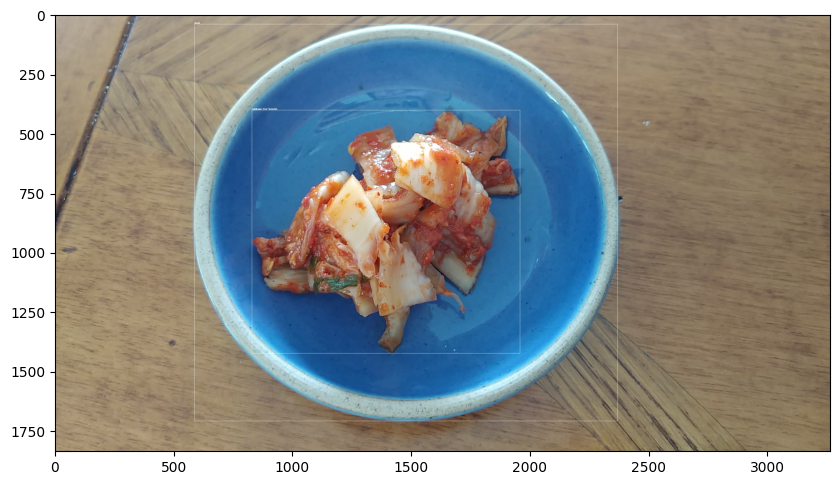

In [ ]:
random.seed()

# class_id_mapping 한거 쓰기
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.figure(figsize=(10,10))
    plt.imshow(np.array(image))
    plt.show()

# 임의의 주석 파일(annotation) 불러오기
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]


image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
assert os.path.exists('food_data/images')

# 이미지 받아오기
image = Image.open(image_file)

# 경계 박스 만들기.
plot_bounding_box(image, annotation_list)

In [ ]:
# # train 가져와보자~~
annotations = [os.path.join('food_data/labels', x) for x in os.listdir('food_data/labels') if x[-3:] == "xml"]
annotations.sort()

# annotations
print(len(annotations))

# txt 확인
hihi = [os.path.join('food_data/labels', x) for x in os.listdir('food_data/labels') if x[-3:] == "txt"]
hihi.sort()

print(len(hihi))

# image 확인
hello = [os.path.join('food_data/images', x) for x in os.listdir('food_data/images') if x[-3:] == "jpg"]
hello.sort()

print(len(hello))

hello2 = [os.path.join('food_data/images', x) for x in os.listdir('food_data/images') if x[-3:] == "JPG"]
hello2.sort()

print(len(hello2))

8989
8989
8928
61


In [ ]:
# # 이미지 개수 잘못되었을 경우 삭제하는 로직

# folder_path11 = "/content/drive/MyDrive/yolov7/food_data/sub/train"
# file_list11 = os.listdir(folder_path11)
# jpg_list = [file for file in file_list11 if file.endswith(".png")]

# for file in jpg_list:
#     os.remove(os.path.join(folder_path11, file))

In [ ]:
# # 이미지 개수 잘못되었을 경우 삭제하는 로직

# folder_path11 = "/content/drive/MyDrive/yolov7/food_data/sub/val"
# file_list11 = os.listdir(folder_path11)
# jpg_list = [file for file in file_list11 if file.endswith(".png")]

# for file in jpg_list:
#     os.remove(os.path.join(folder_path11, file))

In [ ]:
# # 이미지 개수 잘못되었을 경우 삭제하는 로직

# folder_path11 = "/content/drive/MyDrive/yolov7/food_data/labels"
# file_list11 = os.listdir(folder_path11)
# jpg_list = [file for file in file_list11 if file.endswith(".txt")]

# for file in jpg_list:
#     os.remove(os.path.join(folder_path11, file))

In [ ]:
# # 이미지 개수 잘못되었을 경우 삭제하는 로직

# folder_path11 = "/content/drive/MyDrive/yolov7/food_data/labels"
# file_list11 = os.listdir(folder_path11)
# jpg_list = [file for file in file_list11 if file.endswith(".xml")]

# for file in jpg_list:
#     os.remove(os.path.join(folder_path11, file))

In [ ]:
# 사진이랑 라벨 읽어오기

images = [os.path.join('food_data/images', x) for x in os.listdir('food_data/images')]
annotations = [os.path.join('food_data/labels', x) for x in os.listdir('food_data/labels') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# 데이터 스플릿
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
# 자료를 넣어둔 파일에 images 에는 train, val, test를 넣어두고
# annotaions에도train, val, test 만들어두기
# 그리고 만들어둔 애들 보내주기

#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

move_files_to_folder(train_images, 'food_data/images/train/')
move_files_to_folder(val_images, 'food_data/images/val/')
move_files_to_folder(test_images, 'food_data/images/test/')
move_files_to_folder(train_annotations, 'food_data/labels/train/')
move_files_to_folder(val_annotations, 'food_data/labels/val/')
move_files_to_folder(test_annotations, 'food_data/labels/test/')

# 다끝나고 annotaion 파일의 이름을  labels로 바꾸면 됩니다!

In [11]:
# 학습 시켜볼까요?
!python train.py --img-size 640 --cfg cfg/training/yolov7_custom.yaml --hyp data/hyp.scratch.custom.yaml --batch 8 --epochs 50 --data data/food_check.yaml --weights yolov7.pt --workers 4 --device 0

     11/49     10.2G   0.01226  0.008384  0.005656    0.0263         6       640: 100% 876/876 [44:15<00:00,  3.03s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95:  93% 52/56 [01:16<00:06,  1.65s/it]Invalid SOS parameters for sequential JPEG
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 56/56 [01:22<00:00,  1.47s/it]
                 all         882        1764       0.891       0.755       0.796       0.633

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     12/49     10.2G   0.01307  0.008728  0.006289   0.02809        38       640:   1% 7/876 [00:13<43:47,  3.02s/it]Invalid SOS parameters for sequential JPEG
     12/49     10.2G   0.01128  0.007974  0.004924   0.02418        42       640:   4% 33/876 [01:32<38:00,  2.70s/it]Premature end of JPEG file
     12/49     10.2G   0.01137  0.007923  0.005096   0.02439        38       640:   8% 69/876 [03:

In [ ]:
!python detect.py --weights runs/train/exp5/weights/best.pt --img-size 640 --conf 0.25 --source /content/drive/MyDrive/yolov7/food_data/images/1121212121.png

Namespace(weights=['runs/train/exp5/weights/best.pt'], source='/content/drive/MyDrive/yolov7/food_data/images/1121212121.png', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 2023-4-13 torch 2.0.0+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36519530 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ign